In [1]:
import numpy as np
import pandas as pd
from molvs import Standardizer
from itertools import chain

In [2]:
cells = ['NCI-H23 ', 'NCI-H522 ', 'A549/ATCC ', 'EKVX ', 'NCI-H226 ',
       'NCI-H322M ', 'NCI-H460 ', 'HOP-62 ', 'HOP-92 ', 'HT29 ',
       'HCC-2998 ', 'HCT-116 ', 'SW-620 ', 'COLO 205 ', 'HCT-15 ',
       'KM12 ', 'MCF7 ', 'NCI/ADR-RES ', 'MDA-MB-231/ATCC ', 'HS 578T ',
       'MDA-MB-435 ', 'BT-549 ', 'T-47D ', 'OVCAR-3 ', 'OVCAR-4 ',
       'OVCAR-5 ', 'OVCAR-8 ', 'IGROV1 ', 'SK-OV-3 ', 'CCRF-CEM ',
       'K-562 ', 'MOLT-4 ', 'HL-60(TB) ', 'RPMI-8226 ', 'SR ', 'UO-31 ',
       'SN12C ', 'A498 ', 'CAKI-1 ', 'RXF 393 ', '786-0 ', 'ACHN ',
       'TK-10 ', 'LOX IMVI ', 'MALME-3M ', 'SK-MEL-2 ', 'SK-MEL-5 ',
       'SK-MEL-28 ', 'M14 ', 'UACC-62 ', 'UACC-257 ', 'PC-3 ', 'DU-145 ',
       'SNB-19 ', 'SNB-75 ', 'U251 ', 'SF-268 ', 'SF-295 ', 'SF-539 ',
       'MDA-MB-468 ', 'HOP-18 ', 'LXFL 529 ', 'DMS 114 ', 'DMS 273 ',
       'DLD-1 ', 'KM20L2 ', 'RXF-631 ', 'M19-MEL ', 'SNB-78 ', 'XF 498 ',
       'MDA-N ', 'P388 ', 'P388/ADR ', 'SN12K1 ', 'U-251/H.Fine ',
       'LN-229/H.Fine ', 'U-87/H.Fine ', 'T98G/H.Fine ', 'A-172/H.Fine ',
       'U118/H.Fine ', 'U-373/H.Fine ', 'SW-1573 ', 'LXFS 650L ',
       'MLI-019 ', 'UABLG22 ', 'COLO 741 ', 'CXF 264L ', 'COLO 746 ',
       'MLI-059 ', 'CACO-2 ', 'HCT-116/P ', 'HCT-116/CMV-2 ',
       'HCT-116/E6-1 ', 'HCT-116/PV ', 'HCT-116/P21/A ', 'HCT-116/P21/B ',
       'HCT-116/P21/C ', 'RKOp53RE1 ', 'HT29p53RE22 ', 'H1299p53RE29 ',
       'RKO Waf1 ', 'ZR-75-1 ', 'UISO-BCA-1 ', 'MCF7/ATCC ', 'SK-BR-3 ',
       'MAXF 401 ', 'T47D FOS1 ', 'T47D NFkB15 ', 'T47D ERE4 ',
       'MCF7-E6 ', 'ES-2 ', 'SW-156 ', 'RXF 486L ', 'UOK-57 ',
       'RPMI-7951 ', 'MEXF 514L ', 'UABMEL3 ', 'JCA-1 ', 'ND-1 ',
       'TSU-PRI ', 'SW 1088 ', 'SF-767 ', 'SMS-KCNR ', 'CHA-59 ', 'HT ',
       'RL ', 'DB ', 'A-204 ', 'TK-164 ', 'CALU-1 ', 'MLI-076 ',
       'MLI-045 ', 'HCT-116/CMV-1 ', 'HCT-116/E6-2 ', 'ZR-75-30 ',
       'VDSO/P ', 'VDSO/CMV-9 ', 'VDSO/E6-19 ', 'NB4 ', 'A431 ',
       'A-FOS 2 ', 'A-FOS 3 ', 'A-JUN 1 ', 'A-JUN 3 ', 'A-C/EBP 3 ',
       'A-CREB 1 ', 'A-CREB 2 ', 'SW 1783 ', 'MDA-MB-435S ', 'WI-38 ',
       'CCD-19LU ', 'Mar-Bel ', 'TE85 ', 'VDSO/CMV-8 ', 'VDSO/E6-18 ',
       'NYH/ICRF-187-1 ', 'CHO ', 'CHO/159-1 ', 'NYH ']

In [3]:
a = pd.read_csv('CANCER60GI50.LST', delimiter=',')

In [4]:
a

NSC CONCUNIT  LCONC                    PANEL        CELL  \
0             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung    NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung   A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung        EKVX    
4             1       M    -4.0     Non-Small Cell Lung    NCI-H226    
...         ...      ...    ...                      ...         ...   
3053999  804962       M    -4.3  Central Nervous System      SNB-75    
3054000  804962       M    -4.3  Central Nervous System        U251    
3054001  804962       M    -4.3  Central Nervous System      SF-268    
3054002  804962       M    -4.3  Central Nervous System      SF-295    
3054003  804962       M    -4.3  Central Nervous System      SF-539    

         PANELNBR  CELLNBR  NLOGGI50  INDN  TOTN STDDEV  
0               1        1     4.575     1     1      .  
1               1        3     4.951     1     1      .  
2               1        4     4.100     1     1      .  
3               1        8     4.769     1     1      .  
4               1       13     4.691     1     1      .  
...           ...      ...       ...   ...   ...    ...  
3053999        12        5     4.797     1     1      .  
3054000        12        9     4.301     1     1      .  
3054001        12       14     4.301     1     1      .  
3054002        12       15     4.301     1     1      .  
3054003        12       16     4.301     1     1      .  

[3054004 rows x 11 columns]

In [5]:
max(a.LCONC)

4.0

In [6]:
min(a.LCONC)

-12.7

In [7]:
max(a.NLOGGI50)

14.19

In [8]:
min(a.NLOGGI50)

-4.0

In [5]:
sorted(a.LCONC.unique())

[-12.7,
 -10.7,
 -10.6,
 -10.0,
 -9.6,
 -9.3,
 -9.1,
 -9.0,
 -8.8,
 -8.7,
 -8.6,
 -8.5,
 -8.4,
 -8.3,
 -8.2,
 -8.1,
 -8.0,
 -7.7,
 -7.6,
 -7.0,
 -6.6,
 -6.5,
 -6.4,
 -6.3,
 -6.2,
 -6.0,
 -5.9,
 -5.8,
 -5.7,
 -5.6,
 -5.5,
 -5.4,
 -5.3,
 -5.2,
 -5.1,
 -5.0,
 -4.9,
 -4.8,
 -4.7,
 -4.6,
 -4.5,
 -4.4,
 -4.3,
 -4.2,
 -4.1,
 -4.0,
 -3.9,
 -3.8,
 -3.7,
 -3.6,
 -3.5,
 -3.4,
 -3.3,
 -3.2,
 -3.1,
 -3.0,
 -2.9,
 -2.8,
 -2.7,
 -2.6,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.1,
 -2.0,
 -1.7,
 -1.4,
 -1.2,
 -1.0,
 -0.9,
 -0.5,
 -0.3,
 -0.1,
 0.0,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.6,
 3.0,
 3.4,
 3.9,
 4.0]

In [6]:
a.CONCUNIT.unique()

array(['M ', 'u ', 'V '], dtype=object)

In [7]:
len(a.NSC.unique())

53215

In [8]:
len(a.CELL.unique())

159

In [9]:
a.columns

Index(['NSC', 'CONCUNIT', 'LCONC', 'PANEL', 'CELL', 'PANELNBR', 'CELLNBR',
       'NLOGGI50', 'INDN', 'TOTN', 'STDDEV'],
      dtype='object')

In [10]:
a.groupby(['NSC','CELL']).size().shape # number of unique NSC - cell line pairs

(2990042,)

# Remove the data where the GI50 is below 4

In [11]:
new_data_LT_4 = a[a.NLOGGI50 < 4 ]

In [12]:
new_data_LT_4

NSC CONCUNIT  LCONC                    PANEL              CELL  \
824         295       M    -3.0     Non-Small Cell Lung           NCI-H23    
825         295       M    -3.0     Non-Small Cell Lung          NCI-H522    
826         295       M    -3.0     Non-Small Cell Lung         A549/ATCC    
827         295       M    -3.0     Non-Small Cell Lung              EKVX    
828         295       M    -3.0     Non-Small Cell Lung          NCI-H226    
829         295       M    -3.0     Non-Small Cell Lung         NCI-H322M    
830         295       M    -3.0     Non-Small Cell Lung          NCI-H460    
831         295       M    -3.0     Non-Small Cell Lung            HOP-62    
832         295       M    -3.0     Non-Small Cell Lung            HOP-92    
833         295       M    -3.0                   Colon              HT29    
834         295       M    -3.0                   Colon          HCC-2998    
835         295       M    -3.0                   Colon           HCT-116    
836         295       M    -3.0                   Colon            SW-620    
837         295       M    -3.0                   Colon          COLO 205    
838         295       M    -3.0                   Colon            HCT-15    
839         295       M    -3.0                   Colon              KM12    
840         295       M    -3.0                  Breast              MCF7    
842         295       M    -3.0                  Breast   MDA-MB-231/ATCC    
843         295       M    -3.0                  Breast           HS 578T    
844         295       M    -3.0                Melanoma        MDA-MB-435    
845         295       M    -3.0                Melanoma             MDA-N    
846         295       M    -3.0                  Breast            BT-549    
847         295       M    -3.0                  Breast             T-47D    
848         295       M    -3.0                 Ovarian           OVCAR-4    
849         295       M    -3.0                 Ovarian           OVCAR-5    
851         295       M    -3.0                 Ovarian            IGROV1    
852         295       M    -3.0                 Ovarian           SK-OV-3    
853         295       M    -3.0                Leukemia          CCRF-CEM    
854         295       M    -3.0                Leukemia             K-562    
855         295       M    -3.0                Leukemia            MOLT-4    
...         ...      ...    ...                      ...               ...   
3006431  775664       u     0.2                 Ovarian           SK-OV-3    
3006432  775664       u     0.2                Leukemia          CCRF-CEM    
3006433  775664       u     0.2                Leukemia             K-562    
3006434  775664       u     0.2                Leukemia            MOLT-4    
3006435  775664       u     0.2                Leukemia         HL-60(TB)    
3006436  775664       u     0.2                Leukemia         RPMI-8226    
3006437  775664       u     0.2                Leukemia                SR    
3006438  775664       u     0.2                   Renal             UO-31    
3006439  775664       u     0.2                   Renal             SN12C    
3006440  775664       u     0.2                   Renal              A498    
3006441  775664       u     0.2                   Renal            CAKI-1    
3006442  775664       u     0.2                   Renal           RXF 393    
3006443  775664       u     0.2                   Renal             786-0    
3006444  775664       u     0.2                   Renal              ACHN    
3006445  775664       u     0.2                   Renal             TK-10    
3006446  775664       u     0.2                Melanoma          LOX IMVI    
3006447  775664       u     0.2                Melanoma          MALME-3M    
3006448  775664       u     0.2                Melanoma          SK-MEL-5    
3006449  775664       u     0.2                Melanoma         SK-MEL-28    
3006450  775664       u     0.2   

In [13]:
new_data_MT_4 = a[a.NLOGGI50 >= 4 ]

In [14]:
new_data_MT_4

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
3053974  804962       M    -4.3                 Ovarian            IGROV1    
3053975  804962       M    -4.3                 Ovarian           SK-OV-3    
3053976  804962       M    -4.3                Leukemia          CCRF-CEM    
3053977  804962       M    -4.3                Leukemia            MOLT-4    
3053978  804962       M    -4.3                Leukemia         HL-60(TB)    
3053979  804962       M    -4.3                Leukemia         RPMI-8226    
3053980  804962       M    -4.3                Leukemia                SR    
3053981  804962       M    -4.3                   Renal             UO-31    
3053982  804962       M    -4.3                   Renal             SN12C    
3053983  804962       M    -4.3                   Renal              A498    
3053984  804962       M    -4.3                   Renal            CAKI-1    
3053985  804962       M    -4.3                   Renal             786-0    
3053986  804962       M    -4.3                   Renal              ACHN    
3053987  804962       M    -4.3                   Renal             TK-10    
3053988  804962       M    -4.3                Melanoma          LOX IMVI    
3053989  804962       M    -4.3                Melanoma          MALME-3M    
3053990  804962       M    -4.3                Melanoma          SK-MEL-2    
3053991  804962       M    -4.3                Melanoma          SK-MEL-5    
3053992  804962       M    -4.3                Melanoma         SK-MEL-28    
3053993  804962       M    -4.3   

In [15]:
new_data_MT_4.groupby(['NSC','CELL']).size().shape

(2956897,)

In [16]:
len(new_data_MT_4.NSC.unique())

52779

In [17]:
len(new_data_MT_4.CELL.unique())

156

# Calculate the mean of duplicate GI50s

In [18]:
new_data_MT_4['key'] =  new_data_MT_4["NSC"].map(str)+ "_" + new_data_MT_4['CELL']

/home/vishwakarma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
new_data_MT_4

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
3053974  804962       M    -4.3                 Ovarian            IGROV1    
3053975  804962       M    -4.3                 Ovarian           SK-OV-3    
3053976  804962       M    -4.3                Leukemia          CCRF-CEM    
3053977  804962       M    -4.3                Leukemia            MOLT-4    
3053978  804962       M    -4.3                Leukemia         HL-60(TB)    
3053979  804962       M    -4.3                Leukemia         RPMI-8226    
3053980  804962       M    -4.3                Leukemia                SR    
3053981  804962       M    -4.3                   Renal             UO-31    
3053982  804962       M    -4.3                   Renal             SN12C    
3053983  804962       M    -4.3                   Renal              A498    
3053984  804962       M    -4.3                   Renal            CAKI-1    
3053985  804962       M    -4.3                   Renal             786-0    
3053986  804962       M    -4.3                   Renal              ACHN    
3053987  804962       M    -4.3                   Renal             TK-10    
3053988  804962       M    -4.3                Melanoma          LOX IMVI    
3053989  804962       M    -4.3                Melanoma          MALME-3M    
3053990  804962       M    -4.3                Melanoma          SK-MEL-2    
3053991  804962       M    -4.3                Melanoma          SK-MEL-5    
3053992  804962       M    -4.3                Melanoma         SK-MEL-28    
3053993  804962       M    -4.3   

In [20]:
len(new_data_MT_4.key.unique())

2956897

In [21]:
new_data_MT_4.groupby(['NSC','CELL']).size().shape

(2956897,)

In [22]:
df88 = new_data_MT_4.loc[:, ['NLOGGI50', 'key']]
df99 = df88.groupby('key', as_index=False).mean() # calcute mean
df99.columns = ['key', 'NLOGGI50_N']

In [23]:
df10 = new_data_MT_4.merge(df99, how='left',left_on=['key'],right_on=['key'])

df10 = df10.drop_duplicates(['NSC','CELL'])

#df16 = df10.drop(['key'] , axis=1)

df17 = df10.drop(['NLOGGI50'] , axis=1)

In [24]:
df17

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
3012861  804962       M    -4.3                 Ovarian            IGROV1    
3012862  804962       M    -4.3                 Ovarian           SK-OV-3    
3012863  804962       M    -4.3                Leukemia          CCRF-CEM    
3012864  804962       M    -4.3                Leukemia            MOLT-4    
3012865  804962       M    -4.3                Leukemia         HL-60(TB)    
3012866  804962       M    -4.3                Leukemia         RPMI-8226    
3012867  804962       M    -4.3                Leukemia                SR    
3012868  804962       M    -4.3                   Renal             UO-31    
3012869  804962       M    -4.3                   Renal             SN12C    
3012870  804962       M    -4.3                   Renal              A498    
3012871  804962       M    -4.3                   Renal            CAKI-1    
3012872  804962       M    -4.3                   Renal             786-0    
3012873  804962       M    -4.3                   Renal              ACHN    
3012874  804962       M    -4.3                   Renal             TK-10    
3012875  804962       M    -4.3                Melanoma          LOX IMVI    
3012876  804962       M    -4.3                Melanoma          MALME-3M    
3012877  804962       M    -4.3                Melanoma          SK-MEL-2    
3012878  804962       M    -4.3                Melanoma          SK-MEL-5    
3012879  804962       M    -4.3                Melanoma         SK-MEL-28    
3012880  804962       M    -4.3   

In [25]:
3012891 - 2956897 # total duplicate GI50s = 55994

55994

In [26]:
len(df17.NSC.unique())

52779

In [27]:
len(df17.CELL.unique())

156

# Loading Chemical name file

In [28]:
ChemName = pd.read_csv('chemnames_Aug2013.txt', delimiter='|', header = None)

ChemName.columns = ['NSC', 'Name', 'Name_type'] #761432

ChemName

NSC                                     Name      Name_type
0            1                             Tolylquinone  Chemical Name
1            1                            p-Toluquinone  Chemical Name
2            1                            Methylquinone  Chemical Name
3            1                          1,4-Toluquinone  Chemical Name
4            1                          2-Methylquinone  Chemical Name
5            1                       Methylbenzoquinone  Chemical Name
6            1                     2-Methyl-1,4-quinone  Chemical Name
7            1                     2-Methylbenzoquinone  Chemical Name
8            1                    Methyl-p-benzoquinone  Chemical Name
9            1                  Methyl-1,4-benzoquinone  Chemical Name
10           1                  2-Methyl-p-benzoquinone  Chemical Name
11           1                 2-Methylbenzoquinone-1,4  Chemical Name
12           1                2-Methyl-1,4-benzoquinone  Chemical Name
13           1                          WLN: L6V DVJ B1  Chemical Name
14           1  2,5-Cyclohexadiene-1,4-dione, 2-methyl-       9th C.I.
15           1                p-Benzoquinone, 2-methyl-       8th C.I.
16           1                              Toluquinone            VAN
17           2                                     MBTS  Chemical Name
18           2                                    Altax  Chemical Name
19           2                                 Thiofide  Chemical Name
20           2                                 Accel TM  Chemical Name
21           2                                Ekagom GS  Chemical Name
22           2                               Royal MBTS  Chemical Name
23           2                               Pneumax DM  Chemical Name
24           2                              Vulkacit DM  Chemical Name
25           2                            Vulcafor MBTS  Chemical Name
26           2                            Vulkacit DM/C  Chemical Name
27           2                   Benzothiazyl disulfide  Chemical Name
28           2                  Dibenzthiazyl disulfide  Chemical Name
29           2                  MBTS rubber accelerator  Chemical Name
...        ...                                      ...            ...
251857  760431                   Pharmakon1600-01505759  Chemical Name
251858  760432                                MEXENEONE  Chemical Name
251859  760432                   Pharmakon1600-01506199  Chemical Name
251860  760433                              Octocrylene           USAN
251861  760433                   Pharmakon1600-01506187  Chemical Name
251862  760434                            PENTOBARBITAL  Chemical Name
251863  760434                   Pharmakon1600-01900006  Chemical Name
251864  760435                               CREATININE  Chemical Name
251865  760435                   Pharmakon1600-01600300  Chemical Name
251866  760436                       Dimethyl sulfoxide           USAN
251867  760436                   Pharmakon1600-01506122  Chemical Name
251868  760437                              NICOPHOLINE  Chemical Name
251869  760437                   Pharmakon1600-01506194  Chemical Name
251870  760438                           SULFACARBAMIDE  Chemical Name
251871  760438                   Pharmakon1600-01506107  Chemical Name
251872  760439                              Isobutamben           USAN
251873  760439                   Pharmakon1600-01506196  Chemical Name
251874  760440                         Modaline sulfate           USAN
251875  760440                   Pharmakon1600-01506123  Chemical Name
251876  760441                              IPROHEPTINE  Chemical Name
251877  760441                   Pharmakon1600-01506195  Chemical Name
251878  760766                               Vandetanib  Chemical Name
251879  760766                                   V-9402  Chemical Name
251880  761431                              vemurafenib  Chemical Name
251881  761431                     

In [29]:
ChemName1 = ChemName.iloc[: ,[0,1]]

ChemName1

NSC                                     Name
0            1                             Tolylquinone
1            1                            p-Toluquinone
2            1                            Methylquinone
3            1                          1,4-Toluquinone
4            1                          2-Methylquinone
5            1                       Methylbenzoquinone
6            1                     2-Methyl-1,4-quinone
7            1                     2-Methylbenzoquinone
8            1                    Methyl-p-benzoquinone
9            1                  Methyl-1,4-benzoquinone
10           1                  2-Methyl-p-benzoquinone
11           1                 2-Methylbenzoquinone-1,4
12           1                2-Methyl-1,4-benzoquinone
13           1                          WLN: L6V DVJ B1
14           1  2,5-Cyclohexadiene-1,4-dione, 2-methyl-
15           1                p-Benzoquinone, 2-methyl-
16           1                              Toluquinone
17           2                                     MBTS
18           2                                    Altax
19           2                                 Thiofide
20           2                                 Accel TM
21           2                                Ekagom GS
22           2                               Royal MBTS
23           2                               Pneumax DM
24           2                              Vulkacit DM
25           2                            Vulcafor MBTS
26           2                            Vulkacit DM/C
27           2                   Benzothiazyl disulfide
28           2                  Dibenzthiazyl disulfide
29           2                  MBTS rubber accelerator
...        ...                                      ...
251857  760431                   Pharmakon1600-01505759
251858  760432                                MEXENEONE
251859  760432                   Pharmakon1600-01506199
251860  760433                              Octocrylene
251861  760433                   Pharmakon1600-01506187
251862  760434                            PENTOBARBITAL
251863  760434                   Pharmakon1600-01900006
251864  760435                               CREATININE
251865  760435                   Pharmakon1600-01600300
251866  760436                       Dimethyl sulfoxide
251867  760436                   Pharmakon1600-01506122
251868  760437                              NICOPHOLINE
251869  760437                   Pharmakon1600-01506194
251870  760438                           SULFACARBAMIDE
251871  760438                   Pharmakon1600-01506107
251872  760439                              Isobutamben
251873  760439                   Pharmakon1600-01506196
251874  760440                         Modaline sulfate
251875  760440                   Pharmakon1600-01506123
251876  760441                              IPROHEPTINE
251877  760441                   Pharmakon1600-01506195
251878  760766                               Vandetanib
251879  760766                                   V-9402
251880  761431                              vemurafenib
251881  761431                                 Zelboraf
251882  761431                                  PLX4032
251883  761431                                   RG7204
251884  761432                              Cabazitaxel
251885  761432                                  JEVTANA
251886  761432                                  XRP6258

[251887 rows x 2 columns]

meriging name with dataset

In [30]:
df = df17.merge(ChemName1, how='left',left_on=['NSC'],right_on=['NSC'])

In [31]:
df

NSC CONCUNIT  LCONC                    PANEL        CELL  \
0             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
2             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
3             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
4             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
5             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
6             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
7             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
8             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
9             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
10            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
11            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
12            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
13            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
14            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
15            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
16            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
17            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
18            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
19            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
20            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
21            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
22            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
23            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
24            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
25            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
26            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
27            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
28            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
29            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
...         ...      ...    ...                      ...         ...   
4449086  804962       M    -4.3                 Ovarian      IGROV1    
4449087  804962       M    -4.3                 Ovarian     SK-OV-3    
4449088  804962       M    -4.3                Leukemia    CCRF-CEM    
4449089  804962       M    -4.3                Leukemia      MOLT-4    
4449090  804962       M    -4.3                Leukemia   HL-60(TB)    
4449091  804962       M    -4.3                Leukemia   RPMI-8226    
4449092  804962       M    -4.3                Leukemia          SR    
4449093  804962       M    -4.3                   Renal       UO-31    
4449094  804962       M    -4.3                   Renal       SN12C    
4449095  804962       M    -4.3                   Renal        A498    
4449096  804962       M    -4.3                   Renal      CAKI-1    
4449097  804962       M    -4.3                   Renal       786-0    
4449098  804962       M    -4.3                   Renal        ACHN    
4449099  804962       M    -4.3                   Renal       TK-10    
4449100  804962       M    -4.3                Melanoma    LOX IMVI    
4449101  804962       M    -4.3                Melanoma    MALME-3M    
4449102  804962       M    -4.3                Melanoma    SK-MEL-2    
4449103  804962       M    -4.3                Melanoma    SK-MEL-5    
4449104  804962       M    -4.3                Melanoma   SK-MEL-28    
4449105  804962       M    -4.3                Melanoma         M14    
4449106  804962       M    -4.3                Melanoma     UACC-62    
4449107  804962       M    -4.3                Melanoma    UACC-257    
4449108  804962       M    -4.3                Prostate        PC-3    
4449109  804962       M    -4.3                Prost

In [32]:
df1 = df17.merge(ChemName1, how='left')

In [33]:
df1

NSC CONCUNIT  LCONC                    PANEL        CELL  \
0             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
2             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
3             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
4             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
5             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
6             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
7             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
8             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
9             1       M    -4.0     Non-Small Cell Lung     NCI-H23    
10            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
11            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
12            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
13            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
14            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
15            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
16            1       M    -4.0     Non-Small Cell Lung     NCI-H23    
17            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
18            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
19            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
20            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
21            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
22            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
23            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
24            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
25            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
26            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
27            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
28            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
29            1       M    -4.0     Non-Small Cell Lung    NCI-H522    
...         ...      ...    ...                      ...         ...   
4449086  804962       M    -4.3                 Ovarian      IGROV1    
4449087  804962       M    -4.3                 Ovarian     SK-OV-3    
4449088  804962       M    -4.3                Leukemia    CCRF-CEM    
4449089  804962       M    -4.3                Leukemia      MOLT-4    
4449090  804962       M    -4.3                Leukemia   HL-60(TB)    
4449091  804962       M    -4.3                Leukemia   RPMI-8226    
4449092  804962       M    -4.3                Leukemia          SR    
4449093  804962       M    -4.3                   Renal       UO-31    
4449094  804962       M    -4.3                   Renal       SN12C    
4449095  804962       M    -4.3                   Renal        A498    
4449096  804962       M    -4.3                   Renal      CAKI-1    
4449097  804962       M    -4.3                   Renal       786-0    
4449098  804962       M    -4.3                   Renal        ACHN    
4449099  804962       M    -4.3                   Renal       TK-10    
4449100  804962       M    -4.3                Melanoma    LOX IMVI    
4449101  804962       M    -4.3                Melanoma    MALME-3M    
4449102  804962       M    -4.3                Melanoma    SK-MEL-2    
4449103  804962       M    -4.3                Melanoma    SK-MEL-5    
4449104  804962       M    -4.3                Melanoma   SK-MEL-28    
4449105  804962       M    -4.3                Melanoma         M14    
4449106  804962       M    -4.3                Melanoma     UACC-62    
4449107  804962       M    -4.3                Melanoma    UACC-257    
4449108  804962       M    -4.3                Prostate        PC-3    
4449109  804962       M    -4.3                Prost

# Loading SMILES file

In [34]:
smile = pd.read_csv('Chem2D_Jun2016.smi',sep='\t', header=None)

smile.columns = ['SMILE', 'NSC']

smile = smile.iloc[:,[1,0]]
smile

NSC                                              SMILE
0            1                                O=C1C(=CC(=O)C=C1)C
1           22                     n1c2nc(ccc2c(c(c1)C(=O)OCC)O)N
2           25                   [Br-].[N+](C(=O)c1ccccc1)(C)(C)C
3           30                                c1c(ccc(c1)O)/C=N/O
4           34                     c1c(cc(cc1)[N+](=O)[O-])/C=N\O
5           42          c1c(c(c(cc1OC)[N+](=O)[O-])N)[N+](=O)[O-]
6           43                           C(=NN)(c1ccccc1)c1ccccc1
7           51               n1c2ccccc2c(Oc2ccccc2)c(c1C)c1ccccc1
8           54                            O=C1C(Cc2c1cccc2)C(=O)C
9           57                             [nH]1c2CCCCc2c(nc1=O)C
10          78  C(=C\c1ccccc1)/C1=[O][Cu]2([O]=C(CC(=[O]2)/C=C...
11          83                   c1(ccc2c(c1C)ncc(c2O)C(=O)OCC)Cl
12          87                N1(CCCCC1)C(c1ccccc1)CC(=O)c1ccccc1
13          91                                    c1c(c(ccc1)C)CO
14         100                    c1ccccc1C(=O)O/C(=C\c1ccccc1)/C
15         123                        N1(c2ccccc2S(=O)c2c1cccc2)C
16         129                      s1c(nc2c1cc1ccccc1c2)c1ccccc1
17         138                                      N1(CCCCC1)N=O
18         151                Clc1cc(cc(Cl)c1O)/C=C(/C(=O)O)\CCCC
19         152             Ic1cc(cc(I)c1O)/C=C(/C(=O)O)\Cc1ccccc1
20         153                  Ic1cc(cc(I)c1O)/C=C(/C(=O)O)\CCCC
21         167                                 C(C)(C)C(Br)C(=O)O
22         168                [Na+].c1(ccc(c2c1cccc2)N)S(=O)(=O)O
23         173                                       CC(Cl)C(=O)O
24         179                                     C(=O)(O)C(=O)C
25         180                                c1c(c(ccc1)O)C(=O)O
26         198                    C(=O)(C(C(c1ccccn1)O)C)c1ccccc1
27         227                      c1ccccc1CS(=O)(=O)c1ccc(cc1)C
28         244   C1CC2CC(C1(C2(C)C)C)OC(=O)C([Hg]Br)C(OC)c1ccccc1
29         245      C(c1ccccc1)(c1ccccc1)(c1ccccc1)CC(=O)c1ccccc1
...        ...                                                ...
284146  772447  c1cccc(c1)/C=C/C1=N/C(=C/c2cc(c(c(c2)OC)OC)OC)...
284147  756111      c1ccc(cc1C1C2=C(N(c3c1ccc(c3)CC)CCO)COC2=O)Cl
284148  756087  c1ccc(cc1C1C2=C(N(c3c1cc1c(c3)OCCO1)CCO)COC2=O)Br
284149  771424  c1ccc(cc1)c1nc(c2ccc(OC3CCCC3)c(c2)OC)n(c1c1cc...
284150  775897  C1C(CC2=CC[C@@H]3[C@@H]([C@]2(C1)C)CC[C@]1([C@...
284151  773241  c1(c(cc2c(c1C)oc(=O)cc2c1nc2c(s1)cc(c(c2)Cl)F)...
284152  773239  c12c(cc(cc1OC)OC)c(cc(=O)o2)c1nc2c(s1)cc(c(c2)...
284153  768171            O=C1CC(=NN1c1cn2c(csc2n1)c1ccc(Cl)cc1)C
284154  768177              Clc1ccc(cc1)c1csc2nc(cn12)n1nc(cc1C)C
284155  768189              O=C1N=c2scc(c3ccc(cc3)C)n2C1CCN1CCCC1
284156  768170                O=C1CC(=NN1c1cn2c(csc2n1)c1ccccc1)C
284157  768162           O=c1c(CCN2CCOCC2)c(nc2scc(c3ccccc3)n12)C
284158  768169          O=C1CC(=O)N(c2cn3c(csc3n2)c2ccc(Cl)cc2)N1
284159  768186  O=c1c(CCNc2ccc(cc2)S(=O)(=O)NC(=O)C)c(nc2scc(c...
284160  767902  c1(=O)/c(=C(/c2cc(ccc2)OC)\NC(CCCN(CC)CC)C)/c(...
284161  774686  C1(=O)N(C(=O)/C(=C(/c2cc(ccc2)OC)\NC(CCCN(CC)C...
284162  772619            Clc1ccc(c(c1)N)c1nnc2n1N=C(CS2)c1ccccc1
284163  779182            C1=Nn2c(nnc2c2ccc(cc2)N)SC1c1ccc(cc1)OC
284164  779419  O=C1/C(=C\c2ccc(cc2)OC)/N=C(c2cnccn2)N1c1cccc2...
284165  779416  O=C1/C(=C\c2ccc(cc2)O)/N=C(c2cnccn2)N1c1cccc2c...
284166  767427    O=C(/C=C/c1ccc(cc1)OC)n1nc(nc1c1ccccc1)c1ccccc1
284167  767430  O=C(/C=C/c1ccc(cc1OC)OC)n1nc(nc1c1ccccc1)c1ccccc1
284168  767429        O=C(/C=C/c1ccccc1)n1nc(nc1c1ccccc1)c1ccccc1
284169  767702  O=c1oc2c(N3C(=O)N(C(=O)C3=O)c3ccccc3)c(ccc2c(c...
284170  768065  c1c(cc2c(c1)c(c(c(=O)o2)C)C)OCc1nnc2n1nc(s2)c1...
284171  777099  c1(ccc2c(c1)c(c(cn2)C(=O)N)Nc1ccc(cc1)Cl)C(=O)...
284172  777104    c1(ccc2c(c1)c(c(cn2)C(=O)N)Nc1ccc(cc1)C)NC(=O)C
284173  772394                         S=C(SSC(=S)N1CCCC1)N1CCCC1
284174  768016                  Fc1ccc(cc1)C1CCN1c1

In [35]:
df2 = df17.merge(smile, how = 'left')

In [36]:
df2

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
2956867  804962       M    -4.3                 Ovarian            IGROV1    
2956868  804962       M    -4.3                 Ovarian           SK-OV-3    
2956869  804962       M    -4.3                Leukemia          CCRF-CEM    
2956870  804962       M    -4.3                Leukemia            MOLT-4    
2956871  804962       M    -4.3                Leukemia         HL-60(TB)    
2956872  804962       M    -4.3                Leukemia         RPMI-8226    
2956873  804962       M    -4.3                Leukemia                SR    
2956874  804962       M    -4.3                   Renal             UO-31    
2956875  804962       M    -4.3                   Renal             SN12C    
2956876  804962       M    -4.3                   Renal              A498    
2956877  804962       M    -4.3                   Renal            CAKI-1    
2956878  804962       M    -4.3                   Renal             786-0    
2956879  804962       M    -4.3                   Renal              ACHN    
2956880  804962       M    -4.3                   Renal             TK-10    
2956881  804962       M    -4.3                Melanoma          LOX IMVI    
2956882  804962       M    -4.3                Melanoma          MALME-3M    
2956883  804962       M    -4.3                Melanoma          SK-MEL-2    
2956884  804962       M    -4.3                Melanoma          SK-MEL-5    
2956885  804962       M    -4.3                Melanoma         SK-MEL-28    
2956886  804962       M    -4.3   

In [37]:
df5 = df2[df2.SMILE.isnull()]
df5

NSC CONCUNIT  LCONC                    PANEL              CELL  \
18023      5550       M    -4.0     Non-Small Cell Lung           NCI-H23    
18024      5550       M    -4.0     Non-Small Cell Lung          NCI-H522    
18025      5550       M    -4.0     Non-Small Cell Lung         A549/ATCC    
18026      5550       M    -4.0     Non-Small Cell Lung              EKVX    
18027      5550       M    -4.0     Non-Small Cell Lung          NCI-H226    
18028      5550       M    -4.0     Non-Small Cell Lung         NCI-H322M    
18029      5550       M    -4.0     Non-Small Cell Lung          NCI-H460    
18030      5550       M    -4.0     Non-Small Cell Lung            HOP-62    
18031      5550       M    -4.0     Non-Small Cell Lung            HOP-92    
18032      5550       M    -4.0         Small Cell Lung           DMS 114    
18033      5550       M    -4.0         Small Cell Lung           DMS 273    
18034      5550       M    -4.0                   Colon              HT29    
18035      5550       M    -4.0                   Colon          HCC-2998    
18036      5550       M    -4.0                   Colon           HCT-116    
18037      5550       M    -4.0                   Colon            SW-620    
18038      5550       M    -4.0                   Colon          COLO 205    
18039      5550       M    -4.0                   Colon             DLD-1    
18040      5550       M    -4.0                   Colon            HCT-15    
18041      5550       M    -4.0                   Colon              KM12    
18042      5550       M    -4.0                   Colon            KM20L2    
18043      5550       M    -4.0                  Breast              MCF7    
18044      5550       M    -4.0                 Ovarian       NCI/ADR-RES    
18045      5550       M    -4.0                  Breast   MDA-MB-231/ATCC    
18046      5550       M    -4.0                  Breast           HS 578T    
18047      5550       M    -4.0                Melanoma        MDA-MB-435    
18048      5550       M    -4.0                Melanoma             MDA-N    
18049      5550       M    -4.0                  Breast            BT-549    
18050      5550       M    -4.0                  Breast             T-47D    
18051      5550       M    -4.0                 Ovarian           OVCAR-3    
18052      5550       M    -4.0                 Ovarian           OVCAR-4    
...         ...      ...    ...                      ...               ...   
2956867  804962       M    -4.3                 Ovarian            IGROV1    
2956868  804962       M    -4.3                 Ovarian           SK-OV-3    
2956869  804962       M    -4.3                Leukemia          CCRF-CEM    
2956870  804962       M    -4.3                Leukemia            MOLT-4    
2956871  804962       M    -4.3                Leukemia         HL-60(TB)    
2956872  804962       M    -4.3                Leukemia         RPMI-8226    
2956873  804962       M    -4.3                Leukemia                SR    
2956874  804962       M    -4.3                   Renal             UO-31    
2956875  804962       M    -4.3                   Renal             SN12C    
2956876  804962       M    -4.3                   Renal              A498    
2956877  804962       M    -4.3                   Renal            CAKI-1    
2956878  804962       M    -4.3                   Renal             786-0    
2956879  804962       M    -4.3                   Renal              ACHN    
2956880  804962       M    -4.3                   Renal             TK-10    
2956881  804962       M    -4.3                Melanoma          LOX IMVI    
2956882  804962       M    -4.3                Melanoma          MALME-3M    
2956883  804962       M    -4.3                Melanoma          SK-MEL-2    
2956884  804962       M    -4.3                Melanoma          SK-MEL-5    
2956885  804962       M    -4.3                Melanoma         SK-MEL-28    
2956886  804962       M    -4.3   

In [38]:
len(df5.NSC.unique())

771

In [39]:
df6 = df2[df2.SMILE.notnull()] # to remove the row where is Nan
df6

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
2919698  788948       M    -4.0                Leukemia          CCRF-CEM    
2919699  788948       M    -4.0                Leukemia             K-562    
2919700  788948       M    -4.0                Leukemia            MOLT-4    
2919701  788948       M    -4.0                Leukemia         HL-60(TB)    
2919702  788948       M    -4.0                Leukemia         RPMI-8226    
2919703  788948       M    -4.0                Leukemia                SR    
2919704  788948       M    -4.0                   Renal             UO-31    
2919705  788948       M    -4.0                   Renal             SN12C    
2919706  788948       M    -4.0                   Renal              A498    
2919707  788948       M    -4.0                   Renal            CAKI-1    
2919708  788948       M    -4.0                   Renal           RXF 393    
2919709  788948       M    -4.0                   Renal             786-0    
2919710  788948       M    -4.0                   Renal              ACHN    
2919711  788948       M    -4.0                   Renal             TK-10    
2919712  788948       M    -4.0                Melanoma          LOX IMVI    
2919713  788948       M    -4.0                Melanoma          MALME-3M    
2919714  788948       M    -4.0                Melanoma          SK-MEL-2    
2919715  788948       M    -4.0                Melanoma          SK-MEL-5    
2919716  788948       M    -4.0                Melanoma         SK-MEL-28    
2919717  788948       M    -4.0   

In [40]:
df6.groupby(['NSC','CELL']).size().shape # number of unique NSC - cell line pairs

(2912227,)

In [41]:
len(df6.CELL.unique())

156

In [42]:
len(df6.NSC.unique())

52008

# Fingerprints calculation

In [43]:
mol_list = df6.SMILE.unique()

In [44]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import SaltRemover

In [45]:
fingerprints = []
SMILES = []
STD_SMILES = []
Error = []
for m in mol_list:
    try:
        print(m)
        m1 = m
        m = Chem.MolFromSmiles(m)
        remover = SaltRemover.SaltRemover() #remove salt
        m = remover.StripMol(m)
        s = Standardizer() # standardize molecule
        m = s.standardize(m)
        #AllChem.GetHashedMorganFingerprint
        fp1 = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=256)
        fingerprints.append(list(fp1))
        SMILES.append(m1)
        STD_SMILES.append(Chem.MolToSmiles(m))
    except:
        Error.append(m1)

O=C1C(=CC(=O)C=C1)C
c1(ccc(cc1CCCCCCCCCCCCCCC)O)N
C(c1ccccc1)(c1ccccc1)(c1ccccc1)CCI
c1c(cccc1)C(=O)CCN(C)C.Cl
[Cl-].[N+](Cc1c(cc(c(c1C)C)C)C)(C)(C)C
n1c(cccc1)C(=O)O
[C@@H](CC1CC(=O)NC(=O)C1)([C@H]1C(=O)[C@H](C[C@@H](C1)C)C)O
O=C1C(=C(C2=CO[C@@H]([C@H](C2=C1C)C)C)O)C(=O)O
c1cccc(c1)C(=O)/C=C/c1cccnc1
C(=O)(/C=C/c1ccccn1)c1ccccc1
C1(=N/C(=C\c2ccccc2)/C(=O)O1)c1ccccc1
c1ccccc1CCCC(=O)O
Clc1ccc2c(c3cc(ccc3nc2c1)OC)NCCCN(CC)CC.Cl
Clc1cc2ncc(c(c2cc1C)NC(C)CCCN(CC)CC)C.P(=O)(O)(O)O
O=C1C(=C(C(=O)c2c1cccc2)O)CCCc1ccc(Oc2ccccc2)cc1
Clc1cc2c(c3CCCCc3nc2cc1)NCCCN(CCCCC)CCCCC.P(=O)(O)(O)O
NCCNCCNCCN
c1c(c(cc(c1O)C(CC)(C)C)O)C(CC)(C)C
c1c(c(ccc1)C)NC(=N)Nc1ccccc1C
O=C1NC(=O)C(N1)(c1cccnc1)Cc1ccccc1
c1c(c(ccc1)OCC(=O)O)C(=O)Nc1ccccc1
O(C(=O)C)[Hg]*.c12c3c(ccc1cccc2)cccc3
I.c1c2c(ccc1)c1c(cccc1)[I+]2
Brc1c(c(c(cc1[N+](=O)[O-])[N+](=O)[O-])C)[N+](=O)[O-]
O1C(C2OC2)C1
c1c2/C(=N/NC(=S)N)/C(=O)Nc2ccc1
c1c(ccc(c1)C(C)(C)CC(C)(C)C)OCCOCCSC(=N)N.Cl
n1c2nc(nc(c2nc(c1)CNc1ccc(cc1)C(=O)NC(CCC(=O)O)C(=O)O)N)N

Clc1cc2nc(c3ccc(Cl)cc3)cc(c2cc1)C(O)CN(CC)CC.Cl
[Cl-].c1cc(ccc1/C=C/C1=[N+](c2ccccc2C1(C)C)C)N(C)CCCl
C(=C\C1=[N+](C)c2c(C1(C)C)cccc2)/c1c(n(c2c1cccc2)C)c1ccccc1
s1c2cc(ccc2[nH]/c/1=N/N=C/c1ccc(cc1)O)[N+](=O)[O-]
c1c(ccc(c1)C(CC(C)(C)C)(C)C)OCCSC(=N)N.Br
c1c[n+]([O-])c(cc1)S.[Na+]
c1c(cccc1)S(=O)(=O)CC(I)C#N
Brc1cc(ccc1N)C(=O)c1cc(Br)c(cc1)N
Brc1cc(c(cc1)O)/C=C\C(=O)/C=C/c1c(ccc(Br)c1)O
C(C)(C)(C)COS(=O)OCC(C)(C)C
[nH]1c(nc(c1C(=O)O)C(=O)O)c1ccccc1
Brc1cc(c(cc1)O)C(=O)c1c(ccc(Br)c1)O
C1(CCC2(C1C1CCC3C(C1(CC2)C)(CCC1C3(CCC(C1(C)C)O)C)C)CO)C(=C)C
c1cc(ccc1OCC(=O)O)OCC(=O)O.[Na+]
c1(c(cc(c(c1)C)SC#N)C(C)C)O
n1(c2ccc(cc2c2c1cccc2)[N+](=O)[O-])N=O
O=C1c2c(cc(cc2C(=O)c2c1cccc2)CO)OCC(O)C(O)C(O)C=O
N1c2ccccc2/C(=N/Nc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-])/C1=O
C1=C(C=C2C(C1)C1(CCCC(C1CC2)(C(=O)O)C)C)C(C)C.OCC(C)(C)N
[N+](C)(C)(Cc1ccccc1)CCCCCCCCCCCCCCCC.[P-](F)(F)(F)(F)(F)F
[Na+].N(CC)(CC)C(=S)S
[Na+].N(=N\c1ccc(cc1)[N+](=O)[O-])/c1cc(c(cc1)O)C(=O)O
O=C1c2c(c(c(cc2)O)O)C(=O)c2c(ccc(c12)O)O
O=C1C(=

N(=N\c1ccc(cc1)/N=N/c1ccccc1)/c1c2c(cc(cc2S(=O)(=O)O)S(=O)(=O)O)ccc1O
c1(ccc(c2c1C(=O)c1ccccc1C2=O)N)N
N(=N\c1c2c(cc(cc2ccc1O)S(=O)(=O)O)S(=O)(=O)O)/c1cccc2ccccc12.[Na+]
Clc1nc(Cl)c2n(cnc2n1)C
c1c(cccc1)c1cc(c(cc1)O)N
O(c1ccc(cc1)C(CC)(C)C)c1cccc(c1)C(=O)O
c1ccc(cc1)C(=O)Nc1c2ccccc2ccc1
[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]1[C@H]2CC=C2[C@@]1(CC[C@@H](C2)O)C)C)(C)CC[C@@H](CC)C(C)C
C1(C(C(C(C(C1O)O)O)O)O)O
C1(C2=CC(=O)OC2=CCO1)O
s1c2ccccc2[nH]c1=S.N=C(N)NC(=N)Nc1ccccc1
n1[nH]c(nc1NC(=O)N)c1ccccc1
Clc1ccc2c(c3cc(ccc3nc2c1)OC)NC(c1ccc(F)cc1)CCCN(CC)CC
c1cc(ccc1NC(=O)CCl)Cl
c1cc(ccc1C(=O)OCC)O
Clc1c2ccccc2c2ccccc2c1
c1(cc(c2c(c1)c1ccc(cc1cc2)C(C)C)C)C(O)CN(C)C.Cl
Clc1ccc2c(c3cc(ccc3nc2c1)OC)NCCCCN(CC)CC.Cl
[Cl-].n1c2c(cc(c(c2[o+]c2c1ccc(c2)N(C)C)O)O)C(=O)N
O1c2cc(ccc2C2C(Cc3c2cc(c(c3)O)O)(C1)O)O
C(=C\1/C=CC(=N)C=C1)(/c1ccc(cc1)NCC)\c1cc(c(cc1)N(CC)CC)C.Cl
C(=C\1/C=CC(=[N+](C)C)C=C1)(/c1ccc([N+](C)(C)C)cc1)\c1cc(c(cc1)N(C)C)C.[Cl-]
[Cl-].C(=C1C=CC(=[N+](CC)CC)C=C1)(c1ccc(cc1)N(CC)CC)c1ccc(cc1

C(=O)(O)CN(C)CC(=O)O
C1(C(C1C(=O)O)(C)C)C=C(C)C
O=[As](c1ccc(c(c1)N)OCC(O)C)(O)O
o1c2ccc(cc2c(cc1=O)C)OC
Clc1ccc(c(Cl)c1)CSCc1ccc(Cl)cc1Cl
O1c2ccc(cc2OC1)/C=C/C(=O)c1ccccc1
c1ccccc1C(=O)/C=C\c1ccccc1OC
c1c(ccc(c1OC)OC)/C=C/C(=O)c1ccccc1
c1cc(cc2c1N(c1ccc(cc1S2)N(C)C)C(=O)c1ccccc1)N(C)C
c1cc2c(cc1)c(cc1c2CCCC1)C(O)CN(CCCCC)CCCCC.Cl
o1c2ccccc2c(cc1=O)O
O=C1C(=C(C(=O)c2c1cccc2)O)C
O=C1C(=C(C(=O)c2c1cccc2)O)CC=C(C)C
O1COc2c1c1c(c(c2)C(=O)O)c(cc2c1cccc2OC)[N+](=O)[O-]
Ic1cc(c(cc1)OCCN(C)C)Cc1ccccc1.Cl
Clc1cc(c(c(c1)Cc1ccccc1)O)CNCCNCc1cc(Cl)cc(c1O)Cc1ccccc1.Cl
c1c(c(c(cc1C)C)O)CNCCCCCCNCc1cc(cc(c1O)C)C.Cl
c1c(c(c(cc1C)C)O)CNCCCNCc1cc(cc(c1O)C)C.Cl
Clc1c(Cl)c(c(c(Cl)c1)O)CNCCNCc1c(Cl)c(Cl)cc(Cl)c1O
c1(c(c(c(c2c1cc(c(c2O)c1c(cc2c(c(c(c(c2c1O)/C=N\CCO)O)O)C(C)C)C)C)/C=N/CCO)O)O)C(C)C
c1(c(c(c(c2c1c(c(c1c(c3c(c(c(c(c3cc1C)C(C)C)O)O)/C=N/CCCCC)O)c(c2)C)O)C(C)C)O)O)/C=N/CCCCC
O=C1C2C(=NN=C2c2c1cccc2)C(C)(C)C
NC(=O)NCC(C)NC(=O)N
c1c(ccc(c1)[N+](=O)[O-])S(=O)(=O)N/N=C/1\C=C(CC(C1)(C)C)C
o1c2c(nc3cc

C1(=S)N(C(=O)CS1)C
o1c2ccccc2cc(c1=O)C(=O)O
c1c[n+](ccc1)CCCCCCCCCCCCCCCC.[Cl-]
N1(c2cc(ccc2Sc2c1cccc2)C(F)(F)F)CCCN(C)C.Cl
c1c(ccc(c1)C(=O)O)NCC(=O)O
O1C2(C(C(C3C(C(=O)OC4C3(C2C2(C(C(C=C(C2C4)C)O)O)C)C1)O)C)O)O
O1[C@]2([C@@H]([C@@H]([C@H]3[C@]4([C@H]2[C@]2([C@@H]([C@H](C=C([C@@H]2C[C@H]4OC(=O)[C@@H]3OC(=O)[C@](O)(C)CC)C)O)O)C)C1)C)O)O
n1c2c(c(c3ccccc13)NN)cccc2.Cl
NC(=O)NC(C(=O)O)CC(=O)O
n1cc(ccc1)C(=O)O.Cl
C1(=O)C(=CC(=N)c2c1cccc2)N.Cl
c1ccccc1/C=C(/CCCCC)\C=C(C#N)C#N
N1(CCCCC1)CCCC(=O)O.Cl
N1(CCC(c2c(c(c(cc2)C)O)C)(c2ccc(c(c2C)O)C)CC1)C.Cl
C(O)(C(O)C(O)CO)CC=O
N(=C\c1ncccc1)/c1cc2Cc3ccccc3c2cc1
N(=C\C=C\c1ccccc1)/c1cc2Cc3ccccc3c2cc1
c1c(ccc2c1c(c1ccc(cc1n2)Cl)N)OC
C1(=O)C(=CC(=O)C(=C1)C)C
O=Cc1cc(c(cc1)O)OC
c1cc(ccc1[N+](=O)[O-])NC(=O)c1ccc(cc1)[N+](=O)[O-]
c1(ccc(c2c1C(=O)c1ccccc1C2=O)O)O
c1cc(ccc1Nc1cc2ccccc2cc1)O
c1c2c(ccc1)nc([nH]2)CCl
C12C(C(C3(C(C1)C1(CCCC(C1CC3)(C(=O)O)C)C)C=C2C(C)C)C(=O)O)C(=O)O.[Na+]
c1c(cc(cc1C)C)OCC(COc1cc(cc(c1)C)C)OCCN(CC)CC.Cl
O=[Sb](c1ccc(cc1)NC(=O)c1

n1cc(ccc1N)C(=O)N
Clc1c(cccc1[N+](=O)[O-])[N+](=O)[O-]
n1cc(c(c(c1C)O)CN)CO.Cl
C(CCCCN(C)C)(C(=O)CBr)(c1ccccc1)c1ccccc1
c1ccccc1NNC(=O)CN(CC(=O)NNc1ccccc1)N=O
[nH]1c2c(ccc(c2c(c1C)CC(=O)O)C)C
O=c1n(nc(Oc2c(cc(cc2)[N+](=O)[O-])[N+](=O)[O-])cc1)c1ccc(cc1[N+](=O)[O-])[N+](=O)[O-]
c1c(ccc(c1)[N+](=O)[O-])C/C(=N/O)/C(=O)O
c1(c(cc(cc1CN(C)C)C(C)C)C(C)(C)C)O
C(=N)(N(CCCCCCC)CCCCCCC)c1c2c(ncc1)cccc2
ClC1(c2ccc(cc2)OC)c2ccccc2N(c2c1cccc2)c1ccccc1
CSS(=O)(=O)C
O=c1n(cc(c(=O)[nH]1)C)C1OC(C(C1)O)CO
Brc1cc(cc(Br)c1O)C(c1cc(Br)c(c(Br)c1)O)(CCC(=O)O)C
O1C(=O)N(/N=C(/C)\C=C\c2oc(cc2)[N+](=O)[O-])CC1CN1CCOCC1
[O-][n+]1c2cc(Br)ccc2[n+]([O-])c2c1cccc2
c1cccc2c1[n+](c1ccccc1[n+]2[O-])[O-]
[O-][n+]1c2cc(ccc2[n+]([O-])c2c1cccc2)OC
n1n(c(c(/N=N/c2ccc(cc2)OC)c1N)N)C
N(=N\c1c(n(nc1N)c1ccccc1)N)/c1ccc(cc1)C
n1c(c2[nH]c(nc2nc1)NCC(C)C)N.Br
n1c(c2[nH]c(nc2nc1)N1CCN(CC1)CCO)N.Cl
c1cc(ccc1S(=O)(=O)C(Cl)(Cl)Cl)Cl
n12c(c3nc4ccccc4c3cc1)cc1CCCCc1c2.[N+](=O)(O)[O-]
CN1CC2(C=C)C3CC4C5(c6ccccc6NC5=O)C2C1C3CO4
c1c2ccc3c4c

c1(ccccc1)CSC(C)(C)C(C(=O)O)N.Cl
c1ccc(c2c1cccc2)C(c1c2ccccc2ccc1)Br
c1ccccc1c1ccc(cc1)C(c1ccc(cc1)c1ccccc1)(O)C(=O)O
[Sn](=O)(CCCC)CCCC
c1ccc2c(c1)c1c(cccc1)n2Cn1c2ccccc2c2c1cccc2
O=c1[nH]c(=O)c(Cl)c[nH]1
c1cccc2c1Oc1ccccc1C2c1c(cccc1)C(=O)O
C12(C(c3c1cccc3)(c1c2cc(cc1)OC(=O)C)c1ccc(cc1)OC(=O)C)OC(=O)C
[N+]1(CCCCCCC1)(C)CCCC[N+]1(CCCCCCC1)C.[Br-]
N(=N\C(C#N)C(=O)N)/c1ccccc1C(=O)O
Brc1ccc(/N=N/C(C#N)C#N)cc1
c1ccccc1OC(=O)C(C(c1ccccc1)Br)Br
C1C(CCCC1)CNC(=O)O.C1CCCCC1CN
Clc1ccc2c(c3cc(ccc3nc2c1)OC)NCCN
Clc1ccc2c(c3cc(ccc3nc2c1)OC)NCCCNCCC(O)C.Cl
n1c2c(c(c3ccc(cc13)[N+](=O)[O-])NCCNCC(O)C)cc(c(c2)OC)OC.[Cl-]
n1c2c(c(c3ccc(cc13)[N+](=O)[O-])NCCNCC(C)(C)O)cc(c(c2)OC)OC.[Cl-]
n1c2c(c(c3ccc(cc13)[N+](=O)[O-])NCCCNCCO)cc(c(c2)OC)OC.[Cl-]
Brc1ccc(cc1)NC(=S)Nc1ccc(Br)cc1
o1c(=O)c(cc2c3cc(ccc3ccc12)OC)C
C(=O)(c1ccccc1C(=O)O)c1cc(c(cc1)C(=O)O)C(=O)O
O=C1O[C@@H]2CCN3[C@@H]2C(=CC3)COC(=O)[C@]([C@@]([C@H]1C)(C)O)(C)O
C(=O)(O)CSCC(=O)O
n1c(c2ccccc2)cc(c2c1cccc2)O
Clc1cc(Cl)c(cc1[N+](=O)[O-])[N+](=O)[

[n+]1(cc2ccccc2cc1C)CC(O)C[n+]1cc2ccccc2cc1C.[Br-]
[I-].n1(c2ccccc2/c(=C/C=C/c2c3ccccc3[n+](cc2)CC)/cc1)CC
O1c2c(OC1)cc1[C@@H](N(CCc1c2)C)[C@H]1OC(=O)c2c(c(ccc12)OC)OC.S(=O)(=O)(O)O
s1c2ccccc2nc1Nc1ccc(cc1)[N+](=O)[O-]
s1c(nc2c1cccc2)c1ccc(cc1)N
O=c1[nH]c(=O)c(c[nH]1)N(CCCl)CCCl
[C@@]12(C[C@H](C[C@H]2[C@H]2[C@H](CC1)[C@]1(CC[C@@H](CC1=CC2)OC)C)O)C
O=c1[nH]c(=S)c2[nH]c(=O)n(c2[nH]1)c1ccccc1
O=C1NC(C(=O)N1)(C)CCOCc1ccccc1
O=C1C=C[C@@]2([C@@]3(F)[C@H](C[C@@]4([C@]([C@@H](C[C@H]4[C@@H]3CCC2=C1)C)(C(=O)CO)O)C)O)C
Clc1c2OC3(C(CC(=O)C=C3OC)C)C(=O)c2c(cc1OC)OC
NC(=O)NC(=O)CI
N(=N\c1ccc(c(c1)S(=O)(=O)O)/C=C/c1ccc(/N=N/c2c(c3c(c(cc(c3cc2)S(=O)(=O)O)S(=O)(=O)O)N)O)cc1S(=O)(=O)O)/c1c(c2c(c(cc(c2cc1)S(=O)(=O)O)S(=O)(=O)O)N)O.[Na+]
[N+](=O)(O)O.C[n+]1c2c(cc3c1cc(c(c3)C)N(C)C)cc(c(c2)N(C)C)C
o1c2c(cccc2cc(c1=O)C(=O)O)OC
N1(CC2c3n(c(=O)ccc3)CC(C2)C1)C
n1c2ccccc2[n+](c2c1cccc2)C.COS(=O)(=O)[O-]
c1ccccc1CC(c1cccc(c1O)OC)NC.Cl
O=c1c2c(c3OCOc3c(c2n(c2c1cccc2)C)OC)OC
n1(c2c3OCOc3c(c(c2c(=O)c2c1cccc2)OC)OC)

c1nc(c(n1C)SCC(=O)O)[N+](=O)[O-]
n1c(c(n(c1)C)S(=O)(=O)Oc1ccc(Cl)cc1)[N+](=O)[O-]
n1c(c(n(c1)C)S(=O)(=O)Oc1ccccc1)[N+](=O)[O-]
n1(c(c(nc1)[N+](=O)[O-])S(=O)(=O)Oc1c2ccccc2ccc1)C
O=c1c2c(ccc(c2sc2c1cccc2)C)NC(C)CN(CC)CC.Cl
O=c1c2c(ccc(c2sc2c1cccc2)[N+](=O)[O-])NCCN(CC)CC.[Cl-]
O1C(COC(C1)C[Hg]OC(=O)CCCCCCC)C[Hg]OC(=O)CCCCCCC
CC1C(C(CC(O1)OC1C(Cc2cc3cc(cc(c3c(c2C1=O)O)O)OC1CC(C(C(C)O1)OC1CC(C(C(C)O1)OC)O)OC(=O)C)C(C(=O)C(C(C)O)O)OC)OC1CC(C(C(C)O1)O)OC1CC(C)(C(C(C)O1)OC(=O)C(C)C)O)O
O=c1[nH]ncc(Br)c1Br
O=c1n(cc(Br)c(=O)[nH]1)C1OC(C(C1)O)CO
n1c(SCC(=O)c2ccccc2)c2[nH]cnc2nc1N
O=c1n(c(=O)c2n(c(nc2n1C)N1CCN(CC1)C)C)C.Cl
O=C1C(CCCC1CN(C)C)CN(C)C.Cl
c1(c(cc(cc1CN(C)C)C(=O)O)CN(C)C)O
O=C1C(CCCCCC1CN(C)C)CN(C)C.Cl
O=C1C(CCCC1CN(C)C)CN1CCCCC1.Cl
O1CCN(CC1)CC1C(=O)C(CCC1)CN1CCOCC1.Cl
O=C1C(CCCC1CN(Cc1ccccc1)Cc1ccccc1)CN(Cc1ccccc1)Cc1ccccc1.Cl
O=C1c2c(cc(cc2C(=O)c2c1c(ccc2)O)CO)O
C(=O)(C#CC(=O)N)N
c1(cc(c(cc1)Cl)Cl)/C=C\[N+](=O)[O-]
C1C(C(OC(O1)/C=C/c1ccccc1)C(C)C)(C)C
Clc1c(cccc1)C(c1ccc(Cl)cc1)C(C

N(=N\c1c(cccc1)OC)/c1c2ccc(cc2cc(c1O)S(=O)(=O)O)S(=O)(=O)O.[Na+]
N(=N\c1c2ccc(cc2cc(c1O)S(=O)(=O)O)S(=O)(=O)O)\c1ccc(cc1)NC(=O)C.[Na+]
[Na+].N(=N\c1c2cccc(c2ccc1)S(=O)(=O)O)/c1c(ccc2ccccc12)O
N(=N\c1cccc2ccccc12)/c1c2ccc(cc2ccc1O)S(=O)(=O)O.[Na+]
N(=N\c1c2c(cccc2)ccc1)/c1c(c2c(cc(cc2cc1S(=O)(=O)O)S(=O)(=O)O)O)O.[Na+]
c1ccc2c(c1)ccc(c2/N=N/c1ccc2c(c1)C(=O)c1ccccc1C2=O)O
N(=N\c1c2ccccc2cc(c1O)C(=O)Nc1ccccc1)/c1c(cc(cc1)C)[N+](=O)[O-]
C12(C(CCC2C2C(CC1)C1(CCC(CC1CC2)O)C)C(=O)CC(O)C(F)(F)F)C
O=C1/C(=C(\C(F)(F)F)/OC(=O)C)/C[C@@H]2[C@@]1(CC[C@H]1[C@H]2CC=C2[C@@]1(CC[C@@H](C2)OC(=O)C)C)C
n1c(cccc1)C(=S)Nc1ccccc1
O=C1C(=C(Cl)C(=O)c2c1cccc2)Nc1ccc(cc1)S(=O)(=O)Nc1ncccc1
n1c(c(c(c(c1C(=O)O)C)c1ccc(c(c1O)OC)OC)N)c1nc2C(=O)C(=C(C(=O)c2cc1)OC)N
n1c(c(c(c(c1C(=O)OC)C)c1ccc(c(c1O)OC)OC)N)c1nc2C(=O)C(=C(C(=O)c2cc1)OC)N
n1c(c([nH]c1)/N=N/N(C)C)C(=O)N
n1[nH]ccc1
CSCCC(C(=O)O)N(C)C
N(=N\c1ccc(cc1C)N)/c1ccc(cc1S(=O)(=O)N)C
N(=N\c1c(ccc2c1ccc(c2)S(=O)(=O)O)O)/c1c(Cl)cccc1.[Na+]
[Na+].N(=N\c1c(ccc2c1ccc(c2)

[Cd](Cl)Cl
O=C1CC[C@@]2([C@H]3CC[C@@]4([C@](CC[C@H]4[C@@H]3[C@@H](CC2=C1)O)(O)C)C)C
C(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)O.[Na+]
n1c2ccccc2c(Sc2ccccc2)nc1
c1(cc(cc(c1C(=O)/C=C/c1ccccc1)O)OC)OC
c1(c(ccc2c1cccc2)O)/C=N\NC(=O)c1ccncc1
N1CCN=C1SCCC(=O)O.Cl
c1c(c(ccc1)[N+](=O)[O-])/C=N/NC(=S)N/N=C\c1ccccc1[N+](=O)[O-]
c1(cc(c2nc3ccccc3s2)ccc1)O
n1c(c2ncn(c2nc1N)CCC)SCC(=O)O
[Na+].N(=N\c1c2ccccc2ccc1O)/c1c(cc(cc1)S(=O)(=O)O)C
O=C1c2c3c4c(c5ccc6c7ccc(cc7C(=O)c7c6c5c(cc7)c4cc2)[N+](=O)[O-])ccc3c2ccc(cc12)[N+](=O)[O-]
Brc1cnc(nc1Sc1nc(nc2nc[nH]c12)N)SC
c1ccccc1C(=O)CS(=O)(=O)C
N(=C\c1c(cccc1)O)/c1ccccc1/N=C/c1ccccc1O.[Cu+2]
c1c(cccc1)C(N)(C(=O)O)C(C)C
O=C1C2=C([C@]3([C@H]([C@@H](C(=C(C3=O)C(=O)N)O)N(C)C)C[C@@H]2Cc2cccc(c12)O)O)O.Cl
Cl[Pd]12(Cl)([n+]3c4c(=S2)nc[nH]c4[nH]c3)[n+]2c3c(=S1)nc[nH]c3[nH]c2
NC(=O)C(C)CSC(=N)N.Cl
N1(C2=C(C(=O)C(=C(C2=O)NC(=O)CCCCCC)N2CC2)NC(=O)CCCCCC)CC1
Brc1ccc(cc1)S(=O)(=O)N1CCN(CC1)S(=O)(=O)c1ccc(Br)cc1
Clc1ccc2ncnc(c2c1)NCCN
O=C1O[C@@H](C[C@@H]2O[C@@H](CC2)[C@@H

S1c2ccc(Cl)cc2N(c2ccccc12)CCCN1C2CC(CC1CC2)O.C(C)S(=O)(=O)O
[Cl-].N1=C2[N+](=CN(c3ccc(cc3)C(=O)O)C2)c2c1cccc2
c1cccc(c1/C=C/[N+](=O)[O-])OC
n1c(SCc2ncccc2)c2ncn(c2nc1N)C1CCCC1
O=C1[C@@]2([C@H]3C(=O)C=C(C[C@H]3C[C@H]2[C@H]2[C@H](C1)[C@]1(CC[C@@H](C[C@@H]1CC2)OC(=O)C)C)C)C
c1cc(ccc1N(CCOS(=O)(=O)C)CCOS(=O)(=O)C)C(=O)O
c1cc(ccc1N(CCOS(=O)(=O)C)CCOS(=O)(=O)C)C(=O)OCC
[Br-].[P+](c1ccccc1)(c1ccccc1)(c1ccccc1)CCCC
c1ccc2c(c1)NC(=O)C2(c1ccc(cc1)OC(=O)C)c1ccc(cc1)OC(=O)C
c1(=O)[nH]c(c(c(=O)[nH]1)/C=C/C(=O)N[C@@H](CO)CS(=O)CSC)C
c1c(cc(c(c1O)O)C(C)(C)C)C(C)(C)C
n1c(sc(c1c1ccccc1)c1ccccc1)C
c1ccc2c(c1)NC(=O)C2(c1ccc(cc1)O)c1ccc(cc1)O
c1c(c(ccc1)OC)C(=O)c1cc2ccccc2cc1
c1ccc(c(c1C)C(=O)O)C(=O)c1c2ccccc2ccc1
N1(CCN(CC1)C(=O)/C=C/c1oc(cc1)[N+](=O)[O-])C
O=c1n(n(c(c1C(=O)CCl)C)C)c1ccccc1
c1ccccc1N/N=C\c1ccccc1N
O=C1c2c(c(ccc2O)N)C(=O)c2c(ccc(c12)O)N
n1ccc(cc1)C(NC)C(c1ccncc1)NC
[nH]1c2ccccc2nc1CNc1ccc(cc1)O
[nH]1c2cc3ccccc3cc2nc1CNc1ccc(cc1)C(=O)O
Clc1cc2[nH]c(nc2cc1Cl)CNc1ccc(cc1)C(=O)O.Cl
Brc1c(cccc

c1c(c(ccc1)OCC)/C=N/NC(=N)N/N=C\c1ccccc1OCC
N(=C\c1c(cccc1)OCC)/N/C(=N/N=C\c1ccccc1OCC)/N/N=C/c1ccccc1OCC
O=c1oc2cc(/N=C/c3ccccc3Cl)ccc2c2ccccc12
[Hg]12([n+]3c4c(=S2)nc[nH]c4[nH]c3)[n+]2c3c(=S1)nc[nH]c3[nH]c2
N1(C(=S)N(CC1)CCNC(CC)CC(C)CC)C(CC(CC)C)CC
c1ccccc1N/N=C\c1ccccc1O
C(=N\NC(=N)N)(/c1ccc(cc1)O)\CCCCCCC
Clc1cccc(Cl)c1/C=N/NC(=N)N
c1c(cccc1)CC(C(=O)NC(Cc1ccc(cc1)N(CCCl)CCCl)C(=O)OCC)NC=O
Clc1c(=O)n(ncc1NN)c1ccccc1
O=c1[nH]ncc(c1Cl)N/N=C(\c1ccccc1)/C(=O)c1ccccc1
n1ccc2c(c3[nH]c4c(c3c(c2c1)C)cc(cc4)OC)C
c1cc(=O)c(cn1CC(C(=O)O)N)O
O=C1N(C(=O)C2C1CC(=C1C2CC2C3CC=C4CC(CCC4(C3CCC12C)C)OC(=O)C)OC(=O)C)Cc1ccccc1
[C@H]1([C@]2(CC[C@H]3[C@H]([C@@H]2CC1)CC=C1[C@@]3(CC[C@@H](C1)O)C)C)N(CCO)CCO
S(=O)(=O)(C)O.OC12C(CC3C(=C1O)C(=O)c1c(C3(C)O)cccc1O)C(N(C)C)C(=O)C(=C2O)C(=O)N
Clc1cc2nccc(c2cc1)Nc1ccc(cc1)CN(CCCl)CCCl.Cl
N(=C(\C)/C(=N/NC(=S)N)/C)/NC(=S)N
c1c(c(ccc1)OC)/C=N/NC(=N)N/N=C\c1ccccc1OC
c1(ccc(cc1)C)S(=O)(=O)[O-].CCCCCCCCCCCC(c1ccccc1)[N+](C)(C)C
C12(C(CCC2C2C(CC1)C1(CCC(CC1=CC2)OC(=O)C)C

S(=O)(=O)(O)O.N=C(N)NCC=C(C)C
o1c(=O)c2c(cc(c3oc(=O)c4c(c23)c1c(cc4)OC)OC)CCN(C)C.C(=O)(O)C
O1c2c(OC1)cc1c3c(c4c(c(c(cc4)OC)OC)c[n+]3C)ccc1c2.[OH-]
N12[C@H](CC[C@@H](C1)C)[C@H]([C@H]1[C@@H]2C[C@@H]2[C@@]1(CC[C@H]1[C@H]2CC=C2[C@@]1(CC[C@@H](C2)O)C)C)C
N12[C@H](CC[C@@H](C1)C)[C@H]([C@H]1[C@@H]2C[C@@H]2[C@@]1([C@H](C[C@H]1[C@H]2CC=C2[C@@]1(CC[C@@H](C2)O)C)O)C)C
N(=N\c1ccc(cc1)C(=O)Nc1ccc(cc1)Sc1ccc(cc1)/N=N/c1c2c(cc(c1O)S(=O)(=O)O)cc(cc2)S(=O)(=O)O)/c1c2c(c(S(=O)(=O)O)cc(c2)S(=O)(=O)O)ccc1O
N1=C(N2C(SC(C2C(=O)O)(C)C)C1C(=O)O)Cc1ccccc1
Clc1ccc2sc(nc2c1)c1ccc(cc1)OCCN(CC)CC.Cl
S(CC(C(=O)O)N)CSCC(N)C(=O)O
N1(CCCCC1)C1OC2C(N3CCCCC3)OCC2OC1OC1[C@H](OCC1)N1CCCCC1
n1c2c(ccn3c2C[C@H]2[C@@H](C3)[C@@H](OC=C2C(=O)OC)C)c2ccccc12.Cl
O=Cc1ccc(cc1)N(CCOS(=O)(=O)c1ccc(cc1)C)CCOS(=O)(=O)c1ccc(cc1)C
Clc1cc(c(cc1)O)C(=O)/C=C/c1ccncc1
O=c1[nH]c(=O)c2c([nH]1)[nH]nc2
O=c1n(cc(F)c(=O)[nH]1)C1OC(C(C1)O)CS
[nH]1c(nc2c(c1=O)ncn2C1OC(C(C1O)O)CO)N
Clc1nc(c2ncn(c2n1)C1OC(C(C1O)O)CO)N
N12[C@H](Cc3c4cc(c(cc4c4cc(c(cc4c

n1c(c([nH]c1)/N=N/N(C1CCCCC1)C)C(=O)N
n1c(c([nH]c1)/N=N/N(C)CCO)C(=O)N
C1=C/C(=C(\c2c(cccc2)Cl)/c2ccc(cc2)N(C)C)/C=CC1=[N+](C)C.[Cl-]
C(=O)C12C3C(C4(O)C(CC3)(C)C(CC4)C3=CC(=O)OC3)CCC1CC(CC2)O*
c1c(c(cc(c1)S(=O)(=O)N)N)SSc1ccc(cc1N)S(=O)(=O)N
Clc1ccc(c(/N=N\c2c3ccccc3ccc2O)c1)O
c1ccccc1/C=C/c1ccc(cc1)N(C(=O)C)O
[Ag+].CS(=O)(=O)O
C(=S)(S)NCCN
c1(c2cccc(c2ccc1)CCl)CCl
O=c1cc(oc2c1c(cc(c2)O)O)c1ccc(cc1)O
C(SCC(N)C(=O)O)(c1ccccc1)(c1ccccc1)c1ccccc1
o1c2c(c(c(c(c2c(=O)cc1c1cc(c(cc1OC)OC)OC)OC)OC)OC)OC
o1c2c(c(c(c(c2c(=O)cc1c1ccc(cc1)OC(C)C)OC)OC)OC)OC
N1=C(c2c(c(c3[nH]c4c(c3c2)cccc4)C)CC1)c1ccc(Cl)cc1
c1cc2c3c(c1NC(=O)OCC)cccc3c1c2cccc1
Clc1cc(cc(Cl)c1/N=N/c1ccc(cc1)[N+](=O)[O-])O
n1ccc(cc1)C=C1c2ccccc2c2c1cccc2
n1ccccc1C=C1c2ccccc2c2c1cccc2
c1c(ccc2c1Cc1cc(ccc21)N(CCCl)CCCl)NC(=O)NCCC
N(=C\c1ccc(cc1)N(CCCl)CCCl)/c1sc(nc1)C#N
N1(NC(N(NC1CCCCCC)C(=O)C)CCCCCC)C(=O)C
N12CC(C(CC1)CC2)OC(=O)CC(=O)c1ccccc1.Cl
n1c2c(cc(cc2c(c2ccoc12)OC)OC)OC
c1(c(c(c(c(c1C(=O)CC(C)C)OC)C)OC)C)OC
O1c2c(c3OC(C=Cc3c(c

O=C1NC(=S)NC(=O)C1=Cc1cccc2c1cc1ccccc1c2
S=C1NC(=O)C(=Cc2ccc(cc2)N(CC)CC)C(=O)N1
C1C(SSC1)CCCCC(=O)O
C(=NC(C(=O)O)C(C)(C)S)(C)C.Cl
n1nc(oc1c1ccc(cc1)C)c1cc2ccccc2cc1
C1(CCCCC1)(CC(=O)O)C(=O)O
N1(CCC2(CCC(CC2)C(C)(C)C)CC1)CCCN1CCOCC1.Cl
[I-].O1CC[N+](CC1)(CCC[N+]1(CC2C3C=CC(C2C1)CC3)C)C
O1CC2OC(n3c4nc(nc(c4nc3)N)Cl)C(C2OC1(C)C)OS(=O)(=O)C
n1cc(oc1c1c(Br)cccc1)c1ccccc1
s1c(c(nc1NC(=O)OCC)c1ccccc1)C
n1cccc(c1)C(=O)N/N=C\c1ccc(cc1C)N(CCCl)CCCl
n1cccc(c1)C(=O)N/N=C\c1ccc(cc1)N(CCCl)CCCl
N1(CCN(c2ccc(Cl)cc2)CC1)CC(COc1ccccc1C)O
N1(CCN(c2ccccc2Cl)CC1)CC(COc1cccc2ccccc12)O
N1(CCN(c2ccc(Cl)cc2)CC1)CC(COc1cccc2ccccc12)O
N1(CCN(c2ccccc2)CC1)CC(COc1cccc2ccccc12)O
O1C(n2cc(c(=O)[nH]c2=O)C)CC(C1COC(=O)N)O
BrC1CC(OC1=O)C
c1cnc(cc1)/C=N/Nc1ccccn1
n1cc(ccc1)C(=O)C(=O)c1cccnc1
OC12C3C(C4(C)C(CC3)CC(CC4)OC3CC(O)C(C(O3)C)OC3CC(O)C(C(O3)C)OC3CC(O)C(C(O3)C)OC(=O)C)CC(C1(C)C(CC2)C1=CC(=O)OC1)O.OC12C(C)(C(CC2)C2=CC(=O)OC2)C(O)CC2C1CCC1C2(C)CCC(C1)OC1CC(O)C(C(O1)C)OC1CC(O)C(C(O1)C)OC1CC(OC(=O)C)C(C(O1)C)O
n1c(

c1(cc(cc(c1OC)OC)/C=C/C(=O)c1cc(c(c(c1)OC)OC)OC)OC
n1c2ccc(cc2c(cc1)/C=C/c1ccc(cc1)N(C)C)OC
O=C1N(SCC(N)C(=O)O)C(=O)C(C1)CC
c1c(c(cc(c1)[N+](=O)[O-])[N+](=O)[O-])NC(C)(C(=O)O)CO
N1(CCCC/C(=N\O)/C(=N/O)/CCCC1)CC
S1C(=S)[N+](c2ccccc2)(C=C1c1ccccc1)C.[I-]
N1(C(C=Cc2c3ccccc3ccc12)C#N)C(=O)c1ccccc1
[nH]1c2ccccc2c(c1)CN(C)CC(=O)O
c1ccc2c(c1)c1c(nc(nc1cc2)NC(=N)N)C.Cl
c1(ccccc1)C(=O)SCC(N)C(=O)O
n1c(=O)c(/N=N/c2ccccc2)c([nH]c1N)C(=O)O
S(C(c1ccccc1)c1ccccc1)CCN.Cl
S(C(c1ccccc1)(c1ccccc1)c1ccccc1)CCN
Fc1c(F)c(c(F)c(F)c1)S
Fc1c(F)c(c(F)c(F)c1F)C(=O)c1c(F)c(F)c(F)c(F)c1F
[I-].s1c2ccccc2n(/c/1=C/C(=C/c1[n+](c2c(s1)cccc2)CC)/C)CC
[nH]1c2ccccc2nc1C(O)C(O)C(O)C(c1nc2c([nH]1)cccc2)O.CS(=O)(=O)O
c1c(ccc(c1)O)CC(NC)C.S(=O)(=O)(O)O
c1ccccc1c1ccc(cc1)C(=O)NCC(=O)O
n1c2ccccc2c(=O)n(c1/C=C\c1ncccc1)c1ccccc1C
C(=NCCCN(C)C)=NCC.Cl
[nH]1c2cc(c(cc2nc1CS)C)C
N(=N\c1c(c(cc2c1cccc2)C(=O)Nc1ccc(cc1C)C)O)/c1c(ccc(c1)S(=O)(=O)O)O
C1CN([C@@H]2c3c(c(c(cc13)OC)OC)Oc1cc3[C@H](N(CCc3cc1OC)C)Cc1ccc(cc1)Oc1c(ccc(C2)c1)OC)C


c1c(c(ccc1N(CCOS(=O)(=O)C)CCOS(=O)(=O)C)N=O)NC(=O)C
O1C(C(CC1n1c2c(c(nc(n2)Cl)N)nc1)O)CO
n1c(c2ncn(c2nc1)C1OC(C(C1)O)CN)N
N1(CCc2cc(c(c3Oc4c(cc5CCN([C@@H](c5c4)Cc4ccc(Oc5cc(ccc5OC)C[C@@H]1c23)cc4)C)OC)OC)OC)C
c1c(c2cc3c1CCN(C3Cc1ccc(cc1)Oc1cc(ccc1O)CC1c3c(c(c(cc3CCN1C)OC)OC)O2)C)OC
n1c2c3n(c(=O)c4COC(=O)C(c4c3)CC)Cc2cc2ccccc12
c1c(c(cc(c1OC)OC)[N+](=O)[O-])/C=C/[N+](=O)[O-]
[nH]1c2ccccc2c(c1)C(=O)Cc1cc(c(cc1Cl)OC)OC
C1(CCCC1)(Nc1ccc(cc1)S(=O)(=O)N)C(=O)O
c1cc(ccc1c1ccc(cc1)NC1(CCCC1)C#N)NC1(CCCC1)C#N
c1cc(ccc1N(N=O)C(=O)C)N(C(=O)C)N=O
Brc1ccc2OC(=O)CCc2c1
O1c2ccc(cc2CCC1=O)[N+](=O)[O-]
N(c1ccccc1)(CC(=O)O)CC(=O)O
n1c(c2ncn(c2nc1)C1OC(C(C1O)O)CO)NCC=C(C)C
O=C1N(C(=O)c2c1cccc2[N+](=O)[O-])c1nc[nH]n1
c1cccc(c1NCCC(=O)O)C(=O)O
c1(c(ccc(c1)C(=O)c1ccccc1NS(=O)(=O)c1ccc(cc1)C)C)C
[nH]1c2c(c3c(cc(nc3c(c2)C)C)C(=O)OC)c2ccccc12
[nH]1nc(nc1)NC=O
BrC1=C(C(=O)c2c(nccc2)C1=O)N
c1(c(n(cn1)C1C(C(C(O1)CO)O)O)N)C(=O)N
O1C(C(C(C1n1c2ncnc(c2c(c1)C(=S)N)N)O)O)CO
s1c2ccc(cc2c2c1cccc2)C(=O)CCC(=O)O
c1cc(ccc1

O(c1cc(N2C(=NC(=NC2(C)C)N)N)ccc1)CCOc1cc(ccc1)[N+](=O)[O-].[Cl-]
[Na+].O=C1N2C(SC(C2C(=O)O)(C)C)C1NC(=O)C(C(=O)O)c1ccccc1
Clc1ccc(cc1)SC(=S)Sc1ccc(Cl)cc1
o1c2cc(cc(c2cc(c1=O)C(=O)OCC)OC)OC
O=C1C(=C/C(=N/c2ccc(cc2C)N(CC)CC)/c2c1cccc2)C(=O)Nc1ccc(cc1)S(=O)(=O)C
SCC(NC(=O)C)C(=O)O
N1(CCN(c2cccc(Cl)c2)CC1)C(=S)c1ccc(cc1)OC
N(=C\1/CCC(c2cc(c(cc2)C)C)(c2cc(c(cc12)C)C)C)\N=C/1\CCC(c2c1cc(c(c2)C)C)(c1ccc(c(c1)C)C)C
n1c2c3n(c(=O)c4COC(=O)[C@](c4c3)(O)CC)Cc2cc2cc(ccc12)OC
c1ccc2c(c1)c(c(cc2O)C(=O)C)O
c1c(ccc2c1cccc2)/C=C/[N+](=O)[O-]
N1c2ccccc2/C(=N/N=c\2/[nH]cccc2)/C1=O
N1c2ccccc2/C(=N/Nc2ccccc2[N+](=O)[O-])/C1=O
C12CC3CC(C1)CC(C2)(C3)S(=O)(=O)c1ccc(cc1)N
S(C12CC3CC(CC(C3)C1)C2)c1ccc(cc1)N
Brc1c2c(oc(=O)c(c2)C(=O)C)ccc1
n1c(c2ncn(c2nc1)C1OC(C(OC1O)O)CO)SC
N(=C\c1c(ccc2c1cccc2)O)/c1c(cccc1)O
O1C(C(C(C(C1OC1C(OC(C1(CO)O)C)OC1C(C(C(C(C1O)O)O)O)O)NC)O)O)CO.C(=N)(N)N.C(=O)(O)N.S(=O)(=O)(O)O
n1c(c2nc(nc(n2)c2ncccc2)c2ncccc2)cccc1
[nH]1nc(c2c1CCCC2)CC1CC(=O)NC(=O)C1
O=C1C2(CCC3C(C2CC1CN1CC1)CC=C1C3(CC

O(c1ccc(cc1NC(=O)CCC1OCCO1)NCc1ccccc1)Cc1ccccc1
n12[nH]c(=S)nc1ccc(c2)[N+](=O)[O-]
N1(CCC(CC1)C)CC(=O)N1c2ccccc2Sc2c1cc1ccccc1c2
N1(CCN(CC1)CC(=O)N1c2ccccc2Sc2c1cc1ccccc1c2)C
n1(ccnc1)CN(Cc1ccccc1)C
[nH]1ccnc1CN1CCN(CC1)Cc1ncc[nH]1
O1CCN(CC1)Cc1ncc[nH]1
N1c2ccccc2/C(=N/Nc2c(F)c(F)c(F)c(F)c2F)/C1=O
N1c2ccccc2/C(=N/Nc2ccc(cc2)[N+](=O)[O-])/C1=O
[O-][N+](C1C(C2(OC(C1O)Oc1c2cc(c2c1C(=O)c1c(C2=O)cc2c(c1)C(C(=O)OC)C(CC2OC1OC(C(OC)C(OC)(C1OC)C)C)(O)C)O)C)O)(C)C
O1N(C1c1cccc(c1)[N+](=O)[O-])C1CCCCC1
[nH]1c(c2nccc3ccccc23)c(cc1c1ccccc1)C#N
n1ccc2ccccc2c1c1c(c(c(c2ccccc2)[nH]1)S(=O)(=O)O)C(=O)O
P(Cc1ccccc1)(C12[Fe]3456789(C1=C4C5=C23)C1=C9C7=C8C61)(C12[Fe]3456789(C1=C5C4=C23)C1C8=C7C6=C91)c1ccccc1
[Cl-].[P+](c1ccc(cc1)C)(c1ccc(cc1)C)(c1ccc(cc1)C)Cc1ccc(cc1)[N+](=O)[O-]
[Br-].c1ccc(cc1)[S+](c1c(ccc(c1)C)C)c1ccc(cc1)C
c1(ccc(cc1[S+](c1ccc(cc1)C)c1ccccc1)C)C.c1(ccccc1)C(=O)OC(C(=O)O)C(C(=O)[O-])OC(=O)c1ccccc1
o1c(nc(c1c1ccccc1)c1ccc(cc1)C)c1nccc2ccccc12
N1(c2ccccc2C=CC1CC(=O)c1ccccc1)C(=O)c1ccccc1


n1c2c(ccc(c2ccc1)C=O)O
N1C(c2ccccc2)C2C(NC(C(C2=O)C1c1ccccc1)c1ccccc1)c1ccccc1
O=C1NC(C(=O)OC(C(=O)NC(C(=O)N(C(C(=O)OCC(CC(=O)NC1C(C)C)C)CC(C)C)C)C(C)C)C(C)C)CC(C)C
BrC1C2OC(C(OC(C1)C(Br)CC)C/C=C/C#C)C2
[I-].[P+](c1ccccc1)(c1ccccc1)(c1ccccc1)CC(C)C
c1(c2ccccc2c(cc1C(=O)O)S(=O)(=O)N)O
Clc1c(OCCCNC(=O)Nc2cc(c(cc2)C)S(=O)(=O)F)ccc(N2C(N=C(N=C2N)N)(C)C)c1.C(C)S(=O)(=O)O
c1ccc2c(c1)c1c([nH]2)CCN(C1)C
[nH]1c2CCN(Cc2c2c1cccc2)Cc1ccccc1
O1C(n2c(c(nc2)[N+](=O)[O-])N)C(C(C1CO)O)O
s1c2ccccc2nc1Oc1ccc(cc1)C(=O)O
c1ccccc1N=[N+]=[N-].c1ccc2c(c1)CC=C2.c1cc(C(=C)C)ccc1
s1c2cc(c(cc2[n+](c1C)CCCOS(=O)(=O)[O-])C)C
o1c2c(c(c3c4c(cccc4C(=O)O)ccc3)c3ccc(cc13)O)ccc(=O)c2
Clc1ccc(cc1)/C=C/1\C(=NN(C1=O)c1ccc(cc1)S(=O)(=O)O)C.c1cnccc1
S(C1c2ccccc2c2c1cccc2)CC(N)C(=O)O
o1c(c2ccc(cc2)O)cc(=O)c2c1cc(c(c2O)OC)O
c1c(cccc1)CNCc1ccc(cc1)C(=O)O
C([N+](C)(C)C)(C1=CCCC1=O)c1ccccc1
Cc1ccc(cc1)S(=O)(=O)OC1CC(CCC1c1ccccc1)C(C)(C)C
C(=O)(O)CCSCCN.Cl
c1ccccc1CS(=O)c1ccc(cc1[N+](=O)[O-])[N+](=O)[O-]
c1ccccc1CS(=O)(=O)c1ccc(cc1

O=C1OC(OC(=O)C1)c1ccc(cc1)[N+](=O)[O-]
Clc1cc(N2C(=NC(=NC2(C)C)N)N)ccc1CCCCc1ccccc1.Cl
Clc1ccc(c(c1)S(=O)(=O)F)CCCCc1c(Cl)cc(N2C(=NC(=NC2(C)C)N)N)cc1.C(C)S(=O)(=O)O
FS(=O)(=O)c1ccc(OCCCCOc2c(Cl)cc(N3C(=NC(=NC3(C)C)N)N)cc2)cc1.C(C)S(=O)(=O)O
c1ccccc1C(Br)C(Br)C(Br)C(C(=O)OC)(Br)C(=O)OC
O=c1nc(ccn1C1OC(COP(=O)(Oc2ccccc2)O)C(C1O)O)N
O=c1cc(oc2c1c(cc(c2)O)O)c1cc(c(cc1)OC)OC
C12(C(CCC2C2C(CC1)C1(CCC(CC1=C(C2)[N+](=O)[O-])O)C)C(C)CCCC(C)C)C
c1(c(cc(cc1C)Cc1cc(c(c(c1)C)O)C)C)O
O=C1c2c(ccc(c2C(=O)c2c1cccc2)NC1CCCCC1)Nc1ccc(cc1)S(=O)(=O)O
O(C(=O)c1ccc(cc1)N)CCCC
C1Oc2c(O1)cc1c(c2)C2C(C(=CC32N(CC1)CCC3)OC)O
Clc1c(ccc(N2C(N=C(N=C2N)N)(C)C)c1)CCCCc1cc(c(Cl)cc1)S(=O)(=O)F.C(C)S(=O)(=O)O
n1c2c(c(c3ccccc13)Nc1ccc(cc1)NS(=O)(=O)C)ccc(c2)[N+](=O)[O-].Cl
n1c2c(c(c3ccccc13)Nc1ccc(cc1)NS(=O)(=O)C)ccc(c2)N.Cl
c1(cccc(c1)OCc1c(c2ccc(c(c2)Cl)Cl)c(nc(n1)N)N)C#N
c1ccc(c2c(cccc2)C(=O)O)c(c1)C(=O)Nc1ccc2c(c1)Cc1c2ccc(c1)F
O=c1n(c(=O)c2ccccc2c2ccccc12)c1ccc2oc(=O)c3c(c2c1)cccc3
O=c1n(c(=O)c2ccccc2c2ccccc12)c1cc2c

N12CC(=C(CC1c1cc(c(cc1CC2)OC)OC)CC1NCCc2ccccc12)CC.Br
N12CCc3ccccc3C1CC(=C(C2)CC)CC1NCCc2c1cc(c(c2)OC)OC.Br
N12CC(=C(CC1c1cc(c(cc1CC2)OC)OC)CC1NCCc2cc(c(cc12)OC)OC)c1ccccc1.Cl
o1c(c2cc(c(cc2)OC)OC)cc(=O)c2c1cc(cc2O)C
BrC1(c2ccccc2)C(C1(Br)c1ccccc1)C(=O)O
C(C(C)C)C1NC(=O)C(C(C)C)NC(=O)CNC(=O)CC(OC(=O)C(NC(=O)C(NC1=O)C)C(C)C)CCCCCCCCC
O=C(OC1CC(/C(=C\C(C2C(OC(=O)C2=C)/C=C\1/C)OC(=O)/C(=C\C)/C)/C)O)C
C.O1[C@H]2[C@@H]([C@H](OC(=O)[C@@]3(O[C@@H]3C)C)/C=C(\[C@@H](C[C@@H](/C(=C\2)/C)OC(=O)C)O)/C)C(=C)C1=O.C
C(=O)(OC1C/C=C(/C(OC(=O)C2(OC2C)C)C(C2C(OC(=O)C2=C)/C=C\1/C)O)\C)C
C\1(=C\[C@H]2OC(=O)C(=C)C2[C@@H](C(/C(=C/C[C@@H]1OC(=O)C)/C)O)OC(=O)/C(=C\C)/C)/C
COc1cc(ccc1O)C(=O)OC1CC23CCNC43CC(c3cc5c(cc23)OCO5)OC4(C1O)OC
O=C1CC23CCNC2(C(=C1OC)OC)CCc1c3c(c(cc1)OC)O
COc1ccc(cc1O)/C=C/C(=O)OC1CC23CCNC43CC(c3ccc(c(c23)O)OC)OC4(C1OC)OC
O=CC12C3CCC4(C(c5ccc(=O)oc5)CCC4(C3CCC2=CC(CC1)O)O)C
C\1=C/C(CC2=C(C(=O)[C@]3(O2)C(=C[C@@H](C3)C)/C=C(\C1=O)/C)C)(C)C
O1C2(C3C4(CCCC(C4CC2)(C)C)COC3c2c(cc(cc12)C)O)C
N1C2C

N(=C\c1c(ccc2c1cccc2)O)/NS(=O)(=O)c1ccc(cc1)C
Brc1ccc(cc1)C(c1sccc1)(C1CC1)O
Brc1cc(c(cc1)O)/C=N/NC(=O)CCc1ccc(cc1)O
Clc1ccc(cc1)C(N1CCNCC1)c1ccc(Cl)cc1
O=C1OC(=N/C/1=C\c1cc(ccc1)OC)c1ccccc1
n1c(cc(nc1NC(=N)Nc1ccc(Cl)c(Cl)c1)N1CCC(N2CCCC2)CC1)C.Cl
N(c1cc2Cc3ccccc3c2cc1)(CCBr)CCBr
O=C1c2nc(n(c2C(=O)c2c1cccc2)CCC)C
ON1C(CC(CC1(C)C)O)(C)C
O=c1c2c(ccc(c2sc2c1cccc2)CO)NCCN(CC)CC.CS(=O)(=O)O
n1nc(sc1)NCNc1nncs1
O=C1c2c(CC(C1OC1CC(OC3CC(C(C(O3)C)OC3CC(C(C(O3)C)O)(C)O)O)C(C(O1)C)O)C(C(=O)C(C(C)O)O)OC)cc1c(c2O)c(c(c(c1)OC1CC(OC2CC(C(C(O2)C)O)O)C(C(C)O1)O)C)O.[Mg+2]
n1c(cc(c2cc(ccc12)N)NCCCCCCNc1c2c(nc(c1)C)ccc(c2)N)C.Cl
N12C(C3CCCN4C3C(C1)CCC4)CCCC2
Cc1cc2cccc(c2c(c1C(=O)C)O)OC1C(C(C(C(CO)O1)O)O)O.CC1C(C(C(C(O)O1)O)O)O
C1(OC(=O)C)C(OC(c2cc(C3OC(C(OC(=O)C)C(N(C)C)C3)C)c3c(c2O)C(OC(=O)C)(OC)c2c(C3=O)cc(c3c2oc(/C(=C/C)/C)cc3=O)C)CC1(N(C)C)C)C
O1C(CC(C(C1C)O)(N(C)C)C)c1c(c2C(=O)c3c4oc(/C(=C/C)/C)cc(=O)c4c(cc3C(=O)c2c(c1)C1OC(C(C(C1)N(C)C)O)C)C)O
n1c(c(c([nH]1)C(=O)N)O)C1OC(C(C1O)O)CO
c1(cc(c2c(c1)O

F[C@]12[C@H](C[C@@]3([C@@]4(OC(O[C@@H]4C[C@H]3[C@@H]1CC(=C1[C@@]2(CCC(=C1)OCCCl)C)C=O)(C)C)C(=O)COC(=O)C)C)O
S1C(=S)N(c2occc2)C(=O)C1
N1C(NC(SC1=S)c1ccccc1)c1ccccc1
C1N(CN(C(=S)S1)Cc1ccccc1)Cc1ccccc1
C(=S)(S)NCCCN(C)C.N
[nH]1c2c3cc(ccc3[s+]cc2c2c1cccc2)[N+](=O)[O-].[Cl](=O)(=O)(=O)[O-]
n1c2ccscc2c2c1ccc(c2)[N+](=O)[O-]
O1C(=O)CC(CC(CC(CCC(C(CC2OC(C(C(C2)O)C(=O)O)CC(OC2OC(C(C(C2O)N)O)C)/C=C/C=C/C=C/C=C/CC/C=C/C=C/C(C(C(C1C)C)O)C)O)O)O)O)O
n1ccc2c(c1)c1ccccc1c(c2)N
n1ccc2c(c3n(c4c(c3c(c2c1)C)cccc4)CC=C)C
O=C1c2c(cccc2C(=O)c2c1c(c1ccccc1c2O)O)NC(=O)CCN(CC)CC.Cl
Cc1c(C(=O)NC(C(c2c[nH]cn2)OC2C(C(C(C(CO)O2)O)O)OC2C(C(C(C(CO)O2)O)OC(=O)N)O)C(=O)NC(C)C(C(C)C(=O)NC(C(C)O)C(=O)NCCc2nc(cs2)c2nc(cs2)C(=O)NCCNCC(C)O)O)nc(C2CC(=O)N2CC(C(=O)N)N)nc1N
S1C(=NC(CC1)(C)C)/C=C/c1ccccc1
[nH]1c2ccccc2cc1/C=C/[N+](=O)[O-]
O=C1/C(=C\C=C\c2ccccc2)/CCCC1
[Br-].[n+]1(ccc(cc1)C(=O)N)CCCCCCCCCCCCCC
P(=O)(O)(O)CNCC(=O)O
Clc1ccc(Oc2c(c(c(Cl)cc2)S(=O)(=O)O)NC(=O)Nc2cc(Cl)c(Cl)cc2)cc1Cl.[Na+]
Brc1ccc(cc1)NC(=O)CI
c1c(c

N(C)(C)CCCNC(CC#N)CCC#N
O=C1N(C(=O)[N+]([N-]1)(CC)CC)N(CC)CC
S(C1=NCCN1)CC(=O)c1ccccc1.Br
O1C(C(NC1(C(F)(F)F)C(F)(F)F)C(=O)NCC(=O)O)(C(F)(F)F)C(F)(F)F
Clc1ccc(cc1)C(C(C)(C)N(CC)C(=O)CCl)SSSC(c1ccc(Cl)cc1)C(C)(C)N(CC)C(=O)CCl
O1C(C(C(C(C1OC)O)NC(=O)N(N=O)C)O)CO
c1(cc(c2c(c1O)C(=O)C13C(=C(C4C(C3C3C(C1C(=C1C43C(=O)c3c(C1=O)c(cc(c3O)C)O)O)O)O)O)C2=O)O)C
N1=C(N(c2c(Cl)ccc(Cl)c2)C(N=C1N)(C)C)N
c1ccccc1NC(=O)N(C)SC(=S)N(C)C
[Cl](=O)(=O)(=O)O.C(CCl)N1[Zn+2]2(N(CCCl)CCN2CCCl)N(CC1)CCCl
c1ccc2c(c1)N(c1c(S2)ccc(c1)C(F)(F)F)CCCN1CCN(CC1)C1CC1.Cl
c1c(cc(cc1CC(=O)C(O)(C(F)(F)F)C(F)(F)F)C(=O)CC(O)(C(F)(F)F)C(F)(F)F)CC(=O)C(C(F)(F)F)(O)C(F)(F)F
O=C1C(=C(C(Cl)(F)F)C(Cl)(F)F)C2CC1CC2
O1CCN=C1Nc1ccc2CCCc2c1
O=S1(=O)C(C(N2CCOCC2)C1)(C)C
s1c(ccc1)C(=O)C(CC)C(C(F)(F)F)(O)C(F)(F)F
ClCCNC(=O)NCc1ccccc1
O(c1cc2oc(=O)c(cc2cc1)C)C(=O)c1ccc(cc1)NC(=N)N.Cl
O1c2cc3CCC(/C(=N\OC(=O)C)/c3cc2OC1)c1cc(c(cc1)OC)OC
CC12C3(C)C(=C4C(CC3)(CO)C(O)CC(C4)(C)C)C=CC1C1(C)C(CC2)C(CO)(C)C(CC1)O*O*O*
n1c(/C=N\NC(=S)N)c2ccccc2cc1
C[S

N1(CC(OC(=O)C(c2ccccc2)(C2CCCC2)O)CCC1)C.Cl
C1CCCC1C(C(=O)OC1CN(CC1)C)(c1ccccc1)O.Cl
O=Cc1cccc2c1c1ccccc1cc2
n1c(c2c(c(n(c2nc1)C1OC(C(C1O)O)CO)NN)C#N)N
n1(c(Sc2nc(nc3n(cnc23)C2OC(C(C2)O)CO)N)c(nc1)[N+](=O)[O-])C
[Br-].[n+]1(c2c(c(c3ccccc13)Nc1ccc(cc1)NS(=O)(=O)CCCCNC(=N)N)ccc(c2)N)C.Br
[Ru](Cl)(N)(N)(N)(N)N
N(C)(C)CCNS(=O)(=O)N(C)C.Cl
O=C1CC2(C3C(C(C4(OCC53C4C(C(=O)OC5CC2C(=C1O)C)OC(=O)C=C(C)C)C(=O)OC)O)O)C
O=c1c(ccc2c3c(c(c(cc3CC[C@@H](c2c1)NC(=O)C)O)OC)OC)OC
O(c1ccccc1)CC(=O)O[Pb](CC)(CC)CC
COCC(=O)O[Pb](CC)(CC)CC
C(F)(F)(F)C(=O)O[Pb](CCC)(CCC)CCC
[Pb](OC(=O)C)(OC(=O)C)(c1ccccc1)c1ccccc1
N1=C(N(C(N=C1N)(C)C)c1cc(c(F)cc1)C(F)(F)F)N.Cl
c1cc(ccc1C(=O)NC(CC(=O)O)C(=O)O)NCc1ccc2c(c1)c(nc(N)n2)O
n1n[nH]c(n1)CC(N)C(=O)O
[Cr]([NH2+]c1ccccc1)(C#[O])(C#[O])(C#[O])(C#[O])C#[O]
[Br-].[P+](c1ccccc1)(c1ccc(c2ccc([P+](c3ccccc3)(c3ccccc3)c3ccccc3)cc2)cc1)(c1ccccc1)c1ccccc1
ClCC(=O)C(Cc1ccccc1)NC(=O)C(CC(C)C)NC(=O)OCc1ccccc1
ClCC(=O)C(Cc1ccccc1)NC(=O)C(NC(=O)C)CC(C)C
C1CC(C2C(C1)(C(C(=C)C(C2)O)CCC(C)

O(c1cnc(cc1)/C=N/NC(=S)N)C(=O)CC
O(c1cnc(cc1)/C=N/NC(=S)N)C(=O)CCC
N(=C\c1ncc(OC(=O)COc2ccc(Cl)cc2)cc1)/NC(=S)N
Clc1cc(OCC(=O)Oc2cnc(cc2)/C=N/NC(=S)N)c(Cl)cc1Cl
O(c1ccccc1Cl)CC(=O)Oc1cnc(cc1)/C=N/NC(=S)N
N(=C\c1ncc(OC(=O)COc2ccccc2)cc1)/NC(=S)N
n1cc(ccc1/C=N/NC(=S)Nc1ccccc1)O
n1ccccc1NC(=S)N/N=C/c1ncccc1
n1cc(ccc1/C=N/NC(=S)Nc1cnccc1)O
Clc1nn2nnnc2cc1
N1(c2ccccc2Sc2c1cc(Cl)cc2)CCC1N(CCCC1)C
N1(c2ccccc2Sc2c1cc(cc2)OC)CCC1N(CCCC1)C
N1(c2ccccc2Sc2c1cc(Br)cc2)CCC1N(CCCC1)C
N1(c2ccccc2Sc2c1cc(cc2)SC)CCC1N(CCCC1)C.Cl
N1(c2ccccc2Sc2c1cc(cc2)SC)CCCN(C)C
c1ccc2c(c1)N(c1c(S2)ccc(c1)S(=O)C)CCC1CCCCN1C
[N+]1(CCCC1)(CC)CCCCCCCCCCCCCCCC.C(C)OS(=O)(=O)[O-]
O=c1c(ccc2c3c(c(c(cc3CC[C@@H](c2c1)NC(=O)C)OC)OC)OC)SC
O=C1c2c(ccc(c2C(=O)c2c1c(ccc2O)O)NCCCCN(C)C)NCCCCN(C)C
S(CC(C(=O)O)N)CCN.Cl
NC(=O)CC(N)C(=O)N.Cl
[I-].[n+]1(c2ccccc2c(cc1)/C=C/c1c(cc(cc1OC)OC)OC)C
n1ncc(c2c1cccc2)/C=C/c1cc(c(cc1OC)OC)OC
C(=N)(NC1C2CCC(C2)C1)CSS(=O)(=O)O.Cl
N12CCC(CC1)C(C2)NC(=N)CCl.Cl
N=C(NCC)CSS(=O)(=O)O
ClCC(=N)NCC12CC3CC(C

Fc1c(cccc1)NC(=O)Nc1cc2sc(=S)[nH]c2cc1
O=C1C=C(C(=O)c2c1c(c1c(=O)c3c(cc(cc3oc1c2O)OC)C)O)OC
Cl[Pt]1(Cl)Nc2c(N1)cc(c(c2)C)C
[Na+].N(=N\c1c2ccc(cc2cc(c1O)S(=O)(=O)O)S(=O)(=O)O)/c1c2c(cccc2)c(cc1)S(=O)(=O)O
c1cnc2c3c1cc1c(c3c3c(C2=O)cccc3)OCO1
O(c1cc2oc(=O)cc(c2cc1)C)C(=O)Nc1ccccc1
O(c1cc2oc(=O)cc(c2cc1)C)C(=O)Nc1ccc(cc1)C(=O)OCC
Clc1ccc(c(c1)NC(=S)NC(=O)c1cccc(Br)c1)O
o1c2ccccc2cc(c1=O)c1ccc(cc1)[N+](=O)[O-]
O=C1N(C(=O)c2c1cccc2)CCN(c1c(ccc(c1)OC)OC)C(=O)CCl
O=C1OC(C/C=C/C=C(/C(C(CC(CC(CC(C(C1)O)C)C)C)C)O)\C#N)C1CCCC1C(=O)O
N1(P2(=NP(=NP(=N2)(N2CCOCC2)N2CC2)(N2CC2)N2CC2)N2CC2)CC1
Fc1cc(ccc1)NC(=O)Nc1c(ccc(c1)[N+](=O)[O-])C
O(C1CCCCCCCCCCC1)C(=O)Nc1cccc(c1)SC
Clc1c(c(Cl)ccc1)NC(=O)Nc1c(=O)n(n(c1C)C)c1ccccc1
O=C1c2c(c(ccc2O)O)C(=O)C(=C1COC(=O)C)COC(=O)C
C1(Nc2c(C(=C1)C)cc(cc2)Cc1ccc2NC(C=C(c2c1)C)(C)C)(C)C
n1ccnc2c1[nH]cc2/C=C/C(=O)N
c1c(onc1O)C
C12C(O2)(CC2OC(=O)C(=C2)CCC(Cc2oc1cc2C(=O)OC)C(=C)C)C
c1cc(ccc1S(=O)(=O)c1ccc(cc1)NC(=O)C)NC(=O)C
[Cl-].[n+]1(c2ccc(cc2c(cc1)Nc1ccc(c(c1)[N+](=O)[

c1ccc(cc1)C(C)(C)CCC(c1ccccc1)(C)C
O(c1cc(N(CCCl)CCCl)cc(OC(=O)N)c1)C(=O)N
[P-](F)(F)(F)(F)(F)F.CC1c2c([P+](CC1)(c1ccccc1)c1ccccc1)c1c(cc2)cccc1
c1cc(OC)c2c(c1)C(=O)c1c(C2=O)c(c2c(c1O)CC(CC2OC1OC(C(C([N+](C)(C)C)C1)O)C)(C(=O)C)O)O.[Cl-]
O1C(C(C(C(C1NC(=O)N(N=O)CCCl)OC(=O)C)OC(=O)C)OC(=O)C)COC(=O)C
c1cc(cc2c1cc(c(c2)OC)OC)/C=C\[N+](=O)[O-]
O(c1c(OC)cc2c(c1)c1ccc3c(c1[n+](c2)C)cccc3)C.[Cl-]
[Cl-].[n+]1(c2c(ccc3cc(c(cc23)O)OC)c2cc(c(cc2c1)OC)OC)C
n1c(c2cccc(c2c(c1)C)N)/C=N\NC(=S)N.Cl
C1(C(CC(C(C1=O)CO)/C=C/C=C/CCC)O)O
C(=O)(C(N(C(=O)C)C)C(C)C)N1C(C(=O)N(C)C2C(=O)NC(CC(C)C)C(=O)N3C(C(=O)NC(CC(C)C)C(=O)N(C)C(C(=O)N4C(C(=O)N(C(C(=O)NCC(=O)OC2C)CC(C)C)C)CCC4)C(C)C)CC(C3)C)CC(C1)C
O1C2C(C(OC(=O)CC(C(C(C(CC(C(=O)/C=C/C12C)C)CC=O)OC1C(C(N(C)C)C(C(O1)C)O)O)C)O)CC)C
O=C1c2c(C(=O)c3c(c4C[C@@](C[C@H](OC5OC(C(C(C5)NC(=O)C(F)(F)F)O)C)c4c(c13)O)(O)C(=O)COC(=O)CCCC)O)cccc2OC
c1ccnc(c1O)C(=O)NC1C(=O)NC(Cc2cccnc2)C(O)C(C(=O)O/C(=C(/C)\CC)/C(=O)OC1C)C
O=C1CSC(=S)N1Cc1cnccc1
c1ccc2c(c1)SCC(C(=N2)c1ccccc1)c1

O=C1[C@]2([C@@H](OC(=O)/C(=C/C)/C)[C@@H]3C(=C)C(=O)O[C@@H]3[C@@H]([C@H]([C@@H]2C=C1)C)O)C
[n+]1(noc(n1)N)c1ccccc1.[Cl-]
O1C(OC2C(CC(OC2C)OC2C(OC(O[C@H]3C[C@]([C@@H](c4cc5C(=O)c6c(ccc(c6C(=O)c5c(c34)O)O)O)C(=O)OC)(O)CC)CC2N(C)C)C)O)CC(C(C1C)O)O
c1(cnc(n1CCN=[N+]=[N-])C)[N+](=O)[O-]
C12(OC(Oc3c2cc(c2c3C(=O)c3cc4CC(CC(OC5OC(C(C(C5OC)(C)OC)OC)C)c4c(c3C2=O)O)(C)O)O)C(C(C1O)N(C)C)O)C
N1(CCc2cc(c(cc2[C@@H]1Cc1cc(Oc2ccc(cc2)C[C@H]2c3c(cc(c(c3)O)OC)CCN2)c(cc1)OC)OC)OC)C
O=c1[nH]c(c(/C=C/C(=O)NC(CO)CSCCCCCCCCCC)c(=O)[nH]1)C
C(C(O)C(=O)NC(C(=O)O)CC(C)C)(Cc1ccccc1)N
N(C=C1C(=O)N(C(=O)N(C1=O)C)C)(c1ccccc1)C
O=C(N(C=C1C(=O)N(C(=O)N(C1=O)C)C)C)C
N(C=C1C(=O)N(C(=O)N(C1=O)C)C)(C)C
c1(cnc(n1C)c1nnc(s1)N)[N+](=O)[O-]
c1[nH]cc(n1)C[N+](CCO)(C)CCCCCCCCCCCCCCCC.[Cl-]
n1ccc2c3c(c4c(c(=O)[nH]3)CCC4)ccc2c1
O=C1[C@H]2[C@](O2)([C@H](C=C1)O)CO
[NH2+]1[Pt+2]2([NH2+][C@@H]3CCCC[C@@H]13)[O-]C(=O)C(=O)[O-]2
[C@@H]12[NH+2][Pt]3(N[C@@H]2CCCC1)[O-]C(=O)CC(=O)[O-]3
N(CCCl)(CCCl)c1ccc(cc1)CC(C(=O)NC(C(=O)OCC)CC(C)C)N
O=C1

Clc1cccc(F)c1c1noc(c1C(=O)N[C@H]1[C@@H]2N(C1=O)[C@H](C(S2)(C)C)C(=O)O)C.[Na+]
c1c(n(c(n1)/C=C\1/Cc2c(C1=O)ccc(c2)OCCN(C)C)C)[N+](=O)[O-].S(=O)(=O)(O)O
c1c(n(c(n1)/C=C\1/Cc2c(C1=O)cc(cc2)OCCN(C)C)C)[N+](=O)[O-].S(=O)(=O)(O)O
C1C(CC2C(C1)(C1CCC3(C(C1CC2)(CCC3C1=CC(=O)OC1)O)C)C)O
C1CC(C2C(C1)(C(C(=CC2OC(=O)C)C=O)(C=O)O)C)(C)C
c1ccc2c(c1)C13CCN4C3CC3C(C1N2C(=O)C)C(OCC=C3C4)O
O(c1ccc2c(c1)[nH]c1c2cc[n+](c1C)CC(=O)OCC)C.[Cl-]
C1(C(/C(=C/C=C/C=C/C=C/C=C/C(C(OC(=O)C(C(CC(CC(CC(CC(CC1O)O)O)O)O)O)C(CCCCC)O)C)O)/C)O)O
N1=CNC[C@H](c2c1n(cn2)C1OC(C(C1O)O)CO)O
n1c(c2ccccc2cc1c1cccc2ccccc12)N
n12c(c(c(c2c2cc(Cl)c(Cl)cc2)COC(=O)NCCC)COC(=O)NCCC)CCC1
n12c(c(c(c2c2cc(Cl)c(Cl)cc2)COC(=O)NC(C)C)COC(=O)NC(C)C)CCC1
O(c1ccc(cc1)C1=NNC(=O)OC1c1ccccc1)C
O=C1c2ccccc2C(=O)c2c1c(ccc2NCCCNCCO)NCCCNCCO
O([C@@H]1C(=C[C@@H]2[C@@]([C@]3([C@@H]([C@H]([C@@H](O2)[C@]23OC2)O)O)C)(C1)COC(=O)C)C)C(=O)CC(C)C
[C@@H](N)(C)C(=O)NC(C(O)C(C=O)N)CO.Cl
S(/C(=C\C(=O)OCC)/C)c1c(c2ccccc2c(c1)O)O
c1ccc2c(c1)c(cc(c2O)S/C(=C/C(=O)OCC)/C)

C(C1C2C(OC(=O)C)C/C(=C/CCC(/C=C/C2(CC1)C)C)/C)(O)(C)C
O1C(=O)C(=C)C2C1C1C(C(CC1C(=C)CC2OC(=O)C(=C)CO)O)C.CO
c1ccc2c(c1)c(c(cc2C(=O)C(=O)c1c2c(c(c(c1)C(=O)O)O)cccc2)C(=O)O)O
CC1C2CC(C(/C=C/C=C(\C)/Cc3cc(c(c(c3)OC)Cl)N(C)C(=O)CC(C3(C)C1O3)OC(=O)C(C)C)OC)(NC(=O)O2)O
C1CCC(CC1)Nc1nc(N(CC)CC)nc2c1nc(nc2NC1CCCCC1)N(CC)CC
N(c1nc(N(CC)C)c2c(n1)c(N(C)CC)nc(n2)N(CC)C)(C)CC
c1cc(cc(c1C(=S)SC)OC)O
Clc1ccc2c(c1)nccc2NC(C)CCCN(CC)CC.S(=O)(=O)(O)O
C(C)[Sn]1(CC)(Cl)(Cl)n2c3c4n1cccc4ccc3ccc2
c1ccc2c(c1)[nH]c1c2CCCCCC1(C(=O)OC)c1c(OC)cc2c(c1)C13CCN4CC=CC(C34)(C(C(C1N2C)(C(=O)OC)O)OC(=O)C)CC
CC12C34C(C5C(CC3)(O5)C)OC(C31CO3)CC2OC(=O)/C=C/C=C/C(=O)OCCC(C(C(=O)OC4)OC(=O)C)C
CC1C2(OC(C1)(C)C1OC(CC1)(C)C1OC(CC1C)C1OC(CO)(O)C(CC1C)C)OC(CC1OC(C(C(=O)O)C)C(CC1)C)CC(C2C)OC
N1(CCC(CC1)C)CC[SH-][Pt+2]([Cl-])(O)O.Cl
c1c(cc2c(c1)c(cc(n2)/C=C/c1ccc(cc1)Cl)NC(CCCN(CC)CC)C)N(C)C
C1CC2(C(O2)C2OC(=O)C(=C)C2CC(/C(=C/1)/C)OC(=O)C)C
O(C(=O)C(CC)C)C1C2C(/C=C(\CO)/C(CC(/C(=C/1)/C)O)OC(=O)C)OC(=O)C2=C
C1CCC(CC1)NC(=O)N(N=O)CCS

C1C2C(C(=C)C(=O)O2)C=C2C1(CCCC2C)C
C1(=CC(C(=CC1OC(=O)/C(=C\C)/COC(=O)C)C=O)(C)C)C
C1(C(O1)(C)C)CC(OC(=O)/C(=C\C)/C)/C(=C/C=C/C(C)(O)C=C)/C
C1(=O)c2c(c(co2)C)C(C2(C1C(CCC2C)O)C)OC(=O)C(C)C
C(#CC#C/C(=C/C=C\C(=O)OC)/SC)C
C1CC2(C=C/C(=C/C#CC#CC)/O2)OCC1
C1=COC2(C1OC(=O)C)C=C/C(=C\C#CC#CC)/O2
c1cc(c2c(nc(nc2CC)N)N)cc(c1Cl)[N+](=O)[O-]
c1(c(cc(c2c1c(=O)c1ccccc1s2)C)OC)NCCN(CC)CC.C(=C\C(=O)O)/C(=O)O
c1cc(ccc1OC)c1csc(=[N+]2CCCCC2)s1.OS(=O)(=O)O
c1(cc(c(c(c1CO)O)CC=C(C)C)OC(=O)c1c(cc(cc1O)O)C)CO
c1cccc2c1c(=S)c1ccccc1n2C
c1ccnc(Sc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-])n1
[Sn](Cl)(Cl)(CC)CC
C1(CN(CC(O1)C)C(=O)Nc1ccc(cc1)C(=O)OCC)C
c1cnc(n1CC(=O)c1ccccc1)[N+](=O)[O-]
O(C(=O)NC(C(=O)NC(C(=O)OC)CSC(c1ccccc1)(c1ccccc1)c1ccccc1)CC(=O)N)Cc1ccccc1
c1cc(ccc1OC)/N=C\1/C(=C(NC1=N)N)C(=O)OCC
O(C1CCC2(C(C1(C)C)CC(C1=CC(CCC2=O)C(=C)C1=O)O)C)C(=O)C
c1cn(c(n1)[N+](=O)[O-])CC(=O)O
n1c2c3n(c(=O)c4c(C(C(=O)OC4)(CC)O)c3)Cc2cc2c1cccc2
C1(=N)C(CCC1)C(=S)SCCC(=O)N
C1(=N)C(CCC1)C(=S)SCCC#N
c1c(ccn2c1nnc2CCc1n2c(cc(cc2)C

c1(ccccc1/N=C\1/N(C(C(=C)S1)(C)C)C(=O)c1c(c2c(cccc2)s1)Cl)Cl
c1(ccccc1/N=C/1\N(C2(C(=C)S1)CCCCC2)C(=O)c1c(c2c(cccc2)s1)Cl)Cl
c1cc(c2c(c(on2)C)C(=O)O/N=C(/c2ccc(c(c2)CN2CCOCC2)OC)\C)c(cc1)Cl
c1cc(ccc1c1noc(n1)CSC(=N)N)Cl.Cl
c1(cc2c(c(c1)C)C(=O)/C(=N\NC(=O)c1ccc(cc1)OC)/C(C2)(C)C)C
Clc1ccc(cc1)c1noc(n1)C[N+](C)(C)N.[Cl-]
c1(cc(ccc1)NC(=S)N(Cc1cc(c(c(c1)OC)OC)OC)CCCOC)Cl
c1cc(c(cc1)N)SCc1csc(c2ccc(cc2)Cl)n1
C1CCCN1C(c1cnccc1)P(=S)(C1CCCCC1)C1CCCCC1
S(C)C1=S[Cu]234([N+](=C(C5N2CCCC5)c2ccccc2)N1)[N+](=C(C1N3CCCC1)c1ccccc1)NC(=S4)SC
CC1N2[Cu]345(N6C(C=[N+]3NC(=S5)SC)CCCC6C)[N+](=CC2CCC1)NC(=S4)SC
c1(=O)c(c2c(c(cc1O)C)C[C@@H](CC2)C(=C)C)O
c1(c2c(nc(c3ccc(cc3)OC)n1)n(cn2)C1C(C(C(O1)CO)O)O)N
c1c2C(C(C(=O)c2ccc1)(O)CC=C(Cl)Cl)(O)C(=O)O
c1(oc(c(n1)c1ccccc1)c1ccccc1)CCC(=O)O
C1(=O)C(=C(C(=O)C(=C1)OC)CC1(C(CCC2(C1CCCC2(C)C)C)C)C)O
C1C(C2C(=C)C(=O)OC2/C=C(/CC/C=C/1\C)\C(=O)O)OC(=O)/C=C(\C)/CC
C1C2C(C(=C)C(=O)O2)CC2C1(C=CC(=O)C2=C)C
c1cc(c(cc1[N+](=O)[O-])[N+](=O)[O-])Sc1ccncn1
n1cn(c(c1[N+](=O)[O-])

OC1C23C(C(C4C(C(C2)O)(C(C(C4)O)(C)C)O)(C)O)CCC1C(C3)(C)O
OC1C23C(C(C)C4C(C(C2)O)(O)C(C(C4)O)(C)C)CCC1C(C3)(C)O
n1ccc2[C@@]3(C(=O)NC(=O)c2c1)CC[C@H](C3)O
O=C1NC(=O)C(C(C1C#N)c1ccc(c(c1)Cl)Cl)C#N
[n+]1(ccc2c(c1Cc1cc(Oc3ccc(cc3)Cc3c4cc(c(cc4cc[n+]3C)OC)OC)c(cc1)OC)cc(c(c2)OC)OC)C.[Cl-]
[C@@H]1(C=CC(=O)[C@@]2([C@H]3CC[C@]4([C@@H](CC[C@]4([C@@H]4C5OC(=O)[C@](C(C5)(C4)C)(C)O)O)[C@@H]3C[C@H]3O[C@@]123)C)C)O
O(C(=O)C)Cc1cc2C(NC(=O)Oc2cc1)O
CCC(C)C(C(=O)OC1C(C(C(=C)C2(C(CC(c3ccoc3)C12C)OC(=O)C)O)C1(C)C=CC(=O)OC2(C)COC(=O)CC12)OC=O)O
O1C(C(/C=C/C(CC(CC(CC(CC(CC(CC(C(C(C/C=C/C=C/C=C/C=C/C=C/C1=O)O)C)O)O)O)O)O)O)O)C)C(C)C
c1(c(cc(cc1)C(=O)NO)O)O
O(CCCCCCCCCCCCCCCCCC)CC(OC)COP(=O)([O-])OCC[N+](C)(C)C
CC1C(=O)NC(C)C(=O)N(C)C(Cc2ccc(cc2)O)C(=O)NC(C)C(=O)N(C)C2C(c3ccc(cc3)Oc3cc(ccc3O)CC(C(=O)N1)N(C)C2=O)O
c1cn2c(=O)c(c3ccccn3)cc(c2cc1)C(=O)c1cnccc1
S1SCC2C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)N2)C(CC)C)CC(C)C)C(C)C)C1
Cl[Cu]12[N+](=C(C3N1CCCC3)C)NC(=S2)N1CCCCCC1
[C@@H]1([C@@H](CC(=C2C(=O)O[C@@]([C@@H]([

O(C(=O)Nc1nc(c2c(c1)NCC(=N2)c1ccc(cc1)OC)N)CC.Cl
c1cccc2c1ccc(n2)N/N=C(/c1ncccc1)\c1ccccc1
c1ccc2c(c1)sc(n2)N/N=C(/c1ncccc1)\c1ccccc1
c1ccc(c2c1C(=O)c1c(c(c3c(c1O)C[C@](C[C@@H]3OC1CC(C(C(O1)C)OC1OCCCC1)N)(O)C(=O)CO)O)C2=O)OC
c1csc(c1)C(=O)C1NO[N+](=C1c1cccs1)[O-]
C(SCC(C(=O)OC)N)(c1ccccc1)(c1ccccc1)c1ccccc1.Cl
N(S(=O)(=O)c1nnc([nH]1)C(C)(C)C)(Cc1ccccc1)C(C)C
c1(c(cc(cc1O)C(=O)Oc1ccccc1)O)O
C(CCC)[Sn]1(Cl)(Cl)(N2C(C3N1CCCC3)CCCC2)c1ccccc1
[C@@H]1(CCC[C@@]2(C[C@@H]3[C@H](C=C12)C(=C)C(=O)O3)C)C.[C@@H]12[C@](CCCC1=C)(C[C@@H]1[C@H](C2)C(=C)C(=O)O1)C
O=C1C23C(C(O)C=C(C3)C=O)/C=C(/C)\C(OC3CC([N+](=O)[O-])(C)C(C(O3)C)NC(=O)OC)C/C=C(\C3C(/C(=C\1/C(=O)O2)/O)(C)C1C(C(OC2CC(OC4OC(C)C(CC4)OC4CC(O)C(C(O4)C)OC4OC(C)C(CC4)O)C(C(O2)C)OC(=O)C)C(CC1C)C)C=C3)/C
C12OC(OCC1OC(C(C2O)O)O)c1ccccc1
BrCC(=O)NCC1C(CC(O1)n1c(=O)[nH]c(=O)c(c1)C)O
N1(CCN(CC1)c1ccc2c(c1)nc([nH]2)c1ccc2c(c1)nc([nH]2)c1ccc(cc1)OCC)C.Cl
c1(nc[nH]c1)CC(NC=O)C(=O)O
c1(ccc2c(c1)c(=O)c1c(s2)c(ccc1NCCN(C)C)CO)O
[C@@H]1(C=CC(=O)[C@@]2([C@H]3C

Clc1ccc2c(c1)ncnc2N1CCC(CC1)CCC1CCN(c2ncnc3c2ccc(c3)Cl)CC1
c1c[n+](c(cc1/C=C/c1ccc(cc1)N(C)C)/C=C/c1ccc(cc1)N(C)C)C.[I-]
O(C1CC2/C=C(\C=C\C=C\C(=O)NC(C/C=C/CCC(CC(=O)C2=C1O)O)c1ccccc1)/C)C
c1ccc2c(c1)C(=O)C(C2=O)/C(=N/c1ccccc1C)/c1ccccc1
CCCC(=O)NC1CCc2cc(c(c(c2c2ccc(c(=O)cc12)OC)OC)OC)OC
c1cc(c2c(c1)c(c1c(n2)c(C(=O)NC)ccc1)Nc1ccc(cc1OC)NS(=O)(=O)C)C.OCCS(=O)(=O)O
Fc1ccc(cc1)C(C1CCN(CC1)CCCC(=O)c1ccc(cc1)F)O
n1ccn(c1)CCCNC(=S)S
Brc1ccc(cc1C)n1nnnc1SCC#C
c1ccc2c(c1)c(C(=O)Nc1cc(C(F)(F)F)cc(c1)C(F)(F)F)cc(n2)c1ccc(cc1)OC
[N+](C)(C)(C)CCOP(=O)([O-])OCC(OC)COCCCCCCCCC
c1cc(c2c(c1)C(=O)c1c(C2=O)cccc1NCCCNCCO)NCCCNCCO
ClCCN1CCN(CC1)CCCCl.Cl
C(=O)(OC)C12C3C4(CO1)C(C(C2O)O)C1(C)C(CC4OC(=O)C3OC(=O)C)C(C)C2=CC(=O)OC2=C1
CC(C)(C)c1cc2Cc3cc(cc(Cc4cc(cc(Cc5cc(cc(Cc6cc(cc(Cc7cc(cc(Cc8cc(cc(Cc9cc(cc(Cc(c1)c2O)c9O)C(C)(C)C)c8O)C(C)(C)C)c7O)C(C)(C)C)c6O)C(C)(C)C)c5O)C(C)(C)C)c4O)C(C)(C)C)c3O)C(C)(C)C
O(C(=O)Nc1nc(c2c(c1)OCC(=N2)c1ccccc1)N)CC
O=C1[C@H]2[C@H](N(C(=O)c3c2cc(c(c3)OC)OC)C)c2c1cc1OCOc1c2
O(c

O1C(=O)C(CC2C3(OC4C(C=C2)C3C(C(C4OC(=O)c2[nH]ccc2)C)O)/C(=C\C(C1C(O)C)C)/C)OC
c1(c(ccc(n1)C(O)CNC(C)(C)C)O)CO.Cl
c1cc(c2c(c1O)nccc2)C(O)CNC(C)C.Cl
CC1C(c2ccccc2)NC(CC1(C#N)N)c1ccccc1
n1cc(n2c(n1)c1c(n2)nnc(c1c1ccccc1)c1ccccc1)c1ccccc1
c1cc(c2cnnc3n2ncc3c2cccc(c2)C(F)(F)F)ccc1OC
c1(ccc2c(c1)c(=O)c1c(o2)c(ccc1NCCN(C)C)CO)O
COc1ccc2c(cc1=O)C(CCc1cc(c(c(c21)OC)OC)OC)NC(=O)c1cc(c(c(c1)OC)OC)OC
c1ccc2c(c1)on(c2=O)C(=O)c1ccccc1Cl
COc1ccc2c(cc1=O)C(CCc1cc(c(c(c21)OC)OC)OC)NC(=O)COc1ccccc1
O(c1c(OC)cc2c(c1)c1Cc3c(c1[n+](c2)C)cc(c(c3)O)OC)C.[Cl-]
C1C(=C)C(C(O1)(C1C(C(C2CC(=O)NC(=O)C2)OCO1)O)O)C
CC(=O)Oc1ccc(cc1OC(=O)C)CO
c1(c(cc2c(c1OC)c1ccc(c(=O)cc1C(CC2)NC(=O)OCC)OC)OC)OC
N(c1ccc(cc1)CN1CCN(C(=O)C1=O)CCCCCC)(CC)CC
C(=O)(C)O.N(CCNC)c1c2c3c(c4c(c2=O)c(O)ccc4O)nn(c3cc1)CCNCCO
O(c1ccc(cc1)C1(CCC(=O)C=C1)CC=C)C
ClC(Cl)(Cl)COC(=O)N(C)CC(OCC)OCC
C1=CC(S(=O)(=O)C1)CC(=O)NCc1ccccc1
c1ccc(nc1)/C(=N/NC(=S)Nc1ccc(cc1)C(=O)O)/C
O1[Sn](O[Sn](OC1=O)(CC)CC)(CC)CC
C1(OC(CC(OC)C1(O)[C@@H](C)OC(=O)[C@@H](C)CC)OC

c1cc(c2c(c1)C(=O)c1c(C2=O)cccc1NCCNCCO)NCCNCCO.Cl
c1cc(c2c(c1)C(=O)c1c(C2=O)cccc1NCCCNCCO)NCCCNCCO.Cl
C1(C(N(C(C(C1=O)C)c1ccccc1)C)c1ccccc1)C
N1(C(C(C(=O)C(C1c1ccccc1)C)C)c1ccccc1)C.Cl
N=c1c2c(c3c(c1)oc1c(n3)ccc(c1)NC(=O)C)cccc2
c1ccc2c(c1)C(=O)NC(N2Cc1ccc(cc1)F)NC
C(=O)(OC)C12C3C4(CO1)C(C(C2O)O)C1(C)C(CC4OC(=O)C3O)C(C)C2=CC(=O)OC2=C1
N1(CCN(CC1)CN1C(=O)C2C(C1=O)C1C=CC2C2C1C1C2C(=O)N(C1=O)CN1CCN(CC1)C)C.Cl
c1ccc2c(c1)C(=O)c1c(C2=O)c(cc(c1N)S(=O)(=O)O)Nc1cc(S(=O)(=O)/C=C/S(=O)(=O)O)ccc1.[Na+]
C(=C\C(=C\C(C/C=C/C(=C/C(C(=O)C(C(C(C/C(=C/C(=O)O)/C)C)O)C)C)/C)C)\CC)/C1C(C)C=CC(=O)O1
C(=C\C(=C\C(C/C=C/C(=C/C(C(=O)C(C(C(C/C(=C/C(=O)O)/C)C)O)C)CO)/C)C)\CC)/C1C(C)C=CC(=O)O1
ClCCN(C(=O)N(CC(=O)N)C)N=O
Cl[Pt]12(Cl)(Cl)N3C(C(=[N+]1NC(=S2)N1CC2CCC(C1)CC2)C)CCCC3
c1ccc2c(c1)c1c([nH]2)n2ccsc2n1
Clc1ccc(cc1)c1cc(cc(c1O)CNC(C)(C)C)Nc1c2ccc(Cl)cc2ncc1.Cl
n1c2c3n(Cc2cc2c1cccc2)c(=O)c1c([C@](OC(=O)CN(CC)CC)(C(=O)OC1)CC)c3.Cl
c1cccc2c1nnc1c2n(c(c1C(=O)C)C)C
c1sc2n(c1)cc([n+]2C)c1ccc(cc1)/C=N/N1CCN(CC1)/N=C

c1ccc2c(c1)S(=O)(=O)n1c(N2C)nnc1CCc1ccccc1
Clc1ccc2c(n1)C(=O)C=C(C2=O)OC
CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)C)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1ccc(cc1)O)NC(=O)C(CO)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1c[nH]cn1)NC(=O)C1CCC(=O)N1.CC(=O)O
C(C(/N=C(/C(Cc1ccc(cc1)Cl)/N=C(/C(Cc1cc2c(cc1)cccc2)/N=C(\C)/O)\O)\O)/C(=N/C(/C(=N/C(Cc1ccc(cc1)O)/C(=N/C(/C(=N/C(/C(=N/C(C(=O)N1C(/C(=N/C(C(=N)O)C)/O)CCC1)CCCN=C(N)N)/O)CC(C)C)/O)CCCN=C(N)N)/O)/O)CO)/O)c1c2c([nH]c1)cccc2
C(=O)(C(/N=C(/C(/N=C(/C(/N=C(/C(Cc1ccc(cc1)O)/N=C(/C(/N=C(/C(Cc1cccnc1)/N=C(/C(Cc1ccc(cc1)Cl)/N=C(/C(Cc1cc2c(cc1)cccc2)/N=C(\C)/O)\O)\O)\O)CO)\O)\O)CCCN=C(N)N)\O)CC(C)C)\O)CCCN=C(N)N)N1C(/C(=N/C(C(=N)O)C)/O)CCC1
O=C1C2C3C(C2C(=O)N1COC(=O)C(Cc1ccccc1)N)C1C2C(C3C=C1)C(=O)N(C2=O)COC(=O)C(Cc1ccccc1)N
c1cc2ccc3c(c2cc1)c(c(o3)[N+](=O)[O-])C
c1ccc2c(c1)c1c(cc2)oc(c1CCO)[N+](=O)[O-]
n1(c(=O)nc2c(c1=O)c(c1c(n2C)cccc1)NCCCN(C)C)C.Cl
O(C(=O)CN1CCN(CC1)CCO)C1(CC)c2c(c(=O)n3c(c2)c2c(C3)cc3c(n2)cccc3)COC1=O
N(C)(C)c1cc2c(cc1)nc1c(s2)cc

n1ccn(c1[N+](=O)[O-])CC(O)CN1CCCCC1
CC12C3C(OC1(C(C)C)O)CC1(C)OC(=CC1=O)/C(=C\C3OC2=O)/C
CC12C3C(OC1(C(CC)C)O)CC1(C)OC(=CC1=O)/C(=C\C3OC2=O)/C
c1(c(c(c2cc(c(cc2)Cl)Cl)n2c1SCC2)COC(=O)NC)COC(=O)NC
C1(=O)C(CSC(=O)N1N(N=O)C)(c1ccccc1)c1ccccc1
C1(=O)C(CSC(=O)N1N(C)C)(c1ccccc1)c1ccccc1
c1c(ccc(c1)c1nc2ccccc2c(=O)n1O)Cl
c1ccc2c(c1)nc(n(c2=O)O)c1cccc(c1)[N+](=O)[O-]
c1ccc2c(c1)c(=O)c1c(n2C)c2C=C(C(Oc2cc1OC)(C)C)[N+](=O)[O-]
O1C(C(C(C(C1OCC1OC(O[C@H]2CC[C@@]3(C4=CC[C@@]5([C@@H]([C@H](C)C(CC(=O)C(C)(C)O)O)CC[C@]5([C@@H]4CC[C@H]3C2(C)C)C)C)C)C(C(C1O)O)O)O)O)O)CO
C/C=C\1/CN2CCC34c5ccccc5N(C)C24C2CC1C3(C(O2)OC(=O)C)C(=O)OC
C/C=C\1/CN2CCC34c5ccccc5N(C)C24C2CC1C3(C(O)O2)C(=O)OC
C/C=C/1\CN2CCC34c5ccccc5N(C)C54C2CC1C3(CO5)C(=O)OC
C1(=O)C2=C(C(=O)c3c1cc(c(c3C(=O)/C(=C/C(C(C(/C=C/C(C/C=C(\C(=O)CC(C(/C=C\C=C\C=C/C(=O)N2)C)O)/C)O)C)O)C)/C)O)C)O
C1(=O)C2=C(C(=O)c3c1cc(c(c3C(=O)/C(=C/C(C(C(/C=C/C(C/C=C(\C(=O)CC(C(/C=C\C=C\C=C/C(=O)N2)C)O)/C)O)C)O)C)/C)O)C)SCC(NC(=O)C)C(=O)O
[C@@H]1(c2c(cc(c(c2)O)OC)C[C@]2([

N1=Nc2c(c3ccccc3c(c2C21c1ccccc1Oc1c2cccc1)O)O
c1ccccc1NC(=O)c1cccc(c1)[N+](=O)[O-]
c1(ccc(cc1)/C(=C/1\C=C/C(=N/O)/c2c1cccc2)/C#N)OC
c1ccccc1NNS(=O)(=O)c1ccccc1
c1ccccc1/C=C/C=C/C(=O)c1ccccc1
c1cc(ccc1C(=O)N(C)C)[N+](=O)[O-]
O1C(OC2OC(C(C(C2O)O)O)CO)(C(C(C1CO)O)O)CO
Clc1ccc(cc1)C(c1ccc(cc1)N(C)C)c1ccc(cc1)N(C)C
c1cc(cc(c1O)O)c1c(c(=O)c2c(cc(cc2)O)o1)O
o1c(c2ccccc2)cc(=O)c2c1c1ccccc1cc2
O=C1OC(Sc2c1cccc2)C(Cl)(Cl)Cl
O1C(c2ccc(cc2)O)(c2cccc3c2c(C1=O)ccc3)c1ccc(cc1)O
c1(c2ccccc2cc(c1O)N)O.Cl
n1c(c2ccccc2)c(c(c2c1cccc2)O)C=O
N1C[C@@H]2c3n(c(=O)ccc3)C[C@H](C2)C1
c1(=O)c2cc(c(c3c2c2c(c(c(cc2c(=O)o3)O)O)o1)O)O
o1c(c2cc(c(c(c2)O)O)O)c(c(=O)c2c1cc(cc2O)O)O
C(=O)(O)/C(=C\C=C\C(=C/C=C/C=C(/C)\C=C\C=C(\C)/C(=O)O)\C)/C
O1C=C(C2Cc3[n+](ccc4c5c([nH]c34)cccc5)CC2C1C)C(=O)OC
O1C(C(C(C(C1Oc1cc2oc(c3ccc(cc3)O)cc(=O)c2c(c1)O)O)O)O)CO
O1C(C2c3c(c(cc(c3)CO)O)C(=O)c3c(cccc23)O)C(C(C(C1CO)O)O)O
N12C(c3[nH]c4ccccc4c3CC1)CC1C(C(CCC1C2)O)C(=O)OC
N12C(c3[nH]c4ccccc4c3CC1)CC1C(C(CCC1C2)O)C(=O)OC.Cl
O1C(Oc2c3C(=O)CC

c1c(ccc2c1c(=O)n1c(ccc(c1)C(=O)NCCN1CCN(CC1)c1ccccc1)n2)C(C)C
C1CC(Oc2c1c(c1c(c2)OC(CC1)(C)C)O)(C)C
c1cccc2c1c(c1c(n2)cccc1)Sc1ccc(cn1)[N+](=O)[O-]
c1cccc2c1ccc(c2)Sc1ccc(nc1)/N=N/O.[Na+]
c1ccc(cc1)S(=O)(=O)c1ccc(nc1)/N=N/O.[Na+]
c1(ccc(cc1)CC(=O)O)N1C(=O)CC(=N1)c1ccccc1
c1cc(cc2c1N=C(CC(=O)N2)c1ccccc1)C
c1ccc2c(c1)c1c(cc2)sc(n1)N/C(=C(\Cl)/C(=O)OCC)/C
CN(C)c1ccc(cc1)/N=C(\C)/c1ccccc1
c1ccc(c2c1c(=O)c1c(o2)c2c(cc1OC)OC(C2)C(C)(O)CO)O
c1(nccn1CC(CN1C(C1)C(C)C)O)[N+](=O)[O-]
O1c2c(C(CC1(O)C)c1ccc(cc1)OC)cc1c(c2)OCO1
O1c2c(C(CC1(O)C)c1cc(ccc1)OC)cc1c(c2)OCO1
c1cccc2c1c(no2)/C=C/c1ccccc1OCCN(CC)CC.Cl
Oc1ccc2cc1Oc1ccc(cc1)[C@H]1[C@H](O1)COC(=O)CC2
c1c(c[n+](cc1C#N)C)C.[I-]
c1(c(cc(cc1)/C=C/C(=O)C(C)(CN(CC)CC)C)Cl)Cl.Br
C12OC(C(C(C1O)O)OC1OC(C(C(C1O)O)OC1OC(C(C(C1O)O)OC1OC(C(C(C1O)O)OC1OC(C(C(C1O)O)OC1OC(C(C(C1O)O)O2)CO)CO)CO)CO)CO)CO.c1(ncccc1)/N=N/O.[Na+]
c1ccc2c(c1)C(=O)NC(N2)(NC(=O)OC)NC(=O)OC
c12ccccc1[nH]c(nc2=O)NC(=O)OC
n1(c(ncc1)[N+](=O)[O-])CC(CN1[C@H]([C@@H]1C)C)O
C1CCC(=C)[C@@H]2[

c1ccc(cc1)NC(=O)c1nn([n+](n1)c1cc(ccc1OC)S(=O)(=O)[O-])c1c(ccc(c1)S(=O)(=O)O)OC.[Na+]
O1C(C(C(C1n1c2n(cc1)ncc2C#N)OC(=O)c1ccccc1)OC(=O)c1ccccc1)COC(=O)c1ccccc1
c1ccc(cc1)/C=C/C(=O)CCN(C)CCN(C)C.Cl
c1(ccccc1)C1CC(=CC2=C(C(=O)OC12C)C#N)C
c1(ccccc1)C1CC(=CC2=C(C(=O)OC12C)C(=O)N)C
O1C2CC(/C(=C\C=C\C=C\C(CC(C(=O)C(C(OC(=O)CN(C)C)/C(=C/C(C(=O)CC(OC(=O)C3N(C(=O)C(=O)[C@@]1(C(CC2)C)O)CCCC3)C(CC1CCC(C(C1)OC)O)C)C)/C)OC)C)C)/C)OC.CS(=O)(=O)O
O1C2CC(/C(=C\C=C\C=C\C(CC(C(=O)C(C(OC(=O)CCN(CC)CC)/C(=C/C(C(=O)CC(OC(=O)C3N(C(=O)C(=O)[C@@]1(C(CC2)C)O)CCCC3)C(CC1CCC(C(C1)OC)O)C)C)/C)OC)C)C)/C)OC.Cl
C1(OCC(C(C1O)NC)(C)O)OC1C(CC(C(C1O)OC1OC(C(C(C1N)O)O)C(C)O)N)N.S(=O)(=O)(O)O
c1cccc2c1nccc2/C=N\NC(=N)NCc1ccccc1.I
C1(C(C(C(O1)n1c2c(nc1)c(nc(n2)Cl)N)F)O)CO
CC(C)CC[Ge](CCC(C)C)(CCC(C)C)CCC(C)C
c1c2c(nc3c1Cn1c3cc3c(c1=O)COC(=O)C3(CC)OC(=O)CN)cccc2.Cl
c1c2c(nc3c1Cn1c3cc3c(c1=O)COC(=O)C3(CC)OC(=O)CNC)cccc2.Cl
c1cccc2c1nc(s2)C(O)(C)CCCCCl
c1cc(cc2C=[N+]3NC(=[O][Mn+2]3([Cl-])[O-]c12)c1ccccc1)Br
c12cccc(c1C(N1C(C2

c1cc2c(c(c1OC)O)[C@@]13C(=CC(=O)C(=C3)O)[C@@H](C2)N(CC1)C
c1cc(c(c2c1ccc1c2c(cc(c1OC)OCC)C(=O)O)OC)OC
c1cc(c(c2c1ccc1c2c(cc(c1OC)OCC)C=O)OC)OC
c1cc(c2c3c1ccc1c3c(cc(c1OC)OCC)c(=O)o2)OC
c1cc2c3c(c1OC)OC1[C@]43[C@]([C@@H](C2)N(CC4)CC2CC2)(C=CC1(OC)OC)Br
c1(nc[nH]c1)CC(N)CO.Cl
c1(c(c(c(c2c1oc(=O)cc2C(CC)O)O)C/C=C(\C)/CCC=C(C)C)O)C(=O)C(C)CC
c1ccc2c3c1cc(cc3c(=O)[nH]2)N
c1cccc2c1c1c(cc2C(=O)O)ncc(c1)OC
c1ccc2c3c1c1c(cc3CN2C(=O)C)N(CC(C1)C(=O)OCC)C
c12ccc(cc1C1(C(C(C2)N(CC1)C)C)C)O
C(c1ccc(cc1)OC)C1C2=C(CCCC2)CCN1C.Br
c12c(ccc(c1)O)C(=O)C(=O)C=C2C(C#N)C(=O)OCC
c12ccc(cc2C(=CC(=O)C1=O)C(C#N)C(=O)OCC)OC
c12ccc(cc1C1(C(=C(C2=O)O)CC=CC1)CC#N)O
c1nccc2c1[n+](nc([n+]2[O-])N)[O-]
c1cccc2c1nc([nH]2)CCC(C)(C)C(=O)O
c1c(ccc2c1C1C(CC2)NCCO1)OC.Cl
C1(=CC(=O)C2C1OC(C)(C)O2)COCc1ccccc1
c1(c(ccnc1)OCC)[N+](=O)[O-]
c1ccc2c(c1)C(c1n(C2)cc2c1C(=O)c1c(C2=O)c(ccc1)OP(=O)(OCc1ccccc1)O)C.[Na+]
c1cccc2c1c(=O)c1c(cc(cc1C)O)n2C
COC[C@H](N(C)C)[C@@H](O)[C@H](O)C(=O)NCC[C@@H](C)c1occ(n1)/C=C/C[C@@H]1OC2(C[C@@H]([C@@H

c1(ccc(cc1OC)c1ccc(c(c1)OC)/N=C\c1ccc(cc1)OCCCCC)/N=C\c1ccc(cc1)OCCCCC
c1cccc2c1Oc1c(C2C2(C(=O)N(N(C2=O)c2ccccc2)c2ccccc2)CCCC)cccc1
O1C(=O)NC2(C1=O)CC(N(C(C2)(C)C)O)(C)C
c1cc(cc2c1[nH]cc2/C=C(\c1ccncc1)/C)OC
c1cccc2c1nnn2c1ccncc1[N+](=O)[O-]
O=C(/C=C(\Nc1c(c(no1)C)C)/C)Nc1ccccc1
c1cccc2c1c(c1c(c2)cccc1)C(=O)NCCN(C)C.Cl
c12cccc3c1c(ccc3)c(=O)n(c2=O)CCN(CCO)CCO
c1ccc2c3c1cccc3c(=O)n(c2=O)CC(OC)OC
c1c(cc2c3c1cccc3c(=O)n(c2=O)CC#N)[N+](=O)[O-]
c1c(cc2c3c1cccc3c(=O)n(c2=O)CC(=O)OCC)[N+](=O)[O-]
c1c(cc2c3c1cc(cc3c(=O)n(c2=O)CC#N)[N+](=O)[O-])[N+](=O)[O-]
c1c(cc2c3c1cc(cc3c(=O)n(c2=O)CC(=O)OCC)[N+](=O)[O-])[N+](=O)[O-]
c12cc(cc3c1c(ccc3)c(=O)n(c2=O)CCN1CCN(CC1)CCn1c(=O)c2c3c(c1=O)cc(cc3ccc2)N)N.Cl
c1(cccc2c1c(ccc2)C(=O)N(C)CCN(C)C)C(=O)O
c12cc(cc3c1c(ccc3)c(=O)n(c2=O)CCCN(C)CCN(CCCn1c(=O)c2c3c(c1=O)cc(cc3ccc2)[N+](=O)[O-])C)[N+](=O)[O-].Cl
c12cc(cc3c1c(cc(c3)[N+](=O)[O-])c(=O)n(c2=O)CCCNCCNCCCn1c(=O)c2c3c(c1=O)cc(cc3cc(c2)[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-].Cl
c12cc(cc3c1c(ccc3)c(=O)n(c2=

CC(C)(C)CI
O(C(=O)N[C@@H](c1ccccc1)C)[C@H](CCCC)C#C
[C@H](CCCC)(C#C)OC(=O)N[C@@H](c1ccccc1)C
C1CCC(N1C(=O)c1ccccc1)(O)C(Br)(C)C
c1(ccc(cc1)c1c(c(c(c(c1O)O)c1cc(c(cc1)O)O)OC(=O)C)OC(=O)C)O
c1(c(cccc1CCCCCCCCC/C=C\CCCCCC)OC)O
c1(c(cccc1C(=O)CCCCCCCC/C=C\CCCCCC)OC)OC
C1(CCN(CC1)CCCOC(=O)C1=C(C)NC(=C(C1c1cc(ccc1)[N+](=O)[O-])C(=O)OC)C)(c1ccccc1)c1ccccc1.Cl
c1cc2[n+]3c(c1)C(=[N+]1[Ni+2]43([N+](=C2C)NC(=[O]4)c2cccnc2)([O]=C(N1)c1cccnc1)[Cl-])C.[Cl-]
c1cc2[n+]3c(c1)C(=[N+]1[Cu+2]43([N+](=C2C)NC(=[O]4)c2cccnc2)([O]=C(N1)c1cccnc1)[Cl-])C.[Cl-]
c1cc2[n+]3c(c1)C(=[N+]1[Zn+2]43([N+](=C2C)NC(=[O]4)c2cccnc2)([O]=C(N1)c1cccnc1)[O-]C(=O)C)C.O=C(C)[O-]
c1cc(nc(c1)/C(=N/NC(=O)c1cccnc1)/C)/C(=N/NC(=O)c1cccnc1)/C
c1cc2[n+]3c(c1)C(=[N+]1[Mn+2]43([N+](=C2C)NC(=[O]4)c2c(cccc2)O)([O]=C(N1)c1c(cccc1)O)[Cl-])C.[Cl-]
c1cc2[n+]3c(c1)C(=[N+]1[Fe+2]43([N+](=C2C)NC(=[O]4)c2c(cccc2)O)([O]=C(N1)c1c(cccc1)O)[Cl-])C.[Cl-]
c1cc2[n+]3c(c1)C(=[N+]1[Fe+2]43([N+](=C2C)NC(=[O]4)c2c(cccc2)O)([O]=C(N1)c1c(cccc1)O)[O-]S(=O)(=O)[

N1([C@@H](N([C@@H](C1=O)CCSC)C(=O)c1ccccc1)C(C)(C)C)C
c1cn(C)c2[n+]1[Cu+2]1([NH+](C2)Cc2[n+]1ccn2C)([Br-])[Br-]
c1cn(C)c2[n+]1[Cu+2]1([NH+](C2)Cc2[n+]1ccn2C)([Cl-])[Cl-]
c1cn(C)c2[n+]1[Cu+2]1([NH+](C2)Cc2[n+]1ccn2C)[O-]C(=O)C.[Cl](=O)(=O)(=O)[O-]
c1cn(C)c2[n+]1[Cu+2]1(N(C2)Cc2[n+]1ccn2C)([O-][N+](=O)[O-])[O-][N+](=O)[O-]
c1c(ccc2c1c(=S)c1c(n2C)cccc1)NC(=O)CCCCC(=O)Nc1cc2c(n(c3ccccc3c2=S)C)cc1
c1cccc2c1nc1c(c2SCCSc2c3ccc(cc3nc3c2cccc3)N)ccc(c1)N
c1ccc2cc3C(=O)C=CC(=O)c3c(c2c1)O
c1ccc2C(=O)c3c(ccc(c3C(=O)c2c1)OCOCCOC)OCOCCOC
c1c([N+](=O)[O-])ccc(c1)/C=N/C1CCCCC1
c1ccc(c(C(=O)c2ccccc2C)c1)O
c1ccc(C(=O)c2ccco2)c(C(=O)c2ccco2)c1
c1ccc(C=O)c(C(=O)c2cc(ccc2O)O)c1OC
c1ccc(c(c1)C(=O)c1occc1)C(=O)O
c1cccc(c1)C(O)c1c(OC)ccc(c1)O
c1ccc(C(=O)O)c(Cc2ccco2)c1
c1ccc2c(c1)C(OC2=O)(C1CC(CCC1OC)OC)C1C(CCC(C1)OC)OC
Brc1c(C(=O)c2ccccc2C)c(c2c(c1O)CCCC2)O
c1ccc(c(c1)C(=O)c1c(O)ccc(c1)O)C
c1ccc(c(c1)C(=O)c1c(ccc(c1)O)O)C(Cl)(Cl)Cl
C1CCC2C(C1=O)CCC(O2)OC
C1(C=O)(NS(=O)(=O)c2ccc(cc2)C)CCC(C(C)(C)C)CC1
C1(C(C)(

c1c2c(cc3c1OC(C(C3c1ccc(cc1)N(C)C)C(=O)C)(C)O)OCO2
c1c2c(cc3c1OC(=C(C3c1cc(c(c(c1)OC)OC)OC)C(=O)O)C)OCO2
c1c2c(cc3c1OC(=C(C3c1cc(c(c(c1)OC)OC)OC)C(=O)O)COC(=O)C)OCO2
c1c2c(cc3c1OC1=C(C3c3cc(c(c(c3)OC)OC)OC)C(=O)CC1)OCO2
c1c2c(cc3c1OC1=C(C3c3cc(c(c(c3)OC)OC)OC)C(=O)OC1)OCO2
c1c2c(cc3c1OC(=C(C3c1cc(c(c(c1)OC)OC)OC)C(=O)O)CO)OCO2
c1c2c(cc3c1OC(C)(O)C(C3c1cc(c(c(c1)OC)O)OC)C(=O)OCC)OCO2
c1c2c(cc3c1OC(=C(C3c1cc(c(c(c1)OC)O)OC)C(=O)O)CO)OCO2
c1c2c(cc3c1OC(=C(C3c1ccc3c(c1)OCO3)C(=O)O)CO)OCO2
c1c2c(cc3c1OC(=C(C3c1ccc3c(c1)OCO3)C(=O)O)COC(=O)C)OCO2
O1c2c(C(C(=C1COC(=O)C)C(=O)O)c1ccc(cc1OC)OC)cc1c(c2)OCO1
c1c2c(cc3c1OC(=C(C3c1ccc(cc1OC)OC)C(=O)O)CO)OCO2
O1COc2c1cc1c(c2)C(C(=C(O1)COC(=O)C)C(=O)O)c1cc(c(c(c1)OC)OC(=O)C)OC
O1COc2c1cc1c(c2)[C@@H]([C@H]2[C@@](O1)(COC2=O)O)c1cc(c(c(c1)OC)OC)OC
c1c2c(cc3c1OC(=C(C3c1ccc(cc1)OC)C(=O)O)CO)OCO2
O1COc2c1cc1c(c2)C(C(=C(O1)COC(=O)C)C(=O)O)c1ccc(cc1)OC
c1cccc2c1c(=O)c(c(o2)C)Cn1nnc2c1cccc2
c1cccc(c1C(=O)CC1c2c(C(=O)O1)cccc2)N
c1(c(c(c(c2c1oc(cc2=O)c1cc(c(cc1)O

c1(ccc(c(c1Br)OCc1ccccc1)OC)C(=O)O
c1c(c(cc(c1C1OCCCO1)Br)OC)OCc1ccccc1
c1(c(c(ccc1C(=O)N)OC)OCc1ccccc1)OC
c1c2c(cc(c1C1(SCCCS1)C)Br)OCO2
O1COc2c1cc(c(c2)Br)C(SCC)SCC
O1COc2c1cc(c(c2)c1c(cc(c(c1OC)OC)OC)C1=N[C@@H]([C@@H](O1)c1ccccc1)COC)C1OCCCO1
n1c(nc(c2c1NCC(=N2)COP(=O)(O)OP(=O)(O)O)O)N
C1C([C@H]([C@H]2[C@@H]1C(=C)C[C@@H]([C@@H]1[C@@H]2OC(=O)C1C[Se]c1ccccc1)O)C)O
c1cc(ccc1N(C)C)/C=C\1/C(=O)/C(=C/c2ccc(cc2)N(C)C)/CNC1
c1ccccc1/C=C/1\CN(C/C(=C\c2ccccc2)/C1=O)C(=O)CCC(=O)O
c1ccccc1/C=C/1\CN(C/C(=C\c2ccccc2)/C1=O)C(=O)CCC(=O)OC
[Mn+2]12([OH+]c3c(cc(cc3I)I)C(=O)[O-]1)[OH+]c1c(cc(cc1I)I)C(=O)[O-]2
c1(cc(n(c1c1cccs1)C)c1ccccc1)c1cccs1
c1(cc[n+](cc1)C)OC.[I-]
OC/C=C/CNC(=O)c1ccccc1
N1CC2C(CCC1=O)CC(CC2)C(=O)c1ccccc1.C1CC2CC(=O)NCCC2CN1C(=O)c1ccccc1
C1CCN(C(C1)OC)C(=O)c1ccccc1
C1C2C(CCC1=O)CN(CC2)C#N
C1C2CCN(C1)CC2CC
C1C(=O)NCC(C1CC(=O)OC)CC
[C@H]1(CC(=O)NC[C@@H]1CC)CC(=O)OC
OCC#CCNC(=O)C(F)(F)F
C1CCN(C(C1)C(=O)OCC)C(=O)OCc1ccccc1
OCC#CCN1C(=O)c2c(C1=O)cccc2
OCC#CCNCl
C\1(=C\C(=O)OC)/CCC[C@@H

c1c(cc2c(ccc(c2c1OC)OC(=O)C)OC(=O)C)OC(=O)C
c1(c2c(c3c(c1O)C(=O)C(=CC3=O)Cl)CC(O2)(C)OC)C
C1C(C)(C)CC(=CC1=O)NC(=O)c1ccccc1
Oc1c(c(c(cc1)O)C(C(=O)C)C(=O)C)C(=O)OC
O1CCOC21CCC=C(C2)C=O
C1CCC2=C(C1)C(CC1(C2)OCCO1)C(=O)OC
N1C(=O)C[C@@H]2[C@H](C1)CCC1(C2)OCCO1
C1CC2OC(=O)CC2=C1
N1C(=O)C[C@@H]2[C@H](C1)CCC(=O)C2
C1CCC2=CC(=C3[C@H]([C@H]2C1)C(=O)OC3=O)OCC
N1(C(=O)C([C@@H]2[C@H](C1)CCC(=O)C2)C(=O)C)C(C)C
C1(/C=C\C(=O)C)CC2C=CC1C2
c1(cccc(c1)O[Si](C)(C)C(C)(C)C)/C=N\O[Si](C)(C)C(C)(C)C
COC(=O)CC(=O)NCC1=CCC(=O)CC1
C1CCC2C1=CC(=O)CC2(C(=O)O)C(=O)O
C1C[C@H]2C(=CC(=O)C[C@@H]2C(=O)OC)C1
c1ccc2c(c1)c(c[nH]2)CCN1C(=O)C([C@@H]2[C@H](C1)CCC(=O)C2)C(=O)OC
c1(cc(c(cc1)O[Si](C)(C)C(C)(C)C)OC)/C=N\O[Si](C)(C)C(C)(C)C
c1(ccc(cc1)O[Si](C)(C)C(C)(C)C)/C=N\O[Si](C)(C)C(C)(C)C
c1(ccc(OC)c(c1)O[Si](C)(C)C(C)(C)C)/C=N\O[Si](C)(C)C(C)(C)C
c1(ccc(c(c1)O[Si](C)(C)C(C)(C)C)OC)C=O
[C@@H]1(CC[C@]2([C@@H](C1)CCC[C@@H]2O)C)O
[N+](=O)([O-])/C=C(\C)/C(=O)OC
CCOC(C)OCC#CCCBr
C1C(=O)C[C@@H]2[C@](C1)(C(=O)CCC2)C
C1[C@@H](CC2

c1ccc2c(c1)cccc2C(=O)/C=C/c1ccc(cc1)C
c1cc(c(cc1)F)/C=C/C(=O)c1cc(c(cc1)Cl)Cl
c1ccc2c(c1)c(ccc2)C(=O)/C=C/c1cc(c(c(c1)OC)OC)OC
c1c(ccc2c1[s+]sn2)Cl.[Cl-]
c1cccc2c1c(c([nH]2)C)C(=O)/C=C/c1ccccc1O
c1cccc2c1OC(C(C2)[N+](=O)[O-])c1ccccc1
[C@H]12CCC(C3=CC=C([C@H]([C@@]13C)C(=O)O2)C)(C)C
C1(CCCCC1[C@@H](O)CC1CC(=O)N(C(=O)C1)Cc1ccccc1)O
[C@H]1([C@@H](C[C@@H](CC1[C@@H](O)CC1CC(=O)N(C(=O)C1)Cc1ccccc1)C)C)O
C1(CCC(CC1C(O)CC1CC(=O)N(C(=O)C1)C)C)O
C1(=O)CCCCC1C(=O)CC1CC(=O)N(C(=O)C1)C
C1(CC(CC(C1C(O)CC1CC(=O)N(C(=O)C1)c1ccccc1)C)C)O
C1(=O)C(CCCC1C(O)CC1CC(=O)N(C(=O)C1)c1ccccc1)C
C1(=O)CCC(CC1C(O)CC1CC(=O)N(C(=O)C1)c1ccccc1)C
C1(=O)CC(CC(C1C(O)CC1CC(=O)N(C(=O)C1)c1ccccc1)C)C
C1(=O)CCC(CC1[C@@H](O)CC1CC(=O)N(C(=O)C1)c1ccccc1)C(C)(C)C
c12C(CCCc1c(n[nH]2)CC1CC(=O)NC(=O)C1)C
C1(=O)CCCCC1C(=O)CC1CC(=O)NC1=O
C1(=O)C(CC(CC1C(=O)CC1CC(=O)NC1=O)C)C
C(CC(=O)N)C(CCC(=O)OC)(C(=O)OCC)C(=O)OCC
c1(nc(cc(n1)c1ccccc1)c1ccccc1O)N
c1(nc(c(c(n1)c1ccc(cc1)OC)Cl)c1c(ccc(c1)C)O)N
c1(nc(cc(n1)c1ccccc1)c1cc(ccc1O)Cl)N
c1c(

c1(c(c(c(cc1OC)/C=C\1/N(C(=O)[C@@H]2Cc3c([C@H]1N2C(=O)OC(C)C)c(c(c(c3OC)C)OC)OC)Cc1ccc(cc1)OC)OC)C)OC
c1(c(c(c(cc1OC)/C=C\1/N(C(=O)[C@@H]2Cc3c([C@H]1N2C(=O)OCC(C)C)c(c(c(c3OC)C)OC)OC)Cc1ccccc1)OC)C)OC
c1(c(c(c(cc1OC)/C=C\1/N(C(=O)C2Cc3c([C@H]1N2)c(c(c(c3OC)C)OC)OC)Cc1ccccc1)OC)C)OC
c1(c(c(c(cc1OC)/C=C\1/N(C(=O)[C@H]2Cc3c([C@H]1N2C)c(c(c(c3OC)C)OC)OC)Cc1ccccc1)OC)C)OC
c1(c(c(c(cc1/C=C/1\NC(=O)C2Cc3c(C1N2C)c(OC)c(c(c3OC)C)OC)OC)OC)C)OC
c1(c(c(c(cc1/C=C/1\NC(=S)C2Cc3c(C1N2C)c(OC)c(c(c3OC)C)OC)OC)OC)C)OC
c1(c(c(c(cc1OC)/C=C\1/N(C(=O)[C@@H]2Cc3c([C@H]1N2C(=O)OC)c(c(c(c3OC)C)OC)OC)Cc1ccccc1)OC)C)OC
C1(N=C(N(C1O)CC(O)COC)N)O.S(=O)(=O)(O)O
c1cc(ccc1)/C(=N/NS(=O)(=O)c1ccccc1)/C
[Cu+2]123[O-]c4c(C=[N+]1CCCCCC[N+]2=Cc1c([O-]3)c(C)ncc1CO)c(cnc4C)CO
c1c(c(ccc1c1cc(c(o1)c1ccc(c(c1)OC)OC)C(=O)OC)OC)OC
c1(c(ccc(c1)C1CC(=C(O1)c1ccc(c(c1)OC)OC)C(=O)OC)OC)OC
c1(c(ccc(c1)C1CC(=C(O1)c1cc(c(c(c1)OC)OC)OC)C(=O)OC)OC)OC
c1(c(c(cc(c1)C1CC(=C(O1)c1ccc(c(c1)OC)OC)C(=O)OC)OC)OC)OC
c1c2c(ccc1C1CC(=C(O1)c1ccc3c(c1)

P1(=O)(c2ccccc2)Nc2c(cccc2)SSc2c(N1)cccc2
c1cccc2c1cc1c(c2)OP(=O)(O1)Oc1ccc(cc1Cl)Cl
c1cccc2c1c(c1c(c2)ccc2c1cc(o2)[N+](=O)[O-])C
O1CCN(CC1c1cc(c(cc1)O)O)C(C)C.Cl
c1(cc(OC)cc(/C=C/c2cc(c(cc2)OC)OC)c1)OC
c1(ccc(O)c2ncccc12)/C(=N\O)/CCCCCCCCCCC
c1cc(cc2c1c(=O)c1c(n2C)c2c(cc1O)OC(C=C2)(C)C)[N+](=O)[O-]
c1ccc(c2c1c(=O)c1c(n2C)c2c(cc1O)OC(C=C2)(C)C)[N+](=O)[O-]
c1ccc(c2c1c(=O)c1c(n2C)cc(cc1OC)OC)[N+](=O)[O-]
c1c(c(c(c2c1CC[C@H](c1c2ccc(c(=O)c1)SC)NC(=O)C)OC)OC)OC(=O)OCCCC
[C@@H]12C[C@@H](C([C@@H]([C@@]1(C)C1C(=C)[C@@]3([C@@]([C@@H](C1)OC(=O)C)(C)[C@H](OC(=O)[C@H]3O)c1ccoc1)O2)CC(=O)OC)(C)C)OC(=O)C
[C@@H]12C[C@@H](C([C@@H]([C@@]1(C)C1C(=C)[C@@]3([C@@]([C@@H](C1)OC(=O)C)(C)[C@H](OC(=O)[C@H]3O)c1ccoc1)O2)C(C(=O)OC)O)(C)C)OC(=O)C
c12[n+](CC=C1)c(cc(c2)C)C.[Cl](=O)(=O)(=O)[O-]
Cc1cc(CC)[n+]2c(c1)C(=CC2)C.[Cl](=O)(=O)(=O)[O-]
Cc1cc(CC)[n+]2CC=Cc2c1.[Cl](=O)(=O)(=O)[O-]
c1(ccccc1)c1cc2[n+](c(c1)C)CC=C2.[Cl](=O)(=O)(=O)[O-]
c1c2c(cnc1)c(=O)[nH]c1c(cccc1)[nH]2
O1C(C(O)C(O)C1C(O)CO)n1c(=O)nc(N)cc1.Cl

c1c(c(cc2c1CCN(C12C=CC(=O)C(=C1)OC)C(=O)c1ccccc1)OC)OC
n1c(c(nc(n1)N/N=C\1/N=C(CC(=N1)C(F)(F)F)C(F)(F)F)c1ccccc1)c1ccccc1
c1cc(ccc1F)C(=O)CC(=O)CCC(=O)Nc1cc(ccc1)Cl
OCC(=O)CC(=O)C(=O)Nc1cccc(c1)C(F)(F)F
c1(ccc(cc1)C(=O)CC(=O)CCC(=O)Nc1cccc(Cl)c1)Cl
C1(=NN(C(=O)C1C(=O)C(=O)N)c1ccccc1)N
c1(ccc(cc1)C(=O)CC(=O)CCC(=O)Nc1ccc(Cl)cc1)F
C(=O)(c1ccc(OC)cc1)C(c1ccc(OC)cc1)C(=O)C(=O)NCCCNC(=O)C(=O)C(c1ccc(OC)cc1)C(=O)c1ccc(OC)cc1
c1(ccc(Cl)cc1)C(C#N)C(=O)CCCC(=O)Nc1c(cc(cc1)Cl)Cl
CC(=O)CC(=O)CCCC(=O)Nc1c(cc(cc1)Cl)Cl
CCC(=O)C(C)C(=O)C(=O)N(CCCC)CCCC
C#CCNC(=O)CCC(N)C(=O)O
c1c(c(cc2c1nc1c(n2CC(O)C(O)C(O)CO)nc(=O)[nH]c1=O)N)C
C12(C(=O)c3c(C1=O)cccc3)CCc1c2cccc1
C1=C(C(=O)C2(C1=O)c1c(cccc1)CC2)Br
C12(C(=O)C=CC1=O)CCc1c2cccc1
C12(CCc3c1cccc3)C(=O)CCC2=O
C1C=CCC2C1C(=O)C1(C2=O)CCc2c1cccc2
c1(cc(c(c2c1cc1c(c2)C(=O)C2(C1=O)CCCC2)OC(=O)C)OC(=O)C)OC(=O)C
c1(cc(c(c2c1CC1C(C2)C(=O)C2(C1=O)CCc1c2cccc1)OC(=O)C)OC(=O)C)OC(=O)C
C12(c3c(CC1)cccc3O)C(=O)CCC2=O
Nc1nc(N)nc2c1nc(cn2)CNc1ccc(cc1)C(=O)NC(C(=O)O)CCCNC(

c1cccc2c1C(=C(S2(=O)=O)C(=O)O)Cl
[P+](c1ccccc1)(c1ccccc1)(c1ccccc1)CC(=O)CSc1[nH]cnn1.[Cl-].Cl
c1cccc(c1[N+](=O)[O-])c1c(c(nn1c1ccccc1)C)CC#N
C1CC(=O)CC(=CCC1)N=[N+]=[N-]
C1(=O)C(=CC(=O)C(=C1)OC)Br
c1cc(cc2c(COc3c(C(=O)OC)cccc3)cc(=O)oc12)C
c12c(cccc1)c(c(n2C)C(C)C(=O)OCC)C(=O)c1cnc(cc1)C
C1C(C(=O)C(C1)C[N+](C)(C)C)C[N+](C)(C)C.[I-]
c1cc(ccc1)OC/C(=N/NC(=S)N)/C
c1cccc(c1)CC/C(=N/NC(=S)N)/C
c1ccccc1/C=C/C(=O)/C=C/c1ccccc1
C1(=O)CCN(C/C/1=C\c1ccccc1)C.Cl
OP(=O)(O)CP(=O)(Oc1ccccc1)CCC(OCCCCCCCCCCCCCCCCCC)COCCCCCCCCCCCCCCCCCC
C1(OC=CC(=O)C1O)C
C1CCC(CC1)([N+](=O)[O-])[CH-][Hg+2][Cl-]
C1(OC(CCC1O)OC)CO
C1(OC(CCC1OS(=O)(=O)C)OC)CO
CC(C)(C)C1CCC(CC1)([N+](=O)[O-])[CH-][Hg+2][Cl-]
O1C(C(C=CC1OC)O)CO
[C@@H]1([C@H]([C@H](C2C(=CCC3C2C(=O)NC3=O)O1)OCc1ccccc1)OCc1ccccc1)OC
C12C(OC(OC)CC1OC)COC(O2)c1ccccc1
C1(C(CO)OC(OC)CC1OC)O
c1(cc(cn2c1c1c(c2C(=O)OCC)sc(c1O)C(=O)OCC)C)C
C1Cc2n(C1)nnc2COC1CCCCO1
C1Cc2n(C1)nnc2COC(=O)C
C1Cc2n(C1)nnc2COC(=O)NC(C)C
c1c(ccc2c1OCCOCCOc1c(OCCOCCO2)cc(cc1)[N+](=O)[O-])[N

c1cccc2c1c1c([nH]2)C=NC(C1)C(=O)OC.Cl
c1cccc2c1c1c([nH]2)cnc(c1)C(=O)O
c1cccc2c1c(c[nH]2)CC(NC=C(C(=O)OCC)C(=O)OCC)C(=O)OC
c1cccc2c1c1c([nH]2)C(=NC(C1)C(=O)O)C
c1ccc(c2c1C([C@H](C=C2)C=C)COP1(=S)O[C@@H](C(N1)C)c1ccccc1)OC
c1ccccc1S(=O)(=O)/C=C/CS(=O)(=O)c1ccccc1
c1(/C=C(\S(=O)(=O)c2ccccc2)/C=C/S(=O)(=O)c2ccccc2)ccccc1
c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])S(=O)(=O)C(=C)C(=C)S(=O)(=O)c1ccc(cc1[N+](=O)[O-])[N+](=O)[O-]
c1(ccccc1)S(=O)(=O)C1=CC(COC1)S(=O)(=O)c1ccccc1
C12(C(=CC(C(=O)CC1)O2)C(=O)OC)C
O1C(C2C(OC)(OC)CCC1(C)O2)c1ccccc1
C1C(S(=O)(=O)c2ccccc2)C2(CC(C)(C)N1O2)S(=O)(=O)c1ccccc1
C1N2C(CC(C1S(=O)(=O)c1ccccc1)(S(=O)(=O)c1ccccc1)O2)C
N1(CC(C=C(C1c1cccc2c1cccc2)S(=O)(=O)c1ccccc1)S(=O)(=O)c1ccccc1)Cc1ccccc1
C1N2C(CC(O2)(C1S(=O)(=O)c1ccccc1)S(=O)(=O)c1ccccc1)c1ccc(cc1)Br
C1(CN2C3(CC1(O2)S(=O)(=O)c1ccccc1)CCCCC3)S(=O)(=O)c1ccccc1
c12c(cccc1)C1N(OC(O2)C1=C)c1ccccc1
O=C1C2C(=C(C(C)(C31CC3)O2)C(=O)OC)C(=O)OC
O=C1C2C=C(C(C31CC3)(O2)C)C(=O)OC
c1ccc(cc1)S(=O)(=O)C(S(=O)(=O)c1ccccc1)CN1CCCCC1
C

O=C1/C(=C/c2ccc(cc2)/C=C\2/N=C(OC2=O)C)/N=C(O1)C
c1(ccc(cc1)/C=C(/c1nc2c(s1)cccc2)\NC(=O)c1ccccc1)[N+](=O)[O-]
c12c(ccc(c1)/C=C\1/N=C(OC1=O)C)OCO2
c1c(c(c(cc1O)O)/C=C\1/C(=O)OC(=N1)c1ccccc1)O
c1c(c(ccc1)/C=C(/c1nc2c([nH]1)cc(cc2)Cl)\NC(=O)c1ccccc1)OC
c1(ccc(cc1)/C=C(/c1nc2c([nH]1)cccc2)\NC(=O)c1ccccc1)C(C)C
c1c(c(ccc1)/C=C(\NC(=O)c1ccccc1)/c1nc2c([nH]1)cccc2)OC
c1cc2c(cc1)ccc(c2)/C=C\1/C(=O)OC(=N1)c1ccccc1
c12ccccc1nc(s2)/C(=C/c1ccc(cc1)Br)/NC(=O)c1ccccc1
c1(ccc(cc1)/C=C(/c1nc2c([nH]1)cccc2)\NC(=O)c1ccccc1)Cl
c1(ccc(cc1)/C=C(/c1nc2c([nH]1)cccc2)\NC(=O)c1ccccc1)F
C1(C(C(=O)N(C1CC(C)C(Cl)(Cl)Cl)C(=O)CC(C)C(Cl)(Cl)Cl)(C)C)O
c1c(c(cc2c1N1CN(C2)c2c(C1)cc(c(c2)CO)C)C)CO
c1c(c(cc2c1N1Cc3c(N(C2)C1)ccc(c3C)C)C)C.c1c(c(cc2c1N1Cc3c(N(C2)C1)cc(c(c3)C)C)C)C
c1(nc(nc(c1c1ccccc1)C(=O)Nc1ccccc1)N)N
c1(ccc(cc1)C(=O)CC(=O)CCC(=O)Nc1cc(c(cc1)Cl)Cl)Br
c1(cc(nc(n1)S)c1ccc(N)cc1)C(=O)Nc1sccn1
C1(NC(=S)NC(=C1c1ccccc1C)C(=O)Nc1ccc(c(c1)Cl)Cl)N
c1(cc(nc(n1)NC#N)c1ccc(cc1)OC)C(=O)Nc1cc(c(cc1)C)C
C(C(=O)c1ccc(OC

c12c(c(ccc1OC)OC)C(=O)C1C(C2=O)(C1)Br
c1(ccc(c2c1C(=O)CCCC2=O)OCC(=O)OCC)OCC(=O)OCC
c1(ccc2c3c1C(=O)CCC3CO2)OC
c1(cccc2c1c(=O)cco2)OCC(=O)OCC
c1(cccc2c1C(=O)CCO2)OCC(=O)OCC
c1(ccc(c2c1C(=O)CCCC2=O)O)OCC(=O)O
c1(ccc(c2c1C(=O)CCCC2=O)OC)O
c1(ccc(c2c1C(=O)CCC2)OC)OC(c1ccccc1)C(=O)OCC
c1(ccc(c2c1C(=O)C(CC2)(C(C)C)C(=O)OC)OC)OC
c1(ccc(c2c1C(=O)C(CC2)C)OC)OCC(=O)O
c1(ccc(c2c1C(=O)CCC2)OC)OC(C(C)C)C(=O)O
c1(ccc(c2c1C(=O)C(CC2)(C(=O)OC)CC)OC)OC
c1(ccc(c2c1C(=O)C(CC2)C(=O)OC)OC)OC
c1(ccc(c2c1C(=O)C(CC2)C(C)C)OC)OCC(=O)O
c1(ccc(c2c1C(=O)CCC2)OC)OC(C(=O)O)c1ccccc1
c1(ccc2c3c1C(=O)CCC3CO2)OCC(=O)O
c1cc(cc2c1oc(c2C)C(=O)O)[N+](=O)[O-]
c1cc(cc(c1OCC(=O)O)C(=O)C)[N+](=O)[O-]
c12cccc3c2c(co1)C(CC3)CCC(=O)O
c1(c(ccc2c1C(=O)CCC2)[N+](=O)[O-])O
[Pt+2]([Cl-])([Cl-])(P(C1CCCCC1)(C1CCCCC1)C1CCCCC1)P(C1CCCCC1)(C1CCCCC1)C1CCCCC1
c1(c(=O)[nH]c(=O)n(c1)CCN(CCO)C(=O)NCCCCCCNC(=O)N(CCO)CCn1cc(c(=O)[nH]c1=O)C(=O)NC(=O)OCc1ccccc1)C(=O)NC(=O)OCc1ccccc1
c1(c(=O)[nH]c(=O)n(c1)CCN1CCN(C(=O)NCCCCCCNC(=O)N2CCN(CC2)CCn2cc

CSc1nnc(nn1)C(C#N)(C#N)[Na]
[n+]1(ccc(cc1)Cl)[C-](C#N)C#N
c1cccc2c1C(=O)c1c2c2c(c(c1)OCCN(C)C)cccc2
c1cccc2c1C(c1c2c2c(c(c1)OCCN(C)C)cccc2)O
c1cccc2c1C(=O)c1c2c2c(c(c1)OCC[N+](C)([O-])C)cccc2
O1CC(OC1(C)C)[C@@H]1C=C(C(=O)O1)NC(=O)C
S1C(=NC(=C(C1)C(=O)C)C(=O)OCC)c1ccccc1
[NH2+]1[Pt+4]([NH2+]C[Si](C1)(CC)C)([Cl-])([Cl-])([Cl-])[Cl-]
[NH2+]1[Pt+2]([NH2+]C[Si](C1)(CC)C)([Cl-])[Cl-]
Oc1ccc(O)cc1/C=C/N(C)C=O
Oc1ccc(O)cc1/C=C/NC(=O)C
c1(cc(C)c2c(c1C)CN1c3c(CN2C1)c(c(cc3C)C)C)C
c1(cc(C)c2c(c1)CN1c3c(CN2C1)cc(cc3C)C)C
c1(cc(C)c2c(c1)CN1c3c(CN2C1)cc(cc3C)OC)OC
c1(ccc2c(c1)CNc1c(cc(cc1)C)CN2)C
c1(ccc2c(c1)CN1c3c(CN2C1c1ccccc1O)cc(cc3)C)C
c1(ccc2c(c1)CN(c1c(CN2C(=O)CCC(=O)OC)cc(cc1)C)C(=O)CCC(=O)OC)C
c1(ccc2c(c1)CN(c1c(CN2C(=O)CCC(=O)OCc2ccccc2)cc(cc1)C)C(=O)CCC(=O)OCc1ccccc1)C
c1ccnc2[n+]1[Ag+][O]=S(=O)([N-]2)c1ccc(cc1)N
c1(cccc(c1NC1=CC(=O)C(=C(C1=O)C(=O)O)N)C(=O)O)O
c1cc(c(c2c1ccc(=O)o2)CC=C(C)C)O
c1cccc2c1c(=O)n(c(C)n2)Nc1ccc(cc1)C(=O)O
c1cccc2c1c(=O)n(c(n2)C)CC(=O)O
c1nccc2c1c1c([nH]2)c(cnc1N

c1c(ccc2c1C(c1cccc3ccccc13)OC2=O)C
O(CCOCCOCCCCCC#N)CCOCCOCCCCCC#N
O1CCOCCOCCCCCC(=O)C(C#N)CCCCOCCOCC1
C(C1OC(OC1COCCOCCCCCO)(C)C)OCCOCCCCCO
C1(OC(OC1COCCOCCCCCC#N)(CCCCCCCc1cc(cc(c1)C(C)(C)C)C(C)(C)C)CCCCCCCc1cc(cc(c1)C(C)(C)C)C(C)(C)C)COCCOCCCCCC#N
c1(ccc2c(c1)CN1C(=N2)c2c(C1=O)cccc2)N(C)C
N1(CCC(CCC1)(C(=O)C)c1ccccc1)C
c1(ccccc1)C12CC[N+](CCC1)(C)C2(C)O.[Cl-]
c12cccc3c1c(ccc3)C=C(C2=O)C(=O)O
c12C3c4c(C(c1cccc2)(OO3)C)ccc1c4cccc1
c1cccc2c1c(c1c(c2C)ccc2c1C(=O)C=CC2=O)C
S1Cc2c(c3c(C1)cc(cc3C)C)c(cc(c2)C)C
c1ccc(c(c1)N(c1ccccc1C(=O)OC)C(=O)c1ccccc1)C
c1cc(c(c2c1c(c1c(n2)c(cc(c1)OC)C)NC(C)CCCN(CC)CC)C)Cl.Cl
C(c1c(c2c(cc1)c(ccc2OC)OC)C(=O)O)c1ccccc1
C1(=O)OC(c2c1c1c(cc2)c(ccc1OC)OC)c1ccccc1
c12c3c(C(c1cccc2)(C(=O)C(=O)OC)CCC(=O)C)c(ccc3C)C
c1cccc2c1c1c(C2(CCC(=O)C)C(=O)C(=O)OC)cccc1
c1cccc2c1c1c(C32CC(S(=O)(=O)c2ccccc2)C(=O)C3=O)cccc1
c1cccc2c1c1c(C32CC(C(=O)C3=O)C#N)cccc1
c1ccc(c2c1cccc2C(=O)O)C(=O)O.[Hg+]
c1c(c(c(cc1)C)C(=O)O)C(=O)C
c1cccc2c1C(c1c(C2=O)cccc1)(Br)Br
Cc1cc(C)c(c(N)c1O)C(

c1cc(OC)cc2c1nc(s2)NC(=O)C(=O)OCC
c1cc(OC)cc2c1nc(s2)NC(=O)C(=O)C(c1ccc(OC)cc1)C(=O)c1ccc(OC)cc1
c1cc(C)cc2c1nc(s2)NC(=O)C(=O)CC(=O)c1c2c(ccc1)cccc2
c1cccc2c1sc(n2)C1C(=O)C(=O)N(C(=O)C1=O)c1ccc(Cl)cc1C
c1(cccc(c1NC(=O)C(=O)OCC)C(C)C)C
c1cc(c(cc1)C(C)C)NC(=O)C(=O)OCC
c1c(Cl)cc(c(c1)Cl)NC(=O)C(=O)OCC
c1cccc2c1oc(n2)C1C(=O)C(=O)N(C(=O)C1=O)c1ccc(cc1Cl)Cl
c1cccc2c1nc(o2)C1C(=O)C(=O)N(C(=O)C1=O)c1c(cccc1CC)C
c1cccc(c1)C(=O)C/C(=N/NC(=S)N)/C(=O)Nc1ccc(c(c1)Cl)Cl
C1CC(=O)CC(/C/1=N/NC(=O)c1cc2ccccc2cc1O)C(=O)CCC(=O)Nc1ccc(c(c1)C)C
c1cc(c(cc1)C(C#N)/C(=N/NC(=O)C(=O)NN)/C(=O)Nc1cccc(C(F)(F)F)c1)C
Clc1ccc(cc1)C(=O)C(C)/C(=N\NC(=S)N)/C(=O)Nc1c(cccc1C)C
c1c(c(ccc1)C(C#N)/C(=N/NC(=S)N)/C(=O)Nc1ccc(c(c1)C)C)C
c1cc(ccc1)C(=O)C(CC)C(N=O)CCCC(=O)Nc1c(cccc1C)C
c1(c(cc(cc1)NC(=O)CCc1nc(nc(c1c1ccccc1)N)N)C)C
c1cc(ccc1)C(C#N)/C(=N/NC(=S)N)/C(=O)Nc1cc(ccc1C)C
c1(ccc(cc1)C(=O)C(c1ccccc1)C(=O)CCC(=O)Nc1cc(ccc1)C(F)(F)F)OC
C1(=NN(C(=O)C1/C(=N\NC(=O)c1cc2c(cc1O)cccc2)/C(=O)Nc1scc(n1)[N+](=O)[O-])c1ccccc1)N
C\1(=

C1C2CC(C1)C(C(=O)N2)c1ccccc1
C1C(C=O)C(=O)C(=C2[C@@]1(C)[C@H]1[C@@H](CC2)[C@H]2CCC(O)(C)[C@]2(CC1)C)O
C1c2c(C(=C3[C@@]1(C)[C@H]1[C@@H](CC3)[C@@H]3[C@](CC1)(C(CC3)(O)C)C)O)noc2
C1c2c(C(=O)[C@@H]3[C@@]1(C)[C@H]1[C@@H](CC3)[C@@H]3[C@](CC1)([C@H](CC3)OC(=O)C)C)onc2
C1C(C(=O)C(=C2[C@@]1(C)[C@H]1[C@@H](CC2)[C@@H]2[C@](CC1)([C@H](CC2)O)C)O)C#N
C1C(C(=O)C(=C2[C@@]1(C)[C@H]1[C@@H](CC2)[C@@H]2[C@](CC1)([C@H](CC2)OC(=O)C)C)OC(=O)C)C#N
C1C(C(=O)C(=C2[C@@]1(C)[C@H]1[C@@H](CC2)[C@@H]2[C@](CC1)([C@H](CC2)OC(=O)C)C)O)C#N
C1C[C@@H](CC2=CC[C@@H]3[C@H]([C@@]12C)CC[C@]([C@@H]3CC#N)(C)C#N)OC(=O)C
C1CC(=O)C=C2[C@@]1(C)[C@H]1[C@@H](CC2)[C@@H]2[C@](CC1)(c1c(C2)nn(n1)c1ccccc1)C
C1(=O)CC[C@]2(C(=C1O)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1Cc1c2non1)C)C.*=O
c1cc(cc2c1c(c[nH]2)C1(O)CCNCC1)OC
c1(c(nc(=O)n2c1NCC2)C)C(=O)Nc1ccc(cc1)Cl.Cl
c1c(ccc2c1c1c([nH]2)c2n(nc1)cnn2)OC
c1(=O)[nH]c(=O)n(cc1/C=C/C(c1cn(c(=O)[nH]c1=O)CC)C)CC
C(=C\1/C2C(C3CC1CC(C3)C2)O)/C(=O)OC
C1C2CC3CC1CC(C2O)/C/3=C\C(=O)OC
c1cccc2c1C(CC2=C1C(=O)OC(OC1=O)(C

C\1(=C(/O)\C(=O)OCC)/C(C(=O)N(C1=O)C)c1ccc(c(c1)OC)OC
C\1(=C(/O)\C(=O)OCC)/C(C(=O)N(C1=O)CCC)c1ccc(c(c1)OC)OC
c1(c(cccc1)/C=C\1/C(=O)C(CC1)CN(C)C)OC.Cl
C1CC(C(=O)/C/1=C/c1c(cccc1)OCC(=O)OCC)CN(C)C.Cl
C1=C(C(=O)C(C1)CN(C)C)CC(C)c1ccc(cc1)CC(C)C.Cl
C1=C(C(=O)C(C1)CN(C)C)CCCCCCCC.Cl
C1CC(C(=O)/C/1=C\CCCC)CN(C)C.Cl
C1CC(C(=O)/C/1=C/CCCCCC)CN(C)C.Cl
C1CC(C(=O)/C/1=C/c1ccc(cc1)O)CN(C)C.Cl
C1CC(C(=O)/C/1=C/c1ccc(cc1)Cl)CN(C)C.Cl
c1(c(ccc(c1)/C=C/C(=O)O)C(=O)OCc1ccccc1)OC
c1(c(ccc(c1)/C=C/C(=O)Oc1ccccc1)C(=O)O/C=C/c1ccccc1)OC
c1(c(ccc(c1)/C=C/C(=O)Oc1ccc(cc1)NC(=O)C)C(=O)O/C=C/c1ccccc1)OC
c1(c(ccc(c1)/C=C/C(=O)Oc1ccc(cc1)NC(=O)C)C(=O)OCc1ccccc1)OC
c1(c(ccc(c1)/C=C/C(=O)O)C(=O)O/C=C/c1ccccc1)OC
c1cc(/C=C/N2CCN(CC2)C(=O)C(C)c2ccc(cc2)CC(C)C)ccc1.Cl
c1cccc2c1n1c(n2)CSC1c1ccc(c(c1)F)F
c1cccc2c1n1c(n2)CSC1c1ccc(cc1)C#N
n12c(nnn(c1=O)c1c(c(ccc1)n1nnc3n(c1=O)nc(c3c1ccccc1)C)C)c(c(n2)C)c1ccccc1
C(c1ccc(cc1)Cl)(c1ccc(cc1)Cl)(c1cncnc1)O
C(c1ccc(Cl)cc1)(c1ccc(Cl)cc1)c1cncnc1
N1C(Cc2ccc(cc2)O)C(=O)NCC(=O)

C1(Sc2c(SC1=O)sc(=S)s2)c1ccccc1
P12P(c3c(S1)cccc3)c1c(S2)cccc1
c1c(C(F)(F)F)ccc2c1nc(c(n2)c1ccccc1)Nc1ccc(cc1)C(=O)NC(CCC(=O)O)C(=O)O
c1cc(C(F)(F)F)cc2c1nc(cn2)Nc1ccc(C(=O)NC(C(=O)O)CCC(=O)O)cc1
c1cc(C(F)(F)F)cc2c1nc(c(n2)c1ccccc1)Nc1ccc(cc1)C(=O)NC(C(=O)O)CCC(=O)O
c1ccc2c(c1)c1c(CC2)c(c(n1C)COC(=O)NC(C)C)COC(=O)NC(C)C
c1ccc2c(c1)c1c(CC2)c(c(n1C)COC(=O)NC(C)C)CO
c1c(cc2c(c1)c1c(CC2)c(c(n1C)COC(=O)NC(C)C)CO)OC
[Fe+2]12345678([CH]9=[CH]1[CH2-]2[CH]3=[CH]49)[CH]1=[CH]5[C-2]26[C]7(=[CH]81)C[N+]([Sn+4]12([Cl-])([Cl-])[C-2]23[Fe+2]456789%10([CH]%11=[CH]4[CH]5=[CH]6[CH2-]7%11)[CH](=[CH]28)[CH]%10=[C]39C[N+]1(C)C)(C)C
c1cccc2nc3n(C)c(=O)c(C#N)c(O)c3cc12
c1(cc2c(cc1)[nH]c1c2c(c2c(c1C)cc[n+](c2)C)C)OC.CC(=O)[O-]
c1cccc2c1c1c([nH]2)[C@H]([C@@H]2[C@H]1C=C(CC2)C)c1c2c([nH]c1)cccc2
C1(=C[Te]C(=C1)c1ccccc1)CO
C(=O)(N1c2c(CC1)cccc2)c1c(c(ccc1Br)OC)N
c12C3C(Cc4c1c(cc(c4OC)OC)ccn2)CC(C(C3)OC)O.Cl
c1c2c(cc3c1c1c4n(c3=O)CCc4cc(c1)C(=O)C)OCO2
C(CC(=O)c1cc2c(cc1)OCO2)(c1ccc2c(c1)OCO2)C(=O)O
c1c(c(cc2c1ccnc2

c1cccc2c1C1(C(=N2)/C=C/c2ccccc2)C(c2ccccc2)N(CC1)S(=O)(=O)c1ccc(C)cc1
C1CCCC2NC(C3(C12)CCN(C3C(=O)OCC)S(=O)(=O)c1ccc(C)cc1)c1ccc(cc1)OC
C12(C(=C(C(CC1(O)C(=O)C)(c1ccccc1)C2=O)c1ccccc1)c1ccccc1)c1ccccc1
c1cccc2c1c(c[nH]2)C[C@H](C(=O)OC)NC(=O)C(NC(=O)OCc1ccccc1)Cc1c2c([nH]c1)cccc2
c1cccc2c1C1(C(N2C(=O)C)c2ccc(c(c2)OC)OC)CCN(C1C(=O)OCC)S(=O)(=O)c1ccc(C)cc1
c1cccc2c1C1(C(N2C(=O)C)/C(=C/C(=O)OC)/C=C/C(=O)OC)CCN(C1C(=O)OCC)S(=O)(=O)c1ccc(C)cc1
c1c(c(c2c3C(NCCc13)CCN2)OCc1ccccc1)OC.Cl
c1(c2c(c(c3ccccc3)c(c1C(=O)c1ccccc1)C(=O)c1ccccc1)c(c1ccccc1)sc2c1ccccc1)c1ccccc1
C12c3c(C(Cc4c1cc(OC)c(OC)c4)(C(=O)O)N=C2)cccc3
c1cccc2C3C(c12)C1C2C(C3C1)N=NN2c1ccccc1
Oc1c(O)cc2c(c1)CC[n+]1c2cc2c(c1)c(c(OC)cc2)OC.[Cl-]
COc1ccc(c2ccccc2)c2c1c1CCNC(=O)c1[nH]2
c1cccc2c1[n+](C)c1c(c2NC(C(=O)O)CCCNC(=N)N)cccc1.[O-]S(=O)(=O)OC
c1cccc2c1[n+](C)c1c(c2NC(C(=O)O)CCC(=O)N)cccc1.[O-]S(=O)(=O)OC
c1cccc2c1[n+](C)c1c(c2NC(C(=O)O)CS)cccc1.[O-]S(=O)(=O)OC
c1cccc2c1[n+](C)c1c(c2NC(C(C)C)C(=O)O)cccc1.[O-]S(=O)(=O)OC
c1cccc2c1[n+

c1cccc2c1c(cn2Cc1ccccc1)C(C(=O)N1CCCCC1)O
C1(Cc2c3c(C1)ccc1c3c(cc2)CC(C1)C(=O)OCC)C(=O)OCC
c1cccc2c1C(C(C(C2(C)C)C(=O)O)C(=O)Nc1ccccc1)(C)C
c1c(c(cc2c1CCN(C2Cc1cc(c(cc1C(=O)O)OC)OC)C)OC)OC
c1(ccc(c2c1C(CCC2=O)(C)C)O)O
C1CCN(S1(=O)=O)[N+](=O)[O-]
c1(ccccc1C(=O)NC(c1ccncc1)C1(C(=O)N(N(C1=O)c1ccccc1)c1ccccc1)CCCC)Cl
c1cc(c(c2c1C(=O)c1c(C2=O)ccc(c1OC(=O)C)C=O)OC)CC(=O)C
C(/C(=N\Nc1c(Cl)cc(cc1Cl)Cl)/c1ccccc1)(CC)n1ccnc1C
C1(C(OC(C1O)n1cnc2c1n(C)c1n(c2=O)cc(n1)C)CO)O
c1(=O)cc(cc(o1)/C=C(\O)/C(=O)OCC)OC
c1ccc2c(c1OC)oc(c2OC)C(=O)O
C1(C(OC(C1)n1c2c(cc1)cncc2)CO)O
C1(C(OC(C1)n1ccc2c1cc[nH]c2=O)CO)O
c1cc(ccc1)Cc1n[nH]c(=S)[nH]c1=S
c12c(NC(=O)CN(C1=O)N(C)C)ccc(c2)C
o1cccc1/C=C(\C#N)/c1nc(c(c(=O)[nH]1)C#N)CC(=O)OCC
c1cccc2c1nc(n(c2=O)N)c1c(cccc1)Cl
c1cccc2c1nc(n(c2=O)N)c1cc(ccc1)Cl
c1cc(cc2c1nc(n(c2=O)N)c1ccccc1)Br
c1cccc2c1nc(n(c2=O)NC1OC(C(C(C1O)O)O)CO)c1ccccc1
c1cccc2c1nc(n(c2=O)NC1OC(C(C(C1O)O)O)CO)c1ccccc1Cl
c1cccc2c1nc(n(c2=O)NC1OC(C(C(C1O)O)O)CO)c1cccc(c1)Cl
c1cccc2c1nc(n(c2=O)NC1OC(C(C(C1O

C1(C2C(=CC(C1)C(=O)N2Cc1ccccc1)S(=O)(=O)c1ccccc1)(OC)OC
C1(=O)C2C=C(C(C1)C(=O)N2Cc1ccccc1)S(=O)(=O)c1ccccc1
C1(C2C=C(C(C1)C(=O)N2Cc1ccccc1)S(=O)(=O)c1ccccc1)(OC)OC
C1(C2C(C(C(C1)C(=O)N2Cc1ccccc1)S(=O)(=O)c1ccccc1)S(=O)(=O)c1ccccc1)(OC)OC
C1(=O)C2N(C(=O)C(C(C2S(=O)(=O)c2ccccc2)S(=O)(=O)c2ccccc2)C1)Cc1ccccc1
c1(nc(cc2c1N=C(C(N2)C)c1ccccc1)NC(=O)OCCF)N.C(Cl)(Cl)Cl
O=c1n(C)c(=O)n(C)c2c1n(CCO)c(NC(CC)CO)n2
c12C(c3c(c1cccc2)cccc3)(C1(C(=O)c2c(C1=O)cccc2)Cl)S(=O)(=O)O.N(CC)(CC)CC
c1cccc2c1C(=O)C(C(=O)N2C)(C(Cl)(Cl)S(=O)(=O)O)Cl.c1ccncc1
O(c1nc(nc2c1c(=O)oc(c2)c1ccccc1)OC)C
C(=C([N+](=O)[O-])[N+](=O)[O-])(c1ccccc1)c1ccccc1
C(=C[N+](=O)[O-])(c1ccc(cc1)Cl)c1ccc(cc1)Cl
C(=C[N+](=O)[O-])(c1ccc(cc1)OC)c1ccc(cc1)OC
C(=C(C#N)C#N)(c1ccc(cc1)OC)c1ccc(cc1)OC
c12c(C(=C([N+](=O)[O-])[N+](=O)[O-])c3c1cccc3)cccc2
c12C(=C[N+](=O)[O-])c3c(c1cccc2)cccc3
C12(CC(C1)C#N)SCCO2
COc1ccc2c(c1)OCCCN(C)OC2c1ccccc1
c12c3c(C4(c1cccc2)OS(=O)c1c4cccc1)cccc3
c1(ccccc1)/C=C/[C@@H]1OC(=O)CC[C@H]1S(=O)(=O)c1ccccc1
n1(ccnc1[N+]

c1c(c(ccc1)/C=C/1\C(=NN=C(C1)NCCN(C)C)C)Cl
c1cccc2c1nc1n2N=C2C(C(=O)N1)CCC2
c1ccnc2c(c(cc(c12)Sc1ccccc1)Sc1ccccc1)OC
O1C2(C(C(=C1c1ccccc1)C#N)(C(=C(O2)c1ccccc1)C#N)C#N)N
c1cc(sc1)C(=O)c1c(cc(c(c1)N)OC)OC
c1(c2c(n(n1)c1ccccc1)nc(nn2)N1CCOCC1)C
c1(c2c([nH]n1)nc(nn2)SCC)c1ccccc1
c1(c2c([nH]n1)nc(nn2)N)c1ccccc1
c1(c2c([nH]n1)nc(nn2)O)c1ccccc1
c1cccc2c1c1CCN3[C@@H]4c1n2C(=O)C[C@]4(CC)CC[C@@H]3C#N
COc1cccc(c1C(=O)O)SSc1cccc(c1C(=O)O)OC
N1(C(=O)C(C)(C)NS1(=O)=O)C
S1C2(N(N=C1)C)C(=O)N(C(=O)N2c1ccccc1)c1ccccc1
n1ccnc2c1oc1c(c2=O)cccc1
C1CCCN2C1NC(=O)C=C2N(c1ccccc1)CC
c1(ccc(c2ccc(cc12)C1(SCCCS1)C)OC)OC
O1[C@@H](OC2CC(CCC2C(C)C)C)[C@@H](Sc2ccccc2)CC1=O
c1cccc2c1Sc1c(C2=CC(=C(C#N)C#N)c2ccc(cc2)N(C)C)cccc1
NCP(=O)(O)OCC(=O)O
O(CCCCCC[Te][Te]CCCCCCOC1OCCCC1)C1OCCCC1
CN(C)/C=C/C(=C/C=[N+](C)C)/C=C/N(C)C.[Cl](=O)(=O)(=O)[O-]
n1(c2ccccc2)c(=O)n(N)c(=O)n1Cc1ccccc1
CC1=NN(C(=O)C/C/1=C/c1ccccc1)CCNC(=O)NC
C1CCCCCCc2c(C1)nc1c(n2)c2c(c3c1nc1c(n3)CCCCCCCC1)nc1c(n2)CCCCCCCC1
c12c(ccc(c1Oc1ccccc1)OC)CC1N(CCC3

c1csc2c1c1c(nc2)csc1
c1scc2c1c1c(nc2)scc1
c1scc2c1c1c(nc2)csc1
c12c(OC3(NC(=O)[C@H](C(=O)OC)C2C3)C)cccc1
Cc1nn(c(c1/N=N/c1c(cccc1)F)C)C(=O)CC(=O)Nc1ccccc1OC
Cc1nn(c(c1/N=N/c1c(cccc1)Cl)C)C(=O)CC(=O)Nc1ccccc1Cl
Cc1nn(c(c1/N=N/c1c(cccc1)Cl)C)C(=O)CC(=O)Nc1ccccc1OC
[Ru+3]([n+]1cc[nH]c1)([n+]1cc[nH]c1)([Cl-])([Cl-])([Cl-])[n+]1cc[nH]c1
c1n(c[n+](c1)[Ru+3]([Cl-])([Cl-])([n+]1ccn(c1)CC)([Cl-])[Cl-])CC.c1ncn(c1)CC
[Ru+3]([n+]1c2c([nH]n1)cccc2)([n+]1c2c([nH]n1)cccc2)([Cl-])([Cl-])([Cl-])[Cl-].c1ccc2c(c1)nn[nH]2
[Ru+3]([Cl-])([Cl-])([Cl-])([Cl-])([n+]1c[nH]c(c1)C(C)(C)C)[n+]1cc([nH]c1)C(C)(C)C.c1(nc[nH]c1)C(C)(C)C
[Ru+3]([Cl-])([Cl-])([Cl-])([Cl-])([n+]1cccc(c1)CC)[n+]1cccc(c1)CC.c1ccncc1CC
[Ru+3]([Cl-])([n+]1ccc([nH]1)C)([n+]1ccc([nH]1)C)([n+]1ccc([nH]1)C)([Cl-])[Cl-]
[Ru+4]([Cl-])([Cl-])([Cl-])([Cl-])([Cl-])[O-2][Ru+4]([Cl-])([Cl-])([Cl-])([Cl-])[Cl-].[nH]1ccnc1CC
[Ru+3]([Cl-])([Cl-])([Cl-])([Cl-])([Cl-])[Cl-].c1nc([nH]c1)C(C)(C)C
[Ru+3]([Cl-])([Cl-])([Cl-])([Cl-])([n+]1c2c([nH]c1)cccc2)[Cl-]

C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)C
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)C(Cl)(Cl)Cl
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)C(F)(F)F
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)OCC
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)OCC(Cl)(Cl)Cl
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)Oc1ccccc1
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)Oc1ccc(cc1)OC
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)Oc1ccc(cc1)C
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)Oc1ccc(cc1)Cl
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)Oc1ccc(cc1)[N+](=O)[O-]
C1/C(=C\c2ccccc2)/C(=O)/C(=C/c2ccccc2)/CN1C(=O)OCc1ccccc1
[Cl](=O)(=O)(=O)[O-].[Co+3]([NH3+])([NH3+])([NH3+])([NH3+])([NH3+])[O-][N+](=O)[O-]
[I-].[Co+3]([NH3+])([NH3+])([NH3+])([NH3+])([NH3+])[O-]C(=O)N
[I-].[Co+3]([NH3+])([NH3+])([NH3+])([NH3+])([NH3+])[N-]=[N+]=[N-]
[Co+3]([NH3+])([NH3+])([NH3+])([NH3+])([SH-]C#N)[NH3+].S(=O)(=O)([O-])[O-]
C(C)(CC(=O)[O-][Co+3]([NH3+])([NH3+])([NH3+])([NH3+])[NH3+])C.[Cl](=O

C1CC(=O)C(C2[C@]31[C@]1(C(CC2)[C@@]2([C@](CC1)(C1C(C2)OC2(C[C@@H]1C)C=C(C(=O)O2)C)C)C)C3)(C)C
C(CC(=O)OC)[C@@]12C(C(C)(C)O)CCC3[C@@]1(C2)CC[C@]1([C@@]3(CC2C1[C@H](CC1(O2)CC(C(=O)O1)C)C)C)C
C12[C@@]3([C@]4(C(CC1)[C@@]1([C@](CC4)(C4C(C1)OC1(C[C@@H]4C)C[C@H](C(=O)O1)C)C)C)C3)CCC(=O)OC2(C)C
[C@]12(CC[C@]3([C@@](CCC[C@H]4C(=C1)C(=CC(=O)OC4(C)C)O2)(C[C@@H]1[C@H]3C(C[C@]2(O1)C[C@H](C(=O)O2)C)C)C)C)O
O1C2(CC(C1=O)C)CC([C@@H]1[C@H](O2)C[C@]2([C@]1(C)CC[C@]13[C@H]2CC[C@H]2[C@@](C1)(C=CC(=O)OC2(C)C)OO3)C)C
[C@@H]12CC(=O)OC([C@@H]3[C@]1(C[C@]1([C@H]([C@@]4([C@](CC1)([C@H]1[C@@H](C4)OC4(C[C@@H]1C)OC(=O)C(C4)C)C)C)CC3)OO2)O)(C)C
n1ccccc1c1cn(nc1N1CCOCC1)C(=O)Nc1ccccc1
Cc1ccc(cc1)/C=C(/c1[nH]c2c(n1)cccc2)\NC(=O)c1ccccc1
c1cc(ccc1NC(=O)C)/C=C\1/C(=O)OC(=N1)c1ccccc1
C1Oc2c(O1)cc(cc2)/C=C(\NC(=O)c1ccccc1)/c1[nH]c2c(n1)cccc2
c1cc(ccc1[N+](=O)[O-])/C=C\1/C(=O)OC(=N1)C
C(=C(\NC(=O)c1ccccc1)/c1[nH]c2c(n1)cccc2)\c1ccc(cc1)[N+](=O)[O-]
c12c(c(c(cc1)O)/C=C\1/C(=O)OC(=N1)C)cccc2
c1c(c(cc(c1)Cl)/C=C\1/C(=O)OC(=N

c1cc(ccc1OC)C(=O)/C=C/c1cc(c(c(c1)OC)OC)OC
c1(cc(cc(c1OC)OC)/C=C/c1ccc(cc1)Br)OC
c1(cc(cc(c1)OC)/C=C/c1ccc(cc1)OC)OC
c1(cc(cc(c1OC)OC)/C=C/c1ccc(c(c1OC)OC)OC)OC
c1(cc(cc(c1OC)OC)/C=C/c1ccc(cc1)OC)OC
c1(cc(cc(c1OC)OC)CCc1ccc(cc1)OC)OC
c1(cc(cc(c1)OC)NCc1ccc(cc1)OC)OC.Cl
c1(cc(cc(c1)OC)NCc1ccc(cc1)OC)OC
c1(cc(cc(c1OC)OC)NC(c1ccc(cc1)OC)C)OC
c1(cc(cc(c1OC)OC)NCc1ccc(cc1)OC)OC
c1(cc(cc(c1)OC)CNc1ccc(cc1)OC)OC
c1(cc(cc(c1)OC)C(=O)Nc1ccc(cc1)OC)OC
c1(cc(cc(c1OC)OC)C(=O)Nc1ccc(cc1)OC)OC
c1(cc(cc(c1OC)OC)CNc1ccc(cc1)OC)OC
CC1=CCN(S(=O)(=O)c2ccc(C)cc2)C(C1)CC
C1=CC2N(C(C1CC2)CC)S(=O)(=O)c1ccc(cc1)C
N1([C@H]([C@H](C=C[C@H]1C)C)CC)S(=O)(=O)c1ccc(cc1)C
c1ccc2c(c1)n1c([nH]2)c(c(cc1=O)CC(=O)O)C#N
c1ccc2c(c1)n1c([nH]2)c(c(cc1=O)CC(=O)OC)C#N
c1ccc2c(c1)n1c(n2C)c(c(cc1=O)CC(=O)OC)C#N
c1ccc2c(c1)n1c(n2C)c(c2c(c1=O)CCCC2)C#N
c1ccc2c(c1)n1c(n2)c(c2c(c1Cl)CCCC2)C#N
c1ccc2c(c1)n1c(n2)c(c2c(c1N=[N+]=[N-])CCCC2)C#N
c1ccc2c(c1)n1c(n2)c(c2c(c1N=P(c1ccccc1)(c1ccccc1)c1ccccc1)CCCC2)C#N
c1ccc2c(c1)n1c(=O)n(c(=O)c3

c1cccc2c1nc(cn2)C(=O)NCCCCCCCCNC(=O)c1nc2c(nc1)cccc2
c1cccc2c1nc(cn2)C(=O)NCCCN1CCN(CCCNC(=O)c2nc3c(nc2)cccc3)CC1
c1(=O)[nH]c(=O)n(cc1C(=O)NC(=O)OCCCC)CCSCCOC(=O)NCCCCCCNC(=O)OCCSCCn1c(=O)[nH]c(=O)c(c1)C(=O)NC(=O)OCCCC
c1(=O)[nH]c(=O)n(cc1C(=O)NC(=O)OCCCC)CCCOC(=O)NCCCCCCNC(=O)OCCCn1c(=O)[nH]c(=O)c(c1)C(=O)NC(=O)OCCCC
C1(=O)C(=C[C@]2(/C/1=C\[C@](CC[C@@H]1[C@H](C[C@H](C2=O)C)C1(C)C)(C)O)O)C
C1C=C2C(CC1P(=O)(c1ccccc1)c1ccccc1)C(CCC2)CS(CC)(CC)CC
O=C1CCCCCCCCCCOC(=O)CCCCCCCCCCO1
c1(nc[n+](c2c1n(cn2)Cc1ccccc1)Cc1ccccc1)N.[Br-]
C1=C2C(CC(C1)P(=O)(c1ccccc1)c1ccccc1)CCCCC2
C1(=O)CCCCC1CNS(=O)(=O)c1ccc(cc1)C
C1(=CCC(CC1C)P(=O)(c1ccccc1)c1ccccc1)CC
C12OC(C(C(C1OCc1ccccc1)OCc1ccccc1)OCc1ccccc1)O[C@@H]2F
C1=C(C2(CC(C1)P(=O)(c1ccccc1)c1ccccc1)CCCC2)c1ccccc1
C1CC(=O)C(Sc2ccccc2)CC1C(=O)OC
C1CCC[C@@H]2[C@H]1OC(=S)O2
c1cc(ccc1/C=C/S(=O)(=O)c1ccccc1)C(=O)OC
C1C[C@@H]([C@@H](CCC1)O)NCCCC.Cl
c1cc(ccc1C(=O)CC(=O)CCC(=O)Nc1ccc(c(c1)Cl)Cl)F
c1c(cccc1Cl)c1c(c(nc(n1)N)C(=O)Nc1ccc(cc1)Cl)C
c1ccccc1N1C(=O)C(C(

C12C=CC3(C(=C(C(=O)N3C(=O)NC3CCCCC3)C)C1(c1ccccc1)c1ccccc1)C=N2
c12c(cccc1)C13C=CC2C(C1=C(C)C(=O)N3C(=O)Nc1cccc2c1cccc2)c1ccccc1
c1cc(c(cc1O)/C=C/[N+]#[C-])O
N(CCCNCC(C)[N+](=O)[O-])CCNCCCNCO.Cl
c1(cn(nc1C)C)P(=S)(c1ccccc1)c1ccccc1
c1c(Cl)c(cc2c1n(C)c(=O)o2)C(C)SC(=S)N1CCOCC1
c1(=O)oc2c(n1C)cc(c(c2)c1nc(sc1)N/N=C/c1cc(c(OC)cc1)OC)Cl
C(=C(C)C)(C(=O)OCc1ccc(cc1)[N+](=O)[O-])NC(=O)[C@H](CSCC=C)NC(=O)COc1ccccc1
c1ccccc1OCC(=O)N[C@H]1[C@H](NC1=O)SSCCC
C1(=O)C(CC2CC1CC(C2=O)(C)C)(C)C
CC(C)[C@@H](O)[C@H](C)C(=O)N1C(=S)OCC1C(=O)OC
[C@H]12[C@@H](NC(=O)[C@H]1C(=NO2)c1ccccc1)O
c1cccc2c1sc(n2)CC(=O)Nc1ccc(cc1)S(=O)(=O)N
O=CNC(=O)CC(=O)C
c1c(ccc(c1C)NC(=O)/C(=C/c1ccccc1)/C#N)C
NS(=O)(=O)Oc1ccc(cc1)NC(=O)CC(=O)C
c1cc(c(cc1)[N+](=O)[O-])NC(=O)CC(=O)C
NC(=O)CC(=O)C
c1cccc2c1oc(n2)CC(=O)OC
c1cccc2c1sc(n2)Cc1ccc(c(c1)OC)OC
c1cccc2c1sc(n2)Cc1ccc(cc1)[N+](=O)[O-]
c1cccc(c1)NC(NO)/C(=C/c1ccccc1)/C#N
c1ccc(c(c1)O)NC(=O)CC#N
C(C)(C)(C)C(=O)C/C(=N\NC(=O)C(=O)N)/CCC(=O)Nc1ccc(c(c1)C)C
CCCCCC/C(=N\NC(=O)c1ccc2c

[Nd+3]123([n+]4c5c(ccc4)ccc4c5[n+]1ccc4)([n+]1cccc4c1c1[n+]2cccc1cc4)[n+]1c2c(ccc1)ccc1c2[n+]3ccc1.[S-]C#N
[Nd+3]12([n+]3cccc4c3c3c(cc4)ccc[n+]13)([n+]1cccc3c1c1c(cc3)ccc[n+]21)([OH2+])[Cl-].[Cl-]
c1ccc[n+]2[Ce+3]3([n+]4c(cccc4)c12)(c1c(cccc1)c1cccc[n+]31)([OH2+])[Cl-].[Cl-]
[n+]12c(cccc1)c1cccc[n+]1[Ce+3]132([n+]2ccccc2c2[n+]1cccc2)[n+]1c(cccc1)c1[n+]3cccc1.[S-]C#N
[Ce+3]123([n+]4c5c(ccc4)ccc4c5[n+]3ccc4)([n+]3cccc4c3c3[n+]1cccc3cc4)[n+]1c3c(ccc1)ccc1c3[n+]2ccc1.[S-]C#N
[Ce+3]12([OH2+])([n+]3c4c(ccc3)ccc3c4[n+]2ccc3)([n+]2c3c(ccc2)ccc2c3[n+]1ccc2)[Cl-].[Cl-]
[La+3]123([n+]4c(cccc4)c4cccc[n+]34)([n+]3ccccc3c3[n+]1cccc3)[n+]1c(cccc1)c1[n+]2cccc1.[S-]C#N
[La+3]123([n+]4c5c(ccc4)ccc4c5[n+]3ccc4)([n+]3cccc4c3c3[n+]1cccc3cc4)[n+]1c3c(ccc1)ccc1c3[n+]2ccc1.[S-]C#N
[La+3]12([OH2+])([n+]3c4c(ccc3)ccc3c4[n+]2ccc3)([n+]2c3c(ccc2)ccc2c3[n+]1ccc2)[Cl-].[Cl-]
[O-]1[Si+4]23([O]=C4C1=CC=CC=C4)([O]=C1C=CC=CC=C1[O-]2)[O-]C1=CC=CC=CC1=[O]3.[Cl-]
[Si+4]12([O]=C([CH-]C(=[O]1)C(C)(C)C)C(C)(C)C)([Cl-])([O]=C

C1CC(=CCC1C(=O)C)C
C1(=O)C(C(=O)N(C1=O)Cc1ccccc1)C(=O)NCc1ccccc1
c1c(ccc2c1C(C(=O)N2)(O)C1CC(=O)c2c1cccc2)[N+](=O)[O-]
c1cccc2c1SC(C(=O)N2)CC(=O)Nc1c(cccc1C(C)C)CC
N1=C(SC(C1=O)CC(=O)Nc1c(cccc1CC)CC)N
c1c(ccc(c1C)NC1=NC(=O)C(S1)CC(=O)Nc1c(cc(cc1)Cl)Cl)Cl
c1c(ccc(c1)NC1=NC(=O)C(S1)CC(=O)Nc1c(cc(cc1)Cl)Cl)OCC
c1cccc2c1S(=O)(=O)C(C(=O)N2)CC(=O)Nc1c(cccc1C(C)CC)CC
c1cccc2c1ccc1c2C2(CCC=C)C(S1)C(=O)CCC2
C1=CC2C(=C(C1C2)C(=O)O)C(=O)Nc1ccccc1
C1=CC2C(=C(C1C2)C(=O)O)C(=O)Nc1ccc(cc1)NC(=O)C1=C(C2C=CC1C2)C(=O)O
c1cccc2c1S[C@H]1C[C@@](N2)(Oc2c1cccc2)C
c1cc(c(cc1)Sc1ccccc1)NC(=O)C
c1cc(c(cc1)Sc1ccc(cc1)C)N.Cl
c1(cc(c(cc1)Sc1ccc(cc1[N+](=O)[O-])C)[N+](=O)[O-])C
c1cc(c(cc1)S(=O)c1ccccc1)N
c1cc(c(cc1)S(=O)c1ccccc1)NC(=O)C
c1cc(c(cc1)S(=O)(=O)c1ccccc1[N+](=O)[O-])[N+](=O)[O-]
c1(ccc(cc1)S(=O)(=O)c1ccccn1)C
c1cc(c(cc1)S(=O)(=O)c1ccccc1)NC(=O)C
c1ccc(cc1)/C(=N/O)/CS(=O)(=O)c1ccccc1
c1cccc2c1c(c1c(n2)c(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N)Nc1ccc(cc1)S(=O)(=O)N
c1cccc2c1c(c1c(n2)c(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O

c1cc(cc(c1)NCN1C(=O)CCC1=O)NCN1C(=O)CCC1=O
c1c(ccc(c1)C(=O)c1ccc(cc1)NCN1C(=O)CCC1=O)NCN1C(=O)CCC1=O
c12c(c(c(c(c1c1ccccc1)c1ccccc1)c1ccc(cc1)Sc1ccc(c3c(c4c(c(c3c3ccccc3)c3ccccc3)C(=O)N(C4=O)c3cc(ccc3)C#N)c3ccccc3)cc1)c1ccccc1)C(=O)N(C2=O)c1cc(ccc1)C#N
c12c(ccc(c1)C(=O)c1ccc3c(c1)C(=O)C(C3=O)c1cccc(c1)C#N)C(=O)N(C2=O)c1ccc(cc1)Oc1ccc(cc1)N1C(=O)c2c(C1=O)ccc(c2)C(=O)c1ccc2c(c1)C(=O)N(C2=O)c1cccc(c1)C#N
c1(cccc(c1)N1C(=O)c2c(C1=O)cc(cc2)C(=O)c1ccc2C(=O)N(c3cccc(c3)C#N)C(=O)c2c1)C#N
c12c(c(c(c(c1c1ccccc1)c1ccccc1)c1ccc(cc1)Cc1ccc(c3c(c4c(c(c3c3ccccc3)c3ccccc3)C(=O)N(C4=O)c3cccc(c3)C#C)c3ccccc3)cc1)c1ccccc1)C(=O)N(C2=O)c1cccc(c1)C#C
c12c(c(c(c(c1c1ccccc1)c1ccccc1)c1ccc(cc1)Oc1ccc(c3c(c4c(c(c3c3ccccc3)c3ccccc3)C(=O)N(C4=O)C#C)c3ccccc3)cc1)c1ccccc1)C(=O)N(C2=O)C#C
C12C3C4C(C(C1C(=O)N(C2=O)c1cccc(c1)C#C)C=C3)C(=O)N(c1cccc(c1)C#C)C4=O
C1(=C(C(=C(C1=O)c1ccccc1)c1ccc(cc1)CCCCCCc1ccc(C2=C(C(=O)C(=C2c2ccccc2)c2ccccc2)c2ccccc2)cc1)c1ccccc1)c1ccccc1
c1cc(ccc1)C(=O)C(=O)c1ccc(cc1)Cc1ccc(cc1)C(=O)C(=O

c1ccc2c3c1ccc1[n+]3[Pd+2]([O-]2)([n+]2ccccc2)[CH-](CC1)(C(=O)OCC)C(=O)OCC
c1cc(ccc1NC(=O)CC(=O)N1N=C(CC1c1ccccc1)N(CCC#N)c1ccc(cc1)Cl)Cl
c1c(cccc1NC(=O)CC(=O)N1N=C(CC1c1ccccc1)N(CCC#N)c1ccc(cc1)Cl)OC
c1ccc(cc1NC(=O)CC(=O)N1N=C(CC1c1ccccc1)N(CCC#N)c1ccc(cc1)Cl)C
c1cc(ccc1NC(=O)CC(=O)N1N=C(CC1c1ccccc1)N(CCC#N)c1c(cccc1)Cl)OC
C(=O)(NC(CS)C(=O)NC(Cc1ccc(cc1)O)C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(CS)C(=O)NC(C(=O)N)C(C)O)C(C)C)CCCCN)Cc1c2c([nH]c1)cccc2)C(N)Cc1ccc2c(c1)cccc2
c1ccc(cc1)CC(N)C(=O)NC(CS)C(=O)NC(C(=O)NC(Cc1c[nH]c2c1cccc2)C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(O)C)C(=O)N)CS)CO)CCCCN)Cc1ccc(cc1)O
c1ccccc1CC(N)C(=O)NC(C)C(=O)NC(C(=O)NC(Cc1c[nH]c2c1cccc2)C(=O)NC(C(=O)NC(C(=O)NC(C)C(=O)NC(C(=O)N)Cc1cc2c(cc1)cccc2)C(C)C)CCCCN)Cc1ccc(cc1)O
c1(c(c(c(c(c1F)F)CC(N)C(=O)NC(C(=O)NC(C(=O)NC(C)C(=O)NC(C(=O)NCC(=O)NC(C(=O)NC(C(=O)OC)CC(C)C)Cc1nc[nH]c1)C(C)C)Cc1c2c([nH]c1)cccc2)CCC(=O)O)F)F)F
c1ccc(cc1)CC(N)C(=O)NC(C(=O)NC(C(=O)NC(C)C(=O)NC(C(=O)NC(C)C(=O)NC(C(=O)NC(C(=O)NC(CC(C)C)C(=O)N)CC(C)C)Cc1nc[nH]c

c1(ccc2c(c1)c(=O)[nH]c(c2)C(C)(C)C)C(=O)N
c1ccc2c(c1)C(=O)OC(C2)(O)C(C)(C)C
c1ccc2c(c1)N=C(NS2(=O)=O)C
COc1ccc2c(c1)C=C(C(C)(C)C)NS2(=O)=O
Cc1ccc(cc1)Oc1ccc(cc1)C(=O)c1cccc(n1)C(=O)c1ccc(cc1)Oc1ccc(cc1)C
C1(=O)CCC(=O)N2N1CCCC2
c1cccc2c1nc(n(c2=O)c1ccccc1F)C
C1C[N+]23[N+](CCC2)(CCC3)C1.[B+3]([F-])([F-])([F-])[F-]
C(C(=O)C(C)(C)C)(c1ccc(cc1)c1cscn1)c1ccc(cc1)c1cscn1
C1CCN2[N+]1(CCC2)CCO.[Br-]
C1CCC[N+]23[N+]1(CCCC2)CCCC3.[B+3]([F-])([F-])([F-])[F-]
c1cccc2c1c(=O)n(c(n2)C)c1c(cccc1)I
c1cccc2c1c(=O)[nH]/c(=C\C(=O)c1ccncc1)/[nH]2
C1C(=P(c2ccccc2)(c2ccccc2)c2ccccc2)C(=O)N(C1=O)c1cccc(c1)C#C
c1cccc2c1nc([nH]2)C(C#N)c1ccccn1
c1(c(cccc1)N1C(=O)C=CC1=O)C#C
C1(=O)CCC(=O)N1c1cccc(c1)C#C
c1cc(nc(c1)C(C#N)c1ccc(cc1)Cl)Cl
c1cc(nc(c1)C(c1ccc(cc1)Cl)C#N)C(c1ccc(cc1)Cl)C#N
c1(c(ccc(c1)c1ccc(cc1)CC(=O)O)OC)OC
C1(=O)CCCN1C1(OC(=O)C1c1ccccc1)Cc1ccccc1
c1c(ccc(c1)OC)CC1(C(=O)OCC1)Cc1ccc(cc1)OC
C1C(C(=O)OC1)(Cc1ccc(cc1)Cl)Cc1ccc(cc1)Cl
C1C(C(=O)OC1)C(O)C1c2c(c3c1cccc3)cccc2
c1(c(cccc1)/C(=C\1/CCOC1=O)/O)N
c1

Oc1c(cc(cc1Cc1c(O)c(cc(c1)C(C)(C)C)C)C(C)(C)C)Cc1c(O)c(cc(c1)C(C)(C)C)C
[La+3]123([O]=C4C(=CC=CC=C4)[O-]1)([O-]C1=CC=CC=CC1=[O]2)[O-]C1=CC=CC=CC1=[O]3
[Nd+3]123([O]=C4C(=CC=CC=C4)[O-]1)([O-]C1=CC=CC=CC1=[O]2)[O-]C1=CC=CC=CC1=[O]3
[Eu+3]123([O]=C4C(=CC=CC=C4)[O-]1)([O-]C1=CC=CC=CC1=[O]2)[O-]C1=CC=CC=CC1=[O]3
[Dy+3]123([O]=C4C(=CC=CC=C4)[O-]1)([O-]C1=CC=CC=CC1=[O]2)[O-]C1=CC=CC=CC1=[O]3
[Ce+3]123([O]=C4C(=CC=CC=C4)[O-]1)([O-]C1=CC=CC=CC1=[O]2)[O-]C1=CC=CC=CC1=[O]3
[Sm+3]123([O]=C4C(=CC=CC=C4)[O-]1)([O-]C1=CC=CC=CC1=[O]2)[O-]C1=CC=CC=CC1=[O]3
C(N(CC)/[N+](=N/O)/[O-])C.[Na+]
C(N(CC)/[N+](=N/OCC)/[O-])C
C(N(CC)/[N+](=N/OC)/[O-])C
C(N(CC)/[N+](=N/OCCC)/[O-])C
C(N(CC)/[N+](=N/OCC(O)C)/[O-])C
n1(nc(c(c(c1=O)N(CC)CC)C(=O)/C=C/c1ccccc1)c1ccccc1)C
n1(nc(c(c(c1=O)N(CC)CC)C(=O)/C=C/c1ccc(cc1)OC)c1ccccc1)C
n1(nc(c(c(c1=O)N(CC)CC)C(=O)/C=C/c1ccc(cc1)Cl)c1ccccc1)C
n1(nc(c(c(c1=O)N(CC)CC)C(=O)/C=C/c1ccc(cc1)F)c1ccccc1)C
n1(nc(c(c(c1=O)N1CC1C)C(=O)/C=C/c1ccccc1)c1ccccc1)C
n1(nc(c(c(c1=O)N1CC1C)C(=O)/C=C

C1CC(CCCN1)(c1ccccc1)C(=O)O.Cl
c1c(Cl)cc(c2c1C(C(=O)N2)(O)CC(=O)c1ccc(Br)cc1)C
c1c(cc(Cl)c2c1C(C(=O)N2)(O)C(C)C(=O)c1ccc(cc1)O)Cl
Cc1ccc(cc1)NC(=O)CCc1nnc(o1)N
c1(cc(c2c(c1)C(C(=O)N2)(CC(=O)c1ccc(c(c1)OC)O)O)Cl)Cl
c1c(Cl)cc(Cl)c2c1C(O)(C(=O)N2)C(c1ccc(cc1)OC)C(=O)c1ccc(cc1)OC
c1c(Br)ccc2c1C(C(=O)N2)(O)CC(=O)c1cc(ccc1)[N+](=O)[O-]
c1c(cc(c2c1C(C(=O)N2)(O)CC(=O)c1ccco1)Cl)Cl
c1(Cl)ccc(Cl)c2c1C(C(=O)N2)(O)CC(=O)c1ccc(F)cc1
c1ccc(c(c1C)NC(=O)CC(=O)NNC(=S)N)CC
c1c(cc(c2c1C(C(=O)N2)(O)C(C(=O)c1ccc(OC)cc1)c1ccc(cc1)OC)C)Cl
c1c(Cl)cc(Cl)c2NC(=O)C3(c12)OC3C(=O)c1ccccc1
c1cc(ccc1)C(C#N)C(=O)C(=O)Nc1c(cccc1C)C
c1c(ccc2c1C(C(=O)N2)(O)CC(=O)c1c(cc(cc1)Cl)Cl)Br
C(=CC(=O)CC(=O)C(=O)Nc1ccc(Cl)c(Cl)c1)(C)C
c1cc(ccc1OCC)NC(=O)CCC(=O)NN
c1(Cl)ccc(cc1)/C=C/c1csnn1
c1(cc(c2c(c1)C(C(=O)N2)(C(C(=O)c1ccccc1)c1ccccc1)O)Cl)Cl
c1(cc(c2c(c1)C(C(=O)N2)(C(C(=O)c1ccccc1)c1ccccc1)O)C)Cl
c1c(cc(c2c1C(C(=O)N2)(O)C1C(=O)c2c(C1)cccc2)Cl)Cl
c1c(Cl)cc(C)c2c1C(C(=O)N2)(O)CC(=O)c1ccc(C)cc1
c1ccc(c2c1C(C(=O)N2)(O)CC(=O)c1cccc

c1cccc2c1nc(o2)CC(=O)C(=O)OC
C(=O)(C(C(=O)Nc1c(cccc1)C)/N=N\C1CCC(CC1)S(=O)(=O)NB1SC=N1)C
Cc1ccc(cc1)C(=O)C(=C)C(=O)C(=O)Oc1ccc(Cl)cc1
Cc1cc(ccc1)NC(=S)N
Cc1sc(cc1)CCC(=O)C(=O)O
c12nnc(n1C(CC2)C(=O)O)c1ccccc1
c12nnc(n1C(CC2)C(=O)NC)c1ccccc1
c12nnc(n1C(CC2)C(=O)OC)c1cccnc1
C1CC2N(C1=O)C(=NNC2=O)C
C1CC2N(C1=O)C=NNC2=O
C1CC(N(C1=O)/C(=N/NC(=O)Nc1cc(c(cc1)Cl)Cl)/C)C(=O)OC
C1CC2N(C1=O)C(=NN(C2=O)C(=O)Nc1ccccc1)C
C1CC2N(C1=O)C(=NN(C2=O)C(=O)Nc1ccc(cc1)Cl)C
C1CC(N/C/1=C\C(=O)OC)C(=O)OC
C1CC(N(/C/1=C(/C(=O)OC)\C#N)C)C(=O)OC
C1CC(N/C/1=C(/C(=O)OC)\C#N)C(=O)OCC
O1C(=O)C(=C2NC(CC2)C(=O)Nc2cc(ccc2)C(F)(F)F)C(=O)OC1(C)C
CC1(C)OC(=O)C(=C2N(C)C(CC2)C(=O)N(C)C)C(=O)O1
c1cccc2c1c(c1c(n2)ccc(c1)OC)NCCCCN(CCCl)CCCl.Cl
c1cccc2c1C(c1c(O2)cccc1)NC(=O)CN(CC)CC
c1cccc2c1C(c1c(O2)c(ccc1)C)NC(=O)CN(CC)CC
c1cccc2c1C(c1c(O2)c(ccc1)C)NC(=O)CCN(CC)CC
c1cc(cc2c1C(c1c(O2)c(ccc1)C)NC(=O)CN(C)C)Cl
c12cccc(c1Sc1c(C2NC(=O)CCN(C)C)cccc1)C
c12cccc(c1Sc1c(C2NC(=O)CN(C)C)cccc1)C
C1C(C(=O)C(=C(C1(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=

CC(=O)/C(=N\O)/C(=O)NCCc1ccccc1
c1c(ccc(c1)NC(=O)C1C(=O)C(=O)N(C1=O)c1ccc(cc1)[N+](=O)[O-])[N+](=O)[O-]
C(OC(=O)c1c(cccc1)Cl)(COc1ccc(cc1)Cl)COC(=O)N
c1(nc[nH]n1)NC(=O)/C=C/C(=O)O
c1(cc(nc(n1)CNC(=O)Cc1ccccc1)C)O
c12N=C(C(=O)n1c(nn2)CCCCc1nnc2n1C(=O)C(=N2)CCC(=O)CC)CCC(=O)CC
C\1(=C\OCC)/C(=O)OC(=N1)c1ccccc1Br
C\1(=C\CC)/C(=O)OC(=N1)c1ccc(cc1)Cl
c1cccc2c1SC(CC(=N2)C)c1c(cccc1Cl)Cl
c1cccc2c1SC(CC(=N2)c1ccc(cc1Cl)Cl)c1cc(c(cc1)Cl)Cl
c1cccc2c1SC1C(=O)N(C(=O)C1N2)c1ccc(cc1)Br
C\1(=C\OCC)/C(=O)OC(=N1)C(Cl)c1ccccc1
C\1(=C\OCC)/C(=O)OC(=N1)c1ccc(c(c1)Cl)Cl
C12C(=O)NC(=O)C(C(=O)NC1=O)C2(C)c1ccc(cc1)Cl
C12C(=O)NC(=O)C(C(=O)NC1=O)C2(c1ccc(cc1)Cl)c1ccccc1
C12C(=O)NC(=O)C(C(=O)NC1=O)C2(C)c1cccc(c1)N
N1C(=O)C(C(C(C1=O)C#N)(c1ccc(cc1)F)C)C#N
C12C(=O)NC(=O)C(C(=O)NC1=O)C2(c1cc[nH]c1)c1ccccc1
c1cccc2c1C(=C(C(=O)OC)C#N)c1c(O2)cccc1
N1C(=O)C(C(C(C1=O)C#N)(c1c(cccc1)Cl)C)C#N
C12C(=O)NC(=O)C(C(=O)NC1=O)C2CCCCC
C12C(=O)NC(=O)C(C(=O)NC1=O)C2(C)c1ccc(cc1)F
c1cccc2c1/C(=C(\C#N)/C(=O)OC)/CC2
C12C(=O)NC(=O)C(C(=

c1ccc(c(c1)/C=C/C(=O)c1c(cc(cc1)C)C)O
c1cccc2ccc(c(c12)/C=C/C(=O)c1ccc([N+](=O)[O-])cc1)O
c1(cccc2c1SS(=O)N2)C(F)(F)F
Clc1c(Cl)cc(Cl)c2c1SS(=O)N2
Cc1cc(cc2c1SS(=O)N2)C
c1cc(Cl)cc2c1N=CC(C(=O)N2)NC(=O)/C=C/c1ccccc1
c1cccc2c1N=CC(C(=O)N2)NC(=O)c1ccccc1Cl
c1cc([N+](=O)[O-])cc2c1N=CC(CN2)NC(=O)/C=C/c1c(Cl)cccc1
c1c(C)c(C)cc2c1N=CC(C(=O)N2)NC(=O)/C=C/c1ccccc1
c1cccc2c1SC(CC(=N2)c1ccc(OC)c(c1)OC)C
c1cccc2c1SC(CC(=N2)c1ccc([N+](=O)[O-])cc1)C
c1cccc2c1SC(CC(=N2)c1ccc(Cl)cc1)C
COC(=O)C(=O)C(=O)C(C)C(=O)CC
CC(=O)C(C(=O)C(=O)OC)C(=O)NCc1ccccc1
c1cccc(c1O)/C=C/C(=O)c1cccc2c1cccc2
[N+](=O)([O-])c1cc(CC[N+](=O)[O-])ccc1
c1(cc(C)cc(c1)NC(=S)N)C
Clc1ccc(cc1)/C=C\1/C(=O)OC(=N1)c1ccc(NC(=O)C)cc1
c1(c(N)nc(C)s1)c1ccccc1
c1cccc2C(N(C=Cc12)C(=O)c1ccccc1)(C=O)C#N
c1cccc(c1)c1c(C)cc(cc1)OCC(O)CO
c1ccc2c(c1)N[C@@H]([C@@H]([C@@H]2O)O)C#N
c1ccc2c(c1)N[C@@H]([C@@H]([C@@H]2O)O)CN
[nH]1cnc2c1nc(nc2OCc1ccccc1)N
Cc1ccc(cc1)S(=O)(=O)N(C)NS(=O)(=O)c1ccc(cc1)NC(=O)C
Cc1ccc(cc1)S(=O)(=O)N(C)NS(=O)(=O)NC
Cc1ccc(cc1)S(=O)

c1(nc(=O)n(cc1)CCOC(=O)c1ccc(OC)cc1)NC(=O)c1ccc(OC)cc1
O1C(C(C(C1CO)O)O)n1c2nc(N)[n-]c(=O)c2[n+](c1)CCO
c1(N)nc(=O)[nH]cc1.[Na+]
c1c(ccc(c1)S(=O)(=O)OC(C=O)C(O)C(O)COC(c1ccccc1)(c1ccccc1)c1ccccc1)C
C(=O)(C)OCCOCBr
c1(=O)[nH]c(nc2c1n(cn2)CC(OC(=O)c1ccccc1)COc1ccccc1)NC(=O)c1ccccc1
c1(=O)[nH]c(nc2c1n(cn2)CC(O)COC(=O)c1ccccc1)N
c1(=O)[nH]c(nc2c1nc[nH]2)N.[K+]
c1(=O)[nH]c(nc2c1nc[nH]2)NC(=O)C(C)C
O1C(C(OC(=O)CC)C(OC(=O)CC)C1n1c2nc([nH]c(=O)c2nc1)NC(=O)CC)COC(=O)CC
O1C(C(C(C1n1c2nc([nH]c(=O)c2nc1)NC(=O)C(C)C)O)O)CO
c1cc2cc(nc(c2cc1)NC(=N)c1ccccn1)c1ccccn1
O=C1OC(C)CC2=C1C(Nc1c(N2)cccc1)c1ccccc1
c1cc(ccc1)OP(=O)(N1CCN(CC1)C(=O)OCC)Nc1ccc2c(c1)nc([nH]2)NC(=O)OC
c1c(c(F)cc(c1F)NC(=O)C1=C(NC(=C(C1c1ccc(cc1)[N+](=O)[O-])C(=O)Nc1cc(c(cc1F)F)F)C)C)F
c1(cccc(c1)c1nnc2n1c(=O)/c(=C/c1ccc(cc1)N(C)C)/s2)C
NC(=O)C(=O)N/N=C(/C)\C(C(=O)Nc1c(cccc1)C)CC(/C(=N\NC(=O)C(=O)N)/C)C(=O)Nc1ccccc1C
c1ccc(cc1)Nc1sc(c(n1)C)C(=O)NNC(=O)N
c1cccc2c1SC(C(=O)N2)CC(=O)Nc1c(c(ccc1)Cl)C
c1ccc(cc1Cl)NC(=O)C1=C(NC(=C(C1c1ccccc

n1c[nH]c2c1n(c(=O)n(c2=O)C)CC(=O)O
n1c[nH]c2c1n(c(=O)n(c2=O)C)CC(=O)OCC
n1c[nH]c2c1n(c(=O)n(c2=O)C)CC(=O)N
n1cn(c2c1n(c(=O)n(c2=O)C)CC(=O)OCC)Cc1ccccc1
n1ccccc1NC(=O)c1c(oc(c(c1=O)C(=O)C)N(CC)CC)N(CC)CC
c1(/N=C(\CC(=O)OCC)/N(CC)CC)noc(c1)C.[Cl](=O)(=O)(=O)O
c1cccc2n1c(c(c(=O)n2)Br)N(CC)c1ccc(cc1)Br
c1cccc2n1c(c(c(=O)n2)NC(=O)C(=O)OCC)N(CC)CC.Cl
c1cccc2nc(=O)c([N+](=O)[O-])c(n12)N(CCCC)CCCC
O=C1OCCC21C(=C(C)N(NC(=O)N)C2(O)C)C(=O)OCC
C12(C(=C(N(C1(CCC2)O)NC(=O)c1ccccc1)C)C(=O)OCC)C(=O)OCC
O=C1OCCC21C(=C(C)N(NC(=O)c1cccc(Cl)c1)C2(O)C)C(=O)OC
C12(C(=C(C)N(NC(=O)c3cccc(Cl)c3)C1(O)CCC2)C(=O)OC)C(=O)OCC
C12(C(N)(N(NC(=O)OC)C(=C1C(=O)OCC)C)N(C(=C2C(=O)OCC)C)NC(=O)OC)C#N
C12(C(N)(N(NC(=O)N)C(=C1C(=O)OCC)C)N(C(=C2C(=O)OCC)C)NC(=O)N)C(=O)OCC
C12(C(N)(N(NC(=O)Nc3ccccc3)C(=C1C(=O)OC)C)N(C(=C2C(=O)OC)C)NC(=O)Nc1ccccc1)C(=O)OC
C12(C(N)(N(NC(=O)Nc3ccccc3)C(=C1C(=O)OCC)C)N(C(=C2C(=O)OCC)C)NC(=O)Nc1ccccc1)C#N
C12(C(N)(N(NC(=O)N)C(=C1C(=O)OCC)C)N(C(=C2C(=O)OCC)C)NC(=O)N)C#N
c1c(ccc2c1c1c([nH]2)c(c2c(c1C)

c1(c(c(cc(c1)/C(=C\c1ccc(cc1)OC)/C(=O)NC)OC)OC)OC
c1(c(c(cc(c1)/C=C\c1ccccc1)OC)OC)OC
COc1c(OC)c(OC)cc(c1)CCc1ccc(cc1)OC(=O)C
c1cccc2c1C(=O)C1(C2(O)NC(=O)N1C)O
c1cccc2c1C(=O)C1(C2(O)NC(=O)N1c1ccccc1)O
c1cccc2c1C(=O)C1(C2(O)NC(=S)N1c1ccccc1)O
c1cccc2c1C(=O)C(C2=O)(O)c1c[nH]c2c1cccc2
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCCN(C)C.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCN(C)C.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCN1CCCCC1.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCCN1CCCCC1.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCN1CCOCC1.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCN(CC)CC.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCN(C(C)C)C(C)C.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CC(N(C)C)C
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)CCN1CCN(CC1)C.Cl
c1ccc2c(c1)c(=O)oc1c2n(c2c1ccc1c2cccc1)Cc1nc2c([nH]1)cccc2.Cl
c1cccc2c1nc1c(c2n2cc(c(=O)[nH]c2=O)C#N)cccc1
O=C1C(OC(C=C1)n1c(=O)[nH]c(=O)c(c1)I)C
n1(c(c(c(c1/C=C/C(=C/C=C/C(=C/C(=O)OC)/C)/C)C)C#C)C)C
o1c(c(cc1/C=C/C(=C/C(=O)OC)/C)C(=O)OCC)C

C1(=O)c2c([C@H](N1)O)c1c3c4c2c2c(n4[C@H]4C[C@H]([C@H]([C@@](n3c3c1cccc3)(O4)C)OC)NC)cccc2
C1(=O)C(OC(C=C1)n1c(=O)[nH]c(=O)c(c1)C)C
c1ccc2c(c1)C1(C(C2=O)(O)c2c(N1)cc(cc2)OC)O
C1(OC(C(C(C1OC(=O)C)OC(=O)C)NC(=O)N(N=O)CCCl)n1c(=O)[nH]c(=O)c(F)c1)COC(=O)C
C1(OC(C(C(C1O)O)NC(=O)N(N=O)CCCl)OC)COC(=O)CCCCCCCCCCCCCCC
C(CCCCCCCCCCCCCC)C(=O)OCC1OC(C(C(C1O)O)NC(=O)N(N=O)CCCl)n1c(=O)[nH]c(=O)c(F)c1
c1cccc2c(c3ccccc3c(c12)CNCCCN(CCCN)CCCN)CNCCCN(CCCN)CCCN.Cl
c1cccc2c1c(c1c(c2CNCCN)cccc1)CNCCN.Cl
c12ccccc1c(c1c(c2CNCCCN)cccc1)CNCCCN.Cl
c12ccccc1c(c1c(c2CNCCNCCN)cccc1)CNCCNCCN.Cl
c1nc2c(cnc3c1c(=O)n(c(=O)n3C)C)c(=O)n(c(=O)n2C)C
c1cc(=O)cc2c1nn(c(=O)[nH]2)c1ccc(cc1)C(=O)N[C@@H](CCC(=O)O)C(=O)O
c1(=O)[nH]c(nc2c1ncn2CCN(CCCl)CCCl)N
[Pt+2]1([Cl-])([Cl-])[N+](=C(C)CC(=[N+]1[O-])C)[O-]
c1cccc2c1C1=C(C2=O)C(c2ccccc2)N(c2c(cccc2)OC)[Cu+2]2([O-]1)[O-]C1=C(C(=O)c3ccccc13)C(c1ccccc1)N2c1c(cccc1)OC
[Cu+2]12([N+](CC[N+]1(CC)CC)(CC)CC)[OH+][Cu+2]1([OH+]2)[N+](CC[N+]1(CC)CC)(CC)CC.[Cl](=O)(=O)(=O)[O-]
CC1=[O][Ti+4]2

c1ccc2c(c1)N(C(=O)C2)/N=C\c1ccc(cc1)[N+](=O)[O-]
c1ccc2c(c1)N(C(=O)C2)/N=C\c1ccc(cc1)O
c1ccc2c(c1)N(C(=O)/C/2=C\c1ccc(cc1)OC)NC(=O)C
c1ccc2c(c1)N(C(=O)C2Cc1ccccc1)NC(=O)C
c1ccc2c(c1)N(C(=O)/C/2=C\c1ccccc1)/N=C\c1ccccc1
c1cccc(c1)N(C(=O)C)/N=C\c1ccc(cc1)[N+](=O)[O-]
c1(cc(c(c(c1)OC)OC)OC)/C=C\c1cc(c(cc1)OC)O.[Na+]
c1(=O)[nH]c(nc2c1ncn2C1OC(CC1)COC(=O)C(C)(C)C)N
C1(=O)N(COCN1C)COC
N1(C(=O)N(COC1)C)COCC
O1C2C(CC(C1OC(=O)C)C2NC(=O)OC(C)(C)C)(OCc1ccccc1)OCc1ccccc1
O1C2C(CC3C1OC(=O)NC23)(OCc1ccccc1)OCc1ccccc1
N(C(=O)OCC)C1C(OCc2ccccc2)C2C(=O)CC1O2
[C@H]12[C@H]([C@@H]([C@@H](O1)CC(=O)OC)NC(=O)OCC)OC(O2)(C)C
C12C3C(CC(C1N2)O3)(C#N)OC(=O)C.O=S(=O)(O)c1ccc(cc1)C
C12C3C(CC(C1N(N=N2)C(=O)OC(C)(C)C)O3)(OC)OC
C12C3C(CC(C1N(N=N2)C(=O)OC(C)(C)C)O3)(OCc1ccccc1)OCc1ccccc1
C12C3C(CC(C1N=NN2OC(=O)C(C)(C)C)O3)(OCc1ccccc1)OCc1ccccc1
C12C3C(CC(C1N=NN2)O3)(OCc1ccccc1)OCc1ccccc1
C12C3C(CC(C1N(N=N2)C(=O)OCc1ccccc1)O3)(OCc1ccccc1)OCc1ccccc1
C12C3C(CC(C1N=NN2C(=O)OCc1ccccc1)O3)(OCc1ccccc1)OCc1ccccc1
C1=CC(=O)N2[C

c1(cc2c(c(c1OC)OC)CC(C2)c1ccc(OC)cc1)OC
c1(cc(cc(c1OC)OC)CC(c1ccc(OC)cc1)C(=O)O)OC
c1(c(c(c(c2c1C(=O)c1c(C2=O)c(c(cc1C)O)C(=O)O)O)O)OCC(O)C(O)C(O)C(O)CO)O.NCCNCCO
c1(ccc(cc1)S(=O)(=[O][Mg][O]=S(=O)(c1ccc(cc1)NC(=O)OCC)OC)OC)NC(=O)OCC.c1(cc(ccc1C(=O)O)N)O.Cl.Nc1ccc(cc1)C(=O)OCCN(CC)CC
c1(ccc(cc1)S(=O)(=[O][Mg][O]=S(=O)(c1ccc(cc1)NC(=O)OCC)OC)OC)NC(=O)OCC.c1(cc(ccc1C(=O)O)N)O.Cl.c1ccc(cc1)C(OCCN(CC)CC)c1ccccc1
c1(ccc(cc1)S(=O)(=[O][Mg][O]=S(=O)(c1ccc(cc1)NC(=O)OCC)NCCCl)NCCCl)NC(=O)OCC.c1(cc(ccc1C(=O)O)N)O.Cl.c1ccc(cc1)C(OCCN(CC)CC)c1ccccc1
c1cc(cc(c1OC)OC)S(=O)(=O)NNS(=O)(=O)C
c1cc(ccc1OC)S(=O)(=O)NNS(=O)(=O)C
c1cc(ccc1OC)S(=O)(=O)N(NS(=O)(=O)NC)C
c1cc(ccc1Br)S(=O)(=O)N(NS(=O)(=O)NC)C
c1cc(ccc1Cl)S(=O)(=O)N(NS(=O)(=O)NC)C
c1cccc2c1C(=O)N(C2=O)CCC1(OC(=O)C(=C)C1)CC
c1(c2ccccc2)c(c(nc(c1C#N)NN)NN)C#N
c1cccc2c1C(=O)N/C/2=C(/C#N)\C(=O)OC
c1cccc2c1C(=O)N/C/2=C\[N+](=O)[O-]
c1ccc2c(c1)C(=O)NC2C(C(=O)OC)C#N
C1=CC2=N/C/1=C(\c1[nH]c(cc1)/C(=C/1\N=C(/C(=c/3\[nH]/c(=C\2/c2ccccc2)/cc3)/c2ccccc2)C=C

c1cccc(c1)c1nn(c(c1)c1ccccc1)c1sc(c(n1)C)/C(=N/O)/C
Brc1ccc(cc1)C(=O)NC(=S)Nc1c(cccc1CC)CC
c1ccccc1Nc1sc(c(n1)C)C(=O)CC(=O)C(=O)Nc1ccccc1CC
c1cccc(c1Nc1sc(c(n1)C)C(=O)CC(=O)C(=O)Nc1ccccc1)OCC
Cc1ccc(cc1)S(=O)(=O)NNC(=O)C1=C(NC(=C(C1)C(=O)NNS(=O)(=O)c1ccc(cc1)C)C)C
c1(cccc2c1C(=O)NC2=O)NC(=O)c1cc(c(nc1C)C)C(=O)Nc1cccc2c1C(=O)NC2=O
C1(=O)[C@@H](CC[C@@H]1CN(C)C)CN(C)C.Cl
C1CC(/C(=N\O)/C1CN(C)C)CN(C)C.Cl
C1CC/C(=N\OC(=O)c2ccccc2)/C(C1)C[N+](C)(C)C.[I-]
C1CC(/C(=N\O)/C1)C[N+](C)(C)C.[I-]
C1CC(/C(=N\O)/C1C[N+](C)(C)C)C[N+](C)(C)C.[I-]
C1C/C(=N\OC(=O)c2ccccc2)/C(C1)C[N+](C)(C)C.[I-]
c1cccc(c1)SC1=CN(CC1)CC(OC)OC
S1(=O)(=O)CC=C(C1)C(=O)OC
C(=C(\I)/CBr)/C
c1cc(cc2c1c1c([nH]2)C(=NCC1)C)O.Cl
c1cc(cc2c1c1c([nH]2)C(C)NCC1)O.Cl
[C@H]1([C@@H]([C@@H]2[C@](CC1)(CC[C@]1(C2=CCC2[C@@]1(C)CCC1[C@]2(C)CC[C@@H](C1(C)C)O)COC(=O)/C=C\c1ccc(cc1)O)C(=O)O)C)C
C1=CC(=O)C([C@@H]2[C@@]1(C)[C@H]1[C@]([C@H](C2)OC(=O)C)(C)C2=CC(=O)[C@@H]([C@]2(CC1)C)c1cocc1)(C)C
C1=CC(=O)C(C)(C)[C@@H]2[C@@]1(C)[C@H]1[C@]([C@H](C2)O)(C)

C12C3(C4C1C1(C2C3C41)C(=O)OC)C(=O)N(C(C)C)C(C)C
C12C3(C4C1(C1(C2C3C41I)C(=O)N(C(C)C)C(C)C)I)C#N
C12C3(C4C1(C1(C2C3C41C#N)C(=O)N(C(C)C)C(C)C)C#N)C#N
C12(C3(C4C1C1(C2C3C41C(=O)O)C(=O)N(C(C)C)C(C)C)C(=O)O)I
C12C3(C4C1(C1(C2C3C41C#N)C(=O)N(C(C)C)C(C)C)I)C#N
C12C3(C4C1(C1(C2C3C41C(=O)OC)C(=O)N(C(C)C)C(C)C)C(=O)OC)C#N
C12C3C4C1C1(C2C3C41)C(=O)C12C3C4C1(C1C2C3C41)C(=O)N(C)C(C)(C)C
C12C3(C4C1C1(C2C3C41C(=O)O)C(=O)N(C(C)C)C(C)C)C#N
C12C3C4C1C1(C2C3C41C(=O)O)C(=O)N(C)C(C)(C)C
C12C3(C(=O)N(C(C)C)C(C)C)C4C1C1C2C3(C#N)C41
C12C3C4C1C1(C4(C3C21)C(=O)N(C(C)C)C(C)C)C(=O)N(C(C)C)C(C)C
C12C3C4(C1C1(C4(C3C21)C(=O)N(C(C)C)C(C)C)C(=O)N(C(C)C)C(C)C)C#N
C12(C3C4C1C1C4(C3C21)C(=O)OC)C(=O)OC(C)(C)C
C12(C3C4C1C1C4(C3C21)C(=O)N(C(C)C)C(C)C)C#N
C12(C3(C4C1C1(C4(C3C21)C(=O)N(C(C)C)C(C)C)C(=O)OC)C(=O)OC)C(=O)N(C(C)C)C(C)C
c1(cccc(c1)C(=O)N(C(C)C)C(C)C)C(=O)N(C(C)C)C(C)C
C1(CC1)(C)C(=O)N(C(C)C)C(C)C
C1(CC[C@@H]2[C@H]1[C@H]1[C@@H]2C(CC1)(OC)OC)(OC)OC
[C@H]12[C@H](C(=O)C(=C1)Br)C1(Br)C=CC2C1=O
C1C2CC3CC1CC(C2)(C3)C(=O)

C1=NN(C(N1)N(Cc1ccccc1)Cc1ccccc1)Cc1ccccc1
c1cccc2c1oc(=O)c(c2)/C(=N\NC(=O)CC(=O)N(c1ccc(cc1)C)C(=O)c1c(cccc1)Cl)/C
N(CCC#N)(CCC#N)c1cc(c(cc1)/C=C\C(=O)Nc1ccccc1)C
c1(cc(c(cc1)/C=C/C(=O)Nc1cccc(c1)C)C)N(CCC#N)CCC#N
c1(cc(c(cc1)/C=C/C(=O)Nc1ccccc1Cl)C)N(CCC#N)CCC#N
c1(cc(c(cc1)/C=C/C(=O)Nc1cccc(c1)Cl)C)N(CCC#N)CCC#N
c1(ccc(c(c1)C)CC1N=C(OC1=O)c1ccccc1)N(CCC#N)CCC#N
c1(ccc(c(c1)C)/C=C\1/N=C(N(C1=O)N)c1ccccc1)N(CCC#N)CCC#N
c1c(cc(c(c1)/C=C/1\N=C(N(C1)N1C(=N/C(=C\c2ccc(cc2C)N(CCC#N)CCC#N)/C1=O)c1ccccc1)c1ccccc1)C)N(CCC#N)CCC#N
Cc1c(ccc(c1)N(CCC#N)S(=O)(=O)c1ccccc1)/C=N/c1cc(ccc1)C
Cc1c(ccc(c1)N(CCC#N)S(=O)(=O)c1ccccc1)/C=N/c1ccc(cc1)C(=O)OCC
Cc1c(ccc(c1)N(CCC#N)S(=O)(=O)c1ccccc1)/C=N/c1ccc(cc1)C(=O)O
c1c(ccc(c1)N(CCC#N)S(=O)(=O)c1ccccc1)/C=N/c1scc(n1)c1ccccc1
c1c2c(c(cc1C(C)(C)C)Cc1cc(cc(c1OP(c1ccccc1)c1ccccc1)Cc1cc(cc(Cc3c(c(cc(c3)C(C)(C)C)C2)OP(c2ccccc2)c2ccccc2)c1OP(c1ccccc1)c1ccccc1)C(C)(C)C)C(C)(C)C)OP(c1ccccc1)c1ccccc1
c1ccc2c(c1)CCC1(C2=NNC(=O)C1)C
O1C(=O)[C@H](NC(=O)[C@H](OC(=O)C(N

C1CN(CCN(CCCN(CCNC1)CCc1ncccc1)C)C
c1cn2c(s1)nc(c2)c1ccc(cc1)OC
c1cn2c(s1)nc(c2)c1ccncc1
c1(cn2c(s1)nc(c2)c1ccncc1)C
c1c(n2c(s1)nc(c2)c1ccncc1)C
C1Cn2c(S1)nc(c2)c1ccncc1
c1n2c(sc1)nc(c2)c1ccc(cc1O)SC
c1n2c(sc1)nc(c2C(=O)OCC(=O)N)Cl
[B+3]1([O-]C(=O)C([NH2+]1)CS)([CH-]1=CC=CC=C1)[CH-]1=CC=CC=C1
C1C[C@@H](C(C2[C@@H](C[C@@H]3[C@]4([C@@]12O4)CC[C@@]1(C)[C@]3(C)C[C@@H]([C@H]1[C@]1(CC[C@H](O1)C(C)(O)C)C)O)OC1OC(C(C(C1O)O)O)CO)(C)C)OC1OCC(C(C1OC(=O)C)O)O
c1c[n+]2c(cc1)C=[N+]1[N-]C(=S[Cu+2]21[Cl-])N(CCC)CCC
c1c[n+]2c(cn1)C(=[N+]1[N-]C(=S[Cu+2]21[Cl-])N1CCCCCC1)C
c1ccc(c(c1)/C(=N/NC(=S)N(CC)CC)/C)O
c1c(c(oc1c1c(ccc(c1)C)OC)c1c(OC)ccc(c1)C)Sc1ccccc1
c1cc(oc1c1c(ccc(c1)C)OC)c1c(ccc(c1)C)OC
C1=C(C(=O)OC1C(C)(C)C)Sc1ccccc1
c1n(c(c([n+]1C)N)C(=O)N)CC(=O)c1ccccc1.[Br-]
c12c(c3c(c(c1C(=O)c1c(C2=O)cccc1OC)O)[C@@H](C[C@](C3)(O)C(=O)CO)OC1OC(C(C(C1)NCCCC(OC(=O)C)OC(=O)C)O)C)O.Cl
Cl.c12c(c3c(c(c1C(=O)c1c(C2=O)cccc1OC)O)[C@@H](C[C@](C3)(O)C(=O)CO)OC1OC(C(C(C1)NCCCCC(OC(=O)C)OC(=O)C)O)C)O
Cl.c12c(c3c(c(c1C(=

c1ccc(cc1)C(=S)Nc1cc(c(cc1)Cl)C(=O)OC(C(C)C)C(C)C
c1oc(c(c1)C(=S)Nc1cc(c(cc1)Cl)/C=N/OC(C)C)C
C\1=C/C=C(\C)/C/C(=C/CC(OC2CC(O)C(NC)C(C)O2)C(/C=C/C=C/C(=O)NCC(C)CC1)C)/C
C1(=C(C(C(=C1c1ccc(cc1)C)c1ccccc1)(c1ccccc1)Br)c1ccccc1)c1ccc(cc1)C
C1=C(CO)C(O)C(O)C1n1c(=O)nccc1
c1cccc(c1)NC(=O)c1c(c(ccc1)C(=O)NCCN(C)C)[N+](=O)[O-].Cl
c1ccccc1C(=O)N(c1cccc(c1[N+](=O)[O-])C(=O)NCCN(C)C)C.Cl
c12c(ccnc1c(ccc2[N+](=O)[O-])C)NCCC[N+](C)([O-])C.[Cl-].Cl
c12c(ccnc1ccc(c2[N+](=O)[O-])CC)NCCCN(C)C.Cl
c1c(c(c(cc1)C(=O)NCCN(C)C)[N+](=O)[O-])C(C)C.Cl
c1cc(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N(C(=O)O)CCC(=O)NCC
c1cc(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N(C(=O)O)CCC(=O)NC(C)C
c1cc(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N(C(=O)O)CCC(=O)NCCCC
c1cc(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N(C(=O)O)CCC(=O)NCCCCCC
c1cc(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N(C(=O)O)CCC(=O)NC1CCCCC1
c1cc(ccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)N(C(=O)O)CCC(=O)Nc1ccccc1
c1(nn(c(c1/N=N/c1c(cccc1)C(=O)O)C)C(=O)CC(=O)Nc1ccc(cc1)C)C
c1(nn(c(c1/N=N/c1c(cccc1)C(=O)O)C)C(=O)CC(=O)Nc1ccc(cc1)

c1ccnc(c1)C/C(=N\NC(=O)C[N+](C)(C)C)/C(=O)Nc1ccc(cc1)C(=O)C.[Cl-]
c1c(ccc(c1)c1nc(sc1)C(C#N)/C(=N/NC(=O)C[N+](C)(C)C)/C(=O)NC1=C(C(=O)c2c(C1=O)cccc2)Cl)[N+](=O)[O-].[Cl-]
C1(=O)CC(CC(=O)C1/C(=N\NC(=S)NN)/C(=O)NC1=C(C(=O)c2c(C1=O)cccc2)C)(C)C
[O-][N+](=O)c1ccc(cc1)c1csc(n1)C(C#N)/C(=N/NC(=N)N)/C(=O)Nc1ccccc1[N+](=O)[O-]
c1cc(cc2c1/c(=N\NC(=S)N)/c(c(o2)C(=O)Nc1ccc(c(c1)C(F)(F)F)Cl)C)O
C(=O)(C(=O)Nc1c(cccc1)C(=O)N)C(C(=O)OC)/C(=N/NC(=O)C[N+](C)(C)C)/C(=O)OC.[Cl-]
C1(C(=O)NC(=O)NC1=O)/C(=N\NC(=O)C[N+](C)(C)C)/C(=O)Nc1ccc(cc1)Br
C(C(=O)C(=O)Nc1ccc(cc1)F)(C(=O)OC)/C(=N\NC(=O)C[N+](C)(C)C)/C(=O)OC.[Cl-]
C1(=O)NC(=S)NC(=O)C1C(=O)C(=O)Nc1cc(ccc1)O
N1C(=O)NC(=O)C(C1=O)C(=O)C(=O)Nc1ccc(cc1)Br
C(/C(=N/NC(=O)c1ccncc1)/C)C(=O)N(C(C)C)C(C)C
Cc1nc(sc1/C(=N/Nc1ccccc1)/C)c1sc(c(n1)C)/C(=N/Nc1ccccc1)/C
Cc1c(sc(n1)c1sc(c(n1)C)/C(=N\O)/C)/C(=N\O)/C
Cc1nc(sc1C(=O)/C=C/c1ccc(cc1)[N+](=O)[O-])c1sc(c(n1)C)C(=O)/C=C/c1ccc(cc1)[N+](=O)[O-]
c1c(cc(c2c1nc(c(n2)NCc1cc(c(cc1)OC)OC)c1ccccc1)NC(=O)C)C(F)(F)F
FC(c1cc2c

C(=CC(=O)C/C(=N/NS(=O)(=O)c1ccc(cc1)C)/C(=O)OCCCC)(C)C
c1(ccc(cc1)NC(=O)CC(C)/N=N\C(=S)N)NC(=O)CC(C)/N=N\C(=S)N
C/C(=N/NC(=O)C[N+](C)(C)C)/CC(=O)Nc1cc(c(cc1)Cl)Cl.[Cl-]
c1(nc(sc1)c1nc(cs1)CC(=O)NNc1ccccc1)CC(=O)NNc1ccccc1
N(C(=O)C/C(=N\NC(=O)N)/C)c1ccc(NC(=O)C/C(=N\NC(=O)N)/C)cc1
c1(nc(sc1/C(=N/NC(=O)OC)/C)c1nc(c(s1)/C(=N/NC(=O)OC)/C)C)C
c12c(cc(cc1)/C=C(/C(=O)NNC(=O)C[n+]1ccccc1)\NC(=O)c1ccccc1)OCO2.[Cl-]
N(C(=O)C/C(=N\Nc1ccccc1)/C)C1=CC=C(NC(=O)C/C(=N\Nc2ccccc2)/C)CC1
n1c(c(sc1C(=S)N)C(=O)/C=C/C(=C/c1ccccc1)/C)C
c1(nc(sc1)c1nc(cs1)/C(=C\c1ccc(cc1)N(C)C)/C(=O)O)/C(=C\c1ccc(cc1)N(C)C)/C(=O)O
C(=C(\NC(=O)c1ccccc1)/C(=O)NN(C)C)\c1ccc(cc1)Cl
c1(ccc(cc1)/C=C(/C(=O)NNS(=O)(=O)c1ccc(cc1)C)\NC(=O)c1ccccc1)NC(=O)C
c1(nc(cs1)/C(=C\C=C\c1ccccc1)/C(=O)O)c1nc(cs1)/C(=C\C=C\c1ccccc1)/C(=O)O
c1(nc(sc1C(=O)/C=C/c1cccc(c1O)OC)C(=S)N)C
C(=C(\c1nc(sc1)c1nc(cs1)/C(=C\c1c(ccc2c1cccc2)O)/C(=O)O)/C(=O)O)\c1c(ccc2c1cccc2)O
N(C(=O)CC(C)/N=N\C(=O)N)c1ccc(NC(=O)CC(C)/N=N\C(=O)N)cc1
Cc1nc(sc1C(=O)NNC(=O)C[n+]1cc

c1(ccc(cc1)/C=C/1\N=C(OC1=O)C)C(=O)OC
C1CCC[C@H]2[C@@]1(CCCC2)C(=O)O
c1c(c(ccc1)/C=C(\P(=O)(OCC)OCC)/C(=O)OCC)Br
c1c(ccc(c1)C(O)C(P(=O)(OCC)OCC)C(=O)OCC)[N+](=O)[O-]
c1(ccc(cc1)C=C(C#N)C#N)C(=O)OC
c1(ccc(cc1)C=C(C(=O)OCC)C(=O)OCC)C(=O)OC
c1cc(c(cc1OC)/C=C(\c1ccccc1)/C#N)OC
c1cc(c(cc1OC)/C=C/C(=O)C(C)(C)C)OC
c1cc(c(cc1OC)/C=C\1/C(=O)c2c(CC1)cccc2)OC
c1cc(c(cc1OC)C=C(C(=O)OCC)C(=O)OCC)OC
c1(ccc(cc1)C=C(C(=O)OCC)C(=O)OCC)Oc1ccccc1
c1(ccc(cc1)C=C(C#N)C#N)Oc1ccccc1
c1(ccc(cc1)/C=C/C(=O)C(C)(C)C)Oc1ccccc1
c1c(cc(cc1)/C=C/C(=O)C(C)(C)C)Oc1ccccc1
c1c(cc(cc1)C=C(C#N)C#N)Oc1ccccc1
c1c(cc(cc1)/C=C(/C#N)\c1ccccc1)Oc1ccccc1
c1(ccc(cc1)/C=C(/C#N)\P(=O)(OCC)OCC)OC(=O)C
o1cccc1/C=C(\C#N)/P(=O)(OCC)OCC
o1cccc1/C=C(\P(=O)(OCC)OCC)/C(=O)OCC
o1cccc1/C=C(/C#N)\C(=O)c1ccccc1
c1coc(c1)C=C1C(=O)C(C1=O)(C)C
c1cccc(n1)/C=C(\C(=O)c1ccccc1)/C(=O)OCC
n1ccccc1/C=C/C(=O)OCC
C1(=C(C(C(=C1c1ccc(cc1)C)c1ccccc1)(O)c1ccccc1)c1ccccc1)c1ccc(cc1)C
C1(=C(C(C(=C1c1ccc(cc1)C)c1ccccc1)(O)c1ccc(cc1)C)c1ccccc1)c1ccc(cc1)C
C1(=C(C

C1(N2C(CCC2CCC1)CC)C
C1(N2C(CCC2CCC1)CCCCCC)C
C1C(N2CCC[C@@H]2N2[C@@H]1CCCC2)CCC
c1ccc2c(c1)c1nc3c(oc1cc2=O)ccc(c3)CC(N)C(=O)O.[N+](=O)(O)[O-]
c12oc(=O)c(cc1cccc2)/C(=C/1\N=C(N(C1=O)c1ccc(cc1)Br)c1c(Cl)ccc([N+](=O)[O-])c1)/C
c1cc2c(cc1)cc(c(=O)o2)/C(=C/1\N=C(N(C1=O)C1=CC=C(CC1)Cl)c1c(Cl)ccc(c1)[N+](=O)[O-])/C
c1cc2c(cc1)cc(c(=O)o2)/C(=C\1/C(=O)N(C(=N1)c1cc([N+](=O)[O-])ccc1Cl)c1cc(ccc1)C)/C
c1cc2c(cc1)cc(c(=O)o2)/C(=C\1/C(=O)N(C(=N1)c1cc([N+](=O)[O-])ccc1Cl)c1ccc(OC)cc1)/C
C(=C\1/C(=O)N(C(=N1)c1cc([N+](=O)[O-])ccc1Cl)c1ccc(Br)cc1)(/C)\c1c(cc(cc1)N(CCC#N)CCC#N)C
C1CC2C3(C(C1C2)(C1CCC3C1)C(=O)O)C(=O)O
c1(C)nn(c(c1C(=S)SCCCCCCCC)O)CCCCCCCCCCCC
Cc1c(C(=S)SCCCCCCCCCCCC)c(O)n(CCCCCCCCCCCC)n1
CC1=NN(C(=O)C1=C(SCC)SCC)c1ccccc1
CC1=NN(C(=O)C1=C(SCCCCCCCC)SCCCCCCCC)c1ccccc1
CC1=NN(C(=O)C1=C1SCCS1)c1ccccc1
CC1=NN(C(=O)C1=C1SCCCS1)c1ccccc1
c1(ccccc1)/C=C(/C(=O)O)\C(=O)OCC
c1cccc(c1/C=C(\C#N)/C(=O)c1ccccc1)OC
c1cc(ccc1/C=C/C(C(=O)O)C(=O)O)OC
C1(c2ccccc2)(C)CC21C(=O)NC(=O)NC2=O
c1ccc(cc1C1C2(C1)C(=O

C=CCN(C(=O)N(CCCCC(C(=O)NCc1ccccc1)NC(=O)C)CCC)N=O
C=CCN(C(=O)N(CCCCC(C(=O)NCc1ccccc1)NC(=O)C)Cc1ccccc1)N=O
[Pt+2]([CH4-])([CH4-])(S(=O)(C)C)S(=O)(C)C
[Pt+2]([CH-]1=CC=CC=C1)([CH-]1=CC=CC=C1)(S(=O)(C)C)S(=O)(C)C
[Pt+2]([CH4-])(S(=O)(C)C)([Cl-])S(=O)(C)C
[Pt+2]([CH-]1=CC=CC=C1)([CH-]1=CC=CC=C1)(C#[O])S(=O)(C)C
c1(=O)c(cn(c(=O)[nH]1)C1CC(C(C1)O)CO)C
c1(=O)[nH]c(=O)n(cc1C)C1C(C(C(C1)O)CO)C
c1cc(n2c(c1[N+](=O)[O-])nnn2)N=P(c1ccccc1)(c1ccccc1)c1ccccc1
c1(cn(cc1/C=C/C#N)S(=O)(=O)c1ccc(cc1)C)/C=C/C#N
C1N(CCC1)C(=S)C(Cc1ccccc1)NC(=O)OC(C)(C)C
CC(=O)NC(Cc1ccccc1)C(=S)N1CCCC1
C(C(=O)NC(Cc1ccccc1)C(=S)N1CCCC1)(CC(C)C)NC(=O)C
n1cn(c2c1c(=O)[nH]c(n2)N)Cc1ccccc1CCO
n1c[nH]c2c1c(nc[n+]2Cc1c(cccc1)CCO)N
[nH]1c(=O)c(cn(c1=S)Cc1ccccc1CCO)C
N1([C@H](C(=O)NCCC(=O)O[C@H](C(=O)N2[C@H](C(=O)N[C@H](C(=O)N([C@H](C1=O)C(C)C)C)C(C)CC)CCC2)CC=C)C)C
N1([C@H](C(=O)NCCC(=O)O[C@H](C(=O)N2[C@H](C(=O)N[C@H](C(=O)N([C@H](C1=O)C(C)C)C)C(C)CC)CCC2)CC(CCl)O)C)C
N1([C@H](C(=O)NCCC(=O)O[C@H](C(=O)N2[C@H](C(=O)N[C@H](C(=O)N([

n1c([nH]c(n1)NC(=O)C1=NS(=O)(=O)c2c(N1)cc(c(c2)S(=O)(=O)N)Cl)N
n1c(cc(n1c1nc(cs1)C(C(=O)C(=O)Nc1nnc([nH]1)S)C(=O)OC)c1ccccc1)c1ccccc1
n1c(cc(n1c1nc(cs1)C(C(=O)C(=O)Nc1ccccc1OC)C(=O)OC)c1ccccc1)c1ccccc1
c1c(c(cc2c1nc(c(n2)C(C(=O)C(=O)Nc1ccc(cc1)[N+](=O)[O-])C(=O)OC)O)C)C
C1(c2c(C(=O)O1)cccc2)C(C(=O)c1cc(c(cc1)Cl)Cl)C(=O)C(=O)Nc1c(cccc1)C(=O)N
c1c(ccc2c1nc(cn2)C(C(=O)C(=O)Nc1[nH]c(nn1)S)[N+](=O)[O-])[N+](=O)[O-]
C1(c2c(C(=O)O1)cccc2)C(C(=O)/C=C\c1ccccc1)C(=O)C(=O)Nc1c(cccc1C(C)(C)C)C
C1(c2c(C(=O)O1)cccc2)C(C(=O)c1ccncc1)C(=O)C(=O)Nc1nc2ccc(cc2s1)[N+](=O)[O-]
c1cccc2c1nc(cn2)C(C(=O)C(=O)Nc1cc(ccc1Cl)Cl)[N+](=O)[O-]
c1c(ccc(c1Cl)NC(=O)C(=O)C(C(=O)c1ccncc1)C1c2c(cccc2)C(=O)O1)Cl
C1(c2c(C(=O)O1)cccc2)C(C(=O)/C=C/c1ccccc1)C(=O)C(=O)Nc1c(cc(cc1)[N+](=O)[O-])C#N
C1(c2c(C(=O)O1)cccc2)C(C(=O)c1ccc(c(c1)Cl)Cl)C(=O)C(=O)Nc1ccc(cc1)C(=O)C
n1c(cc(n1c1nc(cs1)C(C(=O)OC)C(=O)C(=O)Nc1c(cc(cc1)C)C)c1ccccc1)c1ccccc1
C1(c2c(C(=O)O1)cccc2)C(C(=O)c1ccncc1)C(=O)C(=O)Nc1c(cc(cc1C)Br)C
n1c(n(c(n1)NNC(=O)C(=O)Nc1

FC(c1cc2c(cc1)nc(c(n2)C(Nc1ccc(cc1)C(=O)NC(C(=O)OCC)CCC(=O)OCC)OC)c1ccccc1)(F)F
FC(c1cc2c(c(c1)N)nc(c(n2)c1ccccc1)Nc1cc(c(cc1)OC)OC)(F)F
FC(c1cc2c(c(c1)N)nc(c(n2)c1ccccc1)Nc1ccc(cc1)OC)(F)F
FC(c1cc2c(c(c1)N)nc(c(n2)c1ccccc1)N)(F)F
c1cc2c(cc1)nc(c(n2)c1cccs1)Nc1ccc(cc1)OC
O(c1ccc(cc1)C(=O)c1ccccc1)CCOc1ccc(cc1)Nc1ccccc1
c12cccc3c1c(ccc3[N+](=O)[O-])c(=O)n(c2=O)C
C1(=NC2=S(S1)SC(=N2)Oc1ccccc1)Oc1ccccc1
c1(=O)cc(n(c(=S)n1c1ccccc1)c1ccccc1)N
c1cc2c(cc1)C(=O)C(=C(C2=O)NC(=O)Cc1ccc(F)cc1)Cl
c1cc2c(cc1)C(=O)C(=C(C2=O)NC(=O)Cc1ccc(F)cc1)N
c1cc2c(cc1)C(=O)c1c(C2=O)nc([nH]1)Cc1ccc(F)cc1
c1cc2c(cc1)C(=O)C(=C(C2=O)NC(=O)Cc1ccccc1F)Cl
c1cc2c(cc1)C(=O)C(=C(C2=O)NC(=O)Cc1ccccc1F)N
c1cc2c(cc1)C(=O)c1c(C2=O)nc([nH]1)Cc1ccccc1F
c1cc2c(cc1)C(=C1C(=NC(=N1)Cc1ccccc1F)C2=O)OCC
c1cc2c(cc1)C(=C1C(=NC(=N1)C(c1ccccc1F)CC)C2=O)OCC
c1cc2c(cc1)C(=C1C(=NC(=N1)C(c1ccc(F)cc1)CC)C2=O)OCC
c1cc(ccc1Sc1ccc(cc1)[S+](c1ccccc1)c1ccccc1)[S+](c1ccccc1)c1ccccc1.[P+5]([F-])([F-])([F-])([F-])([F-])[F-]
O=C(NC(=O)NCCCCCOC(=O)CCCC

[C@@]12(C(=CC[C@@H]3[C@H]1CC[C@]1([C@@H]3CC(=O)NC1=O)C)C[C@H](CC2)O)C
C1C(=O)C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(C(=O)NC(=O)C2)C)C
[C@@]12(C(=CC[C@@H]3[C@H]1CC[C@]1([C@@H]3CC(=O)N(C1=O)N)C)C[C@H](CC2)O)C
[C@@]12([C@H](CC[C@@H]3[C@H]1CC[C@]1([C@@H]3C/C(=N/O)/C1=O)C)c1nonc1CC2)C
[C@@]12([C@H](CC[C@@H]3[C@H]1CC[C@]1([C@@H]3CCC1=O)C)c1nn(nc1CC2)c1ccccc1)C
c1cc2c3c(c1)cc(cc3c(=O)n(c2=O)NC1=NCCN1)[N+](=O)[O-]
c1cc2c(cc1)OCS(=O)(=O)c1c2ncnc1
C(#CCCCCC#CC(C(F)(F)F)(C(=O)OC)NC(=O)OCc1ccccc1)C(C(F)(F)F)(C(=O)OC)NC(=O)OCc1ccccc1
c1ccc(cc1)C1(c2ccccc2)N=C(C(=C(Cl)Cl)O1)C(=O)OCC
[nH]1c2c(nn1)cc(cc2)NC(=O)/C=C(\C)/Nc1cc2c(cc1)[nH]nn2
c1csc(c1C)C(=S)Nc1ccc(c(c1)/C=N/OC(C)(C)C)Cl
CC(C)OC(=S)Nc1ccc(c(c1)/C=N/OC(C)(C)C)Cl
c1cccc(c1)C(=S)Nc1cc(c(cc1)Cl)/C=N/OC(C)(C)C
c1coc(c1C(=S)Nc1ccc(c(c1)C(=O)OC(C(C)C)C(C)C)Cl)C
[Sn](Br)(C)(Br)Br.P(=O)(CP(=O)(OC(C)C)OC(C)C)(OC(C)C)OC(C)C
[Sn](Cl)(Cl)(CC)CC.C(P(=O)(OCC)OCC)CP(=O)(OCC)OCC
[Sn](Cl)(Cl)(c1ccccc1)Cl.C(N(C)C)(P(=O)(OC(C)C)OC(C)C)P(=O)(OC(C)C)OC(

c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCNCCO)O.CC(O)C(=O)O
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(CC)CC)[N+](=O)[O-]
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCCN(C)C)[N+](=O)[O-]
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(C)C)Cl
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCNCCO)Cl
c1cccc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(C)C
c1cccc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(CC)CC
c1cccc2c1n1c3c(c2=O)c(ccc3nn1)NCCNCCO
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(C)C)C
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(CC)CC)C
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(C)C)OC
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(CC)CC)OC
c12c(c(=O)c3c4n1nnc4ccc3NCCN(C)C)cc(cc2)O
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCN(CC)CC)O
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCNCCO)O
c1cc(cc2c1n1c3c(c2=O)c(ccc3nn1)NCCCN(C)C)O
c1cccc2c1n1c3c(c2=O)c(NCCN(CC)CC)ccc3nc1.Cl
c1cccc2c1n1c3c(c2=O)c(NCCNCCO)ccc3nc1.Cl
c1cccc2c1n1c3c(c2=O)c(ccc3nc1)NCCN(C)C
c1cccc2c1n1c3c(c2=O)c(ccc3nc1C)NCCN(C)C
c1cccc2c1n1c3c(c2=O)c(ccc3nc1CC)NCCN(C)C
c1cccc2c1n1c3c(c2=O)c(ccc3nc1)NCCCN(C)C
c1(c(=O)[nH]c(=S)[nH]c1O)C(=O)NC1CCCCC1
c1(c(=

c1c(C)ccc2c1c1c(C)c3CN(C=Cc3c(C)c1[nH]2)C
c12c(c3c(c(c1C(=O)c1c(C2=O)cccc1OC)O)C(C[C@](C3)(O)C(=O)C)S(=O)(=O)O)O
[C@@H]12[C@H](C(=NO2)C(C)(C)C)CC[C@@H]1NC(=O)c1ccccc1
c1(ccc2c(c1C(=O)C)CC(O2)CC=O)O
[C@@]12(CC[C@]3([C@@H](C1)CCCC13OCCO1)C)N(O2)[C@@H](C)c1ccccc1
c12c(n(c3c(n1C(=O)C)c(c1c(c3OC(=O)C)n(c3c(n1C(=O)C)cccc3)C(=O)C)OC(=O)C)C(=O)C)cccc2
CC(=C)CCOC(c1ccccc1)(c1ccccc1)c1ccccc1
CC(O)CCCOC(c1ccccc1)(c1ccccc1)c1ccccc1
CC(OC(=O)Nc1cc(cc(c1)[N+](=O)[O-])[N+](=O)[O-])CCCOC(c1ccccc1)(c1ccccc1)c1ccccc1
CC(OC(=O)Nc1ccccc1)CCCOC(c1ccccc1)(c1ccccc1)c1ccccc1
OCCCOC(c1ccccc1)(c1ccccc1)c1ccccc1
OCCCCOC(c1ccccc1)(c1ccccc1)c1ccccc1
P(=O)(OCC)(OCC)C(C(=O)OCC)C[Si](C)(C)C
C1CCC([C@@H]2[C@@]1(C)[C@H]1[C@]3(CC2)C[C@](CC1)(C(=O)C3)C)(C)C
c1(cc(cc(c1S(=O)(=O)N=[N+]=[N-])C(C)C)C(C)C)C(C)C
C1CCC([C@@H]2[C@@]1(C)[C@H]1[C@]3(CC2)C[C@](CC1)([C@@H]3CO)C)(C)C
C(=N)(OC)C(C)C.Cl
c1ccccc1C(=S)N(O)C
c1ccccc1C(=S)N(O)Cc1ccccc1
CCC(=S)N(O)C
C(C)(C)C(=S)N(O)C
c1ccccc1CC(=O)N(O)C
c1ccccc1C(=O)N(O)C
CC(=O)N(O)Cc1ccccc

[Si]12(Cc3c(C1)c(sc3c1sc(cc1)[Si](C)(C)C)c1ccc(s1)[Si](C)(C)C)Cc1c(C2)c(sc1c1ccc(s1)[Si](C)(C)C)c1ccc(s1)[Si](C)(C)C
c12ccc(c3c1C14[C@](O3)(C)[C@@]3(c5c(c(ccc5O)O)C4(C(C2)N(C)CC1)C=C3)OC)OC
Cn1ccc(=NS(=O)(=O)c2ccccc2)cc1
c1cccc2[C@H]3[C@H]4S(=O)Nc5[n+]([C@H]4[C@@H](c12)O3)c(C)ccc5.[B+3]([F-])([F-])([F-])[F-]
[C@H]1([C@@H]2N(C(=O)C(=O)O1)C[C@@H](O)[C@H]2NC(=O)C)[C@@H](O)CO
c1cccc2c1c1c(n2CC)c2c(OC31c1c(Oc4c3ccc(c4)N(CC)CC)ccc(N(CC)CC)c1)cccc2
C(=Nc1ccccc1)(N(CCCC)CCCC)N(CCCC)CCCC
P(=O)(OCC(O)O)(O)OCC(O)O
c1cc2c(cc1)c1c(c(n2)Cl)C(C)c2c(O1)c1c(nc2Cl)cccc1
c1cc(ccc1F)S(=O)(=O)N(C)NS(=O)(=O)NC
c1cccc2N(CCN(c12)C(=O)CC(C)C)C(=O)CC(C)C
c1c(ccc2c1C1C(CO2)C(=NN1c1ccccc1)c1c(cccc1)Cl)Br
c1cccc2c1C1C(CO2)C(=NN1c1ccccc1)c1c(cccc1)Cl
c1ccc(c2c1C1C(CO2)C(=NN1c1ccccc1)c1ccccc1)Cl
c1c(ccc2c1C1C(CO2)C(=NN1c1ccccc1)c1ccccc1)Cl
c1c(ccc2c1C1C(CO2)C(=NN1c1ccccc1)c1ccccc1)Br
c1c(ccc2c1C1C(CO2)C(=NN1c1ccccc1)c1ccc(cc1)Cl)Br
c1c(ccc2c1C1C(CO2)C(=NN1c1ccccc1)c1cc(ccc1)[N+](=O)[O-])Br
c1c(ccc2c1C1C(CO2)C(=NN1c1

[C@@]12([C@](OC(=O)C=C1C)(C1C2C(=O)NC1=O)C)C(=O)OCC
C1(=CC(=O)O[C@]2([C@@]1([C@@H](C2)C#N)C(=O)OCC)C)C
C1(=C(C2(C3C(C1C1C(=O)NC(=O)C21)C(=O)NC3=O)C)C(=O)OCC)C
C1(=C(C2(C3C(C1C1C2C(=O)OC1=O)C(=O)OC3=O)C)C(=O)OCC)C
c1cc2c(cc1)Oc1c(S2)cccc1CC(=O)O.[Na+]
c12c(cc(c(c1)C(C)c1cc(c(c(c1)OC)OC)OC)OCCCCCOc1cc3c(cc1C(C)c1cc(c(c(c1)OC)OC)OC)OCO3)OCO2
c1ccc(cc1)c1c2c3[n+](cc1)[Rh+3]1([n+]4c3c(cc2)c(cc4)c2ccccc2)([n+]2c3c(c(c4ccccc4)cc2)ccc2c3[n+]1ccc2c1ccccc1)([Cl-])[Cl-].[Cl-]
c1cccc2c1cc(n2C)/C(=N/NS(=O)(=O)c1ccc(cc1)C)/C
c1cccc2c1c(c[nH]2)C(C(=O)O)CC(=O)N(C)C
c1cccc2c1c(c[nH]2)CC[n+]1cc(cc(c1)OC)C(O)C.[Br-]
c1cccc2c1c(cn2C)C(=O)C[n+]1ccccc1.[I-]
c1cccc2c1c(c[nH]2)CCN1CC(=C/C(=C\C)/C1)OC
c1cccc2c1C(CN2)CC[n+]1cc(cc(c1)C(C)O)OC.[Br-]
c1cccc2c1c1c([nH]2)/C=C\C2(CN(CC1)CC=C2)CC
c1cccc2c1c1c([nH]2)/C(=N/N(S(=O)(=O)c2ccc(C)cc2)CC)/CC2C=CCN(C(=O)C1)C2
c1cc2c(cc1)NC1=C(CC3([C@@H]4C21CCN4CC=C3)CC)C(=O)OC
c1cccc2c1C(C(=O)N2)C(=O)C(=O)OCC
c1cc2c(cc1)c(c([nH]2)CC#N)C[N+](C)(C)C.[I-]
c1cccc2c1c(c[nH]2)CCNCc1

c1(ccc2c(c1)ccc(n2)c1ccc(cc1)O)OC
c1(ccc2c(c1)c(=O)cc([nH]2)c1ccc(cc1)OC)OC
c1(ccc2c(c1)c(=O)cc([nH]2)c1ccc(cc1)O)OC
c1(ccc2c(c1)c(=O)cc([nH]2)c1ccc(cc1)OC)Cl
c1c(cc2c(c1)c(=O)cc([nH]2)c1ccc(cc1)OC)F
c12c(cc3c(c1)c(=O)cc([nH]3)c1ccccc1)OCO2
c1c(cc2c(c1OC)C(=O)C=C(C2=O)CC(O)C)OC
c1c(cc2c(c1OC)c(cc(c2)CC(O)C)O)OC
c1c(cc2c(c1OC)C(=O)C=C(C2=O)CC1(OCCCO1)C)OC
c1c(cc2c(c1OC)C(=O)C(=O)C(=C2)CC1(C)OCCCO1)OC
c1ccc(c[n+]1Cc1ccccc1)C1(OCCO1)C.[Br-]
COc1cc(c[n+](c1)Cc1ccccc1)C(C)O.[Cl-]
C1CC(=NN(C=O)S(=O)(=O)c2ccc(cc2)C)CCN1Cc1ccccc1
C=C(Br)N(CC)CC
c1ccc(cc1)[C@@H]1CCC(=O)C[C@@H]1C(=O)OC
c1ccc(cc1)C1CCC(=O)CC1(O)C(=O)O
c1(ccc(cc1)C1CCC(C=C1C(=O)OC)O)OC
c1(ccc(cc1)C1CCC(CC1C=O)(OC)Cl)OC
c1(ccc(cc1)C1CCC(=O)CC1(O)C(=O)OC)OC
c1(ccc2c(c1)C(=O)C1C2CCC(=O)C1)OC
c1(ccc2c(c1)C(=O)C1(C2CCC(=O)C1)CC=C)OC
C(=O)(C(=O)OCC)C=P(c1ccccc1)(c1ccccc1)c1ccccc1
c1c(c(cc(c1OC)OC)c1c(cc(c(c1)OC)OC)C=O)C=O
c12c(ccc(=O)c3c1cccc3)cccc2
c1c(c(c(c(c1O)O)O)c1c(cc(c(c1O)O)O)C=O)C=O
C1(=O)CC(=Cc2c(c3c1cccc3)cccc2)Br
O1COc2c1cc(

C(C(=O)NCCCNCCCNC(=O)CCCCCCCCCCCCCCCCC)CCCCCCCCCCCCCCCC
c1(ccc(cc1)[C@@H]1NC(=O)[C@H](N(C(=O)[C@H](NC(=O)[C@H](CC2(C([C@H](C[C@H](OC(=O)C1)C)C)O2)C)C)C)C)Cc1c([nH]c2c1cccc2)Br)O
C1[C@@]2([C@H]([C@H]([C@@H]3[C@@]2([C@]2([C@@H](C1)[C@]1(C=CC(=O)C([C@H]1C[C@@H]2OC(=O)C)(C)C)C)C)O3)O)c1ccoc1)C
c1cccc2c1NC(=O)CC(N2C(=O)CN1CCC(CC1)CCCCN(CC)CC)C
c1cccc2c1NC(=O)CC(N2C(=O)CN1CCC(CC1)CCCCN(C)C)C
c1cc(cc2c1NC(=O)CC(N2C(=O)CN1CCC(CC1)CCCCN(C)C)C)Cl
c1cc(cc2c1NC(=O)CC(N2C(=O)CN1CCC(CC1)CCCCN(CC)CC)C)Cl
c1cccc2c1NC(=O)C(CN2C(=O)CN1CCCCC1CN(CC)CC)C
c1cccc2c1NC(=O)C(CN2C(=O)CN1CCC(CC1)CCCCN(C)C)C
c1cccc2c1NC(=O)C(CN2C(=O)CN1CCC(CC1)CCCCN(CC)CC)C
c1ccc(c(c1)C(=O)NC(=O)Nc1ccc(c(c1)C)Oc1ncc(cn1)Br)N
c1cccc(c1)CC(c1sccn1)NC(=O)N[C@@H]1CC2[C@](CC1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)([C@H](CC2)N(C)C)C)C
O=C1C(=C(C(/C/1=C\C=O)(OC)OC)N(C)C)Cl
c1c(c(cc(c1[N+](=O)[O-])N(CCCl)CCCl)C#N)[N+](=O)[O-]
c1(ccccc1)C(C(C=C(C)C)S(=O)(=O)c1nccn1C)O
s1c(c(n(c1=O)c1ccccc1)SCc1ccccc1)C(=O)OC
C1(CCC(CC1)N(C)CCc1ccc(OC)c(OC)c1)

c1(=O)[nH]c(=O)n(cc1C)C1OC(C(C1)NCC)CO
O=c1c(cn(c(=O)[nH]1)C1OC(C(C1)N(CC)CC)CO)C
O=c1[nH]c(=O)n(cc1C)C1OC(C(C1)NCCC)CO
c1(=O)[nH]c(=O)n(cc1C)C1OC(C(C1)N(CCC)CCC)CO.Cl
c1(c(Cl)nc2c(n1)c1ccccc1c(n2)Oc1ccc(cc1)Cl)C
c1cccc2c1n(c1c2nc2c(c1)c1c(c(n2)Oc2ccc(cc2)C)cccc1)C(=O)C
c1cc2c(cc1)nc1c(n2)n2c(c(c1S(=O)(=O)C)N)nc(Cl)c2
c1cc2c(cc1)nc1c(n2)n2c(c(c1S(=O)(=O)c1ccccc1)N)nc1c2cccc1
c1cc2c(cc1)nc1c(n2)n2c(c(c1S(=O)(=O)c1ccc(cc1)C)N)nc1c2cccc1
c1cccc2c1c1c(CC2)nc(c(c1O)COC(=O)C)O
c1cccc2c1c(c[nH]2)CCN1CCC=C(C1)C=O
c1cccc2c1c1c([nH]2)C2N(CC1)CC(=CC2)C=O
c1cccc2c1C1C(N2)c2[n+](CC1)cc(cc2)CO.[Br-]
c1cccc2c1c1c([nH]2)C2N(CC1)CC(=CC2)C(=O)C
c1cccc2c1c1c([nH]2)[C@@H]2N(CC1)C/C(=C\C)/[C@@H](C2)CCO
c1cccc2c1c1c([nH]2)[C@@H]2N(CC1)C[C@H]([C@H](C2)CC(=O)N(C)C)CC
c1cccc2c1c1c([nH]2)C2N(CC1)CC1C(C2)CC(=O)/C(=C(\O)/C)/C1
C1CSC2(O1)CC[C@@H]([C@@]1(C2C1/C=C/C(=O)OC)C)C
c1(c(c(cc(c1)CC(=O)c1c(cc2c(c1)OCO2)c1ccccc1)OC)OC)OC
c1(c(c2c(cc1OC)cc(c1c2cc2c(c1)OCO2)OC(=O)C)OC)OC
c1c2c(cc(c1C1SCCS1)c1ccc(Br)cc1)OCO2
c1

c12c(CCN[C@@]31C(=O)OCC1c4c5c(c(c(c4[C@@H](C4N1[C@H](C1N(C4c4c(C1)cc(c(c4O)OC)C)C)O)SC3)OC(=O)C)C)OCO5)cc(c(c2)OC)O
c12c(CCN[C@@]31C(=O)OCC1c4c5c(c(c(c4[C@@H](C4N1[C@H](C1NC4c4c(C1)cc(c(c4O)OC)C)C#N)SC3)OC(=O)C)C)OCO5)cc(c(c2)OC)O
C12=C(CCN[C@@]31C(=O)OCC1c4c5c(c(c(c4[C@@H](C4N1[C@H](C1NC4c4c(C1)cc(c(c4O)OC)C)O)SC3)OC(=O)C)C)OCO5)C1C(C=CC=C1)N2
C12=C(CCN[C@@]31C(=O)OCC1c4c5c(c(c(c4[C@@H](C4N1[C@H](C1N(C4c4c(C1)cc(c(c4O)OC)C)C)O)SC3)OC(=O)C)C)OCO5)C1C(C=CC=C1)N2
c12c(c3c([C@@H](CC1)NC(=O)c1ccc(Cl)cc1)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
c12c(c3c([C@@H](CC1)NC(=O)c1cc(c(OC)c(c1)OC)OC)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
c12c(c3c([C@@H](CC1)NC(=O)c1ccc([N+](=O)[O-])cc1)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
c12c(c3c([C@@H](CC1)NC(=O)c1ccc(C#N)cc1)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
C1c2c(c3c(C1CC(=O)Oc1ccc(cc1)F)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
C1c2c(c3c(C1CC(=O)Oc1ccc(cc1)OC)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
C1c2c(c3c(C1CC(=O)Oc1c(cccc1)F)cc(=O)c(cc3)SC)c(c(c(c2)OC)OC)OC
C1c2c(c3c(C1CC(=O)Oc1cc(ccc1)F)cc(

c1cnc(c2c1n1c(nc2)ccn1)C
c1[nH]c2n(c(=O)c1)[nH]c(=O)c2c1snnn1
C1c2ccccc2c2c(C1)c1ccc(c(c1c(=O)[nH]2)C(=O)O)OC
c1c(c(cc2c1c1c(C2C)c2c(c(=O)n1Cc1ccccc1)cc(cc2)OC)OC)OC
c1ccc(nc1C1=N[C@H](CO1)C(C)C)C1=NC(CO1)C(C)C
c1ccc(nc1C(=O)N[C@H](CCl)C(C)C)C(=O)NC(CCl)C(C)C
c1ccc(nc1C(=O)NC(CCl)(C)C)C(=O)NC(CCl)(C)C
c12cc3c(cc1[nH]c(cc2=O)c1ccc(cc1)OC)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1cc(ccc1)OC)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1ccccc1OC)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1ccc(cc1)Oc1ccccc1)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1ccc(cc1)N(C)C)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1cc(ccc1)N(C)C)OCO3
c12cc3c(cc1[nH]c1c(c2=O)CCc2c1cccc2)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1[nH]ccc1)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1ccco1)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1cccs1)OCO3
c12cc3c(cc1[nH]c(cc2=O)c1c2c(cccc2)[nH]c1)OCO3
c12cccc(c1[nH]c(cc2=O)c1ccccc1)C
c12cccc(c1[nH]c(cc2=O)c1ccccc1)Cl
c12ccccc1C(=O)C1C(C2=O)N=C(C)N1CC
c1cccc2c1c1CCN3[C@@H](c1n2C)[C@@H](C=CCO3)C(=O)OC
C1N2OCC=C[C@@H](C(=O)OC)[C@@H]2c2c(C1)c1c(cccc1)n2S(=O)(=O)c1ccccc1
c12cc(ccc1ncc(n2)Nc1cc

c1cccc2c1c(c(c(n2)O)/C=C/C(=O)CC(=O)C(=O)Nc1cc(ccc1)O)O
c1cc(cc2c1c(c(c(=O)o2)/C(=N/NC(=O)C[n+]1ccccc1)/C(=O)Nc1ccc(cc1[N+](=O)[O-])OC)O)O.[Cl-]
C1(=O)NC(=S)NC(=O)C1/C(=N\NC(=S)N)/C(=O)Nc1ccc(cc1OC)OC
c1cccc2c1ncc(n2)CC(=O)C(=O)Nc1c(cc(c(c1)C)Cl)S(=O)(=O)O
c1cccc2c1C(=O)c1c(C2=O)c2c(cc1)nc(c(n2)C/C(=N/NC(C)(C)C)/C(=O)NC1=C(C(=O)c2c(C1=O)cccc2)Cl)O
N1C(=O)NC(=O)C(C1=O)CCC(=O)/C=C/c1ccccc1
C1=CC(S(=O)(=O)C1)/C(=N/NC(C)(C)C)/C(=O)NC1=C(C(=O)c2c(C1=O)cccc2)Cl
c1cccc2c1SC1=C(N2)CC(C(C1=O)C(=O)C(=O)Nc1cc(ccc1)[N+](=O)[O-])(C)C
c1cccc2c1C(=C(CO2)C(=O)C(=O)Nc1ccc(cc1)Cl)O
c1cccc2c1SC1=C(N2)CCC(C1=O)C(=O)C(=O)Nc1nc(ccc1)NC(=O)C(=O)C1C(=O)C2=C(Nc3ccccc3S2)CC1
C1(=O)NC(=S)NC(=O)C1CC(C(=O)c1cc2c(cc1)cccc2)C(=O)C(=O)Nc1c(cc(cc1)OC)[N+](=O)[O-]
Clc1cc2c(cc1)nc(c(n2)O)C/C(=N\NC(=O)N)/C(=O)Nc1c(cc(cc1)Cl)Cl
Clc1cc2c(cc1)nc(c(n2)O)C(C(=O)C(=O)OC)C(=O)C(=O)Nc1cc(ccc1)OC
C1(=O)CC(CC(=O)C1CC(C(=O)C(=O)Nc1cc(ccc1Cl)C(F)(F)F)C(=O)c1ccco1)(C)C
c1c(cc2c(c1)nc(c(n2)O)C/C(=N\NC(=O)C[n+]1ccccc1)/C(=O)Nc1cc(c(cc1

c1ccc(cc1)CC(=O)NN1C(=O)[C@@H](C1c1c(ccc(c1)Br)O)Cl
c1ccc2c(c1)c(=O)n(cn2)N1C(=O)[C@H](C1c1ccccc1)Cl
c1ccc2c(c1)c(=O)n(cn2)N1C(=O)[C@H](C1c1c(cccc1)O)Cl
c1ccc2c(c1)c(=O)n(cn2)N1C(=O)[C@@H](C1c1cc(ccc1)O)Cl
c1ccc2c(c1)c(=O)n(cn2)N1C(=O)[C@H](C1c1ccc(cc1)O)Cl
c1ccc2c(c1)c(=O)n(cn2)N1C(=O)[C@H](C1c1cc(ccc1)[N+](=O)[O-])Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1ccc(cc1)[N+](=O)[O-])Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1c(cccc1)OC)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@@H](C1c1ccc(cc1)OC)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@@H](C1c1c(cccc1)Cl)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1ccc(cc1)Cl)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1ccc(c(c1)OC)OC)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1ccc(c(c1)OC)O)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1c(ccc(c1)Br)O)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1c(c(cc(c1)Br)Br)O)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1ccc(cc1)C)Cl
c1cccc2c1c(=O)n(cn2)N1C(=O)[C@H](C1c1cc(c(c(c1)OC)OC)OC)Cl
c1cc(ccc1)C1=N/C(=C/NC(CC(=O)N)C(=O)O)/C(=O)O1
c1cc(ccc1)C1=N/C(=C/NC(CO)C(=O)O)/C

N(CCCSCC)(CCCSCC)CCCSCC
N(CCCSC)(CCCSC)CCCSC
SCCSCCCSCCS
SCCSCCCSCCSCCCS
S(CCSCCCSCC)CC
O1C[C@H](S[C@H](C1)CS)CS
c1(CS)ccc(CS)s1
c1cc(c(cc1)SCCCO)SCCCO
S(CCCC(=O)OCC)CCCC(=O)CCCSCCCC(=O)OCC
S1CCCC(=O)CCCSCCCC(=O)CCC1
s1c2ccc1CSCCSCCSC2
C1CCC23[C@@H]1CC[C@](C2)([C@H](N[C@H]3C(=O)OC)C(=O)OC)C(OC)OC
c1c(c2c(cc1)SC(=C(SC)SC)S2)Cl
S1C(=C(S/C/1=C\C#C/C=C\1/SC(=C(S1)C(=O)OC)C(=O)OC)C(=O)OC)C(=O)OC
N12C3=C([C@@H]4n5n([C@@]3([C@H](n3n1c(=O)n(c3=O)C)C2)CC4)c(=O)n(C)c5=O)C
c1cc(O)c(cc1C)C(=O)CCCC(=O)c1c(O)ccc(c1)C
c1csc2c1nns2
C1[C@@H]([C@@H]([C@@H]2[C@H]1C(CC[C@H]1[C@H]2OC(=O)[C@@H]1C)(C)OC(=O)C)C)O
c1ccccc1S[Ge](C)(C)CCC#N
c1ccccc1S[Ge](C)(C)CCC(=O)OC
c1ccccc1S[Ge](C)(C)C(CC(=O)OC)C(=O)OC
c1ccc(cc1)CCC(C)/C=C(\C)/C(C(C)/C=C(\C)/C=C/C=C\C=C\C=C(/C)\C(=O)NC(C)CO)O
c1cc(c([nH]1)c1cc(c(o1)C1=C2C3=CC(=N2)CCCCCCCCC1C3C(C)C)OC)Cl.Cl
O1C(=O)C[C@@H](CCCCCCCCC)OC2OC(C(C(C2O)O)O)COC(=O)C[C@@H](CCCCCCCCC)OC2OC(C(C(C2O)O)O)COC(=O)C[C@H](OC2OC(C(C(C2O)O)O)C1)CCCCCCCCC
C=CCc1ccc(cc1)Oc1cc(c2c(c1O)O[C@H]([C@H]

c1(cc(cc(c1OC)OC)/C=N\c1ccc(cc1)OC)OC
c1(cc(cc(c1OC)OC)/C=N\c1ccc(cc1)OCC)OC
c1(cc(cc(c1OC)OC)/C=N\c1ccc(cc1)CC)OC
O1C(C(CC1n1cc(C)c(=O)[nH]c1=O)n1cncn1)C(C)O
O1C(C(CC1n1c(=O)[nH]c(=O)cc1)n1ncnc1)C(O)C
O1C(C(CC1n1c(=O)[nH]c(=O)c(C)c1)CCCO)CO
c1ccc(c(c1Cl)I)NC(=O)/C=N/O
c1cc(cc(c1Cl)I)NC(=O)/C=N/O
c1cc2c(c(c1Cl)I)NC(=O)C2=O
c1cc2c(c(c1Cl)I)C(=O)C(=O)N2
c1c(c(c2c(c1)c(ncn2)Cl)I)Cl
C12=NC=NC(=O)C1C(=C(C=C2)Cl)I
c12ncnc(c1c(c(cc2)Cl)I)OCC
O=C1C(=C(C(=O)c2c1nc1n2CCC1O)C)N1CC1
O=C1C(=C(C(=O)c2c1nc1n2CCC1OC(=O)CC)C)N1CC1
O=C1C(=C(C(=O)c2c1nc1n2CCC1OC(=O)CCl)C)N1CC1
O=C1C(=C(C(=O)c2c1nc1n2CCC1O)C)NC(=O)C
O=C1C(=C(C(=O)c2c1nc1n2CCC1OC(=O)CC)C)NC(=O)C
O=C1C(=C(C(=O)c2c1nc1n2CCC1OC(=O)CCl)C)NC(=O)C
O=C1C(=C(C(=O)c2c1nc1n2CCC1OC(=O)COC)C)NC(=O)C
O=C1C(=C(C(=O)c2c1nc1n2CCC1OC(=O)c1ccccc1)C)NC(=O)C
O=C1C(=C(C(=O)c2c1nc1n2CCCC1OC(=O)C)C)N1CC1
[C@@H]12CCCC[C@@H]1N[Pt+2]1(N2)[O]=C(C2=C([O-]1)C(OC2=O)C)C.C(=O)(C1=C([O-])C(OC1=O)C)C
c1cc2c(cc1)n1c(c2COCc2c3ccccc3n3c2C2(C4N(C3)CC(C2)C=C4CC)C(=O)OC)C2(C3N(

N(N1C(=O)[C@H](C1c1ccc(c(c1)OC)O)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1ccc(c(c1)OC)OC)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1cc(c(c(c1)OC)O)Br)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1/C=C/c1ccccc1)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1c(c(cc(c1)Br)Br)O)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](/C/1=C/c1occc1)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1c(ccc(c1)Br)O)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1cc(c(c(c1)OC)OC)OC)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1ccc(cc1)Cl)Cl)C(=O)c1ccc(cc1)NC(=O)C
N(N1C(=O)[C@H](C1c1cc(ccc1)[N+](=O)[O-])Cl)C(=O)c1ccc(cc1)NC(=O)C
c1cc(c(c2c1c1c(s2)nc2n(c1=O)CCC2)O)Br
C1[C@@]2([C@H](CC(=O)[C@@H]2[C@H]2[C@@H](C1)[C@]1(CC[C@@H]([C@@H]([C@H]1[C@@H]([C@@H]2O)O)O)O)C)C(C)[C@@H]1OC(C[C@H](C1)C(C)C)O)C
c1cccc2c1nc1n2CN(c2cc(ccc2)C(=O)C)COC1(C)C
c1cccc2c1nc1n2CN(c2ccc(cc2)Cl)COC1(C)C
c1cccc2c1nc1n2CN(c2ccc(cc2)N2CCOCC2)COC1(C)C
c1cccc2c1nc1n2CN(c2ccc(cc2)S(=O)(=O)N)COC1(C)C
c1(c(c(=O)n(n1C)c1ccccc1)/C=N/NC(=O)c1ccccc1)C
c1(c(c(=

c12c(sc(=S)n1c1ccccc1)c(=O)n(/N=C/c1ccc(cc1)OC)cn2
c12c(sc(=S)n1c1ccccc1)c(=O)n(/N=C/c1ccc(cc1)OC)c(n2)C
c1(ccccc1)n1c(c(s/c/1=C\1/SC(=S)N(C1=O)c1ccc(cc1)C)C(=O)N)N
c1(ccccc1)n1c(c(s/c/1=C\1/SC(=S)N(C1=O)c1ccc(cc1)C)C(=O)OCC)N
C(n1c(c(s/c/1=C\1/SC(=S)N(C1=O)c1ccc(cc1)C)C(=O)N)N)C=C
C(C=C)n1c2c(s/c/1=C\1/SC(=S)N(C1=O)c1ccc(cc1)C)c(=O)[nH]cn2
c1(ccccc1)n1c2c(s/c/1=C\1/SC(=S)N(C1=O)c1ccc(cc1)C)c(=O)[nH]c(n2)C
c1ccc2c(c1)nc([nH]2)/C(=c\1/sc(c(n1c1ccccc1)N)C(=O)N)/C#N
c1ccc2c(c1)nc([nH]2)/C(=c\1/sc(c(n1c1ccccc1)N)C(=O)OCC)/C#N
c1ccc2c(c1)nc([nH]2)/C(=C\1/SCC(=O)N1c1ccccc1)/C#N
c1ccc2c(c1)nc([nH]2)/C(=C\1/SC(C(=O)N1c1ccccc1)/N=N/c1ccccc1)/C#N
c1ccc2c(c1)nc([nH]2)/C(=C\1/SC(C(=O)N1c1ccccc1)/N=N/c1ccc(cc1)C)/C#N
c1ccc2c(c1)nc([nH]2)/C(=C\1/SC(C(=O)N1c1ccccc1)/N=N/c1ccc(cc1)Cl)/C#N
[nH]1cnc2c(c1=O)s/c(=C(\c1[nH]c3c(n1)cccc3)/C#N)/n2c1ccccc1
[nH]1c(nc2c(c1=O)s/c(=C(\c1[nH]c3c(n1)cccc3)/C#N)/n2c1ccccc1)C
[nH]1cnc2c(c1=O)s/c(=C(\c1[nH]c3c(n1)cccc3)/C#N)/n2CC=C
C1C(=O)N=C(/C(=C\c2ccc(cc2)OC)/c2nc3c

O1N=C(C2C1C(OC)OC2OC)c1c(cc(cc1C)C)C
c1(cccc(c1)Cn1nnc(c1C(=O)c1ccccc1)C(=O)c1ccccc1)Cl
c1cc(c(cc1)CN1C(C(N=N1)C(=O)c1ccccc1)C(=O)c1ccccc1)[N+](=O)[O-]
C1[C@@H]([C@@H](N[C@@H](C1)CCCCCCCCCCCCC(=O)C)O)C
O=C1CC(=CC(=C1)N1CCCC1)N1CCCC1
c1c(c(cc(c1Cl)/N=N/C#N)Cl)/N=N/C#N
c1cc2c(cc1N)cc1c(n2)c2n(C1)c(=O)c1c(c2)[C@](C(=O)OC1)(CC)O
c1cc2c(cc1Cl)cc1c(n2)c2n(C1)c(=O)c1c(c2)[C@](C(=O)OC1)(CC)O
c1ccc2c(c1)occ(c2=O)[Se]c1c(=O)c2c(oc1)cccc2
c1(ccc2c(c1)occ(c2=O)[Se]c1c(=O)c2c(oc1)cc(cc2)OC)OC
c1ccc2c(c1C)occ(c2=O)[Se]c1c(=O)c2c(oc1)c(ccc2)C
[n-]1c[n+](cc1)[Au+]P(c1ccccc1)(c1ccccc1)c1ccccc1
C1(=O)[N-](C(=O)[N-](C(=O)C1(CC)CC)[Au+]P(c1ccccc1)(c1ccccc1)c1ccccc1)[Au+]P(c1ccccc1)(c1ccccc1)c1ccccc1
c1n(c2[n+](c1)[Au]c1[n+](ccn1Cc1ccccc1)[Au]c1[n+](ccn1Cc1ccccc1)[Au]2)Cc1ccccc1
C1(C(=NN(C1=O)c1ccccc1)C)([Au]P(c1ccccc1)(c1ccccc1)c1ccccc1)[Au]P(c1ccccc1)(c1ccccc1)c1ccccc1
c12ccccc1c(c1c(c2c2ccc(cc2)O)cccc1)c1ccc(cc1)O
c12ccccc1c(c1c(c2c2ccc(cc2)OC)cccc1)c1ccc(cc1)OC
c12ccccc1c(c1c(c2c2ccc(cc2)OCCCCn2c3c(c4c

c1c/c/2=C(/C3=N/C(=C(\c4[nH]c(/C(=C/5\N=C(/C(=c/1\[nH]2)/c1ccccc1CN)C=C5)/c1c(cccc1)CN)cc4)/c1ccccc1CN)/C=C3)\c1ccccc1CN
c1c2c(cc3c1c(=O)n(c3=O)CCc1c(cccc1)CO)c(=O)n(c2=O)CCc1c(cccc1)CO
c1c2c(cc3c1c(=O)n(c3=O)CCc1c(cccc1)C=O)c(=O)n(c2=O)CCc1c(cccc1)C=O
c1(c([nH]c(c1C(=O)OCC)C(=O)CCC(=O)c1[nH]c(c(c1C(=O)OCC)CCC)C(=O)OCC)C(=O)OCC)CCC
c1(c([nH]c(c1C(=O)OCC)c1ccc(o1)c1[nH]c(c(c1C(=O)OCC)CCC)C(=O)OCC)C(=O)OCC)CCC
c1(c([nH]c(c1C(=O)OCC)c1ccc(s1)c1[nH]c(c(c1C(=O)OCC)CCC)C(=O)OCC)C(=O)OCC)CCC
c1(c([nH]c(c1)c1ccc(s1)c1[nH]c(c(c1)CCC)C=O)C=O)CCC
c1(c[nH]c(c1)c1ccc(s1)c1[nH]c(c(c1)CCC)C=O)CCC
c1(c(cccc1)C1CSCSC1)CO
c1(c(cccc1)C1CSCSC1)CN
c1(c(cc(c(c1)C(=O)OCc1c(cccc1)C=O)C(=O)OCc1c(cccc1)C=O)C(=O)OCc1ccccc1C=O)C(=O)OCc1ccccc1C=O
c1(c(cc(c(c1)C(=O)OCc1c(cccc1)C1CSCSC1)C(=O)OCc1c(cccc1)C1CSCSC1)C(=O)OCc1ccccc1C1CSCSC1)C(=O)OCc1ccccc1C1CSCSC1
c1(c(cc(c(c1)OCCOc1c(cccc1)C1OCCO1)OCCOc1c(cccc1)C1OCCO1)OCCOc1c(cccc1)C1OCCO1)OCCOc1c(cccc1)C1OCCO1
C1(=O)OC(C2[C@@]([C@@H](C1)OC(=O)C)(C)C1[C@@]([C@H](C2)OC(

c1cc(c(cc1)O)C(=O)NNC(C#N)c1c(cccc1)O
c1ccc(c(c1)O)C(=O)NNC(C#N)c1ccc(cc1)O
c1ccc(c(c1)O)C(=O)NNC(C#N)c1cc(ccc1)O
c1ccc(c(c1)O)C(=O)NNC(C#N)c1cc(c(cc1)O)OC
c1ccc(c(c1)O)C(=O)NNC(C#N)c1cc(c(cc1)OC)OC
c1ccc(c(c1)O)C(=O)NNC(C#N)c1c(O)ccc2c1cccc2
c1cc2c(cc1)nc(c(n2)Cl)C(C#N)S(=O)(=O)c1ccccc1
c1cc2c(cc1)nc(c(n2)n1c2cc(c(cc2nc1)C)C)C(C#N)S(=O)(=O)C
c1cc2c(cc1)nc(c(n2)N1CCOCC1)C(C#N)S(=O)(=O)c1ccc(cc1)C
c1cc2c(cc1)nc1c(n2)c(c2n1cccc2)C#N
c1cc2c(cc1)nc1c(n2)c(c2n1ccc(c2)C(=O)OCC)C#N
c1cc2c(cc1)nc1c(n2)c(c2n1ccc1c2cccc1)Br
c1cc2c(cc1)nc1c(n2)n2c(c(N)c1S(=O)(=O)c1ccc(cc1)C)ncc2
c12c3c(C(c1nc1c(n2)cccc1)S(=O)(=O)c1ccc(cc1)C)nc1c(c3)cccc1
n12c3c(c(c1[nH]c1c2cccc1)S(=O)(=O)c1ccc(cc1)C)nc1c(n3)cccc1
C12=c3c(=C(C1C(=O)c1c(cccc1)C2=O)S(=O)(=O)c1ccc(cc1)C)nc1c(c3)cccc1
[C@H]12CC[C@H]3[C@](C1)(C(=O)O2)CCC(=C)C13C[C@H](OC1=O)c1ccoc1
c1cocc1[C@H]1O[C@H]2C3(C1)[C@@H]1C4(CCC3C)[C@H](C(CC1)O[C@@H]4O2)C(=O)OC
c12cc3c(cc1[C@@H]([C@H]1[C@@H]([C@@H]2NCCCN(C)C)COC1=O)c1cc(c(c(c1)OC)O)OC)OCO3
c12cc3c(cc1[C@@H]([C@

c1ccc2c(c1)c(c[nH]2)CCN/C(=N/C#N)/Oc1ccccc1
c1ccc2c(c1)c(c[nH]2)CCN1C(=O)C(N/C/1=N\C#N)CC(=O)OC
N1(C(=O)C(N/C/1=N\C(=O)N)Cc1ccccc1)Cc1ccccc1
O1C(C2C(C1N/C(=N/C#N)/Oc1ccccc1)OC(O2)(C)C)CO
c1(n[nH]c(n1)N(C)CCCC(=O)OC)N
N(C)(C)[C@@H](C(C)C)C(=O)NC(C(C)C)C(=O)N([C@@H]([C@@H](C)CC)[C@H](OC)CC(=O)N1[C@@H](CCC1)[C@H](OC)[C@@H](C)C(=O)NCCc1ccccc1)C
c1c(c(cc(c1)O)CNc1ccccc1C(=O)OC)O
c1c(c(cc(c1)O)CNc1ccc(cc1)C(=O)OC)O
c1(cc(ccc1O)/C=C(\C#N)/c1n(nc(c1C#N)N)c1ccccc1)O
[N+](#CC)[Mo+2]12([N+]#CC)([N+]#CC)[Mo+2]([N+]#CC)([N+]#CC)([N+]#CC)([O-]C(=[O]1)C)[O]=C([O-]2)C.[B+3]([F-])([F-])([F-])[F-]
C1(=[O][Mo+2]23([Mo+2]4([O-]1)([O]=C(C)[O-]2)([N+]#CC)[n+]1c(c2[n+]4cccc2)cccc1)([N+]#CC)[n+]1c(c2[n+]3cccc2)cccc1)C.[F-][B+3]([F-])([F-])[F-]
[Mo+]([N+]#CC)([N+]#CC)([N+]#CC)([N+]#CC)([N+]#CC)[Mo+]([N+]#CC)([N+]#CC)([N+]#CC)([N+]#CC)[N+]#CC.[F-][B+3]([F-])([F-])[F-]
C1(=[O][Mo+2]23([O-]C(=[O][Mo+2]42([O-]1)([N+]#CC)[n+]1c2c(ccc1)ccc1c2[n+]4ccc1)C)([N+]#CC)[n+]1c2c(ccc1)ccc1c2[n+]3ccc1)C.[F-][B+3]([F-])([F-])[

c12c(C3OC(C1)OC(OC(=O)C)C3)cccc2
c1cccc2c1c(O)c(c(=O)o2)C/C=C(\C)/CC/C=C(\C)/CCC=C(C)C
c1cccc2c1C(=O)C1(C(=O)O2)C(CCC1C(C)C(=O)C(OC(=O)C)C=C(C)C)(C)C=C
C1C[C@@H](C([C@@H]2[C@@]1(C)[C@@H](COc1ccc3c(c1)oc(=O)cc3)C(=C)CC2)(C)C)O
C1C[C@@H](C([C@@H]2[C@@]1(C)[C@@H](COc1ccc3c(c1)oc(=O)cc3)[C@@](CC2)(C)O)(C)C)O
c1(c(=O)n(c(nc1N)OC)C)NC1OCC(C(C1O)O)O
N(c1c(=O)n(C)c(nc1N)OC)C1OCC(C(C1O)O)O
O1C(C(O)C(O)C(O)C1)Nc1c(NC2OCC(O)C(O)C2O)c(=O)n(C)c(n1)OC
c1c(oc(=O)c(c1Cl)C(=O)N(CC)CC)N(CC)CC
c1c(oc(=O)c(c1N1CCOCC1)C(=O)N(CC)CC)N(CC)CC
c1(c(c(=O)[nH][nH]1)C(=O)N(CC)CC)CC(=O)N(CC)CC
c1csc2n1c(c(c(=O)n2)C(=O)N(CC)CC)CC(=O)N(CC)CC
c1cccn2c1nc1c(c2=O)C(O)N(C(=O)N1CC)C
c1cccn2c1nc1c(c2=O)C(N(C(=O)N1C)C)N1CCCC1
c1ccc2c(c1)SCCc1n2c(nn1)SC
c1(ccccc1)C1=NN(c2ccccc2)C2(c3c(cccc3)C(c3ccccc3)(c3ccccc3)S2)S1
c1ccccc1N1C2(c3c(cccc3)C(c3ccccc3)(c3ccccc3)S2)SC(=N1)C(=O)C
c12cc(c(c(c1c(=S)[nH]c(=O)o2)C)C)C
c12c3cccc1[nH]c1c(CCC1)c(=O)n2cn3
c12c3cccc1[nH]c(=O)c1c(n2cn3)CCCC1
c12c3cccc1[nH]c1c(c(=O)n2cn3)CCCC1
c1cc(c(cc1)

[C@]12([C@]3([C@H](CC[C@@H]1[C@@]([C@H](CC2)C(=O)OC)(C)CC(=O)c1cocc1)O3)C)C
c1ccc2c([n+]1CCCS(=O)(=O)NCC(COC(=O)NCCCCCCCCCCCCCCCCCC)COC)cccc2.[I-]
c12nc(cnc1n(c(=O)n(c2=O)C)C)N1CCCCC1
c1(=O)n(c(=O)c2c(n1C)ncc(n2)N1CCOCC1)C
c1(=O)n(c(=O)c2c(n1C)ncc(n2)NCCO)C
c1(=O)n(c(=O)c2c(n1C)ncc(n2)NCC)C
C12C3C(=COC1OC1C2(C=C3)OC(=O)/C/1=C/c1cc(c(cc1)O)OC)C(=O)OC
c1c(=O)n(c(=O)n(c1C)C(OCC=C)C)C(C)OCC=C
c1cc2c(cc1)c[n+](c1c2nn(c1[O-])c1ccc(cc1)F)Cc1ccccc1
C1[C@@]2(C(=O)N(C(=O)C[C@@H]2[C@H]2[C@@H](C1)c1ccc(cc1CC2)OC)CCN1CCCC1)C
C1[C@@]2(C(=O)N(C(=O)C[C@@H]2[C@H]2[C@@H](C1)c1ccc(cc1CC2)OC)CCN1CCCCC1)C
C1[C@@]2(C(=O)N(C(=O)C[C@@H]2[C@H]2[C@@H](C1)c1ccc(cc1CC2)OC)CCN(CC)CC)C.Cl
C1[C@@]2(C(=O)N(C(=O)C[C@@H]2[C@H]2[C@@H](C1)c1ccc(cc1CC2)OC)N)C
C1[C@]([C@@H]([C@H]2[C@@H](C1)c1ccc(cc1CC2)OC)CC#N)(C)C#N
c1cc2c(cc1)c1c(n2C)[C@@H]2[C@H]([C@@H]3[C@H]1CCC(C3)C(C)(C)C)C(=O)N(C2=O)c1ccc(cc1)OC
c1cc2c(cc1OC)c1c([nH]2)c2c(c3c1ccc(c3)C(C)(C)C)c(=O)n(c2=O)c1ccc(cc1)OC
c1cc2c(cc1)c1c(n2CC)c2c(cc1)C(=O)C=CC2=O
c1cc2c(cc1

c1(nccnc1)c1n(nc(n1)c1ccccc1)COCCO
c1(nccnc1)c1n(nc(n1)c1ccc(cc1)OC)COCCO
c1(nccnc1)c1n(nc(n1)c1cccc(c1)OC)COCCO
c1(nccnc1)c1n(nc(n1)c1cccc(c1)C)Cc1ccccc1
c1(nccnc1)c1n(nc(n1)c1ccc(cc1)OC)Cc1ccccc1
c1cncc(n1)c1n(nc(n1)c1cc(ccc1)OC)Cc1ccccc1
c1(nccnc1)c1n(nc(n1)c1ccccc1)C/C=C/c1ccccc1
c1(nccnc1)c1n(nc(n1)c1ccc(cc1)OC)C/C=C/c1ccccc1
c1(nccnc1)c1n(nc(n1)c1cccc(c1)OC)C/C=C/c1ccccc1
c1(nccnc1)c1n(nc(n1)c1ccccc1)C1OC(C(C(C1O)O)O)CO
c1(nccnc1)c1n(nc(n1)c1ccc(cc1)C)C1OC(C(C(C1O)O)O)CO
c1(nccnc1)c1n(nc(n1)c1ccc(cc1)OC)C1OC(C(C(C1O)O)O)CO
c1(nccnc1)c1n(nc(n1)c1ccccc1)C1OC(C(C1O)O)CO
c1(nccnc1)c1n(nc(n1)c1ccc(cc1)OC)C1OC(C(C1O)O)CO
c1(nccnc1)c1n(nc(n1)c1cccc(c1)OC)C1OC(C(C1O)O)CO
c1cc2c(nc1)Oc1c(cccc1C)C2NC(=O)CN(C)C
c1cc2c(cc1Cl)Oc1c(cccc1C)C2NC(=O)CCN1CCN(CC1)CCO
c1cc2c(cc1Cl)Oc1c(cccc1C)C2NC(=O)CCN1CCOCC1.Cl
c1cc2c(cc1Cl)Oc1c(cccc1C)C2NC(=O)CCN(CC)CC
c1cc2c(cc1Cl)Oc1c(cccc1C)C2NC(=O)CCN1CCCCC1
c1cc(ccc1n1cnc(n1)OCC)NC(=S)Nc1nccnc1
c1cc(ccc1n1cnc(n1)OCC)NC(=S)Nc1ncccn1
c1cc(ccc1n1cnc(n1)OCC)NC(

c1(c(sc(=S)s1)C(=O)N(C)c1ccccc1)SC
c1cccc2c1n1c([nH]c2=O)c(nc1)C(=O)OCC
c1cccc2c1C(OC2=O)C(OS(=O)(=O)c1ccc(cc1)C)c1c(cc(cc1)Cl)Cl
c12C3c4c(C(c1cccc2)c1c3nc(=S)[nH]c1)cccc4
[C@]12(N(N=C(C(=O)N1CSC2)C(=O)C)C(=O)[C@](C(F)(F)F)(OC)c1ccccc1)C(=O)OC
P(=O)(OCC[n+]1ccc(cc1)N(C)C)(OCC(OCC)COCCCCCCCCCCCCCCCC)[O-]
c12c(C3=NNC(=O)CC3CC1)cc(s2)NC(=O)C
c12c(c3c(c(c1c(=O)[nH]c(n2)CCl)OC)nc([nH]c3=O)CCl)OC
c1cc(c(cc1)OC)CNCCCCCNCCCCCCCCCCNCCCCCNCc1ccccc1OC.Cl
c1cccc2c1c1c(nccn1)c(Cl)c2O
c12c(n3c(CC(=N1)N(CCC)CCC)nnc3)cccc2
n1(c(=O)c2c(n(c1=O)C)ncn2CCCCn1c(ncc1)[N+](=O)[O-])C
c1c(c(ccc1C)S(=O)(=O)c1c(cc(cc1)C)[N+](=O)[O-])[N+](=O)[O-]
c1c(c(ccc1Cl)S(=O)(=O)c1c(cc(cc1)Cl)[N+](=O)[O-])[N+](=O)[O-]
c12c(nc(cn1)Oc1ccc(cc1)OC(C(=O)O)C)cc(cc2)Cl.[Na+]
C1(C(=O)c2c3c(C1=O)c(c(c(c3c(cc2C)O)O)OC)O)(O)C(C)(C)C(=O)C
[C@H]1([C@]2(C(=O)OC)[C@H]3[C@]4([C@H]([C@H]1O)[C@]1(CC(=O)C(=C([C@@H]1C[C@H]4OC(=O)[C@@H]3OC(=O)/C=C(\C(F)(F)F)/c1ccccc1)C)O)C)CO2)O
[C@H]1([C@]2(C(=O)OC)[C@H]3[C@]4([C@H]([C@H]1O)[C@]1(CC(=O)C(=C([C@

C1[C@@H](C(c2c(C1)c1c(c(c2)N)[C@@]2([C@@](CC1=O)(C)[C@@H](CC2)C(C)CCCC(C)C)C)(C)C)OC(=O)C
[C@@H]1([C@@]2([C@@H](CC[C@@H]2[C@H]2[C@@H](C1)[C@]1(CC[C@@H](CC1C[C@@H]2OC(=O)C)OC(=O)C)C)C(C)CC=C(c1ccc(cc1)Cl)c1ccc(cc1)Cl)C)OC(=O)C
[C@@H]1([C@@]2([C@@H](CC[C@@H]2[C@H]2[C@@H](C1)[C@]1(CC[C@@H](CC1C[C@@H]2OC(=O)C)OC(=O)C)C)C(C)CC=C(c1ccc(cc1)OC)c1ccc(cc1)OC)C)OC(=O)C
c1cc(ccc1C)C(=O)CCN(CC)CC.Cl
C1N(CCC(C1C(=O)/C=C/c1ccc(cc1)C)(/C=C/c1ccc(cc1)C)O)CC.Cl
c1(ccc(cc1Cl)C(=O)CCN(CC)CC)Cl.Cl
c1cc2c(cc1)C/C(=N/NC(=S)N)/CC2
C1N(CCC(C1C(=O)/C=C/c1ccc(c(c1)Cl)Cl)(/C=C/c1cc(c(cc1)Cl)Cl)O)CC.Cl
C1N(CCC(C1C(=O)/C=C/c1ccc(cc1)OC)(/C=C/c1ccc(cc1)OC)O)CC.Cl
C1[N+](CCC(C1C(=O)c1ccc(cc1)Cl)(c1ccc(cc1)Cl)O)(C)CC.[Br-]
C1N(CCC(C1C(=O)c1ccc(cc1)O)(c1ccc(cc1)O)O)CC.Cl
c1cccc(c1)CN(CC1CCCCCCCCCCC1=O)Cc1ccccc1.Cl
C1(CN2CCOCC2)C(=O)CCCCCCCCCC1.Cl
c12c(c3c(cc1)C[C@]1(C3=O)c3c(cc(c(c3)O)OC)CCN1C)OCO2
C1(C(OC(C(C1OC(=O)C)OC(=O)C)c1c(cc(c2c1oc(cc2=O)/C(=C(\C)/O)/C(=O)C)C)OC(=O)C)COC(=O)C)OC(=O)C
C1(=O)N(CC(C(=O)N1)C(=N)N)

C1C(=O)C(=Cn2c(=S)[nH]c3c2ccc(c3)C)C(=O)CC1(C)C
c1cc2c(cc1)NC(=O)/C/2=N\Nc1nc(cs1)c1cccc(c1)[N+](=O)[O-]
C1(=O)N/C(=N\Nc2sc(c(n2)C)C(=O)OCC)/S/C/1=C\c1ccc(cc1)[N+](=O)[O-]
c1cc2c(cc1)C(=O)C(=CNC(=S)Nc1c(cccc1C)C)C2=O
C1(=O)C(C(=O)N(C1=O)c1ccc(c(c1)Cl)Cl)C(=O)C.[Na+]
[n+]12C(=O)/C(=C/c3ccc(cc3)[N+](=O)[O-])/Sc1scc2CC(=O)Nc1c(cccc1)C.[Br-]
C1(=CC(=O)/C(=C/NC(=S)NNC(=O)C)/C(=O)O1)C
c1cc2c(cc1)OC(=O)/C(=C\N1C(=O)N/C(=C\c3cc(ccc3)O)/C1=O)/C2=O
c1ccc2c(c1)OC(=O)/C(=C\NC(=S)NCc1ccccc1)/C2=O
c1cc2c(cc1)NC(=O)/C/2=N\Nc1nc(cs1)c1ccc(cc1)[N+](=O)[O-]
C1(CC(=O)C(=CNc2nc(cs2)c2ccc(cc2)Br)C(=O)C1)(C)C.Br
C1=C(OC(=O)/C(=C/N2C(=O)/C(=C\c3cnccc3)/NC2=S)/C1=O)C
C1(=CC(=O)/C(=C/NC(=S)NCCc2ccccc2)/C(=O)O1)C
C1(=CC(=O)/C(=C/n2c(=S)[nH]c3c2cc(cc3)[N+](=O)[O-])/C(=O)O1)C
C1(CC(=O)C(=CNc2scc(n2)c2ccccc2)C(=O)C1)(C)C.Br
c1ccc2c(c1)NC(=O)/C(=C\NC(=S)Nc1ccc(cc1)S(=O)(=O)N)/C2=O
C1(=CC(=O)/C(=C/N2C(=O)CNC2=S)/C(=O)O1)C
c1ccc2c(c1)OC(=O)/C(=C/NC(=S)c1ccncc1)/C2=O
C1(=O)[n+]2c(csc2S/C/1=C\c1cccc(c1O)OC)CC(=O)OCC.[C

c1(c[n+](ccc1)Cc1ccccc1)O.[Br-]
c1(c[n+](ccc1)Cc1ccc(cc1)OC)O.[Br-]
C1(=O)OC2CC1CC=C2
c1cc(ccc1)COC(=O)NCCC(=O)OCCCNC(=O)OCc1ccccc1
CC(=C)COC1CCCCO1
CC(=C)OCOCCOC
c1cc(ccc1)COC(=O)NCCC(=O)OC
C1=CC2C(C1(C1(CC2)OCCO1)C)(C)C
C1CC2C(C1(C(=O)OC2=O)C)(C)C
C1CC2C(C1(C(=O)C2(Br)Br)C)(C)C
C1(C(C2C(C1(C(=O)C2)C)(C)C)Br)O
C1(C(C2C(C1(C(=O)C2)C)(C)C)Br)OCc1ccccc1
C1(C(C2C(C1(CC2)C)(C)C)Br)OC(=O)OCC
C1(CC2CCC1(C2(C)C)C)OC(=O)C.C1(CC2CCC1(C2(C)C)C)OC(=O)C
C1(C(C2CC(=O)C1(C2(C)C)C)Br)OCc1ccccc1
C1(CC2C(=O)CC1(C2(C)C)C)OC(=O)C
C1(CC2/C(=C/[N+](=O)[O-])/C(=O)C1(C2(C)C)C)OC(=O)C
N12CCC(C(OC(=O)C)C1)CC2.B
C1C(=O)C2CC(C1(C2(C)C)C)OC(=O)C
C=C=C(C)[Si](C)(C)C
OCOCC(=C)C(=O)C
C(C(=C)C(=O)C)O[Si](C)(C)C(C)(C)C
C1(CC2CC(=O)C1(C2(C)C)C)OCc1ccccc1
C1CC2C(=O)CCC1C2(C)C
C1(CC2CCC(=O)C1C2(C)C)OCc1ccccc1
C1CC2CC(C(=O)C1C2(C)C)C=O
C1CC2C(C1C(=O)C1(C2)C=CC(=O)CC1)(C)C
C1C(C2CCC(=O)C1C2(C)C)O
C1(CN2CCC1CC2)OC(=O)C
O(c1ccc(cc1)C(=O)/C=C/c1ccc(cc1)OCCCOc1ccc(cc1)/C=C/C(=O)c1ccc(cc1)OC)C
O(c1ccc(cc1)C(=O)/C=C/c1ccc(cc1)OC

c1c(ccc2c1n(c1c2cccc1)CC)C1C(=C(NC(=C1C(=O)OC)C)C)C(=O)OC
c1(cc2c(cc1)oc(c2/N=C/c1c(O)ccc(c1)Br)NC1CCCCC1)Br
c1ccc2c3c1[C@H]1[C@H](N(C(=O)O1)N)CC3(C(=O)N2C(OCC)OCC)C(OCC)OCC
c1ccc2c(c1)C(C1(C2CP(=O)(C1)c1ccccc1)C)c1ccccc1
n1n[nH]c2c1c(=O)n1c(n2)SC(C1)c1ccccc1
n1c([nH]c2c1c(=O)n1c(n2)SCC(C1)C)S
c12nc(cc(=O)n1cccc2)N(C(=O)OCC)c1ccccc1
c1cc2c(cc1)C(SC2=O)(c1ccc(cc1)Cl)c1ccc(cc1)Cl
c1cc2c(cc1)C(S/C/2=N/c1ccccc1)(c1ccccc1)c1ccccc1
c1cc2c(cc1)C(S/C/2=N/c1ccc(cc1)C)(c1ccc(cc1)C)c1ccc(cc1)C
c1cc2c(cc1)C(SC2=C(C#N)C#N)(c1ccc(cc1)C)c1ccc(cc1)C
c1cc2c(cc1)C(S/C/2=C\1/C(=NN(C1=O)c1ccccc1)C)(c1ccccc1)c1ccccc1
c1cc2c(cc1)C(S/C/2=C/1\c2ccccc2C(S1)(c1ccccc1)c1ccccc1)(c1ccccc1)c1ccccc1
c1cc2c(cc1)[C+](SC2(c1ccccc1)c1ccccc1)c1ccc(cc1)N1C(c2ccccc2)CC(=N1)c1ccccc1.[Cl](=O)(=O)(=O)[O-]
c1cc2c(cc1)[C+](SC2(c1ccccc1)c1ccccc1)c1ccc(cc1)OC.[Cl](=O)(=O)(=O)[O-]
c1(cc(ccc1Sc1ccccc1)Cl)[N+](=O)[O-]
c1(cc(ccc1S(=O)(=O)c1ccccc1)Cl)[N+](=O)[O-]
c1cccc2c1sc1c(c2=O)cccc1
c1cccc2c1S(=O)(=O)c1c(C2=O)cccc1
c1(ccccc1Sc1cc

c1cc2c(cc1)c1c(n2C)C(=O)N(CC1)CCCCN(C)C.Cl
C1(=C(N=C(C(C(=S)N1)C)c1ccccc1)C)c1ccccc1
N1=C(C(C(=S)NC(=C1C)c1ccc(cc1)C)C)c1ccc(cc1)C
C12=C(C(=O)C[C@@]3([C@@H]([C@@H]4[C@@]([C@H]5[C@@H]1OC(O5)(C)C)(C)CC[C@H](C4=C)O)OC(O3)(C)C)C2(C)C)C
C1CN1CCCNCCCCN
C1CN1CCCCNCCCN
N1(CCCCCCC1(C(=O)OC)Cc1cccc(c1)Cl)C(=O)c1ccccc1
c1c(c(ccc1/C(=C(\CCl)/c1ccccc1)/Nc1ccccc1)OC)OC.Cl
c1c(c(ccc1/C(=C(\CCl)/c1cc(c(cc1)OC)OC)/Nc1ccccc1)OC)OC.Cl
c1(ccc(c2c1C(=O)C(=C(O)C2=O)Cl)OC)OC
c1ccc2c(c1)c(n1c2sc2c1cccc2)c1nc(nc(n1)N1CCOCCOCCOCCOCC1)F
C1(=O)N(C(=O)C(=C1O)C1=CC(=O)N(C1=O)c1ccc(cc1)C)c1ccc(cc1)C
c1cc2c(cc1)N(c1c(S2)cccc1)CC(=O)N1CCNCC1
c1cc2c(cc1)N(c1c(S2)cccc1)CC(=O)n1c2c(nc1)cccc2
c1cc2c(cc1)N(c1c(S2)cccc1)C(C(=O)N1c2c(Sc3c1cccc3)cccc2)C
c1cc2c(cc1)N(c1c(S2)cccc1)C(C(=O)n1cncc1)C
c1cccc(c1)N(c1ccccc1)C/C(=N\CC(=O)N1CCNCC1)/Oc1c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]
c1ccccc1N(c1ccccc1)C/C(=N\CC(=O)n1c2ccccc2nc1)/Oc1c(cc(cc1Cl)Cl)Cl
c1ccccc1N(c1ccccc1)C/C(=N\CC(=O)N1c2c(Sc3c1cccc3)cccc2)/Oc1c(cc(cc1Cl)Cl)

c1c(c(ccc1NC(=S)N/C=C(\C(=O)OCC)/C(=O)C(=O)OCC)Cl)Cl
c1(ccc(Cl)cc1)/C=C(/C(=O)NN(C)c1c(c(=O)[nH]nc1)Cl)\NC(=O)c1ccccc1
c1cccc(c1)N/C=C\1/C(=O)N(CC)/C(=N\Nc2scc(n2)c2cc(O)c(O)cc2)/S1
c1cccc2c1C(=O)/C(=C\Nc1nc(cs1)CC(=O)OCC)/C(=O)O2.Cl
[C@@H]1(C[C@H]([C@]2([C@@H](C1(C)C)C(=O)[C@@H]([C@@]13[C@H]2[C@H](C[C@@H](C1)C(=C)C3=O)OC(=O)C)OC(=O)C)C)OC(=O)C)O
[C@@H]1(C[C@H]([C@]2([C@@H](C1(C)C)[C@@H]([C@@H]([C@@]13C2[C@H](C[C@@H](C1)C(=C)C3=O)OC(=O)C)OC(=O)C)O)C)OC(=O)C)O
c1c(ccc(c1)c1c(n(c(n1)N)C)SSc1n(c(nc1c1ccc(cc1)Cl)N)C)Cl.Cl
C12=C([C@@H](C[C@@]([C@@H]([C@@H]3[C@](C(=O)[C@@H]1O)([C@@H](C[C@@H]1[C@]3(CO1)OC(=O)C)OC1OCC(C(C1O)O)O)C)OC(=O)c1ccccc1)(C2(C)C)O)OC(=O)[C@@H](O)[C@H](c1ccccc1)NC(=O)CCCCC)C
c1ccc2c(c1C(=O)NCCN(C)C)nc1c(n2)C(=O)c2c1cccc2
c1c(cc2c(c1)nc1c(n2)C(=O)c2c1cccc2)C(=O)NCCN(C)C
c1c(cc2c(c1)nc1c(n2)C(=O)c2c1cccc2)N
c1ccc2c(c1)nc1c(n2)/C(=N/NC2=NCCN2)/c2c1cccc2.Br
C1C[C@H]([C@@]23[C@@]1([C@]1([C@H](C(=O)C2(C(=O)C3)OC1)C)C)O)C
c1c(cc2c(c1)[nH]c(cc2=O)c1cccc(c1)Cl)NC(=O)C
c12c(cc3c(c

c1cc(ccc1)C(O)CC(C(F)(Cl)F)(O)C(F)(Cl)F
C1(O)C(C(CC(=C1)C)(C)C)C(O)(C(F)(F)F)C(F)(F)F
C\1(=N\NC(=S)N)/C(C(CC(=C1)C)(C)C)C(C(F)(F)F)(O)C(F)(F)F
c1cccc2c1N(CCCCC2)CCNC(=N)N.I
c1cc(c2c(c1O)C(=O)C(=C(C2=O)NCCN(C)C)Cl)O.Cl
c1cc(c2C(=O)C(=C(C(=O)c2c1O)Br)Br)O
c1ccc(cn1)c1c(c2c(nc1)cccc2)C(=O)NN
c1(cnc2c(c1C(=O)NCCCN(C)C)cccc2)c1cccnc1
c1nc(n(c1)C)C(O)c1c(cc(cc1)OC)OC
c1(c(c2ccccc2nc1)C(=O)N/N=C/c1ccccc1)c1cccnc1
c1nccc2c1CN1C(=N2)c2c(C1=O)cccc2
c1c(ccc2c1n1c(n2)c2c(C1=O)cccc2)OC
c1c(ccc2c1n1c(n2)c2c(C1=O)cccc2)O
c1nccc2c1n1c(n2)c2c(C1=O)cccc2
c1(cccc2c1n1c(n2)c2c(C1=O)cccc2)C
c1ccc(c2c1n1c(n2)c2c(C1=O)cccc2)C
c1cc2c(cc1N)n1c(n2)c2c(cccc2)C1=O
c1(c(cc(cc1Br)/C=C(\C#N)/c1cccnc1)Br)OC
c1(c(cc(cc1Br)/C=C(\C#N)/c1ccccn1)Br)O
c1(c(cc(cc1)/C=C(\C#N)/c1ccccn1)OC)OC
c1c(cc(cc1F)/C=C(\C#N)/c1ccccn1)F
c1c(cc(cc1Cl)/C=C(\C#N)/c1ccccn1)Cl
c1(c(cc(cc1Br)/C=C(\C#N)/c1ccccn1)Br)OC
c1(c(cc(cc1OC)/C=C(\C#N)/c1ccccn1)Br)O
c1(c(cc(cc1Br)/C=C(\C#N)/c1cccnc1)Br)O
c1(cc(c(s1)c1ccco1)CCCCC)CCCC
c1c(c(sc1c1cccs1)c1c

c1ccc2c(c1)C(=O)/C(=C/c1ccc(cc1)C(=O)OC)/CC2
c1ccc2c(c1)C=C(C(O2)N1CCOCC1)c1ccccc1
C1(C(C(Oc2c1cccc2)N1CCN(CC1)C1Oc2c(C(C1(C)C)O)cccc2)(C)C)O
C1(=O)C(C(Oc2c1cccc2)N1CCN(CC1)C1Oc2c(C(=O)C1(C)C)cccc2)(C)C
c1(=O)[nH]c(=O)c(cn1C1OC(C(C1)N)C(=O)NCC(=O)O)C
S1C(=NN(C1OCC)C(=O)C(OC(=O)C)C(OC(=O)C)C(OC(=O)C)C(OC(=O)C)C(=O)N1C(SC(=N1)SC)OCC)SC
C1(=NN(C(S1)C(OC(=O)C)C(OC(=O)C)C(OC(=O)C)C(OC(=O)C)COC(=O)C)C(=O)C)SC
c1cc(ccc1)C(=O)/C=C/c1ccc(cc1)OCC
[C@@H]1(CC[C@]2(C(C1(C)C)CCC1=C2CC[C@]2([C@@]1(CC[C@@]1(C2CC(CC1)(C)C(=O)O)C)C)C)C)O
c1c(cc2OC(CC(=O)c2c1O)c1cc(c(cc1)OC1OC(C(C(C1O)O)O)COC1OC(C(C(C1O)O)O)C)O)O
c1(cc2c(cc1OC)[nH]c(cc2=O)c1cc(c(cc1)OC)OC)OC
c1(cc2c(cc1)[nH]c(cc2=O)c1cccc(c1)C(F)(F)F)N
c1(cc2c(cc1)[nH]c(cc2=O)c1cccc(c1)OC)NC(=O)C
c12cc3c(cc1OCO2)[nH]c1c(c3=O)CCCc2ccccc12
c1(ccc(s1)C[S+]1CCCC1)C[S+]1CCCC1.[Cl-]
c1c(ccc(c1)C[S+]1CCCC1)C[S+]1CCCC1.[Cl-]
c1(ccc(cc1)C[P+](c1ccccc1)(c1ccccc1)c1ccccc1)C[P+](c1ccccc1)(c1ccccc1)c1ccccc1.[Cl-]
c1(ccc(s1)C[P+](c1ccccc1)(c1ccccc1)c1ccccc1)C[P+](c1cc

c1(cc2c(cc1C#N)S(=O)(=O)N=C(S2)NNC)Cl
c1(cc2c(cc1C)S(=O)(=O)N=C(S2)NNc1ccc(cc1)[N+](=O)[O-])Cl
c1(cc2c(cc1C)S(=O)(=O)N=C(S2)NNC1=NCCN1)Cl
c1(c(cc2c(c1)SC(=NS2(=O)=O)NNC(=O)c1occc1)C)Cl
c1(cc2c(cc1C)S(=O)(=O)N=C(S2)NNC(=O)c1ccncc1)Cl
c1(cc2c(cc1C)S(=O)(=O)N=C(S2)NNC(=O)c1ccccc1)Cl
c1(cc2c(cc1C(=O)NN(C(=O)c1c(cc3c(c1)S(=O)(=O)N=C(S3)SC)Cl)C)S(=O)(=O)N=C(S2)SC)Cl
c12cc3c(cc1c(=O)n([nH]2)C)S(=O)(=O)N=C(S3)NN(C)C
c12cc3c(cc1c(=O)n(c1cc4c(cc1c(=O)n2N(C)C)S(=O)(=O)N=C(S4)NN(C)C)N(C)C)S(=O)(=O)N=C(S3)NN(C)C
c1(cc(c(cc1C#N)S(=O)(=O)N=C(NNC)NNC)S)NNC
c1(cc(c(cc1C)S(=O)(=O)/N=C(/NCC(=O)NN)\NN)S)Cl
c1(cc(c(cc1C(=O)NN)S(=O)(=O)Nc1n(cnn1)CC(C)C)S)Cl
s1c(n/c(=N/Cc2ccccc2)/s1)N(C)C.Br
s1c(n/c(=N/Cc2ccccn2)/s1)N(C)C.Br
s1c(n/c(=N/Cc2sccc2)/s1)N(C)C.Br
s1c(n/c(=N/Cc2cccnc2)/s1)N(C)C.Br
s1c(n/c(=N/Cc2ccncc2)/s1)N(C)C.Br
s1c(n/c(=N/Cc2cc(c(c(c2)OC)OC)OC)/s1)N(C)C.Br
C1=CC(=O)[C@]2(C(=C[C@@H](C3C2CC[C@]2([C@]45[C@@H](C(=O)[C@]3(O4)O)[C@@]3(C[C@H]([C@@]5(C)OC2=O)OC(=O)[C@H]3C)C)O)O)C1)C
C1=CC(=O)[C@]2([C@@]

c12nc(nc(c1c(n[nH]2)S(=O)(=O)C)O)O
o1cccc1C(=O)NC(=S)NNC(=S)N
c12nc(nc(c1sc(=S)n2c1ccccc1)SCC(=O)Nc1ccccc1)C
c1ccccc1n1c2c(sc1=S)c(nc(n2)C)SCC(=O)Nc1ccc(cc1)C(=O)C
c1ccccc1n1c2c(sc1=S)c(nc(n2)C)SCC(=O)N
c1ccccc1n1c2c(sc1=S)c(nc(n2)C)SCC(=O)Nc1ccc(cc1)OC
c1ccccc1n1c2c(sc1=S)c(nc(n2)C)SCC(=O)Nc1ccc(cc1)C
c12c(c(nc(n1)C)SCC(=O)Nc1ccc(cc1)Cl)sc(=S)n2c1ccccc1
c12c(C3N=C(C1O3)c1ccccc1)cccc2
c12cccnc1[nH]c1c(c2=O)c2c(cc1)[nH]nc2
c12cccnc1[nH]c1c(c2=O)c2c(cc1)cn[nH]2
c12cccnc1[nH]c1c(c2=O)cc2c(c1)[nH]c(=O)[nH]2
c12cccnc1[nH]c1c(c2=O)cc2c(c1)OCO2
c12cccnc1[nH]c1c(c2=O)c2c(cc1)scn2
c12cccnc1n(c1c(c2=O)c2c(cc1)n(nc2)CCN(CC)CC)CCN(CC)CC
c12cccnc1n(c1c(c2=O)c2c(cc1)cnn2CCN(CC)CC)CCN(CC)CC.Cl
c12cccnc1n(c1c(c2=O)cc2c(c1)OCO2)CCN(CC)CC.Cl
c12cccnc1n(c1c(c2=O)cc2c(c1)OCCO2)CCN(CC)CC.Cl
c12cc3ccc1n(c1c(c2=S)cc(cc1)OCCOCCOCCOCCOCCO3)C
c12cc3ccc1n(c1c(c2=S)cc(cc1)OCCOCCOCCOCCOCCOCCO3)C
c12cc3ccc1nc1c(c2N)cc(cc1)OCCOCCOCCOCCOCCOCCO3
c12cc(ccc1nc1c(c2SCC(=O)N)cc(cc1)O)O
C1(=O)CC(Cc2c1c(c(c(n2)SSc1c(c(c2c(n

c1ccc2C(=O)C(=C(C(=O)c2n1)Cl)N1CCNCC1.Cl
C1CC(=O)c2c(N1)c1c3c(c2NC)N=Cc3c2c(n1)cccc2
c12c(c3c(c(cc1)C)nc(n3C)NC)nc(n2)N(C)C
c1cc2c(cc1)[n+](c(s2)/C=C/c1ccc(cc1)N(C)C)C.[I-]
c1cc2c(cc1)C(=O)C1=C(C2=O)CC(C)(C)CO1
c1(ccccc1)/C=C(/C=C(\C#N)/C(=O)N)\C
C(=C(\C#N)/C(=O)N)/C=C/c1occc1
c1(ccccc1O)N/C(=C\C(=O)C(=O)NC12CC3CC(C1)CC(C3)C2)/c1ccccc1
c1(ccccc1OC)N/C(=C\C(=O)C(=O)NC12CC3CC(C1)CC(C3)C2)/c1ccccc1
c1cc(ccc1C)/C(=C\C(=O)C(=O)NC12CC3CC(C1)CC(C2)C3)/Sc1ccccc1
c1cc(ccc1)C(=O)C(Br)C(=O)/C(=N\Nc1c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])/NC12CC3CC(C1)CC(C3)C2
c1(ccc(cc1)C(=O)/C=C(\O)/C(=O)NCCCCCCCCCCCCCCCC)C
c1cc(ccc1Cl)C1=CC(=O)C2(O1)C(c1ccccc1)(C(=O)N2CS(=O)(=O)c1ccc(cc1)C)c1ccccc1
c1(nc2c([nH]c1=O)c(nn2c1ccccc1)C)CC(=O)c1c(cc(cc1)C)C
N1=C(CC(=Nc2c1n(nc2C)c1ccccc1)C(=O)OC)c1ccccc1
N1=C(CC(=Nc2c1n(nc2C)c1ccccc1)C(=O)OC)c1ccc(cc1)C
N1=C(CC(=Nc2c1n(nc2C)c1ccccc1)C(=O)OC)c1ccc(cc1)[N+](=O)[O-]
N1=C(CC(=Nc2c1n(nc2C)c1ccccc1)C(=O)O)c1ccccc1
N1=C(CC(=Nc2c1n(nc2C)c1ccccc1)C(=O)O)c1ccc(cc1)C
c1cc2c(cc1)nc(/

P(=O)(OCC)(OCC)C(F)(F)Cc1c2c(c(nc1)C)OC(OC2)(C)C
c1cc2c(cc1[N+](=O)[O-])C(=O)CC(=O)CO2
c1(nc2n(c(=O)c1CCO)cn[nH]2)C
c1(nc2n(c(=O)c1CCCl)cn[nH]2)C
c1(cccc(c1)N/C(=C/1\C(=O)OCC1)/C)OC
n12c([nH]cc1)nc1c(c2=O)CCCC1
c1c[nH]c2n1c(=O)cc(n2)c1ccccc1
C1(=Nc2n(C(=O)C1(Cl)Cl)cc(n2)Cl)C
c1(nc2n(c(=O)c1C(=O)CCCC)ccs2)O
c1(nc2n(c(=O)c1C(=O)Nc1nccs1)ccs2)O
c1(nc2n(c(=O)c1C(=O)Nc1c(cccc1)F)ccs2)O
c1ccc2c(c1)[nH]c1c2CCN2C[C@H](C[C@]1(C(=O)OC)c1cc3c(cc1OC)N(C1C43C3C(C([C@@]1(O)C(=O)OC)C(=O)OC)(C=CCN3CC4)CC)C)[C@@H]([C@H](C2)CC)C(C)(C)C
c1c(c(c(cc1)C)C12C(=C(C(CC1)(O2)C(=O)OCC)C(=O)OC)C(=O)OC)C
CC(=O)CC(=O)N1CCOC1=O
C(=O)(C)C(=[N+]=[N-])C(=O)N1CCOC1=O
C(=C)CCCC1(C(=O)NCCCC1)C
c1ccc(cc1)C(=C(N1C(=S)CCC1)OC(=O)C(c1ccccc1)c1ccccc1)c1ccccc1
CC1(OCCO1)CCCC1(C)CCNC1=O
C1(=S)NCCCCC1CCC=C
c1ccc(cc1)N1CCC(C1=O)C(=O)C=[N+]=[N-]
C12(CC(C(C(=C1C(=O)OC)C(=O)OC)O2)c1ccccc1CC=C)C(=O)OC
c1cc2c(cc1)CCC1C32C(=C(C(C1C(=O)OCC=C)O3)C(=O)OC)C(=O)OC
C=CCCC1(OCCO1)CC(Sc1ccccc1)P(=O)(c1ccccc1)c1ccccc1
C12(CCC(=O)C(O1)C(=C2C(=O)O

c1cc(ccc1/N=N/c1c(c2c(cc1)non2)N)C(=O)C
o1c(c(c(n1)C)/N=N/c1c(c2c(cc1)non2)N)C
c12c(ccc3c1nn(n3)c1ccccc1)non2
c12c(c3c(cc1OC)nn(n3)c1ccccc1)non2
c1c2c(non2)ccc1/N=C/N(C)C
c1(c2c(non2)c(cc1Br)Br)/N=C\N(C)C
C\1(=N\N)/c2c([n+](on2)[O-])CCC1
C1(c2c([n+](on2)[O-])CCC1)(OC)OC
C1(c2c([n+](on2)[O-])CCC1O)(OC)OC
C1c2c([n+](on2)[O-])/C(=N/O)/CC1
C12(CC(c3c(C1)[n+](on3)[O-])([N+](=O)[O-])[N+](=O)[O-])OCCO2
C1/C(=N\O)/C(=N/Nc2ccccc2)/c2c(C1)[n+](on2)[O-]
c12c(c3c(CC1)non3)[n+](on2)[O-]
c1c2c(c3c(c1)nn(n3)c1ccccc1)no[n+]2[O-]
c12c(C(c3c(C1(OC)OC)[n+](on3)[O-])(OC)OC)no[n+]2[O-]
C1=Cc2c(C(=O)/C/1=N/OC(=O)C)no[n+]2[O-]
c12c(c(ccc1OC)CNC(=N)N)cccc2.S(=O)(=O)(O)O
c12c(c(ccc1OC)N1C(=O)C(=O)N(C1=O)CC(=O)OCC)cccc2
C1CC2(CCC1)C(=O)N(C(=O)C2=O)c1cc(c(c(c1)OC)OC)OC
O1C(Oc2c1cc(cc2)C=C(C#N)C#N)Cl
n1c(oc(n1)Nc1ccccc1)C
C1=CC2CCC1C1(C2(C(=O)NC1=O)C#N)C#N
C1CC2(CCC1)C(=O)N(C(=O)C2=O)c1c(c(c(cc1)OC)OC)OC
C1(C(CCC(O1)(C)C=C(C#N)C#N)C)OCC
c1c(c(ccc1CNC(=O)CCCCCCCCCCC)OC(=O)CCCCCCCCCCC)OC
c1(NC(=S)NN(C)C)ccccc1C(=O)

c12[nH]c(=O)c3cc(ccc3n(c1nccc2)C(=O)CN1CCCCC1CN(CC)CC)Br
C(=O)(Cc1ccccc1CN(CC)CC)n1c2c([nH]c(=O)c3ccccc13)cccn2
c1(ccc(c(c1)Cl)Cl)NC(=O)NCC(=C)Br
C1CO/C(=N/c2cc3c(cc2)CCCC3)/N1CCCl.Cl
c1(ccc2c(c1)OCO2)CN=C(N)N.I
c1c(ccc(c1)C(O)CC(O)(C(F)(F)F)C(F)(F)F)C(O)CC(O)(C(F)(F)F)C(F)(F)F
O1C(CC/C/1=N/N(C)C)(C(F)(F)F)C(F)(F)F
C1N2CC(C(C1)CC2)NC(=O)OCC
C1N2CC(C(C1)CC2)C(C#N)C#N
c1ccc2c(c1)C/C(=N/O)/CS2
Cl/C=C(/Cl)\CSC#N.Cl/C=C(\Cl)/CSC#N
C=C(Br)CN(C#N)CC(=C)Br
C1OC(CC1(O)CCc1ccccc1)(C(F)(F)F)C(F)(F)F
C=C(Br)CNCC(=C)Br
C1CCCC(C1)CC1CCC(CC1)NC1=NCCO1
C1N2C(C(=O)C(C1)CC2)CCC(=O)O
c12ccccc1C(CCS2)NC1=NCCO1
C/C(=N\Nc1c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])/NCC(=O)C
CN1CCC/C/1=N\C#N
c1(cc2c(cc1)CC/C(=C\N(C)C)/C2=O)[N+](=O)[O-]
C(=C\N(C)C)(\C#N)/C(=O)N/N=C/N(C)C
C(=C)(CNC(=O)CCC(=O)NCC(=C)Br)Br
C(=O)(C)N(CC(=C)Br)CC(=C)Br
c12c(cc(cc1)/C=N/NC(=N)NO)OCO2.c1(ccc(cc1)S(=O)(=O)O)C
c1(c(cc(cc1OC)/C=N/NC(=N)NO)OC)OC.c1(ccc(cc1)S(=O)(=O)O)C
c1(c(c(c(cc1)/C=N/NC(=N)NO)OC)OC)OC.c1(ccc(cc1)S(=O)(=O)O)C
c1(cc(c(c(c1)OC)

c12c(C3(C4C(C1c1c3cccc1)C(=O)N(C4=O)N=C(C)C)OC(=O)C)cccc2
N(c1ccccc1)N1C(=O)C2C3(c4c(C(C2C1=O)c1c3cccc1)cccc4)OC(=O)C
C12c3c(C(C4C1C(=NNC4=O)O)c1ccccc21)cccc3
ClC(=C(C(=C(Cl)Cl)[N+](=O)[O-])Cl)Cl
C(C(Cl)[N+](=O)[O-])(C(=C(Cl)Cl)Cl)Cl
Cl/C(=C/C(=C(Cl)Cl)[N+](=O)[O-])/[N+](=O)[O-]
ClC(Cl)([N+](=O)[O-])/C(=C/C(Cl)(Cl)[N+](=O)[O-])/Cl
C(=C(\[N+](=O)[O-])/C(=C(Cl)Cl)Cl)(/Cl)\SC#N
ClC(=C(Cl)C(=C(Nc1ccccc1)Nc1ccccc1)[N+](=O)[O-])Cl
ClC(=C(Cl)C(=C(NC(C)(C)C)NC(C)(C)C)[N+](=O)[O-])Cl
ClC(=C(Cl)C(=C(N(CC)CC)N(CC)CC)[N+](=O)[O-])Cl
ClC(=C(Cl)C(=C(N1CCCCC1)N1CCCCC1)[N+](=O)[O-])Cl
ClC(=C(Cl)C(=C(N1CCOCC1)N1CCOCC1)[N+](=O)[O-])Cl
ClC(=C(Cl)/C(=C(\Cl)/[N+](=O)[O-])/Nc1ccccc1)Cl
ClC(=C(Cl)/C(=C(/[N+](=O)[O-])\Cl)/N1CCCCC1)Cl
ClC(=C(Cl)/C(=C(/[N+](=O)[O-])\Cl)/N1CCOCC1)Cl
ClC(=C(Cl)/C(=C(\Cl)/[N+](=O)[O-])/NCCO)Cl
ClC(=C(Cl)/C(=C(\Cl)/[N+](=O)[O-])/NCCN/C(=C(\[N+](=O)[O-])/Cl)/C(=C(Cl)Cl)Cl)Cl
Cl/C(=C\C(=C(Nc1ccccc1)Nc1ccccc1)[N+](=O)[O-])/[N+](=O)[O-]
Cl/C(=C/C(=C(NC(C)(C)C)NC(C)(C)C)[N+](=O)[O-])/[N

c12c(cc3c(c1)C(C1=C(O3)COC1=O)c1ccc3c(c1)OCO3)OCO2
c12c(cc3c(c1)C(C1=C(O3)COC1=O)c1cccc(c1)OC)OCO2
C(c1ccc(cc1)Cl)(c1c(cc2c(c1)OCO2)O)C1=C(COC1=O)O
C(c1ccc(c(c1)OC)OC)(c1c(cc2c(c1)OCO2)O)C1=C(COC1=O)O
c12c(OC3(C(C1c1ccc4c(c1)OCO4)C(=O)OC3)OC)cc1c(c2)OCO1
c12c(cc3OC4=C(C(c3c1)c1ccc(c(c1)OC)OC)C(=O)OC4)OCO2
c12c(cc3OC4=C(C(c3c1)c1ccc(cc1)Cl)C(=O)OC4)OCO2
c12c(OC3C(C1c1c(c(ccc1)OC)OC)C(=O)OC3)cc1c(c2)OCO1
c12c(OC3(C(C1c1cc(c(c(c1)OC)OC(=O)C)OC)C(=O)OC3)OC)cc1c(c2)OCO1
C1(OC(C(C(C1O)O)O)Nc1ccc(cc1)n1c(=O)c2c(ccc(c2)Br)nc1C)CO
c1(cc(c2c(c1)c(=O)n(c(n2)C)c1c(cccc1)NC1OC(C(C(C1O)O)O)CO)Br)Br
C1(OC(C(C(C1O)O)O)Nc1ccc(cc1)n1c(=O)c2c(nc1C)ccc(c2)Br)CO
C1(OC(C(C(C1O)O)O)Nc1ccccc1n1c(=O)c2c(nc1C)c(cc(c2)Br)Br)CO
C1(C(C(OCC1O)Nc1ccc(cc1)n1c(=O)c2c(nc1C)ccc(c2)Br)O)O
C1(C(C(OCC1O)Nc1ccccc1n1c(=O)c2c(nc1C)c(cc(c2)Br)Br)O)O
C1OC(C(C(C1O)O)O)Nc1ccc(cc1)n1c(=O)c2c(nc1C)ccc(c2)Br
C1OC(C(C(C1O)O)O)Nc1ccccc1n1c(=O)c2c(nc1C)c(cc(c2)Br)Br
c1c(ccc(c1)n1c(=O)c2c(nc1C)ccc(c2)Br)N
c1c(c(ccc1)n1c(=O)c2c(nc1C)c(Br

N1(CCC2(CC1)N(CN(C2=O)C(C)CC)c1ccccc1)CCCC1(c2ccc(cc2)F)OCCO1.Cl
N1CCC2(CC1)C(=O)N(C(=O)C2)N1CCCC1
C1CC(CCN1C)(C(=O)OC)OC(=O)Sc1ccccc1
N1(CCC2(CC1)N(CN(C2=O)C)c1ccccc1)CCCC(c1ccc(cc1)F)(OCC)OCC
N1(CCC2(CC1)N(CN(C2=O)CC=C)c1ccccc1)CCCC1(OCCO1)c1ccc(cc1)F
C(C(=O)OC1CN2CCC1CC2)(c1ccccc1)(O)C1=CCCC1
C1(N(C(CCC1)CC(O)c1ccccc1)C)CC(c1ccccc1)(c1ccccc1)O.Cl
C(C(=O)OCC1=CCC(CC1)N)(c1ccccc1)(O)C1CC1.Cl
Cl.c1ccc(c(c1)NC(=O)/C=C/c1ccccc1)SCCCN1CCC2(CC1)C(=O)N(CN2c1ccccc1)C
N1(CCC2(CC1)N(CN(C2=O)C(=O)N(CC)CC)c1ccccc1)CCCC1(OCCO1)c1ccc(cc1)F.Cl
C1CC2N(C1C(CC2)OC(=O)C(C1CCCC1)(O)C#CC)C
N1(CCC2(CC1)N(CN(C2=O)C(=O)N(CC)CC)c1ccccc1)CCCSc1ccc(cc1)F.Cl
N1(CCC(CC1)OC(=O)C(O)(c1ccccc1)c1ccns1)C
C1CC2(CCN1Cc1ccccc1)C(=O)N(CN2c1ccccc1)C(=O)NC
c1cc2c(cc1)C(c1c(O2)cccc1)(O)C(=O)OC1CCN(CC1)C
c1cc(C(O)(C#CC(=C)C)C(=O)OC2CCN(CC2)C)sc1
c1ccc(s1)C(O)(C(=C)C)C(=O)OC1CN2CCC1CC2
N1(CCC2(CC1)N(CN(C2=O)C(=O)NC)c1ccccc1)CCCC(=O)c1ccc(cc1)F.Cl
N1(CCC2(CC1)N(CN(C2=O)C)c1ccccc1)CCCC1(OCCO1)c1cccs1.OC(=O)/C=C/C(=O)O
N1(CCC2(C

c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1cc(c(c(c1)OC)OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)C)c1cccc(c1OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1cccc(c1OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1ccc(cc1OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCCC1)C)c1ccc2c(c1)OCO2)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1ccc2c(c1)OCO2)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1cc(c(cc1)O)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)CC)c1cccc(c1O)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1ccc(c(c1)OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)C)c1ccccc1OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)CC)c1cc(c(c(c1)OC)OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1ccc(c(c1OC)OC)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)C)c1cccc(c1)OC)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)C)c1ccc(cc1)F)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1ccc(cc1)Cl)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)C)c1ccc2c(c1)OCO2)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCC1)C)c1ccc(cc1)N(C)C)OCO3
c12cc3c(cc1C(C(C(O2)N1CCOCC1)C)c1cc(c(c(c1)C(C)(C)C)O)C(C)(C)C)OCO3
c12cc3c(cc1C(C(C(O2)N1CCCCC1)C)c1ccc(cc1)OC)OCO3
c12cc3c(cc1

c1c(c(cc(c1)CCc1ccc(c(c1)C(=O)O)O)OC)OC
c1c(c(cc(c1)CCc1ccc(c(c1)C(=O)O)O)O)O
c1(c(ccc2c1ccc(c2)C(=O)O)OC)OC
c1(c(ccc2c1ccc(c2)C(=O)Nc1ccc(c(c1)C(=O)O)O)OC)OC
c1c(ccc2c1ccc(c2c1c2cc(ccc2ccc1O)Br)O)Br
c1(c(cc(c2c1ccc(c2)Br)c1cc(c(c2c1cc(cc2)Br)OC)OC)OC)OC
[C@]12([C@H](CC[C@H]1[C@H]1[C@H](CC2)c2c(CC1)cc(c(c2)C)O)O)C
O=C(C(C(C)O)(C)O)N[C@H]([C@H](C(=O)O[C@H]1C(=C2[C@H](C(=O)[C@@]3([C@H](C[C@H]4OC[C@]4([C@H]3[C@@H]([C@](C1)(C2(C)C)O)OC(=O)c1ccccc1)OC(=O)C)O)C)OC(=O)C)C)O)c1ccccc1
o1c([C@@H]([C@H](C(=O)O[C@H]2C(=C3[C@H](C(=O)[C@@]4([C@H](C[C@H]5OC[C@]5([C@H]4[C@@H]([C@@](C3(C)C)(C2)O)OC(=O)c2ccccc2)OC(=O)C)O)C)OC(=O)C)C)O)NC(=O)OC(C)(C)C)ccc1
O=C(N[C@H]([C@H](C(=O)O[C@H]1C(=C2[C@H](C(=O)[C@@]3([C@H](C[C@H]4OC[C@]4([C@H]3[C@@H]([C@@](C2(C)C)(C1)O)OC(=O)c1ccccc1)OC(=O)C)O)C)OC(=O)C)C)O)c1ccc2c(c1)cccc2)c1ccccc1
n1c(c(nc2cc(ccc12)CNc1cc(c(c(c1)OC)OC)OC)OC)OC
O=c1oc2c(nc1c1ccccc1)cc(cc2)CNc1ccc(cc1)C(=O)OCC
n1c(c(nc2cc(ccc12)CNc1ccc(cc1)C(=O)OCC)OC)OC
n1c(c(nc2cc(ccc12)COc1ccc(cc1)C(=O)O)OC)OC


c1(cc(c(cc1)OC)OC)c1c2c(nc3c1c(nc(n3)SCCc1ccccc1)N)CCCC2
c1(cc(c(cc1)OC)OC)c1c2c(nc3c1c(nc(n3)SCC(=O)c1ccc(cc1)Br)N)CCCC2
c1(ccc(c(c1)OC)OC)c1c2c(nc3c1c(=S)[nH]c(=S)[nH]3)CCCC2
c1(c(cc(cc1)c1c(c(nc2c1c(=S)[nH]c(=S)[nH]2)C)c1ccccc1)OC)OC
c1(ccc(c(c1)OC)OC)c1c2c(nc3c1c(nc(n3)SC)SC)CCCC2
c1(c(cc(cc1)c1c(c(nc2c1c(nc(n2)SC)SC)C)c1ccccc1)OC)OC
c12ccc(cc1C=C(C(O2)c1ccc(cc1)OC)[N+](=O)[O-])Cl
c12c(cccc1C=C(C(O2)c1ccc(cc1)OC)[N+](=O)[O-])OC
c12c(cccc1C=C(C(O2)c1ccc(cc1)Cl)[N+](=O)[O-])OC
c12ccc(cc1C=C(C(O2)c1ccc(cc1)C#N)[N+](=O)[O-])Cl
c12c(cccc1C=C(C(O2)c1ccc(cc1)C#N)[N+](=O)[O-])OC
c1cc(ccc1C(=O)/C=C/c1ccc2c(c1)OCO2)O
c1c(c(ccc1/C=C\1/C(=O)/C(=C/c2cc(c(cc2)O)OC)/CC(C1)C)O)OC
c1cc(cc2c1c(cc(=O)o2)CBr)O
c1c2c(cc(c1)N(C)C)OCC=C2C(=O)OCC
C1(C(C(=O)Oc2c1ccc(c2)O)c1ccc(cc1)N)CC(=O)OCC
c1cccc2c1NC1C(N2)NC(C(N1)O)O
c1(c(c(=O)[nH]c(=O)[nH]1)C=O)C(=O)O
c1cc(cc2c1c(cc(=O)o2)CC(=O)OCC)O
c1c2c(ccc1)[nH]c1c([nH]2)[nH]c2c([nH]1)[nH]c1c([nH]2)cccc1.c1(ccc(cc1)S(=O)(=O)O)C
c1(ccccc1)/C(=C/c1cccc(c1)N(C)C)/C#N

O1C(CCC(/C=C/C(=O)OC(C(/C=C/C1=O)O)C)O)C
c1cc(c(cc1)C(=O)NC1CCN(CC1)Cc1ccccc1)I
c1(ccc(cc1)C(=O)NC1CCN(CC1)Cc1ccccc1)I
c1c(cc(cc1)C(=O)NC1CCN(CC1)Cc1ccccc1)I
C1C(CCC(C1)C(=O)O)C(=C)C
n1(cnc2c1ncnc2NNC(=S)NC)c1ccc(cc1)C
n1(cnc2c1ncnc2N/N=C/1\SCC(=O)N1c1ccccc1)c1ccc(cc1)C
n1(cc(c2c1ncnc2NNC(=S)NC)c1ccc(cc1)Cl)c1ccc(cc1)C
n1(cc(c2c1ncnc2NNC(=S)NCc1ccccc1)c1ccc(cc1)Cl)c1ccc(cc1)C
n1(cc(c2c1ncnc2N/N=C/1\SCC(=O)N1C)c1ccc(cc1)Cl)c1ccc(cc1)C
C1(OC(C(C1)O)CO)n1c2c(nc1)c(nc(n2)[N-]C(=O)C(F)(F)F)[n+]1ccc(cc1)N(C)C
c1ccc(c2c1c(=O)[nH]c1c2nccn1)[N+](=O)[O-]
C1(C=C(SC2C1CC=C2)c1ccc(cc1)C)C(=O)c1ccc(cc1)C
C1C2c3c(C(C1)C2)c(sc3c1ccccc1)c1ccccc1
C1C2c3c(C(C1)C2)c(sc3c1ccc(cc1)C)c1ccc(cc1)C
C1(OC(C(C(C1OC(=O)C)OC(=O)C)OC(=O)C)n1c(=S)c(c(c(c1c1ccccc1)C(=O)OCC)c1ccc(cc1)Cl)C#N)COC(=O)C
C1(OC(C(C(C1OC(=O)C)OC(=O)C)OC(=O)C)n1c(=S)c(c(c(c1c1ccccc1)C(=O)OCC)c1ccc(cc1)OC)C#N)COC(=O)C
C1(OC(C(C(C1O)O)O)n1c(=S)c(c(c(c1c1ccccc1)C(=O)OCC)c1ccc(cc1)Cl)C#N)CO
C1(OC(C(C(C1OC(=O)C)OC(=O)C)OC(=O)C)n1c(=S)c(c(c2c1CCC2)c

C(C(=O)OC(Cc1ccccc1)C(=O)OC)(CC(=O)O)N
C(=O)(NC(C(=O)OCC)C(=O)OCC)NC(C(=O)OCC)C(=O)OCC
O(C(=O)C(CNC(=O)OCc1ccccc1)C(=O)NC(C(=O)OC)Cc1ccccc1)Cc1ccccc1
O(C(=O)NNC(=O)C(c1ccccc1)OC(=O)C)C(C)(C)C
C(C(=O)NC(C(=O)O)Cc1ccc(cc1)O)(CC(=O)O)NC(=O)C(F)(F)F
C(C(=O)NN)(OC)c1ccccc1.Cl
c1(ccccc1)OC(C)C(=O)NNC(=O)OC(C)(C)C
c1(ccccc1)CC(NC(=O)O)NC(=O)C
C(=O)(NN)C(Oc1ccccc1)C
O(C(=O)N/C=C/C(=O)OCc1ccccc1)Cc1ccccc1
C(=O)(NC(Cc1ccccc1)NC(=O)OC)C
C(=O)(NC(Cc1ccccc1)OC)C
c1c(ccc(c1)N(C)C(=O)N(c1ccc(cc1)OC)C)[N+](=O)[O-]
O=C1[C@H](C(=O)[C@@H](OC(=O)C[C@@H]([C@@H]([C@H](CC)C)NC(=O)[C@H]([C@H](OC(=O)[C@@H](N(C(=O)[C@H]2N(CCC2)C(=O)[C@@H](N1)CC(C)C)C)Cc1ccc(cc1)OC)C)N)O)C(C)C)C.Cl
o1cc(cc1)CC(C(=O)OCCCC)O
Fc1cc(F)c(CCc2nccn2C)cc1
c12C=C(C(Oc1ccc(c2)Cl)c1ccc(c(c1)OC)OC)[N+](=O)[O-]
C1(=O)C(=C)CC(O1)(c1ccccc1)CN1C(=O)NC(=O)CC1
C1(=O)OC(CC1=C)(Cn1c(=O)[nH]c(=O)cc1)c1ccc(cc1)Cl
C1(=O)OC(CC1=C)(Cn1c(=O)[nH]c(=O)cc1)c1ccc(cc1)OC
C1(=O)OC(CC1=C)(Cn1c(=O)[nH]c(=O)cc1)c1ccc(cc1)c1ccccc1
C1(=O)OC(CC1=C)(Cn1c(=O)[nH]c(=O)

C(C(=O)NCCCCC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)O)CCCCNC(=O)C(CC(C)C)NC(=O)OCc1ccccc1)CCCCNC(=O)C(CC(C)C)NC(=O)OCc1ccccc1)CCCCNC(=O)C(CC(C)C)NC(=O)OCc1ccccc1)NC(=O)OC(C)(C)C)(CC(C)C)NC(=O)OCc1ccccc1
O(C(=O)NC(C(=O)NC(C(=O)OC)CCCCNC(=O)CNC(=O)OCc1ccccc1)CCCCNC(=O)CNC(=O)OCc1ccccc1)Cc1ccccc1
O(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)Cc1ccccc1
O(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCC(=O)NCC(=O)NC(C(=O)NC(C(=O)NC(C(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)CCC(=O)OCC)Cc1ccccc1
O(C(=O)NC(Cc1ccccc1)NC(=O)OC)C(C)(C)C
c1(ccccc1)CC(NC(=O)OCc1ccccc1)NC(=O)NC(=O)OC
C(NC(=O)OC(C)(C)C)(NC(=O)OCc1ccccc1)C
C(=O)(C(F)(F)F)NC(CC(=O)OCc1ccccc1)C(=O)O
O(C(=O)NC(C(=O)NC(C(=O)OC)Cc1ccc(cc1)O)CC(=O)OCc1ccccc1)Cc1ccccc1
N1(C(C(=O)N)CCC1)C(=O)C(Cc1nc[nH]c1)NC(=O)OC(C)(C)C
N1(C(C(=O)OC)CCC1)C(=O)C(Cc1ncn(c1)S(=O)(=O)c1ccc(cc1)C)NC(=O)OC(C)(C)C
O(C(=O)NC(C(=O)NC(C(=O)OC)Cc1ccc(cc1)[N+](=O)[O-])CC(=O)OC

C(C(=O)NC(C(=O)OC)CC(C)C)(CCCNC(=N)N)NC(=O)OCc1ccccc1
C1C(=O)N(C(C1)C(=O)[N+](=N)C(=O)OC(C)(C)C)C(=O)OCc1ccccc1
C(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NN)CC(=O)OC)CC(=O)OC)CC(=O)OC)CC(=O)OC)CC(=O)OC)(CC(=O)OC)NC(=O)OCc1ccccc1.Cl
C(C(=O)NC(C(=O)OC)Cc1ccc(cc1)O)(NC(=O)OCc1ccccc1)COCc1ccccc1
C(C(=O)NC(C(=O)OC)CC(C)C)(NC(=O)C(Cc1ccc(cc1)OCc1ccccc1)NC(=O)C(COCc1ccccc1)NC(=O)OC(C)(C)C)C
C(C(=O)NC(C(=O)OC)CC(C)C)NC(=O)C(Cc1ccc(cc1)OCc1ccccc1)NC(=O)C(COCc1ccccc1)NC(=O)OC(C)(C)C
C(C(=O)NC(C(=O)NC)CC(C)C)(NC(=O)C(Cc1ccc(cc1)OCc1ccccc1)NC(=O)C(COCc1ccccc1)NC(=O)OC(C)(C)C)C
C(C(=O)N)(C)NC(=O)C(Cc1nc[nH]c1)NC(=O)C1NC(=O)CC1
N1(C(C(=O)N)CCC1)C(=O)C(Cc1nc[nH]c1)N(C)C
N1C(C(=O)NC(C(=O)N2C(C(=O)N)CCC2)C)CCC1=O
N1(C(C(=O)N)CCC1)C(=O)C(NC(=O)C)Cc1nc[nH]c1
N1(C(C(=O)NC)CCC1)C(=O)C(Cc1nc[nH]c1)NC(=O)C1CCC(=O)N1
N1(C(C(=O)N)CCC1)C(=O)C(Cc1nc[nH]c1)NC(=O)C1CCCC1
N1(CCCC1)C(=O)C(Cc1nc[nH]c1)NC(=O)C1CCCC1
C1(CCCN1)C(=O)N1C(CCC1)C(=O)N1C(=O)CNC(=O)C1
c1(ccc(cc1)C)S(=O)(=O)NNC(=O)Nc1ccc(cc1)Cl
c1(ccc(cc1

c1c(c(cc(c1)C1C2=C(OC(Oc3c1cc1OCOc1c3)(C)C)COC2=O)OC)OC
c1c(ccc(c1)C1C2=C(OC(Oc3c1cc1OCOc1c3)(C)C)COC2=O)OC
c1cccc(c1OC)C1C2=C(OC(Oc3c1cc1OCOc1c3)(C)C)COC2=O
C1[C@]2([C@H](CC/C(=C/CC[C@@]3([C@@H]1O3)C)/C)[C@H](CC2=O)C(=C)C)C
O1[C@H]([C@@H]2CO[C@H]([C@@H]2C1)c1cc2c(OCO2)cc1)c1cc2c(OCO2)cc1
n1c(nc(nc1SC1=NCCS1)SC1=NCCS1)SC1=NCCS1
n1c(nc(nc1N/N=C/c1ccccc1O)N/N=C/c1c(cccc1)O)N/N=C/c1ccccc1O
n1c(nc(nc1Sc1cccc[n+]1[O-])Sc1[n+](cccc1)[O-])Sc1cccc[n+]1[O-]
n1c(nc(nc1Sc1ccccc1)Sc1ccccc1)Sc1ccccc1
n1c(nc(nc1Sc1ccncc1)Sc1ccncc1)Sc1ccncc1
n1c(nc(nc1n1c(cc(n1)C)C)n1nc(cc1C)C)n1nc(cc1C)C
C1(=O)/C(=C/c2ccc(c(c2OC)OC)OC)/CN(C/C/1=C\c1ccc(c(c1OC)OC)OC)C.Cl
C\1(=C/c2ccc(cc2)C)/CN(CC2=C1N=C(S)NC2c1ccc(cc1)C)C.Cl
C\1(=C/c2c(cccc2)Cl)/CN(CC2=C1N=C(S)NC2c1ccccc1Cl)C.Cl
C\1(=C/c2cc(c(c(c2)OC)OC)OC)/CN(CC2=C1N=C(S)NC2c1cc(c(c(c1)OC)OC)OC)C.Cl
c1(ccc2c(c1)[nH]c(c(c2=O)C)c1ccccc1)Cl
c1ccc2c(c1)[nH]c(c(c2=O)CC)c1ccccc1
c1ccc2c(c1)[nH]c(c(c2=O)CCC)c1ccccc1
C\1(=N\O)/C(=N/O)/c2c(C=C1)nn(n2)c1ccccc1
c12c(ccc3c1nn(n

C(C(=O)OC(=O)C(C)(NC(=O)OCc1ccccc1)C)(C)(NC(=O)OCc1ccccc1)C
Cl.C(C(=O)NC(C(=O)NN)Cc1ccccc1)(C)(NC(=O)OCc1ccccc1)C
Cl.n1c[nH]cc1CCNCCCCCC
C(=O)(OCc1ccccc1)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)OCC)C)C)C)C)C
C(=O)(OCc1ccccc1)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)OCC)C)C)C)C)C)C)C
C1(=NC(C(=O)O1)CC(C)C)OCc1ccccc1
C1(=NC(C(=O)O1)C)c1ccccc1
[C@H]1([C@@H]([C@@H](CN2[C@H]1[C@H](CCC2)O)O)O)O.Cl
[C@H]1([C@@H]([C@@H](CN2[C@H]1CCCC2)O)O)O
O1C(C(CC1n1cc(c(=O)[nH]c1=O)F)OC(=O)/C=C(/C=C/C=C(/C=C/C1=C(CCCC1(C)C)C)\C)\C)CO
O1C(C(CC1n1cc(c(=O)[nH]c1=O)F)OC(=O)/C=C(/C=C/C=C(/C=C/C1=C(CCCC1(C)C)C)\C)\C)COC(=O)/C=C(/C=C/C=C(/C=C/C1=C(CCCC1(C)C)C)\C)\C
c1cccc(c1)/C=C/1\CCCC(C1=O)CN(C)C.Cl
c1c(ccc(c1)/C=C/1\CCCC(C1=O)CN(C)C)C.Cl
c1c(ccc(c1)/C=C/1\CCCC(C1=O)CN(C)C)N(C)C.Cl
c1cccc(c1)/C=C/1\CCCC(C1=O)CN1CCCCC1.Cl
c1c(ccc(c1)/C=C/1\CCCC(C1=O)CN1CCCCC1)C.Cl
c1(cccc(c1/C=C/C(=O)C(C)(C)CN1CCCCC1)Cl)Cl.Cl
c1c(c(ccc1Cl)/C=C/C(=O)C(C)C)Cl
c1c(c(c(cc1)Cl)/C=C/C(=O)C(C)C)Cl
C(C(=O)NC(C(=O)OC)(C)C)(

C1C2=C(/C(=C/c3cccc(c3)Br)/CS1)N=C(NC2c1cc(ccc1)Br)S
C1C2=C(/C(=C/c3ccc(cc3)C(C)C)/CS1)N=C(NC2c1ccc(cc1)C(C)C)S
C1C2=C(/C(=C/c3ccc(cc3)Cl)/CS1)N=C(NC2c1ccc(cc1)Cl)S
C1C2=C(/C(=C\c3c(c(c(cc3)OC)OC)OC)/CS1)N=C(NC2c1c(c(c(cc1)OC)OC)OC)S
N1=C2N(C(C3=C1/C(=C/c1ccccc1)/CSC3)c1ccccc1)C(=O)CS2
N1=C2N(C(C3=C1/C(=C/c1ccc(cc1)C(C)C)/CSC3)c1ccc(cc1)C(C)C)C(=O)CS2
N1=C2N(C(C3=C1/C(=C/c1ccc(cc1)Cl)/CSC3)c1ccc(cc1)Cl)C(=O)CS2
c12ccccc1C1c3c(C2(C2C1C(=O)N(C2=O)CCCC=C)C=O)cccc3
c1csc(c1)C(=O)NC(CO)(C)C
c1(ccccc1)C(=O)c1cc(ccc1)C1=NC(CO1)(C)C
C(=N\C(F)(F)F)(\F)/N(C)C(C)(C)P(=O)(OCC)OCC
N(=C(\NC)/N=C\1/N(C)P(=O)(O)C(N1C)(C)C)\C
N(/C(=N/C#N)/N)C(C)(C)C
C(=N\C#N)(\N)/Nc1ccccc1C
O(P(=O)(C(C)(C)NC(=O)NC(F)(F)F)OC)C
N(/C(=N/C#N)/N)C(C)(CC)P(=O)(OCC)OCC
C1(=NC(NC(=O)N1)(C(F)(F)F)C(F)(F)F)NC(CC)(C)P(=O)(OCC)OCC
N(C)(C(=O)OCC)C(=C(F)F)C(F)(F)F
N1C(=NC(NC1=O)(C(F)(F)F)C(F)(F)F)NC(C)(C)C
N1C(=NC(NC1=O)(C(F)(F)F)C(F)(F)F)Nc1ccccc1
C(=O)(OCC)NC(C(F)(F)F)(C(F)(F)F)P(=O)(OC(C)C)OC(C)C
P1(=O)(C(N(/C(=N\C#N)/N1)C)(C)C)O

c12c(c(c3c(c1)CC1(C3)C(=O)c3c(C1)cccc3)C(=O)OC)CCC2
c12c(c(c3c(c1)CC1(C3)C(=O)c3c(C1)cccc3)C(=O)C)CCC2
c1c(cc2c(c1)CC1(C2)C(=O)c2c(C1)cc1c(c2)CCC1)C(=O)C
c1c(cc2c(c1)CC1(C2)C(=O)c2c(C1)cc1c(c2)CCC1)C(=O)OC
c1c(cc2c(c1)CC1(C2)C(=O)c2c(C1)cc1c(c2)CCC1)C(=O)C(O)OC
c12c(c(c3c(c1)CC1(C3)C(=O)c3c(C1)cc1c(c3)CCC1)C(=O)C)CCC2
c12c(c(c3c(c1)CC1(C3)C(=O)c3c(C1)cc1c(c3)CCC1)C(=O)OC)CCC2
C1CCc2c1cc1c(c2C(=O)C(O)OC)CCCC1
C1CCc2c1cc1c(c2)C(=O)C(C1)Br
C1CCc2c1cc1c(c2C(=O)OC)CCC1
C1CCc2c1cc1c(c2C(=O)C)CCC1
C1CCc2c1cc1c(c2C(=O)C(O)OC)CCC1
C1CCc2c1cc1c(c2/C=N\O)CCC1
c1c(cc2c(c1)CC(C2=O)C(=O)OC)C
c12c(cc3c(c1)CC(C3=O)C(=O)OC)CCC2
c12c(cc3c(c1)CC(C3=O)C(=O)OC)CCCC2
c1c2c(c3c(c1)CC(C3=O)C(=O)OC)CCCC2
c1c(cc2c(c1)CC(C2=O)C(=O)OCC)C
c1ccc2c(c1)CC(C2=O)(C(=O)OCC)Cc1ccccc1
c1ccc2c(c1)CC(C2=O)(C(=O)OC)Cc1ccccc1
c1cc2C(=O)C(Cc2cc1)(C(=O)OC)Cc1cc2c(cc1)CCC2
c12c(cc3c(c1)CC(C3=O)(C(=O)OCC)Cc1cc3c(cc1)CCC3)CCC2
c1c(cc2c(c1)CC(C2=O)(C(=O)OCC)Cc1ccc(cc1)C)C
c1ccc2c(c1)CC(C2O)(C(=O)OC)Cc1cc2c(cc1)CCC2
c1c2c(cc3c1CC(C3

c1(ccc(cc1)/C=C/1\CCCCC1=O)Br
c1(ccc(cc1)/C=C/1\CCCCC1=O)[N+](=O)[O-]
c1(ccc(cc1Cl)/C=C/c1sc2ccccc2n1)Cl
Cl.c1c(ccc(c1)/C=C\1/C(=O)C(CCC1)CN(C)C)Cl
c1(ccc(cc1)/C=C/1\CCCC(C1=O)CN(C)C)OC.Cl
c1(ccc(cc1Cl)/C=C/1\CCCC(C1=O)CN(C)C)Cl.Cl
C1CCC(=O)C1CN1CCCC1.Cl
n1c2ccccc2c2cccc3[nH]c4c(c1c23)cccc4
n1c2cc(ccc2c2cccc3[nH]c4c(c1c23)cccc4)N
n1c2cc(ccc2c2cccc3[nH]c4c(c1c23)cccc4)[N+](=O)[O-]
n1c2cc3c(cc2c2cccc4[nH]c5c(c1c24)cccc5)cccc3
n1c(c(c2cccc3[nH]c4c(c1c23)cccc4)C(=O)OC)C(=O)OC
N(c1c2c(cccc2nc2ccccc12)[N+](=O)[O-])CCCN(C(C)C)C(C)C.CS(=O)(=O)O
c1(cccc2c1c(c1ccccc1n2)NCCC[N+](C(C)C)(C(C)C)[O-])[N+](=O)[O-].CS(=O)(=O)O
c1cccc2c1C(=O)C(=C(C2=O)NCc1ccccc1)NC(=O)CCCC(=O)OC
c1cccc2c1C(=O)c1c(C2=O)n(c(n1)CCCC(=O)O)Cc1ccccc1
c1cccc2c1C(=O)C(=C(C2=O)Nc1ccccc1)NC(=O)CCCC(=O)OC
c1cccc2c1C(=O)c1c(C2=O)n(c(n1)CCCC(=O)O)c1ccccc1
c1cccc2c1C(=O)C(=C(C2=O)Nc1ccc(cc1)OC)NC(=O)CCCC(=O)OC
c1cccc2c1C(=O)c1c(C2=O)n(c(n1)CCCC(=O)O)c1ccc(cc1)OC
c1cccc2c1C(=O)C(=C(C2=O)Nc1ccccc1)NC(=O)CCC(=O)OC
c1cccc2c1C(=O)c1c(C2=O

c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SCC(=O)C
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SCC(=O)CC(=O)OCC
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SCCO
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SCC#N
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SCC(=O)OCC
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SCCO
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SC(=O)C(Oc1ccccc1)(C)C
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SC(=O)c1ccccc1
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SC(=O)c1ccc(cc1)OC
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SC(=O)c1ccc(cc1)Cl
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SC(=O)c1cccs1
c1ccc(cc1)n1c(=O)c(c2ccccc2)c(n(c2ccccc2)c1=S)SC(=O)c1ccco1
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SC(=O)/C=C/c1ccccc1
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SC(=O)C(Oc1ccc(cc1)Cl)(C)C
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SC(=O)c1ccc(cc1)OC
c1ccc(cc1)n1c(=O)c(C(=O)OCC)c(n(c2ccccc2)c1=S)SC(=O)c1ccc(cc1)Cl
c1ccc(cc1)n1c(=O)c(C(=

C\1(=N\C(=O)N(C)C)/N(/C(=N\c2ccccc2)/C(=N/c2ccccc2)/S1)c1ccc(cc1)[N+](=O)[O-]
C\1(=N\C(=S)N(C)C)/N(/C(=N\c2ccccc2)/C(=N/c2ccccc2)/S1)c1ccc(cc1)[N+](=O)[O-]
C\1(=N\C(=N\c2ccccc2)\SCc2ccccc2)/N(/C(=N\c2ccc(cc2)OC)/C(=N/c2ccc(cc2)OC)/S1)c1ccccc1
C1(=S)N(/C(=N\c2ccccc2)/C(=N/c2ccccc2)/S1)c1ccc(cc1)F
c12cccc3c1c(ccc3)n1c(n2)S/C(=N/c2ccccc2)/C/1=N\c1ccccc1
C12=NCCN1/C(=N\c1ccccc1)/C(=N/c1ccccc1)/S2
C1(=C(C(=O)OCC)C(=O)OCC)N(/C(=N\c2ccccc2)/C(=N/c2ccccc2)/S1)c1ccccc1
C1(=C(C#N)C#N)N(/C(=N\c2ccccc2)/C(=N/c2ccccc2)/S1)c1ccccc1
C\1(=C\C(=S)Nc2ccccc2)/N(/C(=N\c2ccccc2)/C(=N/c2ccccc2)/S1)c1ccccc1
C\1(=C\C(=S)Nc2ccccc2)/N(/C(=N\c2ccc(cc2)C(=O)OCC)/C(=N/c2ccc(cc2)C(=O)OCC)/S1)c1ccccc1
O1CCN(CC1)C1=CCC/C/1=C/1\N(/C(=N/c2ccccc2)/C(=N\c2ccccc2)/S1)c1ccccc1
C1(=CCC/C/1=C/1\N(/C(=N/c2ccc(cc2)C)/C(=N\c2ccc(cc2)C)/S1)c1ccc(cc1)Cl)N1CCOCC1
C1/C(=C/2\N(/C(=N/c3ccccc3)/C(=N\c3ccccc3)/S2)c2ccccc2)/C(=O)CCC1
c12c(cccc1)n(/c(=N\NS(=O)(=O)c1ccc(cc1)C)/s2)C
c12c(cccc1)n(/c(=N\c1ccc(cc1)Cl)/s2)C
c12c(cccc1)n(/c(=N\

C([C@@H]([C@@H](/C=C/CCCCCCCCCCCCC)O)N=[N+]=[N-])OC1OC(C(C(C1O)O)OC1OC(C(C(C1O)OC1(OC(C(C(C1)O)NC(=O)C)C(O)C(CO)O)C(=O)O)O)CO)CO
c1nn(c2c1C[C@]1([C@H](N2)CC[C@@H]2[C@@H]1CC[C@]1([C@H]2CC[C@@H]1OC(=O)C)C)C)S(=O)(=O)C
n1n(c2c(C[C@@H]3[C@@](N2)(CC[C@H]2[C@H]3CC=C3[C@@]2(CC[C@@H](C3)OC(=O)C)C)C)c1)S(=O)(=O)C
C1C[C@H]2[C@@H](CC=C3[C@@]2(CCC(C3)OC(=O)C)C)[C@@H]2Cc3cn(nc3N[C@@]12C)S(=O)(=O)C
c1(ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC(=O)N(C2=O)CCCC)C)OCCCC
c1(ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC(=O)N(C2=O)CCCC)C)OCCN1CCCC1
c1cc(ccc1)c1cc([nH]c(=S)c1C#N)c1ccc(cc1)Cl
c1cc(ccc1OC)c1cc([nH]c(=S)c1C#N)c1ccccc1
c1c([nH]c(=S)c(c1c1ccco1)C#N)c1ccc(cc1)C
C1(C(C(OC(C1OC(=O)C)COC(=O)C)n1c(cc(c2ccccc2)c(c1=S)C#N)c1ccc(cc1)Cl)OC(=O)C)OC(=O)C
C1(C(C(OC(C1OC(=O)C)COC(=O)C)n1c(cc(c2ccc(cc2)OC)c(c1=S)C#N)c1ccccc1)OC(=O)C)OC(=O)C
C1(C(C(OC(C1OC(=O)C)COC(=O)C)n1c(cc(c2ccc(cc2)OC)c(c1=S)C#N)c1ccc(cc1)C)OC(=O)C)OC(=O)C
C1(C(C(OC(C1OC(=O)C)COC(=O)C)n1c(cc(c(c1=S)C#N)c1ccco1)c1ccc(cc1)OC)OC(=O)C)OC(=O)C
C1(C

N(c1ccc(cc1)C)C(=O)O/N=C(\C)/Cl
N(c1ccc(c(c1)Cl)F)C(=O)O/N=C(\CC)/Cl
N(c1ccc(cc1)Br)C(=O)O/N=C(\CCC)/Cl
N(c1ccc(cc1)C(=O)OCC)C(=O)O/N=C(\C(C)C)/Cl
N(c1ccc(cc1)[N+](=O)[O-])C(=O)O/N=C(\C)/Cl
N(c1ccc(cc1)C(=O)OCC)C(=O)O/N=C(\CC)/Cl
N(c1ccc(cc1)F)C(=O)O/N=C(\C(C)C)/Cl
N(c1ccccc1OC)C(=O)O/N=C(\C(C)C)/Cl
N(c1cccc(c1)C(F)(F)F)C(=O)O/N=C(\CCl)/Cl
N(c1ccc(cc1)C(=O)OCC)C(=O)O/N=C(\CCl)/Cl
N(c1cccc(c1)C(F)(F)F)C(=O)O/N=C(\CCC)/Cl
N(c1cccc(c1)Cl)C(=O)O/N=C(\C(C)C)/Cl
N(c1ccc(cc1)S(=O)(=O)N)C(=O)O/N=C(\C(C)C)/Cl
N(c1cccc(c1)F)C(=O)O/N=C(\C(C)C)/Cl
N(c1ccccc1F)C(=O)O/N=C(\C(C)C)/Cl
N(c1ccccc1C(F)(F)F)C(=O)O/N=C(\C)/Cl
N(c1ccc(cc1F)F)C(=O)O/N=C(\C(C)C)/Cl
N(c1ccc(cc1)OC(F)(F)F)C(=O)O/N=C(/C(C)C)\Cl
N(c1ccc(cc1)C#N)C(=O)O/N=C(\CC)/Cl
N(c1ccc(cc1)C#N)C(=O)O/N=C(\C(C)C)/Cl
N(c1cc(ccc1OC)C(F)(F)F)C(=O)O/N=C(/CCC)\Cl
O=P(OCCCC)(OCCCC)C(C(=O)OCC)(NS(=O)(=O)c1ccccc1)C(F)(F)F
P(=O)(OCC(C)C)(OCC(C)C)C(C(=O)OCC)(C(F)(F)F)NS(=O)(=O)c1ccccc1
P(=O)(OCC)(OCC)C(C(=O)OCC)(C(F)(F)F)NC(=O)CC
P(=O)(C(C(F)(F)F)(NC(=O)C

c1cccc2c1n(c1c2CCCC1)CCOCCN1CCOCC1
c1cccc2c1n(c1c2CCCC1)CCOCCCN1CCCCC1
c1cc(oc1c1ccc(o1)c1ccc(o1)CO)CO
c1(ccc2c(c1)C(c1c2ccc(c1)c1ccc(cc1)C(C)(C)C)(CCC)CCC)/C=N\O
c1(cc2c(cc1)oc(n2)c1cc(c(c2oc3ccc(cc3n2)CC)cc1O)O)CC
c1cc2c(cc1C)oc(n2)c1cc(c(c2oc3cc(ccc3n2)C)cc1)O
c1(=O)n(c(c(c(=O)n1C)Br)C=O)CCO[N+](=O)[O-]
c12cc(=O)c3c(c1nc1c(o2)ccc(c1)C[C@H](N)C(=O)O)cccc3.[N+](=O)([O-])O
c12cc(=O)c3c(c1nc1c(o2)ccc(c1)C[C@@H](N)C(=O)O)cccc3.[N+](=O)([O-])O
C(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)N1C(CCC1)C(=O)O)Cc1ccc(cc1)O)C(O)C)CC(=O)O)CC(C)C)CCC(=O)O)C(C)C)C)C(C)C)(C(C)CC)NC(=O)C(C(O)C)NC(=O)C(CC(=O)N)NC(=O)CN
C1(C(=O)NC(C(=O)NC(Cc2ccccc2)NC(=O)C(CC(C)C)NC(=O)CC1)Cc1ccccc1)NC(=O)C(Cc1ccc(cc1)O)NC(=O)OCc1ccccc1
C(C(=O)OCc1ccccc1)NC(=O)C(Cc1ccc(cc1)[N+](=O)[O-])NC(=O)C(CCCOC(=O)C)NC(=O)C(CCCOC(=O)C)NC(=O)OC(C)(C)C
c1cc2c(cc1)c1c(C2COC(=O)N[C@H]2C(=O)NC(C(=O)NC(CCCCNOC(=O)CC2)C(=O)N2C(CCC2)C(=O)NCC(=O)N)Cc2c[nH]c3c2cccc3)cccc1
c1cc2c(cc1)c1c(C2COC(=O)NC(CCCCNC(=O)OC(C)(C

c1ccc2c(c1)nc(c1c2n(cn1)CC(C)C)Cl
c1ccc2c(c1)nc(c1c2n(cn1)CC(C)C)NCC(O)C
c1ccc2c(c1)nc(c1c2n(cn1)CC(C)C)NCCCC
[C@@H]1(C[C@H]1n1c2ncnc(c2nc1)N)CO
[C@H]1(C[C@H]1n1c2ncnc(c2nc1)N)CO
O1C(C(C(C1n1cnc2c(ncnc12)N)O)O)COP(=O)(OP(=O)(O)CCCCCCCCCCCCCCCC)O.[Na+]
O1C(C(C(C1n1cnc2c(ncnc12)N)O)O)COP(=O)(OP(=O)(O)OCCCCCCCCCCCCCCCC)O.[Na+]
O1C(C(C(C1n1cnc2c(ncnc12)N)O)O)COP(=O)(OP(=O)(O)CC(Cl)COCCCCCCCCCCCCCCCC)O.[Na+]
O1C(C(C(C1n1c(=O)nc(cc1)N)O)O)COP(=O)(OP(=O)(O)OCCCCCCCCCCCCCCCC)O.[Na+]
O1C(C(C(C1n1c(=O)nc(cc1)N)O)O)COP(=O)(OP(=O)(O)CCCCCCCCCCCCCCCC)O.[Na+]
o1c2c([C@H]([C@@]3([C@H](CCC[C@@H]3C2)C)C)O)c(c1)C
O=C(/C(=C\C)/C)O[C@H]1[C@@]2([C@H]([C@H](CC[C@@H]2Cc2occ(c12)C)O)C)C
o1c2c(C[C@@]3([C@H](CCC[C@@H]3[C@H]2O)C)C)c(c1)C
o1c2c(C[C@@]3([C@H](C[C@H](C[C@@H]3[C@H]2O)OC(=O)/C(=C\C)/C)C)C)c(c1)C
O(C(=O)/C=C\SC)[C@@H]1C[C@@H]([C@]2(Cc3c(coc3[C@@H]([C@H]2C1)O)C)C)C
o1c(ccc1/C=C(/P(=O)(OCC)OCC)\C#N)c1cc(cc(c1)C(F)(F)F)C(F)(F)F
n1ccn(c1/C=C(/P(=O)(OCC)OCC)\C#N)C
n1c(nc2c(c1NC1CCCC1)cc[nH]2)SC
c1ccc(cc1)/

N1=C(Cc2c(cc(nc2c2ccccc12)c1ccccc1)c1ccccc1)SC
C1=CC2OC1(C1C2C(=O)OC1)COCC#C
C1=CC2OC1(C1C2COC1=O)COCC#C
C1=CC2OC1(C1C2C(=O)N(C1=O)C)COCC#C
C12(OC(CC1)c1ccccc21)CCC(=O)OC
c12ncc(cc1cc(cc2[N+](=O)[O-])Cl)Br
c12ncc(cc1cc(cc2[N+](=O)[O-])Br)Cl
c12ncccc1cc(cc2O)F
c12ncccc1ccc(c2O)Cl
c12ncccc1ccc(c2O)Br
c12ncccc1cc(cc2O)Cl
c12ncccc1cc(cc2O)Br
c12nccc(c1cccc2O)Cl
c12nccc(c1cccc2O)Br
c12ncc(cc1cccc2O)Cl
c12ncc(cc1cccc2O)Br
c12nc(ccc1cccc2O)Br
c12ncc(cc1cc(cc2[N+](=O)[O-])Cl)Cl
c12ncc(cc1cccc2N)Cl
c12ncc(cc1cc(cc2N)Cl)Cl
c12ncc(cc1cc(cc2O)Cl)Cl
c12ncc(cc1cc(cc2O)Br)Br
c12ncc(cc1cc(cc2O)Cl)Br
c12ncc(cc1cc(cc2O)Br)Cl
CC(CCCC(C(=C)Cl)(Cl)CBr)C
CC(C(CCC(C(=C)Cl)(Cl)CBr)Br)(Cl)C
CC([C@@H](CC[C@@](C(=C)Cl)(Cl)CBr)Br)(Cl)C
O1C(C(C(C1n1c(nc2c1c(=O)n(c(=O)n2C)C)N)O)O)CO
O1C(C(C(C1n1c(nc2c1c(=O)n(c(=O)n2C)C)Br)OC(=O)C)OC(=O)C)COC(=O)C
c1(ccccc1CNc1noc(n1)c1ccccc1)C(=O)Nc1nc(on1)c1ccccc1
n1(c(=O)c2c(n(c1=O)C)nc([nH]2)/N=N\n1c2ccccc2cc1)C
O1N([C@@H]1C(C)C)[C@@H](c1ccccc1)C
O1[C@@H](O[C@@H]([C@@H]([C@@H]1C

c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCCCNCCCNC(=O)c1c2ccccc2nc(c1)c1ccccc1
c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCNCCNCCNC(=O)c1c2ccccc2nc(c1)c1ccccc1
c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCCNCCNC(=O)c1c2ccccc2nc(c1)c1ccccc1.Cl
c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCCNCCCCNCCCNC(=O)c1c2ccccc2nc(c1)c1ccccc1
c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCCN1CCN(CCCNC(=O)c2c3ccccc3nc(c2)c2ccccc2)CC1.Cl
c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCCCCCCCNC(=O)c1c2ccccc2nc(c1)c1ccccc1
c1ccc2c(c1)c(cc(n2)c1ccccc1)C(=O)NCCCCCCNC(=O)c1c2ccccc2nc(c1)c1ccccc1
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)N)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)NC)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)NC(C)C)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)NC(C)CC)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)NC(C)(C)C)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)N(C)C)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)NC1CCCCC1)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)Nc1ccccc1)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)Nc1ccc(cc1)Cl)/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S)Nc1ccc(cc1)[N+](=O)[O-])/C
c1nc2c(cc1)nc([nH]2)/C(=N/NC(=S

C1CCC(C(C1)N(CC(=O)NCCCBr)CC(=O)OC)N(CC(=O)OC)CC(=O)OC
C1=CCC(C(C1)NC(=O)CNC(=O)OC(C)(C)C)NC(=O)CNC(=O)OC(C)(C)C
C1C(CC(C(C1)N(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O)N.Cl
C1=CC2C3C(C1C2)C(C(=O)C3C(=O)C)C(=O)C
C1=CCC(C(C1)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C
C1C(CC(C(C1)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C)NC(=O)C
C1CN(CCN(CCN(CCN1CC#N)CC#N)CC#N)CC#N
C1CN(CC#N)CCCN(CCN(CC#N)CCCN1CC#N)CC#N
C1CCC(C(C1)N1CC(=O)OC(=O)C1)N(CC(=O)O)CC(=O)O
C1CCC(C(C1)N(CC(=O)NCCN)CC(=O)O)N(CC(=O)O)CC(=O)O
C1=CCC(C(C1)N(CC#N)CC#N)N(CC#N)CC#N
C1CCC(C(C1)NCCNC1C(CCCC1)N)N.Cl
C1CCC(C(C1)NC(=O)C(=O)NC1C(CCCC1)NC(c1ccccc1)(c1ccccc1)c1ccccc1)NC(c1ccccc1)(c1ccccc1)c1ccccc1
C1CCC(C(C1)NC(=O)C(=O)NC1C(CCCC1)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C
C1CCC(C(C1)NCCNC1C(CCCC1)NC(c1ccccc1)(c1ccccc1)c1ccccc1)NC(c1ccccc1)(c1ccccc1)c1ccccc1
C1CCC(C(C1)N(CC(=O)NCCN=C=S)CC(=O)O)N(CC(=O)O)CC(=O)O
C1CCC(C(C1)N(CC(=O)NCC=C)CC(=O)OC)N(CC(=O)OC)CC(=O)OC
C1CCC(C(C1)NC(=O)CNC(c1ccccc1)(c1ccccc1)c1ccccc1)NC(=O)CNC(c1ccccc1)(c1ccccc1)c1ccccc1
c1cc(ccc1/C(=C(\c1

c1cc(ccc1S(=O)(=O)Nc1nc(cc(n1)C)C)NC(C(F)(F)F)(C(F)(F)F)NC(=O)CCC
c1cc(ccc1S(=O)(=O)Nc1nc(cc(n1)C)C)NC(C(F)(F)F)(C(=O)OCC)NC(=O)CC(C)C
c1cc(ccc1S(=O)(=O)Nc1ccc(nn1)OC)NC(C(F)(F)F)(C(F)(F)F)NC(=O)CCC
c1cc(ccc1S(=O)(=O)Nc1ccc(nn1)OC)NC(C(F)(F)F)(C(F)(F)F)NC(=O)CC(C)C
c1cc(ccc1S(=O)(=O)Nc1ncccn1)NC(C(F)(F)F)(C(F)(F)F)NC(=O)CC(C)C
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)C1CC1)C(=O)O)F)C(C(=O)OCC)(C(F)(F)F)NC(=O)CC
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)C1CC1)C(=O)O)F)C(C(=O)OCC)(C(F)(F)F)NC(=O)CC(C)C
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)C1CC1)C(=O)O)F)C(C(=O)OCC)(C(F)(F)F)NC(=O)c1ccccc1
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)C1CC1)C(=O)O)F)C(C(=O)OCC)(C(F)(F)F)NC(=O)c1cccc(c1)Cl
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)C1CC1)C(=O)O)F)C(C(F)(F)F)(NC(=O)c1ccccc1)C(F)(F)F
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)CC)C(=O)O)F)C(NC(=O)c1cccc(c1)Cl)(C(F)(F)F)C(=O)OCC
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)CC)C(=O)O)F)C(C(F)(F)F)(C(=O)OCC)NC(=O)c1ccccc1
C1CN(CCN1c1c(cc2c(=O)c(cn(c2c1)CC)C(=O)O)F)C(C(=O)OCC)(NC(=O)OCC)C(F)(F)F
c1c(ccc(c1)S(=O)(=O)Nc1ncccn1

c1cc2c(cc1)c(=O)n1n2Cc2c(C1)cccc2
c1cc2c(cc1[N+](=O)[O-])c(=O)n1n2Cc2c(C1)cccc2
c1nc2c(cc1)c(=O)n1n2Cc2c(C1)cccc2
c1cc2c(cc1[N+](=O)[O-])S(=O)(=O)N1N2CCc2ccccc2C1
c1cc2c(cc1[N+](=O)[O-])C(=O)C1=Cc3c(CCN21)cccc3
c1cc2c(cc1)C(=O)C1=Cc3c(CCN21)cccc3
c1cc2c(cc1[N+](=O)[O-])c(nn2Cc1ccccc1CCl)O
c1cc2c(cc1[N+](=O)[O-])c(nn2Cc1ccccc1)O
c1cc2c(cc1[N+](=O)[O-])c(nn2Cc1ccccc1Cl)O
c1cc2c(cc1[N+](=O)[O-])c(nn2Cc1ccccc1OC)O
c1cc2c(cc1[N+](=O)[O-])c(nn2Cc1ccccn1)O
c1cc2c(cc1)c(nn2Cc1ccccc1Cl)O
c1cc2c(cc1[N+](=O)[O-])c(=O)n([nH]2)Cc1ccccc1Cl
c1cc2c(cc1[N+](=O)[O-])c(=O)n([nH]2)Cc1ccccn1
c1cc2c(cc1[N+](=O)[O-])c(n[nH]2)OCc1ccccc1Cl
c1cc2c(cc1[N+](=O)[O-])c(n[nH]2)OCc1ccccn1
c1cc2c(cc1[N+](=O)[O-])c(=O)n1n2CCCC1
c1cc2c(cc1[N+](=O)[O-])c(=O)n1n2CCCCC1
c1cc(=O)n2n1Cc1ccccc1C2
c1cc(=O)n2n1CCCCC2.Cl
C(=C(\C)/C(=O)O)(\CCCCCCCCCCCCCC)/C(=O)O.[Na+]
C\1=C/C=C/C=C/CC(CC(CC(CC(CC(CC(CC(CC(/C=C/C(C(OC(=O)/C=C/C=C1)C(C)C)C)O)O)O)O)O)O)O)O
c1cc(c(cc1)Cl)C(c1ccccc1)(C#CCN1CCCC1)O
O1[C@@H]([C@H]([C@@H]([C@H](c2n1nnn2)

n1c(nc(c(c1Cl)/N=N/c1ccc(cc1)Cl)NCC1(CC1)CO)N
n1c(nc(c(c1Cl)/N=N/c1ccc(cc1)Cl)NCC1(CCC1)CO)N
n1c(nc(c(c1Cl)/N=N/c1ccc(cc1)Cl)NCC1(CC(C1)OCc1ccccc1)CO)N
C(C1(CCC1)COC(=O)c1ccccc1)n1cnc(n1)C(=O)N
C(C1(CCC1)CO)n1cnc(n1)C(=O)N
n1(cnc(c1N)C(=O)N)C/C=C/CO
C(C1(CCC1)CO)n1cnc(c1N)C(=O)N
n1(cnc(c1N)C(=O)N)CCCCCOC(=O)C
C(n1cnc(c1N)C(=O)N)/C=C/COC(=O)C
C(n1cnc(c1N)C(=O)N)/C=C\CP(=O)(OCC)OCC
n1c(nc(cc1Cl)NCC(CCCP(=O)(OCC)OCC)O)N
n1c(nc(cc1Cl)NCC1(CC(CP(=O)(OCC)OCC)C1)O)N
n1c(nc(c(c1Cl)/N=N/c1ccc(cc1)Cl)NCC(O)CCP(=O)(OCC)OCC)N
n1c(nc(c(c1Cl)/N=N/c1ccc(cc1)Cl)NCC(O)CCCP(=O)(OCC)OCC)N
c1(=O)n(ccc(=O)[nH]1)CC1(CCC1)CO
c1(=O)n(ccc(=O)[nH]1)CC1(CC(C1)Cc1ccccc1)CO
c1(=O)n(ccc(=O)[nH]1)CC1(CO)CCCC1
c1(=O)n(cc(c(=O)[nH]1)C)CC1(CCC1)CO
c1cnc(c(c1)N)NCC1(CCCC1)CO
c1cnc(c(c1)[N+](=O)[O-])NCC1(CO)CC(Cc2ccccc2)C1
c1cnc(c(c1)[N+](=O)[O-])NCC1(CO)CCCC1
n1c(nc(cc1Cl)OCC1(CCCC1)CO)N
n1c(nc(cc1Cl)OCC1(CC=CC1)CO)N
n1c(nc(cc1Cl)OCC1(CO)CCCCC1)N
C1(=C(C(=O)c2c(C1=O)nc1n2CCC1OC(=O)NCCCCC)C)N1CC1
c12c(c(c3c(c1OC)c(=O)n(c

N1C(=O)OC[C@H]1C(=O)OC
N1C(=O)OC[C@@H]1C(=O)OC
n1(c(n[nH]c1=O)Cc1ccc(cc1)Cl)O
n1(c(n[nH]c1=O)c1ccccc1)O
n1(c(n[nH]c1=O)c1ccccc1)c1cc(ccc1)[N+](=O)[O-]
n1(c(n[nH]c1=O)CC)c1cc2ccccc2cc1
n1(c(n[nH]c1=O)Cc1ccccc1)C1CC1
n1(c(n[nH]c1=O)Cc1ccccc1)C1CCCC1
n1(c(n[nH]c1=O)Cc1ccc(cc1)Cl)N
n1(c(n[nH]c1=O)c1ccccc1)Nc1ccccc1
n1(c(n[nH]c1=O)CCC(C)C)/N=C\c1ccccc1
n1(c(n[nH]c1=O)C)/N=C/c1ccncc1
c1ccc2c3[n+]1[Pd+2]([n+]1c3c(ccc1)cc2)([CH4-])[CH4-]
P(=O)(C(NC)(C)C)(O)OCC
C(P(=O)(OCC)C)(c1ccc(cc1)F)Nc1ccc(cc1)F
C(P(=O)(c1ccccc1)c1ccccc1)(c1ccc(cc1)F)NCc1ccccc1
C(P(=O)(OCC)OCC)(c1ccc(cc1)F)Nc1ccc(cc1)Cl
C(P(=O)(OCC)OCC)(c1cccc(c1)[N+](=O)[O-])Nc1ccc(cc1)Br
C(P(=O)(OCC)OCC)(Nc1cc(ccc1)[N+](=O)[O-])c1ccccc1
C(P(=O)(OC(C)C)OC(C)C)(Nc1cc(ccc1)C(F)(F)F)c1ccccc1
C(P(=O)(OCC)OCC)(c1cccc(c1)[N+](=O)[O-])Nc1ccc(cc1)F
C(P(=O)(OCC)OCC)(Nc1ccc(cc1)F)c1ccccc1
C(P(=O)(OCC)OCC)(c1ccc(cc1)N(C)C)Nc1cc(ccc1)F
C(P(=O)(OCC)OCC)(Nc1cc(ccc1)F)c1ccccc1
P(=O)(C(NC)(C)CC)(OCC)OCC
P(=O)(OC(C)C)(OC(C)C)C(N(/C(=N/C(F)(F)F)/F)C)C(C)C


c1c(c(c(cc1C(=O)OC1C2C(C(C(O1)CO)OC(=O)C1=CC(=O)C(C3([C@@H]1c1c(c(c(cc1C(=O)O2)O)O)O3)O)(O)O)O)O)O)O
c1c(c(c(cc1C(=O)OC1C2C(C(C(O1)COC(=O)c1cc(c(c(c1)O)O)O)OC(=O)C1=CC(=O)C(C3([C@@H]1c1c(c(c(cc1C(=O)O2)O)O)O3)O)(O)O)OC(=O)c1cc(c(c(c1)O)O)O)O)O)O
[C@@H]1([C@H]2[C@@]([C@H]3[C@](C1)([C@@H]1[C@@](CC3)([C@]3(C(=CC1)[C@H]1[C@@](CC3)(CC[C@H]([C@@H]1C)C)C(=O)OC1C(C(C(C(O1)CO)O)O)O)C)C)C)(COC(=O)c1c(c3c(c(c(cc3C(=O)O2)O)O)O)c(c(c(c1)O)O)O)CO)O
[C@@H]1([C@H]2[C@]([C@H]3[C@](C1)([C@@H]1[C@@](CC3)([C@]3(C(=CC1)[C@H]1[C@@](CC3)(CC[C@H]([C@@H]1C)C)C(=O)OC1C(C(C(C(O1)CO)O)O)O)C)C)C)(COC(=O)c1c(c3c(c(c(cc3C(=O)O2)O)O)O)c(c(c(c1)O)O)O)CO)O
[C@H]12[C@@H](C([C@H]3[C@](C1)([C@@H]1[C@@](CC3)([C@]3(C(=CC1)[C@H]1[C@@](CC3)(CC[C@H]([C@@H]1C)C)C(=O)OC1C(C(C(C(O1)CO)O)O)O)C)C)C)(CO)CO)OC(=O)c1c(c3c(c(c(cc3C(=O)O2)O)O)O)c(c(c(c1)O)O)O
c1(cc2c(c(c1OC)OC)C(=O)c1c(C2=O)c(c(cc1O)C)OC)OC
C1=C[C@]2(C(C(=CO1)COC(=O)C(C)C)CC1C(C2)OC(=O)C1=C)COC(=O)C
C\1(=C/CC2[C@H](C/C(=C\[C@@H]3[C@H]1O3)/C=O)OC(=O)C2=C)/COC(=O)C(C)C
C1

c12ccc3c(c1CCC2)C(=O)C(C3)Cc1c(cccc1)C(=O)O
c1c2c(cc3c1CC(C3O)(C(=O)OC)Cc1ccccc1)CCC2
c1cc2c(c3c1CC(C3=O)(Cc1ccccc1)C(=O)OC)CCC2
c1cc2c(c3c1CC(C3O)(Cc1ccc3c(c1)CCC3)C(=O)OC)CCC2
c1cc2c(c3c1CC(C3)(Cc1ccc3c(c1)CCC3)C(=O)OC)CCC2
c1cccc2c1CC(C2O)(Cc1ccccc1)C(=O)OC
C1CCc2c1cc1c(c2)C(C2(C1)Cc1c(ccc(c1)CO)C2)O
c1ccc(c2c1C/C(=C/c1ccccc1C(=O)OC)/C2=O)C
c1(C)cccc2c1C/C(=C/c1cccc(c1C(=O)OC)C)/C2=O
c1cccc2c1C/C(=C/c1ccccc1C(=O)OC)/C2=O
c1cc2c(c3c1C/C(=C\c1ccccc1C(=O)OC)/C3=O)CCC2
c12c(CC3(C1)Cc1c(C3)cc(cc1)CO)cc1c(c2)CCC1
c12c(CC3(C1)Cc1c(C3)cc(cc1)CO)cccc2
c12c(CC3(C1)Cc1c(C3)cccc1)cc1c(c2C(=O)O)CCC1
c12c(CC3(C1)Cc1c(C3)cccc1)cc1c(c2C(=O)OC)CCC1
c12c(CC3(C1)Cc1c(C3)ccc(c1)C(=O)C)cc1c(c2C(=O)OC)CCC1
c12c(CC3(C1)Cc1c(C3)cc(cc1)C(=O)C)cc1c(c2C(=O)O)CCC1
c12c(CC3(C1)Cc1c(C3)cc(cc1)C(=O)OC)cc1c(c2C(=O)OC)CCCC1
c12c(C(=O)C3(C1)Cc1c(C3)cc3c(c1C(=O)OC)CCC3)c1c(cc2)CCC1
c12c(CC3(C1)Cc1c(C3)cc(cc1)C=O)c1c(cc2)CCC1
c12c(CC3(C1)Cc1c(C3)cc(cc1)CCC(=O)OC)c1c(cc2)CCC1
c1c(c2c(C(=O)C(C2)(C(=O)OC)Cc2ccccc2)c(c1)C

c1(nc(cc(=O)[nH]1)NNc1ccc(c(c1)Cl)Cl)N
c1(=O)[nH]c(cc(=O)[nH]1)NN(C)C
n1(c(=O)[nH]c(cc1=O)NNc1ccc(cc1)NC(=O)C)C
n1(c(=O)[nH]c(cc1=O)NCc1ccc(cc1)NC(=O)C)C
n1(c(=O)[nH]c(cc1=O)NNc1ccc(cc1)Br)C
c1(=O)[nH]c(cc(=O)[nH]1)NNCc1ccccc1
n1(c(=O)[nH]c(cc1=O)NC(c1ccccc1)C)C
n1(c(=O)[nH]c(cc1=O)NNc1ccc(c(c1)Cl)Cl)C
n1(c(=O)[nH]c(cc1=O)NCCc1ccccc1)C
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccccc1CC
n1(c(=O)[nH]c(cc1=O)NNc1ccccc1)C
c1(=O)n(c(cc(=O)[nH]1)NNc1ccccc1)C
c1(=O)[nH]c(cc(=O)[nH]1)N(N)C
c1(=O)[nH]c(cc(=O)[nH]1)NNc1cccc2c1cccc2
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccccc1F
c1(=O)[nH]c(cc(=O)[nH]1)NNc1cccc(c1)Cl
c1(=O)[nH]c(cc(=O)[nH]1)NNc1cccc(c1)F
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccc(c(c1)Cl)C
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccc(cc1)S(=O)(=O)C
c1(=O)[nH]c(cc(=O)[nH]1)NN(C)c1ccccc1
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccc(cc1)C(=O)O
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccccc1
c1(=O)[nH]c(cc(=O)[nH]1)NNc1ccc(cc1)F
c1(=O)[nH]c(cc(=O)[nH]1)Nc1ccc(cc1)N
n1c(nc2ncn(c2c1Cl)CCOC(=O)C)Nc1ccccc1
n1c(nc2n(cnc2c1Cl)CC(=O)OC)Nc1ccccc1
n1c(nc2ncn(c2c1Cl)

C1(=O)CCC(O1)CCS(=O)(=O)C
N1(C(=O)CCC1C(=O)OCC)C(=O)c1ccccc1
C1(CCC(=O)N1C(=O)c1c(cccc1)Cl)C(=O)OCC
C1(CCC(=O)N1C(=O)c1cc(ccc1)Cl)C(=O)OCC
C1(CCC(=O)N1C(=O)c1ccc(cc1)Cl)C(=O)OCC
C1(CCCN1C(=O)c1c(cccc1)Cl)C(=O)OCC
N1(CCCC1)C(=O)c1ccc(cc1)[N+](=O)[O-]
C1CN(C(=O)CC1)C(=O)c1ccc(cc1)[N+](=O)[O-]
C1CN(C(=O)CO1)C(=O)c1c(cccc1)Cl
C1=CC(C2=C(C1=O)[C@H]1CC[C@]3([C@H]([C@@H]1CC2)CC[C@@H]3OC(=O)C)C)(C)OC(=O)C
c1c(c(c2c(c1OC(=O)C)[C@H]1CC[C@]3([C@H]([C@@H]1CC2)CC[C@@H]3OC(=O)C)C)C)Cl
c1cc(c2c(c1OC(=O)C)[C@H]1CC[C@]3([C@H]([C@@H]1CC2)CC[C@@H]3OC(=O)C)C)C
c1c(c(c2c(c1OC(=O)C)[C@H]1CC[C@]3([C@H]([C@@H]1CC2)CC[C@@H]3OC(=O)C)C)C)OC(=O)C
c1c(c(c2c(c1OC(=O)C)[C@H]1CC[C@]3([C@H]([C@@H]1CC2)CC[C@@H]3OC(=O)C)C)OC(=O)C)C
C1CCC[C@H](C1=O)C(CC1CC(=O)N(C(=O)C1)c1ccccc1)O
C1CCC[C@H]([C@H]1O)C(CC1CC(=O)N(C(=O)C1)c1ccccc1)O
C1CC(C[C@H]([C@H]1O)[C@@H](CC1CC(=O)N(C(=O)C1)c1ccccc1)O)C(C)(C)C
C1CC(C[C@H]([C@H]1O)[C@H](CC1CC(=O)N(C(=O)C1)c1ccccc1)O)C(C)(C)C
C1CC(CC(C1=O)C(=O)CC1CC(=O)N(C(=O)C1)C)C
C1(CC(CC([C@H]1O)[C@@H

c1(c(N)[nH]c(=S)c(c1c1ccccc1)C#N)C#N
c1(c(n(c(=S)c(c1c1ccccc1)C#N)C1C(C(C(C(O1)CO)O)O)O)N)C#N
c1(c(n(c(=S)c(c1c1ccc(cc1)OC)C#N)C1C(C(C(C(O1)CO)O)O)O)N)C#N
c1(c(n(c(=S)c(c1c1ccccc1)C#N)C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C)N)C#N
c1(c(n(c(=S)c(c1C)C#N)C1C(C(C(C(O1)CO)O)O)O)N)C#N
c1(c(n(c(=S)c(c1c1ccc(cc1)OC)C#N)C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C)N)C#N
c1(c(n(c(=S)c(c1C)C#N)C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C)N)C#N
c1(c(n(c(=S)c(c1C)C#N)C1C(C(C(CO1)OC(=O)C)OC(=O)C)OC(=O)C)N)C#N
c1(c(n(c(=S)c(c1c1ccccc1)C#N)C1C(C(C(CO1)OC(=O)C)OC(=O)C)OC(=O)C)N)C#N
c1(c(n(c(=S)c(c1c1ccc(cc1)OC)C#N)C1C(C(C(CO1)OC(=O)C)OC(=O)C)OC(=O)C)N)C#N
c1(c(n(c(=S)c(c1c1ccccc1)C#N)C1C(C(C(CO1)O)O)O)N)C#N
c1(c(n(c(=S)c(c1c1ccc(cc1)OC)C#N)C1C(C(C(CO1)O)O)O)N)C#N
c1(c(n(c(=S)c(c1C)C#N)C1C(C(C(CO1)O)O)O)N)C#N
C1(C(C(OC(C1OC(=O)C)COC(=O)C)SC1=NC(=O)CS1)OC(=O)C)OC(=O)C
S(C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C)C1=NC(=O)CS1
S(C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C)C1=NC(=O)/C(=C/c2cccc

n1(c(=O)n(ccc1=O)COCCO)CC(=O)OCC
n1(c(=O)n(ccc1=O)COCCO)CC=C
n1(c(=O)n(cc(c1=O)C)COCCO)CC(=O)OCC
c1(=O)n(cc(c(=O)n1CC=C)C)COCCO
c1(=O)n(ncc(=O)[nH]1)CCOCP(=O)(O)O
c1(=O)n(ncc(=O)[nH]1)CCOCP(=O)(OCC)OCC
c1(=O)n(nc(c(=O)[nH]1)Br)CCOCP(=O)(O)O
c1(=O)n(nc(c(=O)[nH]1)Br)CCOCP(=O)(OCC)OCC
n1(c(=O)n(nc(c1=O)Br)CCOCP(=O)(OCC)OCC)CC=C
c1(=O)n(ncc(=O)[nH]1)C/C=C\COC(=O)C
c1(=O)n(ncc(=O)[nH]1)C/C=C/COC(=O)C
c1(=O)n(ncc(=O)[nH]1)C/C=C/CBr
c1(=O)n(ncc(=O)[nH]1)C/C=C/CP(=O)(OCC)OCC
c1(=O)n(ncc(=O)[nH]1)C/C=C\CO
c1(=O)n(ncc(=O)[nH]1)C/C=C/CP(=O)(O)O
c1(=O)n(ncc(=O)[nH]1)C/C=C/CO
c1(=O)n(nc(c(=O)[nH]1)Br)C/C=C\COC(=O)C
c1(=O)n(nc(c(=O)[nH]1)Br)C/C=C/COC(=O)C
c1(=O)n(nc(c(=O)[nH]1)Br)C/C=C/CBr
c1(=O)n(nc(c(=O)[nH]1)Br)C/C=C/CP(=O)(OCC)OCC
c1(=O)n(nc(c(=O)[nH]1)Br)C/C=C/CO
c1(=O)n(ccc(=O)[nH]1)/C(=C\C(=O)OCC)/C(=O)OCC
c1(=O)n(ccc(=O)[nH]1)/C(=C/C(=O)OCC)/C(=O)OCC
c1(=O)n(cc(c(=O)[nH]1)C)/C(=C\C(=O)OCC)/C(=O)OCC
n1c(=O)n(ccc1N)/C(=C\C(=O)OCC)/C(=O)OCC
n1c(=O)n(ccc1N)/C(=C/C(=O)OCC)/C(=O)OCC
n1cnc2c(c1N)n

C1(C(CC(=O)C(C1c1ccc(c(c1)OC)OCC=C)C(=O)OC)(O)c1ccccc1)C(=O)OC
C1C2C(CN1)(N=NC2)C#N
N1(CC2C(C1)(N=NC2)C#N)CC=C.Br
N1(CC2C(C1)(N=NC2)C#N)CCC(=O)C
c1(=O)[nH]nc([nH]1)CC
n1(c(nnc1C)CC#N)NC(=O)CC#N
n1c(n(nc1c1ccc2ccccc2c1)C(=O)C)C
n1c([nH]nc1c1ccc(cc1)C)CC#N
n1c([nH]nc1c1ccccc1)CC#N
n1c([nH]nc1Cc1ccccc1)CC#N
N(=C(\OCC)/CC)/NC(=O)OCC
N(=C(\N)/Cc1ccccc1)/NC(=O)OCC
N(=C(\N)/c1cccc(c1)Br)/NC(=O)OCC
N(=C(\N)/c1cccc(c1)[N+](=O)[O-])/NC(=O)OCC
c1cc(ccc1)C(=O)N/N=C(/c1ccc(c(c1)OC)OCC=C)\N=N\c1ccccc1
c1cc(ccc1)C(=O)N/N=C(/c1ccc(c(c1)OC)OCC=C)\N=N\c1ccc(cc1)C
c1cc(ccc1)C(=O)N/N=C(/c1ccc(c(c1)OC)OCC=C)\N=N\c1ccc(cc1)[N+](=O)[O-]
c1cc(ccc1)C(=O)N/N=C(/c1ccc(c(c1)OC)OCC=C)\N=N/c1ccc(cc1)Cl
N1=C(CC(N1C(=O)CC(=O)Nc1ccccc1)c1ccccc1)N1CCCCC1
N1=C(CC(N1C(=O)CC(=O)Nc1ccc(cc1)C)c1ccccc1)N1CCCCC1
N1=C(CC(N1C(=O)CC(=O)Nc1ccc(cc1)OC)c1ccccc1)N1CCCCC1
N1=C(CC(N1C(=O)CC(=O)Nc1ccc(cc1)Cl)c1ccccc1)N1CCCCC1
N1=C(C(C(=O)N1C(=O)CC(=O)Nc1ccccc1)/N=N/c1ccc(cc1)OCC)C
N1=C(C(C(=O)N1C(=O)CC(=O)Nc1ccc(cc1)C)/N=N/c1ccc(cc1)OC

c1cccc(c1)COC(=O)N1[C@H](C(=O)NC1=N)CCSC
c1cccc(c1)COC(=O)N1[C@H](C(=O)NC1=N)CSCc1ccccc1
c1cccc(c1)COC(=O)N1[C@H](C(=O)NC1=N)Cc1c2c(cccc2)[nH]c1
c1(c(c(c2c(c1)[C@]1([C@@H](CC2)[C@]2([C@](CC1=O)([C@H]([C@@H](C2)O)[C@@](C(=O)CCC(C)(C)OC(=O)C)(C)O)C)C)C)C)O)OC1C(C(C(C(O1)CO)O)O)O
C1(=O)C(=C(C2=CC[C@@H]3[C@]([C@H]2C1)(C(=O)C[C@]1([C@]3(C[C@H]([C@@H]1[C@@](C(=O)CCC(C)(C)OC(=O)C)(C)O)O)C)C)C)C)OC1C(C(C(C(O1)CO)O)O)O
c1(c(c(c2c(c1)[C@]1([C@@H](CC2)[C@]2([C@](CC1=O)([C@H]([C@@H](C2)O)[C@@](C(/C=C/C(C)(C)OCCCC)O)(C)O)C)C)C)C)O)OC1C(C(C(C(O1)CO)O)O)O
c1(c(c(c2c(c1)[C@]1([C@@H](CC2)[C@]2([C@](CC1=O)([C@H]([C@@H](C2)O)[C@@](C)(O)C1CCC(O1)(C)C)C)C)C)C)O)OC1C(C(C(C(O1)CO)O)O)O
c1(c(c(c2c(c1)[C@]1([C@@H](CC2)[C@]2([C@](CC1=O)([C@H]([C@@H](C2)O)[C@@](C(=O)CCC(=C)C)(C)O)C)C)C)C)O)OC1C(C(C(C(O1)CO)O)O)O
C1(C(C(C(OC1CO)Oc1cc2c(CC[C@@H]3[C@]2(C(=O)C[C@]2([C@]3(C[C@H]([C@@H]2[C@@](C(/C=C/C(=C)C)O)(C)O)O)C)C)C)c(c1O)C)O)O)O
c1(c(c(c2c(c1)[C@]1([C@@H](CC2)[C@]2([C@](CC1=O)([C@H]([C@@H](C2)O)[C@@](C(CCC(=C)C)

c12c(cccc1)nc(Nc1nc(c(c(n1)Cl)Cc1ccccc1)Cl)[nH]2
c12c(cccc1)nc(Nc1nc(c(c(n1)Cl)CCCl)C)[nH]2
c12c(cccc1)[nH]c(n2)Nc1nc(c(c(=O)[nH]1)Cc1ccccc1)O
c12c(cccc1)nc(Nc1nc(c(c(=O)[nH]1)CCC)O)[nH]2
c12c(cccc1)nc(Nc1nc(cc(n1)c1ccccc1)Cl)[nH]2
C1CCc2c(C1)[nH]n(c2=O)c1nc(c(c(=O)[nH]1)c1ccccc1)O
c12c(CCCC1)c(=O)n(c1nc(c(c(=O)[nH]1)C)O)[nH]2
c12c(CCCC1)c(=O)n(c1ncc(c(=O)[nH]1)C(=O)OCC)[nH]2
c12c(CCCC1)c(=O)n(c1ncc(c(=O)[nH]1)C(=O)O)[nH]2
c12c(CCCC1)c(=O)n(c1ncc(c(=O)[nH]1)C#N)[nH]2
c12c(CCCC1)c(=O)n(c1nc(cc(=O)[nH]1)C)[nH]2
c12c(CCCC1)c(=O)n(c1nc(cc(=O)[nH]1)c1ccccc1)[nH]2
c1(c(CCO)c(=O)n(c2nc(c(c(=O)[nH]2)C)O)[nH]1)C
c1(c(CCO)c(=O)n(c2nc(c(c(=O)[nH]2)c2ccccc2)O)[nH]1)C
c12c(cccc1)n1c(n2)nc(nc1)N
c12c(cccc1)n1c(c(c(c(c1=O)C=O)c1ccccc1)C#N)[nH]2
c1c(cc2c(c1)c(c(c(=O)o2)Cl)C)OCC(=O)c1ccccc1
c12c(cccc1OC(=O)C)CCCCC2=O
c12c(cccc1OCC(=O)O)ccccc2=O
c12c3cccc1occ2C=CC=C3
c1c(cc2c(c1)c1c(nc2)c2c(cc1)cc(c(c2)OC)OC)OC
c1c(cc(c(c1)Br)C=O)O
c1(cccc2c1cc(c(c2)OC)OC)N
N(=C\c1cc(ccc1Br)OC)\c1cccc2c1cc(c(c2)OC)OC
c1

n1(c(=O)nc2c(c1=O)cc1c(n2c2ccc(cc2)C(C)(C)C)cccc1)c1c(cccc1)C(F)(F)F
n1(c(=O)nc2c(c1=O)cc1c(n2c2ccc(cc2)C(C)(C)C)cccc1)c1c(cccc1)C
n1(c(=O)n(c2c(c1=O)n1n(c(n2)Nc2ccc(cc2)Cl)c(=O)n(c1=O)c1ccccc1)C)C
n1(c(=O)n(c2c(c1=O)n1n(c(n2)Nc2ccc(cc2)Cl)c(=O)n(c1=O)c1ccc(cc1)OCC)C)C
C1CNCCNCCN1
C1CNCCNCCN1C(=O)OCc1ccccc1
C1CNCCN(CCNCCN1C(=O)OCC)C(=O)OCC
C1CNCCN(CCNCCN1CP(=O)(O)O)CP(=O)(O)O.Cl
C1CNCCN(CCNCCN1CC(=O)O)CC(=O)O.Cl
C1CN(CCN(CCN(CCN1CP(=O)(O)O)CP(=O)(O)O)CP(=O)(O)O)CP(=O)(O)O
C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O
c1c(c(cc(c1)/C(=C(\Cl)/c1cc(c(cc1)OC)OC)/C#N)OC)OC
c1c(c(cc2c1C(=O)N(C(=O)/C/2=C\c1cc(c(cc1)OC)OC)C)OC)OC
c1c(c(cc(c1)/C(=C/c1cc(c(cc1)OC)OC)/C(=O)OCC(C)C)OC)OC
c1(ccccc1OC)CNCc1nc2c(cccc2)[nH]1.Cl
c1(ccccc1O)CNCc1nc2c(cccc2)[nH]1.Cl
c1ccc2c(c1)[nH]c(n2)CN(Cc1nc2c(cccc2)[nH]1)CCc1ccccc1
c1c(nc2c(c1)c(cc1n2c2ccccc2n1)C)N
c1cnc2c(c1C)ccc1n2c2ccccc2n1
c1cnc2c(c1C)cc1c(n2)[nH]c2c1cccc2
c1c(nc2c(c1)c(c1c(n2)[nH]c2c1cccc2)C)NC(=O)C
c1c(nc2c(c1)c(c1c(n2)n(c2c1cccc2)C)C)NC(=O)C

c1cc(ccc1S(=O)(=O)N(Cc1c2c(cc3c1cccc3)cccc2)C)/C/1=C/2\C=CC(=N2)/C(=c\2/cc/c(=C(\c3ccc(cc3)S(=O)(=O)N(Cc3c4c(cc5c3cccc5)cccc4)C)/C3=N/C(=C(\c4ccc1[nH]4)/c1ccc(cc1)S(=O)(=O)N(Cc1c4c(cc5c1cccc5)cccc4)C)/C=C3)/[nH]2)/c1ccc(cc1)S(=O)(=O)N(Cc1c2c(cc3c1cccc3)cccc2)C
c1cc(ccc1S(=O)(=O)OCC)/C/1=C/2\C=CC(=N2)/C(=c\2/cc/c(=C(\c3ccc(cc3)S(=O)(=O)OCC)/C3=N/C(=C(\c4ccc1[nH]4)/c1ccc(cc1)S(=O)(=O)OCC)/C=C3)/[nH]2)/c1ccc(cc1)S(=O)(=O)OCC
c1cc(ccc1S(=O)(=O)NCC(=O)OC)/C/1=C/2\C=CC(=N2)/C(=c\2/cc/c(=C(\c3ccc(cc3)S(=O)(=O)NCC(=O)OC)/C3=N/C(=C(\c4ccc1[nH]4)/c1ccc(cc1)S(=O)(=O)NCC(=O)OC)/C=C3)/[nH]2)/c1ccc(cc1)S(=O)(=O)NCC(=O)OC
c1cccnc1c1cc2c(cn1)[C@@H]1C([C@H]([C@H]2Cc2ccc(cc2)C[C@@H]2c3cc(c4ccccn4)ncc3[C@@H]3C([C@H]2C3)(C)C)C1)(C)C
c1cccnc1c1cc2c(cn1)[C@@H]1C([C@H]([C@H]2Cc2cc(ccc2)C[C@@H]2c3cc(c4ccccn4)ncc3[C@@H]3C([C@H]2C3)(C)C)C1)(C)C
c1cccnc1c1cc2c(cn1)[C@@H]1C([C@H]([C@H]2Cc2ccccc2C[C@@H]2c3cc(c4ccccn4)ncc3[C@@H]3C([C@H]2C3)(C)C)C1)(C)C
C1[C@@H](C([C@@H]2CC[C@@]3([C@H](CC[C@H]4[C@]3(CC[C@@]3([C@@H]4

c1cc(ccc1C(N(C(=O)c1ccccc1)CCC)C#N)C(N(C(=O)c1ccccc1)CCC)C#N
c1(ccc(cc1)OCCCCCCCCCCOc1ccc(cc1)C(C#N)N(CCc1ccccc1)C(=O)C)C(N(CCc1ccccc1)C(=O)C)C#N
N(C(c1ccccc1)C#N)(C(=O)c1ccc(cc1)C(=O)N(C(c1ccccc1)C#N)CCc1ccccc1)CCc1ccccc1
C(C#N)(CC)NC(=O)NC(C#N)CC
C1(C(=C(N(C1CCC)CC=C)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1ccco1)c1ccccc1)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1ccccc1)c1ccccc1)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1ccccc1)c1c(cccc1)C)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1ccccc1)c1ccc(cc1)C)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1cccc(c1)[N+](=O)[O-])c1ccc(cc1)OC)N)C#N)(C#N)C#N
C1(C(=C(N(C1CC)/N=C\CC)N)C#N)(C#N)C#N
C1(C(=C(N(C1C(C)C)/N=C\C(C)C)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1ccccc1)/N=C/c1ccccc1)N)C#N)(C#N)C#N
C1(C(=C(N(C1c1ccco1)/N=C/c1ccco1)N)C#N)(C#N)C#N
c1(c(c(n(c1CCC)CC=C)N)C#N)C#N
c1(c(c(n(c1CC(C)C)Cc1ccccc1)N)C#N)C#N
c1(c(c(n(c1c1ccccc1)CC=C)N)C#N)C#N
c1(c(c(n(c1c1ccccc1)Cc1ccccc1)N)C#N)C#N
c1(c(c(n(c1c1ccccc1)c1ccccc1)N)C#N)C#N
c1(c(c(n(c1c1ccccc1)c1ccc(cc1)OC)N)C#N)C#N
c1(c(c(n(c1c1cccc(c1)[N+](=O)[O-])c1ccc(cc1)OC)N)C#N)C#N
c1(c(

n1(c(=O)n(c2c(c1=O)n(cn2)CCNc1cnn(c(=O)c1Cl)C)C)C
c1(n(c(c2c1c(=O)n(c2=O)CCN1CCN(CC1)c1ccccc1Cl)C)CCCC)C
c1(n(c(c2c1c(=O)n(c2=O)CCCCN1CCN(CC1)c1ccccc1)C)c1ccccc1)C
O1C[C@@H](OC1(C)C)[C@H]([C@@H]1OC(O[C@@H]1/C=C\C(=O)OCC)(C)C)O
C1CC(OC1CO)n1c(=S)nc(cc1)N
c1cc(cc2c1C(CN2S(=O)(=O)C)CCl)[N+](=O)[O-]
c1cc(cc2c1C(CN2C(=O)c1cc2c(c(c(c(c2)OC)OC)OC)[nH]1)CCl)[N+](=O)[O-]
c1ccc2c(c1)cc1c(n2)c(ccc1)C(=O)NCC[N+](Cc1ccc(cc1)[N+](=O)[O-])(C)C.[Br-]
C1CCC(=C)C(C1(C)C)CCC1(C)OOC(CC1)C(C)C(=O)OC
C1=C[C@]2(C(CC1=O)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1C[C@H]1[C@@H]2[C@@H](C(O1)(CCC(C)C)O)C)C)C
c1ccc2c(n1)C(=O)C1=C(C2=O)C(CC(O1)(C)C)O
c1cc(c2c(n1)C(=O)C1=C(C2=O)C(CC(O1)(C)C)O)C
O1[C@@]2([C@H](CCCC1)OC(=O)CC2)C
c12c(ccc(c2)Cl)[nH]c(=O)c(n1)C(=O)OCC
c12c(n(c(=O)c(n1)C(=O)OCC)CC)cccc2
c12c(cc(cc2)C(F)(F)F)[nH]c(=O)c(n1)C(=O)O
c12c(ccc(c2)C(F)(F)F)[nH]c(=O)c(n1)C(=O)O
c12c(ccc(c2)Cl)[nH]c(=O)c(n1)C(=O)O
c12c(cc(cc2)Cl)[nH]c(=O)c(n1)C(=O)O
c12c(cc(cc2)C)[nH]c(=O)c(n1)C(=O)O
c12c(c(cc(c2)F)F)[nH]c(=O)c(n1)C(=O)OCC
c12

c1(=O)c(cc2c(o1)cccc2)c1cc(c(cc1)OC)OC
c1(=O)c(cc2c(o1)c(cc(c2)Cl)Cl)c1cc(c(cc1)OC)OC
C(=O)(/C(=C\c1ccc(c(c1)OC)OC)/c1cc(c(cc1)OC)OC)OCC=C
c1(=O)c(cc2c(o1)cc(cc2)OC)c1cc(c(cc1)OC)OC
c1ccc2c(c1)[nH]/c(=C/C(=O)c1ccc(cc1)[N+](=O)[O-])/c(=O)o2
c1ccc2c(c1)[nH]c(=O)/c(=C\C(=O)c1ccc(cc1C)C)/[nH]2
N(=C(c1ccccc1)c1ccccc1)NC(=O)/C(=C/C(=O)c1ccc(cc1)Cl)/O
c12c(/C(=N/NC(=O)Cc3ccccc3)/C(=O)N2)cccc1
c12c(/C(=N/NC(=O)c3c(cccc3)N)/C(=O)N2)cccc1
N1(c2c(/C(=C/C(=O)OC)/C1=O)cccc2)C(=O)C
N1(c2c(/C(=C/C(=O)c3ccc(cc3)Cl)/C1=O)cccc2)C(=O)C
N1(c2c(/C(=C/C(=O)c3ccc(cc3)[N+](=O)[O-])/C1=O)cccc2)C(=O)C
c12c(ccc(c1)[N+](=O)[O-])[nH]/c(=C/C(=O)c1ccccc1)/c(=C\C(=O)c1ccccc1)/[nH]2
c12c(ccc(c1)[N+](=O)[O-])[nH]/c(=C/C(=O)c1ccccc1)/c(=C\C(=O)c1ccc(cc1)Cl)/[nH]2
c1cc(ccc1C(=O)/C=c/1\c(=O)oc2ccccc2[nH]1)Cl
c12c(ccc(c1)[N+](=O)[O-])[nH]/c(=C/C(=O)c1ccc(cc1)C)/c(=C\C(=O)c1ccc(cc1)C)/[nH]2
c12c(ccc(c1)[N+](=O)[O-])[nH]c(=O)/c(=C\C(=O)c1ccccc1)/[nH]2
c12c(ccc(c1)[N+](=O)[O-])[nH]/c(=C/C(=O)c1ccc(cc1)Cl)/c(=C\C(=O)c1ccc(cc1)

C1(C(C(OC1CO)c1nsc2c1[nH]c(=S)[nH]c2=O)O)O
C1(C(C(OC1CO)c1nsc2c1ncnc2SCC)O)O
c1ccc2c(c1C#N)c(cn2C)c1ccc(cc1)CCOC1OCCCC1
C1CCCCC21C(=NC(C2(C(=O)OC)C#N)(C)C)c1ccccc1
c1(c(cc2c(c1)CCN(C2C1(SCCCS1)c1cc(c(cc1)OC)O)C)OC)OC
c1cc(ccc1S(=O)(=O)CNC(=O)C(O)(O)C(F)(F)F)C
c1ccc2c(c1)cc(o2)/C=C/C(=O)N1CCN(CC1)c1ncccc1.Cl
c1ccc2c(c1)C=CN(C2(Cc1ccncc1C(=O)OCC)C#N)C(=O)c1ccccc1
c1ccc2c(c1)ccn1c2cc2c(c1=O)cncc2
C1(=c2ccccc2=C(C2N(N=CC12)C(=O)C)O)OC(=O)C
c1ccc2c(c1)C1C(=C(O2)N)C(=C(C(=C(C#N)C#N)C1)C(=O)OC)N
c1ccc2c(c1)C1C(=C(O2)N)C(=NC(=C1C#N)C)N
c1c(cc2c(c1C(=O)NCCC(=O)OCC)Oc1c(S2)cc(cc1C(=O)NCCC(=O)OCC)C)C
N1=C(N2C(C=C(N(CC2)C)c2ccccc2)(N1c1ccc(cc1)C)c1ccccc1)C(=O)OCC
C1[C@]2(N(c3ccccc3N3C(=NN([C@@]13c1ccccc1)c1ccc(cc1)[N+](=O)[O-])C(=O)OCC)C(=NN2c1ccc(cc1)[N+](=O)[O-])C(=O)OCC)C
c1cc(ccc1c1cc(cc(n1)c1c(=O)oc2c(c1)cccc2)c1cc(c(c(c1)OC)OC)OC)OC
c1(ccc2c(c1c1nc(cc(c1)c1cc(c(c(c1)OC)OC)OC)c1ccccc1)oc(=O)cc2C)OC
c1cc(cc(c1O)C(c1cc(ccc1)C(c1c(ccc(c1)C)O)c1c(ccc(c1)C)O)c1c(ccc(c1)C)O)C
c1cc(cc(c1O)C(c1ccc(cc

c1c(ccc2c1ccc1c2n(c(c1COC(=O)NC1CCCCC1)COC(=O)NC1CCCCC1)C)C=O
c1c(ccc2c1ccc1c2n(c(c1COC(=O)NC(C)C)COC(=O)NC(C)C)C)OC
c1cccc2c1ccc1c2n(c(c1COC(=O)NC1CCCCC1)COC(=O)NC1CCCCC1)C
c1c(c(cc2c1ccc1c2n(c(c1COC(=O)NC1CCCCC1)COC(=O)NC1CCCCC1)C)Cl)Cl
c1c(c(cc2c1ccc1c2n(c(c1COC(=O)Nc1ccccc1)COC(=O)Nc1ccccc1)C)Cl)Cl
C1[C@@H](CC2=CC[C@@H]3[C@@H]([C@]2(C1)C)CC[C@]1([C@H]3CC[C@@H]1[C@@H](CCCC(C)C)C)C)OC(=O)c1cccc2c1[nH]c1c(c2=O)cccc1
C1C(=O)C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)([C@H](CC2)OC(=O)c1cccc2c1[nH]c1c(c2=O)cccc1)C)C
C1/C(=N\OC(=O)c2cccc3c2[nH]c2c(c3=O)cccc2)/C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@@H]2CC[C@@H]([C@]2(CC1)C)OC(=O)CC)C
C1/C(=N\NC(=O)c2cccc3c2[nH]c2c(c3=O)cccc2)/C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@@H]2CC[C@@H]([C@]2(CC1)C)OC(=O)CC)C
c12c(cc3c(c1)[C@H]([C@@H]1[C@@H]([C@@H]3c3cc(c(c(c3)OC)O)OC)C(=O)OC1)Nc1ccc(cc1)NC(=O)c1cc(cn1C)[N+](=O)[O-])OCO2
c12c(cc3c(c1)[C@H]([C@@H]1[C@@H]([C@@H]3c3cc(c(c(c3)OC)O)OC)C(=O)OC1)Nc1ccc(cc1)NC(=O)c1cc(cn1C)[N+](=O)[O-])OCO2.Cl
c12c(cc3c(c1)[C@H]([

c1cc(c2c(c1NCC[N+](Cc1ccc(cc1)[N+](=O)[O-])(C)C)C(=O)c1c(c(ccc1O)O)C2=O)NCC[N+](Cc1ccc(cc1)[N+](=O)[O-])(C)C.[Cl-]
c1cc(c2c(c1O)C(=O)c1c(c(ccc1NCCN(C)C)NCC[N+](Cc1ccc(cc1)[N+](=O)[O-])(C)C)C2=O)O.[Cl-]
c1(c(cc2c(c1)[C@@H]1[C@@H](CC2O)[C@H]2[C@](CC1)([C@H](CC2)O)C)O)OCC
C1=C2[C@@]([C@H]3[C@](C1)([C@@H]1[C@@]([C@@H](C3)O)([C@@]34[C@@](C=C1)([C@@H](CC3)[C@@H]1C[C@@H](OC1=O)/C=C(/CO)\C)C4)C)C)(CO[C@@H](C2)c1ccccc1)C
c12c(c(=O)c(co1)c1ccc(cc1)CC=C(C)C)c(c1c(c2)OC(C=C1)(C)C)OC
C1(C(C(OC(C1O)CO)OCc1ccccc1)NC(=O)C)OC(C(=O)NC(C(=O)NC(C(=O)N)CCC(=O)NCCCCNc1c2c(nc3c1c(ccc3)[N+](=O)[O-])cccc2)C)C
C1(C(C(C(OC1CO)(OCc1ccccc1)C)NC(=O)C)OCC(=O)NCCNc1ccc(c2c1c(=O)c1c(cccc1)[nH]2)[N+](=O)[O-])O
C1(C(C(C(OC1CO)(OCc1ccccc1)C)NC(=O)C)OC(C(=O)NC(C(C)C)C(=O)NC(CCC(=O)NCCCNC1c2c(cccc2)Nc2c1c(ccc2)[N+](=O)[O-])C(=O)N)C)O
C1(C(C(C(OC1CO)(OCc1ccccc1)C)NC(=O)C)OCC(=O)NC(C(=O)NC(CCC(=O)NCCCCCNc1c2c(=O)c3c(cccc3)[nH]c2c(cc1)[N+](=O)[O-])C(=O)N)C)O
C1(C(C(C(OC1CO)(OCc1ccccc1)C)NC(=O)C)OC(C(=O)NC(C(=O)NC(CCC(=O)NCCCC

c1(c(nnn1C1CCCCC1)C#N)O
n1c(C(=O)N)c(/N=N/SCC(C(=O)O)NC(=O)C)[nH]c1
n1nc(c(n1c1ccc(cc1)Br)O)C#N
n1n(c(c(n1)C#N)O)c1ccccc1
n1nc(c(n1c1ccccc1)O)C(=O)N.[Na+]
n1nsc(c1C(=O)OCC)NC(=O)NN
n1(c(=O)[nH]nc1C)n1cccc1
n1(c(=O)[nH]nc1c1ccccc1)n1cccc1
n1(c(=O)n(nc1Cc1ccc(cc1)C)C)n1cccc1
n1(c(=O)[nH]nc1CC)n1c(ccc1C)C
n1(c(=O)[nH]nc1Cc1ccccc1)n1c(ccc1C)C
n1(c(=O)[nH]nc1c1ccccc1)n1c(ccc1C)C
n1(c(=O)[nH]nc1Cc1ccc(cc1)Cl)n1c(ccc1C)C
n1(c(=O)[nH]nc1CC)N1C(=O)CCC1=O
c1(=O)n(c(n[nH]1)Cc1ccccc1)N1C(=O)CCC1=O
N(=C(\Cc1ccc(cc1)Cl)/N)\NC(=O)OC(C)(C)C
[nH]1c(=O)[nH]c2c(c1=O)SSC2
c1c(sc(c1)CCCCCOc1ccc(cc1)C1=NCCO1)C
c1c(n(c(c1C(=O)CCCCOc1ccc(cc1)C1=NCCO1)C)C)C
c12c(CCc3c1nc(s3)CN1CCN(CC1)C)scc2.Cl
c12c(CCc3c1nc(s3)CN1CCN(CC1)C)c(ccc2)OC.Cl
c1(n2c(nc1Cl)SCC2)/C=C/c1cccs1.Br
c1ccc2c(c1)SC(=C(C(=C1Sc3c(S1)cccc3)c1ccc(s1)C)c1sc(cc1)C)S2
c1ccc2c(c1)c(c(nc2OC)C(=O)NNC(=O)c1c(c2ccccc2c(n1)OC)c1ccccc1)c1ccccc1
c12cc3c(c(=O)n1CCCc1c2cc(c(c1)OC)OC)cccc3
c12c(nc3n(c1=O)ncn3c1ccc(cc1)Br)nn(c2)CC
c12c(nc3n(c1=O)ncn3c1ccc(cc1)

c1(ccc(cc1)C(C)NC(=O)c1c([nH]c(=S)[nH]c1=O)O)[N+](=O)[O-]
c1(ccc(cc1)C(C)NC(=O)c1c(n(c(=S)n(c1=O)CC)CC)O)[N+](=O)[O-]
c1c(cc(c(c1O)C(=O)CC(=O)CCCCCCCCC)O)O
c1ccc(c(c1O)C(=O)CC(CCCCCCCCC)O)O
c1c(cc2c(c1O)c(=O)cc(o2)CCCCCCCCC)O
FC(C(=O)O)CCCCCCC#CCCCCCCCC
FC(CCCCCCCCC#CCC)C(=O)O
C(=C\CCCCCCC(F)C(=O)O)\CCCCCCCC
c1cc(ccc1/N=N/N1CCCC1)C(NC(=O)C)C
c1(cc(cc(c1)COc1ccc(cc1)/C(=N/O)/C)C(F)(F)F)C(F)(F)F
c1cc(c2c(c1)c(c1c(n2)c(ccc1)C(=O)NCC[N+]([O-])(C)C)N)C.Cl
c1(c(cc2c(c1)CC[N+]1(C2Cc2c(C1)c(c(cc2)OC)O)C)O)OC.[I-]
n1(ccnc1[N+](=O)[O-])CC(=O)NCC(F)(F)C(F)(F)F
O1C(C(CC1n1cc(c(=O)[nH]c1=O)C)N=[N+]=[N-])COP(=O)(N[C@@H](Cc1ccccc1)C(=O)OC)O.N
C1N(C(=O)c2c(C1)cc1c(c2)Oc2c3c(CCN([C@H]3Cc3ccc(cc3)Oc3c(ccc(c3)C=O)OC)C)cc(c2O1)OC)C.Cl
c1(ccc(cc1)C)/C=C/C(=O)c1[n+](noc1[O-])c1ccccc1
o1n[n+](c(c1[O-])C(=O)/C=C/c1ccc(cc1)C(F)(F)F)c1ccccc1
o1n[n+](c(c1[O-])C(=O)/C=C/c1ccc(c(c1)OC)O)c1ccccc1
C1(=C(C(=O)c2c(C1=O)c(cc(n2)Cl)C)CCC)OC
c1(c(c(c(cc1OC)NC=C1C(=O)OC(OC1=O)(C)C)OC)C)OC
c1cc2c(cc1)nc1c(n2)c(c(c2c1c(ccn2

c1ccc2c(c1)cc(c(=N)o2)c1nc2c(c(=O)[nH]1)cccc2
c1c(cc2c(c1)cc(c(=N)o2)c1nc2c(c(=O)[nH]1)cccc2)N(CC)CC
c12ccc3c(c1cccc2)cc(c(=N)o3)c1nc2c(c(=O)[nH]1)cccc2
c1ccc2c(c1)cc(c(=O)o2)c1nc2c(c(=O)[nH]1)cccc2
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)CC#N
c1c(cc2c(c1)cc(c(=O)o2)c1nc(sc1)CC#N)O
c12ccc3c(c1cccc2)cc(c(=O)o3)c1nc(sc1)CC#N
c1(c(cc2c(c1)cc(c(=O)o2)c1nc(sc1)CC#N)O)CCCCCC
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)/C(=C/c1ccc(cc1)Br)/C#N
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)/C(=C/c1ccc(cc1)OC)/C#N
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)/C(=C/c1ccc(cc1)N(C)C)/C#N
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)/C(=C/c1ccc(cc1)F)/C#N
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)C
c12ccc3c(c1cccc2)cc(c(=O)o3)c1nc(sc1)C
c1c(cc2c(c1)cc(c(=O)o2)c1nc(sc1)C)N(CC)CC
c1(ccc2c(c1)cc(c(=O)o2)c1nc(sc1)C)OC
c1(ccc2c(c1)cc(c(=O)o2)c1nc(sc1)C)[N+](=O)[O-]
c1(ccc2c(c1)cc(c(=O)o2)c1nc(sc1)c1ccccc1)OC
c1(ccc2c(c1)cc(c(=O)o2)c1nc(sc1)c1ccccc1)[N+](=O)[O-]
c1ccc2c(c1)cc(c(=O)o2)c1nc(sc1)c1ccc(cc1)OC
c12ccc3c(c1cccc2)cc(c(=O)o3)c1nc(sc1)c1ccc(cc1)OC
c1(c(cc2c(c1)cc(c(=O)o2)c

C1P([Pt+2]([N+](C1)(C)C)(P(CCN(C)C)(c1ccccc1)c1ccccc1)[Cl-])(c1ccccc1)c1ccccc1.[Cl-]
C(P([Pt+2]([Cl-])(P(CCCN(C)C)(c1ccccc1)c1ccccc1)[Cl-])(c1ccccc1)c1ccccc1)CCN(C)C
c1(c(nc(c2ccccc2)[nH]c1=S)SCc1ccccc1)C#N
c12c(OC(=N/C/1=C(/c1ccc(cc1)[N+](=O)[O-])\C#N)c1ccccc1O)cccc2
c1(c(nc(sc1=S)c1ccccc1)c1ccccc1)C#N
S1S/C(=C\2/C=CC=CC2=O)/N=C1c1c(cccc1)OCC(=O)c1ccccc1
S1S/C(=C\2/C=CC=CC2=O)/N=C1c1c(cccc1)OCC(=O)c1ccc(cc1)Br
n1c(n[nH]c1c1c(cccc1)OC)c1ccccc1O
n1c(nc(c2ccccc2O)[nH]1)c1c(cccc1)O
c1(c(nc(sc1=N)c1ccc(cc1)Cl)SC)C(=O)OCC.[Cl](=O)(=O)(=O)O
C1CC[C@@H]2N=c3n([C@H]2C1)c(=O)c(c[nH]3)C(=O)OCC
N1=c2n([C@@H]3[C@@H]1CCCC3)cc(c(=O)[nH]2)C(=O)OCC
N1=c2n([C@@H]3[C@@H]1CCCC3)c(c(cn2)C(=O)OCC)N
N1=C2N([C@@H]3[C@@H]1CCCC3)C(C=C(N2)c1ccccc1)c1ccccc1
N1=C2N([C@@H]3[C@@H]1CCCC3)C(C=C(N2)c1ccc(cc1)Cl)c1ccccc1
N1=C2N([C@@H]3[C@@H]1CCCC3)C(C(=C(N2)c1ccc(cc1)Cl)c1ccccc1)c1ccc(cc1)Cl
n1c2c(n3c1NC(=CC3c1ccccc1)C)cc1c(c2)cccc1
n1c2c(n3c1NC1=C(C3c3ccccc3)CCCC1)cc1c(c2)cccc1
c1ccc2c(c1)c(c(c(=N)o2)C#N)C
c1(c(cc2c(c1

c1ccc2c(c1)nc(c(n2)Nc1ccc2c(c1)cccc2)NS(=O)(=O)c1ccccc1
c1cccc2c1nc(c(n2)Nc1cc(N)ccc1)NS(=O)(=O)c1ccccc1
c1cc2c(cc1)C(=O)C(=C(C2=O)n1cncc1)NS(=O)(=O)c1ccccc1
c1cc2c(cc1)C(=O)C(=C(C2=O)n1c2c(nc1)cccc2)NS(=O)(=O)c1ccccc1
c1cc2c(cc1)C(=O)C(=C(C2=O)n1c2c([n+](c1)C)cccc2)[N-]S(=O)(=O)c1ccccc1
c1cc2c(cc1)nc(c(n2)n1c2c([n+](c1)C)cccc2)[N-]S(=O)(=O)c1ccccc1
c1cc2c(cc1)nc(c(n2)[n+]1ccccc1)[N-]S(=O)(=O)c1ccccc1
c1cc2c(cc1)C(=O)C(=C([n+]1ccc(cc1)Cc1ccccc1)C2=O)[N-]S(=O)(=O)c1ccccc1
c1cc2c(cc1)C(=O)C(=C([n+]1ccc(cc1)C(=O)c1ccccc1)C2=O)[N-]S(=O)(=O)c1ccccc1
c1cc2c(cc1)C(=O)C(=C([n+]1cc(ccc1)C(=O)N)C2=O)[N-]S(=O)(=O)c1ccccc1
c1c(cc(c(c1)O)C(=O)N/N=C(\N=N\c1ccccc1)/c1ccc(cc1OC)N(CCC#N)CCC#N)Br
c1c(cc(c(c1)O)C(=O)N/N=C(\N=N\c1ccc(cc1)C)/c1ccc(cc1OC)N(CCC#N)CCC#N)Br
c1c(cc(c(c1)O)C(=O)N/N=C(\N=N\c1cccc(c1)C)/c1ccc(cc1C)N(CCC#N)CCC#N)Cl
c1c(cc(c(c1)O)C(=O)N/N=C(\N=N\c1cccc(c1)Cl)/c1ccc(cc1C)N(CCC#N)CCC#N)Cl
c1c(cc(c(c1)O)C(=O)N/N=C(\N=N\c1cccc(c1)[N+](=O)[O-])/c1ccc(cc1C)N(CCC#N)CCC#N)Cl
C(=O)(C(F)(F)F)

[C@H]1(C[C@]1(C(=O)OC)NC(=O)c1ccccc1)C=O
c1(c(c2noc(=O)[nH]2)cccc1)N
c12c(ncn3c1noc3=O)cccc2
c1cccc2c1c(cc(n2)N/N=C(/C=O)\C)C
c1c(ccc2c1c(cc(n2)N/N=C(/C=N/Nc1nc2c(c(c1)C)cc(cc2)OC)\C)C)OC
c1cc(cc2c1c(cc(n2)N/N=C(/C=O)\C)C)OC
c12c(c(ccc1NCCN(C)C)NCCN(C)C)C(=O)c1c(C2=O)ncs1
c12cccc(c1O)Cc1cccc3Cc4cccc(c4O)Cc4cccc(C2)c4OCCOCCOCCOCCOc13
c1(c(cc2c(c1)[n+](c(c([n+]2[O-])C)SC)[O-])Cl)Cl
C1[C@H]2C[C@H]3C[C@]1(C[C@@H](C2)C3)NC(=O)C(=O)c1c[nH]c2c1cc(cc2)OC
n1(c(=O)n(c2c(c1=O)n1c3ccccc3c(=O)n(c1n2)C)C)C
n1(c(=O)n(c2c(c1=O)n(c1n2c(=O)c2c(n1)cccc2)C)C)C
c12c(c3c(oc4=c1c(=O)c1c(cccc1)c4=O)cccc3)c(c(s2)NC(=O)C(F)(F)F)C#N
c12c(cc(cc1)C)C(OCCC2)C(=O)N[C@@H]1C(=O)N2[C@@H]1SC([C@@H]2C(=O)O)(C)C.[Na+]
c1ccc2c(c1)c(=O)n(c(n2)SCC(=O)N/N=C/c1ccccc1)CC
c1ccc2c(c1)c(=O)n(c(n2)SCc1nnc(s1)Nc1ccccc1)CC
c12ccccc1oc(=O)c(c2O)Cc1c(cccc1)Cc1c(=O)oc2c(c1O)cccc2
c12ccccc1oc(=O)c(c2O)Cc1cccc(Cc2c(=O)oc3c(c2O)cccc3)c1
c1ccc2c(c1)oc(=O)c(c2O)C(c1c(=O)oc2c(c1O)cccc2)c1ccc2c(c1)cccc2
c1ccc2c(c1)oc(=O)c(c2O)C(c1c(=O)oc2c(c1O

[C@H]12c3c([C@H](C1)C1(C(=C2Br)Br)SCCS1)cccc3
c12c(cccc1)s(=O)sc2=O
c1(ccc2c(c1)oc(=O)c(c2O)C(c1c(c2c(oc1=O)cc(cc2)O)O)c1ccc2c(c1)cccc2)O
c1(cc(cc(c1)CCC(=O)NCCc1cc(c(cc1)O)O)O)O
c1(cc(cc(c1)CCC(=O)NCCc1cc(cc(c1)OCc1ccccc1)OCc1ccccc1)O)O
c1(cc(cc(c1)CCC(=O)NCCc1cc(cc(c1)O)O)O)O
C(CC(=O)NCCc1cc(cc(c1)O)OCc1ccccc1)c1cc(cc(c1)O)O
c1(ccc2c(c1)oc(=O)c(c2O)C(c1c(c2c(oc1=O)cc(cc2)O)O)c1cccnc1)O
c1(ccc2c(c1)oc(=O)c(c2O)C(c1ccccn1)c1c(c2c(oc1=O)cc(cc2)O)O)O
c1(ccc2c(c1)oc(=O)c(c2O)C(c1c(c2c(oc1=O)cc(cc2)O)O)c1ccccc1F)O
c1(c(ccc(c1)CCC(=O)NCCc1cc(cc(c1)OCc1ccccc1)OCc1ccccc1)O)O
c1c(cc(cc1O)O)CCNC(=O)CCc1cc(c(cc1)O)O
c1(c(ccc(c1)CCC(=O)NCCc1cc(cc(c1)O)OCc1ccccc1)O)O
c1(nc2c(c(=O)[nH]1)N=C(CC(N2)c1ccccc1)c1ccccc1)OC
c1(nc2c(c(=O)[nH]1)N=C(CC(N2)c1ccccc1)c1ccccc1)SC
c1(nc2c(c(=O)[nH]1)N=C(CC(N2)c1ccccc1)c1ccc(cc1)Cl)OC
n1(c(nc2c(c1=O)N=C(CC(N2)c1ccccc1)c1ccc(cc1)Cl)OC)C
c1(nc2c(c(=O)[nH]1)N=C(CC(N2)c1ccccc1)c1ccc(cc1)Cl)SC
n1(c(nc2c(c1=O)N=C(CC(N2)c1ccccc1)c1ccc(cc1)Cl)SC)C
c1(nc2c(c(=O)[nH]1)N=C(C

c1c(c(cc(c1)c1oc(=O)cc(c1CC)O)OC)OC
c1c(ccc(c1)c1oc(c(c(=O)c1CC)C)OC)OC
n1(c(n[nH]c1=O)C)c1ccc(cc1)C
n1(c(n[nH]c1=O)c1ccccc1)N(C(=O)C)C(=O)C
c1cc(c(cc1)O)/C=N/n1c(=O)[nH]nc1CC
c1c(c(c2c(c1)cccc2)/C=N/n1c(=O)[nH]nc1CC)O
c1c(c(c2c(c1)cccc2)/C=N/n1c(=O)[nH]nc1c1ccccc1)O
n1(c(=O)[nH]nc1CC)NC(=O)c1ccccc1C(=O)O
n1c([nH]nc1C)CC#N
n1c(n[nH]c1C)Cc1nc(C)[nH]n1
n1c(n[nH]c1Cc1ccccc1)Cc1nc([nH]n1)Cc1ccccc1
n1c(n[nH]c1c1ccc(cc1)C)Cc1nc([nH]n1)c1ccc(cc1)C
N(=C(\OCC)/Cc1ccccc1)/NC(=O)OCC
N(=C(\Cc1ccc(cc1)[N+](=O)[O-])/OCC)\NC(=O)OCC
N(=C(\Cc1ccc(cc1)Cl)/N)\NC(=O)OCC
n1(c(nnc1CC)CC)N1C(=O)CCC1=O
n1(c(nnc1CC)CC)NCCCC(=O)O
n1(cnnc1)NC(=O)C1C(CCCC1)C(=O)O
n1(cnnc1)NC(=O)c1c(cccc1)C(=O)O
c1(n[nH]c(=O)n1n1cnnc1)Cc1ccccc1
c1(n[nH]c(=O)n1n1c(nnc1CC)CC)Cc1ccccc1
C1=CC(=O)C=C(C1=O)CNc1cc(c(cc1)C(=O)OC(C)C)Cl
c1cc(ccc1S(=O)(=O)N1CC1CCCCC=O)C
c12c(c(ncc1C)/C=N/NC(=S)N)cccc2OC(=O)C
c12c(c(ncc1N(CC)C(=O)C)/C=N/NC(=S)N)cccc2
C(S(=O)(=O)c1ccc(cc1)C)C1CCCn2c1c(c1c2cccc1)C#N
C1C(C(CC21C(=O)CC(CC2=O)(C)C)CSc1ccccc1)CS(=

c1(=O)n(n(c(c1N/C=C(/C(=O)c1ccccc1)\C(=O)OCC)C)C)c1ccccc1
C12=NC=C(C(=N)C1(N(N(C2=O)c1ccccc1)C)C)C(=O)c1ccccc1
C1(=C(C(C(=O)N(C1=O)c1ccc(cc1)Cl)C#N)SC)C#N
C1(=C(C(C(=O)N(C1=O)c1ccc(cc1)C)C#N)SC)C#N
C(=C(C(=O)Nc1c(cccc1)OC)C#N)(SC)SC
c12c(cccc1)C(=O)/C(=C/c1cc(ccc1)Br)/C2
c12c(cccc1)C(=O)/C(=C/c1cc(ccc1)[N+](=O)[O-])/C2
c12c(C(=O)/C(=C/c3cc(ccc3)Br)/CC1)cccc2
c1ccc2c(c1)CCC/C(=C\c1ccccc1)/C2=O
c1ccc2c(c1)CCC/C(=C\c1ccc(cc1)OC)/C2=O
c1ccc2c(c1)CCC/C(=C\c1cc(ccc1)OC)/C2=O
c1ccc2c(c1)CCC/C(=C\c1ccc(cc1)C)/C2=O
c1ccc2c(c1)CCC/C(=C\c1cc(ccc1)C)/C2=O
c1ccc2c(c1)CCC/C(=C\c1ccc(cc1)Cl)/C2=O
c1ccc2c(c1)CCC/C(=C\c1cc(ccc1)Cl)/C2=O
c1ccc2c(c1)CCC/C(=C\c1cc(ccc1)F)/C2=O
c1ccc2c(c1)CCC/C(=C\c1ccc(cc1)[N+](=O)[O-])/C2=O
c1ccc2c(c1)CCC/C(=C\c1cc(ccc1)[N+](=O)[O-])/C2=O
c1ccc2c(c1)CCC/C(=C\c1ccc(cc1)N(C)C)/C2=O
c1c(nc2c(c1C(F)(F)F)ccc(n2)N(CCO)CCO)C(F)(F)F
c1c(nc2c(c1)cc(c(n2)N(CCO)CCO)[N+](=O)[O-])N(CCO)CCO
c1c(nc2c(c1C)ccc(n2)N1CCNCC1)C
c1c(nc2c(c1C)ccc(n2)N1CCN(CC1)C(=O)OCC)C
c1c(nc2c(c1)ccc(n2)N1CC

C1(=O)C=C([C@H]2[C@](C1)([C@H](CC(C2)C(C)CO)O)C)C
C1(=O)C=C([C@H]2[C@](C1)([C@H](CC(C2)C(C)CO)O)C)CO
C1[C@@H](C[C@@]23[C@](C1)([C@@H]1[C@](C=C2)([C@H]2[C@](CC1)(C(CC2)[C@@H](/C=C/[C@H](C(C)C)C)C)C)OO3)C)O
C1=C(C2(C(CC1=O)(CCC(C2)C(CC(=O)CC(C)C)C)C)OO)C
C1=C(C2C(CC1=O)(CCC(C2)C(CC(=O)CC(C)C)C)C)C
C1C(=O)C([C@H]2[C@](C1)(C([C@@](CC2)(O)C)C/C=C(/C)\C=C)C)(C)C
C1C(C([C@H]2[C@](C1)(C([C@@](CC2)(O)C)C/C=C(/C)\C=C)C)(C)C)O
c1(cc(c2c(c1CC=C(C)C)oc(cc2=O)c1ccc(cc1O)O)O)OC
C(=O)(N[C@H]([C@H](C(=O)O[C@H]1C[C@@]2(C(C(=C1C)[C@H](C(=O)[C@]1([C@@H]([C@]3([C@@H](C[C@@H]1OC(=O)OCC(CO)O)OC3)OC(=O)C)[C@@H]2OC(=O)c1ccccc1)C)OC(=O)C)(C)C)O)O)c1ccccc1)c1ccccc1
C1[C@@H](O[C@@H](C1)[C@@H](O)CCCCCCCCCCCCC1=C[C@@H](OC1=O)C)[C@H]1O[C@H](CC1)[C@@H](O)CCCC(CCCCC(O)C)O
C1[C@@H](O[C@@H](C1)[C@@H](CCCCC(=O)CCCCCCCC1=C[C@@H](OC1=O)C)O)[C@@H](CCCCCCCCCCCC)O
C(O)(CCCCCCCCCC1=C[C@@H](OC1=O)C)CCCCOCCOCCOCCCCCCCCCCCCC
O(CCCCC(CCCCCCCC1=C[C@@H](OC1=O)C)O)CCOCCOCCOCCCCCCCCCC
n1c2c(c3c1cccc3)cc1c(n2C)cccc1
n1c2c(c3c1cccc3)cc1

N(C(=O)Nc1ccccc1)(CC)CCCN(C(=O)Nc1ccccc1)CC
N(CCCN(C(=O)Nc1ccccc1)CCC#N)(C(=O)Nc1ccccc1)c1ccccc1
N(CCCN(CCCN(C(=O)Nc1ccccc1)CCC#N)C(=O)Nc1ccccc1)(C(=O)Nc1ccccc1)c1ccccc1
N(CCCN(C(=O)N[C@H](C(=O)OC)C(C)C)CCC#N)(C(=O)N[C@H](Cc1ccccc1)C(=O)OC)c1ccccc1
N(CCCN(C(=O)NC)CCC#N)(C(=O)NC)c1ccccc1
N(CCN(C(=O)Nc1ccccc1)CCC#N)(C(=O)Nc1ccccc1)c1ccccc1
N(CCN(C(=O)N[C@H](C(=O)OC)C(C)C)CCC#N)(C(=O)N[C@@H](Cc1ccccc1)C(=O)OC)c1ccccc1
N(CCN(C(=O)N[C@H](C(=O)OC)Cc1ccccc1)CCC#N)(C(=O)N[C@@H](Cc1ccccc1)C(=O)OC)c1ccccc1
N(CCN(C(=O)NC)CCC#N)(C(=O)NC)c1ccccc1
N(C(=O)Nc1ccccc1)(CCC#N)CC
N(CCCN(C(=O)NC)CCC#N)(C(=O)N(C)C)c1ccccc1
N(CCN(C(=O)NC)CCC#N)(C(=O)N(C)C)c1ccccc1
N([C@@H]1[C@@H](N(C(=O)Nc2ccccc2)CCC#N)CCCC1)(C(=O)Nc1ccccc1)c1ccccc1
N([C@@H]1[C@@H](N(C(=O)NC)CCC#N)CCCC1)(C(=O)NC)c1ccccc1
C(N(CCN(C(=O)Nc1ccccc1)CCN(C(=O)Nc1ccccc1)c1ccccc1)C(=O)Nc1ccccc1)CC#N
C(N(CCN(C(=O)NC)CCN(C(=O)NC)c1ccccc1)C(=O)NC)CC#N
C(N(CCN(C(=O)N[C@H](C(=O)OC)C(C)C)CCN(C(=O)N[C@H](C(=O)OC)Cc1ccccc1)c1ccccc1)C(=O)N[C@@H]([C@H](CC)C)C(

[C@@H](COC(c1ccccc1)(c1ccccc1)c1ccccc1)(COCCCCCCCCCCCCCCCC)OP(=S)OC
[C@H](COC(c1ccccc1)(c1ccccc1)c1ccccc1)(COCCCCCCCCCCCCCCCC)OP(=S)OC
N1(N=C(CC1c1ccc(cc1)OC)c1c(nn(c1c1c(cc(cc1)C)O)c1ccccc1)C)c1ccccc1
c1ccc2c(c1)NC(=O)c1c(S2)oc(c1)C(=O)OC
c1ccc2c(c1)/c(=N\O)/c1c(s2)oc(c1)C(=O)OC
c1(ccc(cc1)COc1c(cc2c(c1)c(c(n2CCCC)C)C(=O)OCC)Br)C(=O)Nn1c(ccc1C)C
c1cc(cc(c1O)CNc1ccc(cc1)C(C(F)(F)F)O)O
c1ccc2c(c1)C(=O)c1c(S2(=O)=O)cc(cc1)C(=O)N
c1c(cc2c(c1)cc1c([n+]2C)cc(cc1)N)N.c1c(cc2c(c1)cc1c(n2)cc(cc1)N)N.Cl.[Cl-]
c1c(cc2c(c1)cc1c(n2)cc(cc1)N)N.S(=O)(=O)(O)O
n1(c2c(c3c1cccc3)CCc1c2cccc1)CCN1CCCCC1
n1(c2c(c3c1cccc3)CCc1c2cccc1)CCN1CCOCC1
n1(c2c(c3c1cccc3)CCc1c2cccc1)CCN(C)C
[nH]1c2c(c3c1cccc3)CCc1ccc(cc21)OC
n1(c2c(c3c1cccc3)CCc1c2cc(cc1)OC)CCN1CCCCC1
n1(c2c(c3c1cccc3)CCc1c2cc(cc1)OC)CCN1CCOCC1
[nH]1c2c(c3c1ccc(c3)OC)CCc1c2cccc1
n1(c2c(c3c1ccc(c3)OC)CCc1c2cccc1)CCN1CCCCC1
n1(c2c(c3c1ccc(c3)OC)CCc1c2cccc1)CCN(C)C
[nH]1c2c(c3c1ccc(c3)OC)CCc1c2cc(cc1)OC
n1(c2c(c3c1ccc(c3)OC)CCc1c2cc(cc1)OC)CCCN(C)C
[nH]

c12c(nc3c(c1)CN(CN3C)C)cc1c(c2)OCCO1
c1ccc2c(c1)oc1c(o2)c(c2c(c1C)c(=O)n(c2=O)CCN(CC)CC)C
c1ccc2c(c1)c(c1c(c2c2ccccc2)C(=O)N(C1=O)CCN(CC)CC)c1ccccc1
c1(c(sc2c1C(=O)CC2N)Cl)Cl.Cl
c1(csc2c1C(=O)CC2N)Br.Cl
c1c(sc2c1C(=O)CC2N)Br.Cl
c1(sc(c2c1/C(=N/O)/[C@@H]1[C@H]2NC(=O)O1)Cl)Cl
c1c(sc2c1C(=O)CC2N)C.Cl
s1c(cc2c1C(=O)CC2N)I.Cl
c1(sc(c2c1C(=O)CC2N)I)I.Cl
c1sc(c2c1C(=O)CC2N)Br.Cl
c1(sc(c2c1C(=O)[C@@H]1[C@H]2NC(=O)O1)Cl)Cl
c1(sc(c2c1[C@H]([C@@H]1[C@H]2NC(=O)O1)O)Cl)Cl
n1c2n(c3c1n(c(=O)n(c3=O)C)C)c(=O)c1c(s2)nccc1
n1c2n(c3c1n(c(=O)n(c3=O)C)C)c(=O)c1c(s2)cccc1
c1ccc2c(c1)OCC1C2Oc2c1ccc(c2)OC
c12c(CC(CO1)(c1c(cccc1)O)O)ccc(c2)O
c12c(C3C(CO1)c1c(cccc1)O3)ccc(c2)O
[C@@H]1([C@@]2(Oc3c([C@H]1NC(=O)N2)cccc3)C)C(=O)OCC
[C@@H]1([C@@]2(Oc3c([C@H]1NC(=S)N2)cccc3)C)C(=O)OC
C1[C@]2(N=C3N([C@@H]1c1ccccc1O2)Cc1c(CS3)cccc1)C.Br
C1[C@]2(N=C3N([C@@H]1c1ccccc1O2)CCS3)C.Br
C1[C@]2(N=C3N([C@@H]1c1ccccc1O2)CCCS3)C.Br
C1[C@]2(N=C3N([C@H]1c1ccccc1O2)CCCCS3)C.Br
C1(C(=O)NC1C#C)N(CC)CC
C1(C(=O)NC1C#Cc1ccccc1)N(CC)CC
C1(C

C1CCc2c(C1)c(c(s2)NS(=O)(=O)c1ccccc1)C(=O)OCC
C1CCc2c(C1)c(c(s2)NS(=O)(=O)c1ccc(cc1)Br)C(=O)OCC
C1CCc2c(C1)c(c(s2)NS(=O)(=O)c1ccc(cc1)C)C(=O)OCC
C1N(Cc2c(C1)c(c(s2)NC(=S)Nc1ccccc1)C(=O)OCC)C
C1N(Cc2c(C1)c(c(s2)NC(=S)Nc1ccc(cc1)Cl)C(=O)OCC)C
C1N(Cc2c(C1)c(c(s2)NC(=S)Nc1ccc(cc1)C)C(=O)OCC)C
C1N(Cc2c(C1)c(c(s2)NC(=S)NCc1ccccc1)C(=O)OCC)C
s1c2c(c3c1CN(CC3)C)c(=O)n(c(n2)Nc1ccccc1)N
c1c(cc2c(c1)c(=O)c1c(s2)c(ccc1Cl)C)[N+](=O)[O-]
c1c(cc2c(c1)c(=O)c1c(s2)c(ccc1Cl)C)N
s1c2c(nc1NC(=O)C)c(=O)c1c(s2)cccc1
s1c2c(nc1N)c(=O)c1c(s2)cccc1
s1c(ncc1Sc1ccccc1C(=O)O)NC(=O)C
s1c(ncc1Sc1ccccc1C(=O)O)N
S1Sc2c(c3c1sc(=O)s3)sc(=O)s2
S1SSc2c(SS1)sc(=O)s2
c1cc2c(cc1)c1c(c3c2nn(c2ccccc2Cl)n3)nnc(n1)N/N=C/c1ccc(cc1)OC
c1ccc2c(n1)c(c1c(c2)[nH]c(=O)c(n1)C(C)C(=O)OCC)Cl
c1(ccc2c(c1)[nH]c(=O)c(n2)C(C)C)C
c12c(nc(c(=O)[nH]1)C(C)C)cc(cc2)C(F)(F)F
c12c(nc(c(=O)[nH]1)/C=C(/O)\C(C)(C)C)ccc(c2)C(F)(F)F
c12c(nc(c(=O)[nH]1)/C=C(/O)\C(C)(C)C)cc(cc2)C(F)(F)F
c12n(cc(cc1)/C=N/NC1=NCCCN1)cc(n2)c1ccc(cc1)/C=N/NC1=NCCCN1.Br
c12n(cc

n1(c2c(c3c1ccc(c3)OC)CCc1c2cccc1OC)CCN1CCOCC1
c1cc2c(cc1)C(=O)N(/C/2=C/C(=O)OCC)CC(=O)OCC
C1(=O)[C@H](C/C(=C\C(=O)OCC)/N1CC(=O)OCC)NC(=O)OCc1ccccc1
C1C[C@@H](C[C@](C21OCCO2)(CCCO)O)C(C)(C)C
S1(=O)N(N=C(C1C)/C=N/NC(=O)OCC)C(=O)OCC
S1(=O)N(N=C(C1C)/C(=N/OC)/C)C(=O)OCC
c1c(ccc(c1)/C=C(/C(=O)NCC(=O)O)\NC(=O)c1ccccc1)N(C)C
C(=C(\C(=O)Nc1ccccc1C(=O)O)/NC(=O)c1ccccc1)/c1ccccc1
c1cccc(c1O)/C=C(\NC(=O)c1ccccc1)/C1OC(=O)C(N1)C
c1c(ccc(c1)/C=C(/C(=O)Nc1ccccc1C(=O)NN1C(SCC1=O)c1ccc(cc1)N(C)C)\NC(=O)c1ccccc1)N(C)C
c1cccc(c1O)/C=C(/C(=O)Nc1ccccc1C(=O)O)\NC(=O)c1ccccc1
c1c(ccc(c1)/C=C(/C(=O)Nc1ccccc1C(=O)O)\NC(=O)c1ccccc1)N(C)C
c1c(ccc(c1)/C=C(\NC(=O)c1ccccc1)/C1=NC(C(=O)O1)CCC(=O)O)N(C)C
C(=C(\C(=O)NC(Cc1c[nH]c2c1cccc2)C(=O)O)/NC(=O)c1ccccc1)/c1ccccc1
c1cccc(c1O)/C=C(/C(=O)NC(C(=O)O)CC(=O)O)\NC(=O)c1ccccc1
C(=C(\C(=O)NC(C(=O)O)C)/NC(=O)c1ccccc1)/c1ccccc1
c1cccc(c1O)/C=C\1/N=C(NC1=O)SCC
c12c(ncn(c1=N)N)[nH]cc2c1ccccc1
C1(=N/C(=C\c2ccco2)/C(=N1)Cl)SCC
C1(=N/C(=C\c2ccco2)/C(=O)N1)NN
c12c([nH]cc2)[nH]c(

o1c(nc2c1cccc2)C(Sc1ncccn1)(F)F
o1c(nc2c1cccc2)C(Sc1n(cnn1)C)(F)F
o1c(nc2c1cccc2)C(F)(F)Sc1n(nnn1)C
o1c(nc2c1cccc2)C(Sc1[nH]c2c(n1)cccc2)(F)F
C1N(CCC(C1C(=O)/C=C/c1ccc(cc1C)C)(/C=C/c1c(cc(cc1)C)C)O)CC.Cl
C1N(CCC(C1C(=O)/C=C/c1ccc(cc1)C(C)C)(/C=C/c1ccc(cc1)C(C)C)O)CC.Cl
C1N(CCC(C1C(=O)c1ccc(cc1)[N+](=O)[O-])(c1ccc(cc1)[N+](=O)[O-])O)CC.Cl
c1(ccc(cc1)Sc1ccc(cc1)C(=O)CCN(CC)CC)F.Cl
C1[N+](CCC(C1C(=O)/C=C/c1ccc(cc1)Cl)(/C=C/c1ccc(cc1)Cl)O)(C)CC.[I-]
C1[N+](CCC(C1C(=O)/C=C/c1ccc(cc1)OC)(/C=C/c1ccc(cc1)OC)O)(C)CC.[I-]
C12CC3(CC(CC(C1)C3)C2)[N+]([O-])(C)C
C1(=O)N(c2c(C(=NC1Cc1ccc(cc1)O)c1cc(ccc1)O)cccc2)CC(=O)O
C1(=O)N(c2c(C(=NC1Cc1ccccc1)c1ccc(cc1)O)cc(cc2)Cl)CCCCC
N(C(=O)CCC(=O)NCC(=O)NC)(C)C
N(C(=O)CCC(=O)NCCC(=O)NC)(C)C
N(C(=O)CCCC(=O)NCCCC(=O)NC)(C)C
N(C(=O)CCCCC(=O)NCCCC(=O)NC)(C)C
C(=O)(CCC(=O)NCC(=O)NC)OC
C(=O)(CCC(=O)NCCC(=O)NC)OC
C(=O)(CCCC(=O)NCCCC(=O)NC)OC
C(=O)(CCCCC(=O)NCCCC(=O)OCC)N(C)C
C(=O)(CCC(=O)N(CC(=O)NC)C)N(C)C
C(=O)(CCCCC(=O)N(CCCC(=O)NC)C)N(C)C
c1c(ccc(c1)/C(=N/N=C(SC)

C1(CC(OC1COC(c1ccc(cc1)OC)(c1ccccc1)c1ccccc1)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)Cl
C1(CC(OC1COC(c1ccc(cc1)OC)(c1ccccc1)c1ccccc1)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)I
C1(CC(OC1COC(c1ccc(cc1)OC)(c1ccccc1)c1ccccc1)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)F
C1(CC(OC1COC(c1ccc(cc1)OC)(c1ccccc1)c1ccccc1)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)Br
C1(CC(OC1CO)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1ccc(=O)[nH]c1=O
C1(CC(OC1CO)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)I
C1(CC(OC1CO)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)F
C1(CC(OC1CO)n1cc(c(=O)[nH]c1=O)C)n1cc(nn1)Cn1cc(c(=O)[nH]c1=O)Br
n1(ccc(=O)n(c1=O)Cc1cn(nn1)CCCCOC(=O)C)Cc1cn(nn1)CCCCOC(=O)C
n1(ccc(=O)n(c1=O)Cc1cnnn1CCCCOC(=O)C)Cc1cnnn1CCCCOC(=O)C
c1ccc2c(c1)c(c[nH]2)C(=O)CC(C(=O)O)C1C(=O)NN=C1C
c1ccc2c(c1)c(c[nH]2)C1=NNC(=O)C(C1)C1C(=NNC1=O)C
c1ccc2c(c1)c(c[nH]2)C1=NNC(=S)C(C1)C1C(=NNC1=O)C
c1ccc2c(c1)c(c[nH]2)C1=NN(C(=O)C(C1)C1C(=NNC1=O)C)c1ccccc1
c1ccc2c(c1)c(c[nH]2)C1=NN(C(=O)C

c1ccc2c(c1)c(c[nH]2)[C@@H]1[C@H](c2c[nH]c3c2cccc3)C(=O)N(C1=O)C
O1C(O[C@@H]2[C@@H](C1)O[C@H]([C@@H]([C@H]2O)O)OCc1ccccc1)c1ccc(cc1)OC
c12c(cccc1)N(C(C2CC(=O)OC)c1c(c2c(cccc2)[nH]1)CC(=O)OC)C1C(C(C(C(O1)CO)O)O)O
c12c(cccc1)n(c(c2CC(=O)OC)c1c(c2c(cccc2)[nH]1)CC(=O)OC)C1C(C(C(C(O1)COC1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C)O)O)O
c12c(cccc1)N[C@@H]1c3[nH]c4c(cccc4)c3[C@H]3[C@@H]([C@H]21)C(=O)N(C3=O)C
c12c(cccc1)n(c1c3[nH]c4c(cccc4)c3c3c(c21)c(=O)n(c3=O)C)C1C(C(C(C(O1)CO)O)O)O
c12c(cccc1)n(c(c2CC(=O)OC)c1c(c2c(cccc2)[nH]1)CC(=O)OC)C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
c12c(cccc1)N([C@@H]1c3[nH]c4c(cccc4)c3[C@H]3[C@@H]([C@H]21)C(=O)N(C3=O)C)S(=O)(=O)C(F)(F)F
c1ccc2c(c1)c(c([C@H]1[C@@H](c3c(cccc3)N1)CC(=O)OC)[nH]2)CC(=O)OC.Cl
c1ccc2c(c1)c(c([C@@H]1N(c3c([C@H]1CC(=O)OC)cccc3)C(=O)C)[nH]2)CC(=O)OC
c1ccc2c(c1)c(c(c1c(c3c(cccc3)[nH]1)CCNC(=O)C)[nH]2)CCNC(=O)C
c1ccc2c(c1)c1c([C@@H]3[C@H](CC1)c1c(cccc1)N3)[nH]2
c1ccc2c(c1)c1c([C@H]3N(c4ccccc4[C@H]3CC1)C(=O)C)[nH]2
c1ccc2c(c1)c1c(c3c(cc

c1c(ccc(c1)CC(=O)N(O)C)OCc1cc(ccc1)Cl
c1c(ccc(c1)/C=C/C(=O)N(O)C)OCc1cc(ccc1)Cl
c1c(ccc(c1)C(=O)CCC(=O)NO)Cl
c1c(ccc(c1)C(=O)NOC)OCCCCCC
c1c(ccc(c1)C(=O)NOCc1ccccc1)OCCCCCC
c1(ccc(c(c1)NC)C(=O)N1CCC[C@H]1CO)[N+](=O)[O-]
c1(ccc(c(c1)N)C(=O)N1CCC[C@H]1CO)[N+](=O)[O-]
c1(ccc(c(c1)[N+](=O)[O-])C(=O)N1[C@@H](C[C@H](C1)O)C(=O)OC)[N+](=O)[O-]
c1(ccc(c(c1)NC)C(=O)N1CCC[C@H]1CO)N
c1(ccc(c(c1)N)C(=O)N1CCC[C@H]1CO)N
c1(ccc2c(c1)NC(=O)[C@H]1N(C2=O)CCC1)[N+](=O)[O-]
c1(ccc2c(c1)N(C(=O)[C@H]1N(C2=O)CCC1)COC)[N+](=O)[O-]
c1(ccc2c(c1)N(C([C@H]1N(C2=O)CCC1)O)C(=O)OCc1ccccc1)[N+](=O)[O-]
c1(ccc2c(c1)NC(=O)[C@H]1N(C2=O)CCC1)N
c1(ccc2c(c1)N(C(=O)[C@H]1N(C2=O)CCC1)COC)N
c1ccc2c(c1)N(C(=O)[C@H]1N(C2=O)C[C@@H](C1)O)CCCO
c1(ccc2c(c1)c(=O)n(c(c2C#N)N)c1nc(cc(n1)OC)OC)[N+](=O)[O-]
c1ccc2c(c1)n(c(n2)[C@@H](C(=O)c1cc(ccc1[N+](=O)[O-])O)C#N)C
c1ccc2c(c1)sc(n2)[C@@H](C(=O)c1ccccc1F)C#N
c1(ccc2c(c1)c(=O)n(c(c2c1ccccc1)N)c1cc(ccc1)C(=O)O)[N+](=O)[O-]
c1(ccc2c(c1)c(=O)n(c(c2c1ccc(cc1)OC)N)c1cc(ccc1)C(=O)O)[N+](=O)[O-]

C123C4C(C(C(C1C(=O)O[C@H]3CO[Si](C)(C)C(C)(C)C)S(=O)(=O)c1ccccc1)(O2)OC)O4
c1cc(cc(c1OC)Oc1ccc(cc1)CC(CO)NC(=O)OCc1ccccc1)CC(CO)NC(=O)OCc1ccccc1
O1C2(N(CC1)C(=O)[C@H]1[C@]32[C@@H]2[C@H]([C@]([C@@H]1Cl)(O3)C)O2)C
c1(c(cc2c(c1)C1Cc3c(C(C2)O1)cc(c(c3)OC)OC)OC)OC
c1(c(cc2c(c1)C=Cc1c(CC2N=[N+]=[N-])cc(c(c1)OC)OC)OC)OC
c1(c(cc2c(c1)C=Cc1c(C/C/2=N\O)cc(c(c1)OC)OC)OC)OC
c1(c(cc2c(c1)C1Cc3c(C2C=N1)cc(c(c3)OC)OC)OC)OC
c12c(ccc(c1)/C=C/C(=O)NCCc1occc1)OCO2
C1CC[C@@H]2[C@H](C1)C/C(=N\NC(=O)N)/C2
c1cccc2c1O[C@H]1[C@@H]2[C@@H]2[C@H](C[C@]1(O)C(=C)[Si](C)(C)C)C(CC2)(OC)OC
C1C(OC(C(C1)C(=O)O)(C)C)(C(=O)O)C
C1CC2C(=O)OC(=O)C1(OC2(C)C)C
C1=CCOC(OC1)(C)C
C1(C(=O)OC(C(C1OC)OC)OC)OC
C1(C(N(C(=O)N1Cc1ccccc1)Cc1ccccc1)C(=O)OC)C(=O)OC
C1CC(=O)C(=C(C)O)C1=O
c1(c(cc2c(c1)C(CN(C2)C)O)O)O
C(C(O)/C=C\C1COC(OC1)(C)C)C1(OCCO1)C
C1C2C(OC(C1)(OC2=O)C)(C)C
S1(=O)(=O)C[C@H]([C@@H](C1)NCc1ccccc1)NCc1ccccc1
S1(=O)(=O)C[C@H]([C@H](C1)NCc1ccccc1)NCc1ccccc1
S1CC2C(C1)N(C(=O)N2Cc1ccccc1)Cc1ccccc1
C1CC(=O)/C(=C/c2ccc(cc2)OC(=O

C(C(O)C=O)(C(CN(C(=O)OCc1ccccc1)CC(=O)OC)O)NC(=O)C
C1(C2C(OC1CNCC(=O)OC)OC(O2)(C)C)N=[N+]=[N-]
C1([C@@H]2[C@H](OC1CN(C(=O)OCc1ccccc1)CC(=O)OC)OC(O2)(C)C)N=[N+]=[N-]
n1(c(=O)n(ccc1=O)/C(=C\C(=O)OCC)/C(=O)OCC)CC#C
n1(c(=O)n(ccc1=O)/C(=C/C(=O)OCC)/C(=O)OCC)CC#C
n1(c(=O)n(cc(c1=O)C)/C(=C\C(=O)OCC)/C(=O)OCC)CC#C
n1(c(=O)n(cc(c1=O)C)/C(=C/C(=O)OCC)/C(=O)OCC)CC#C
n1(c(=O)n(ccc1=O)/C(=C\C(=O)OCC)/C(=O)OCC)Cc1nnn(c1)COCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C\C(=O)OCC)/C(=O)OCC)Cc1n(nnc1)COCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C\C(=O)OCC)/C(=O)OCC)Cc1nnn(c1)CCCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C\C(=O)OCC)/C(=O)OCC)Cc1n(nnc1)CCCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C/C(=O)OCC)/C(=O)OCC)Cc1nnn(c1)COCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C/C(=O)OCC)/C(=O)OCC)Cc1n(nnc1)COCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C/C(=O)OCC)/C(=O)OCC)Cc1nnn(c1)CCCCOC(=O)C
n1(c(=O)n(ccc1=O)/C(=C/C(=O)OCC)/C(=O)OCC)Cc1n(nnc1)CCCCOC(=O)C
n1(c(=O)n(cc(c1=O)C)/C(=C\C(=O)OCC)/C(=O)OCC)Cc1nnn(c1)COCCOC(=O)C
n1(c(=O)n(cc(c1=O)C)/C(=C\C(=O)OCC)/C(=O)OCC)Cc1n(nnc1)COCCOC(

c12c(c(cc3c1CCN3C(=O)OCC)OC)[nH]c(c2)C(=O)OCC
c1c(onc1C)c1[nH]c(cc1C1=CCN(C1=O)CCC)C(=O)OCC
c1(onc(C)c1)c1[nH]c(cc1C1(CCN(C1=O)CC(CC)C)O)C(=O)OCC
[nH]1c(cc(c1C(=O)CC)C1=C(N(CC1)CC(CC)C)S)C(=O)OCC
C1CC(C(=O)N1CC=C)c1cc([nH]c1c1cc(no1)C)C(=O)OCC
c1c(onc1C)c1[nH]c(cc1C1CCN(C1=S)CC(CC)C)C(=O)OCC
c12c(c(c(c3c1CCN3C(=O)CC)C(=O)C)OC)[nH]c(c2)C(=O)OCC
c12c(c(cc3c1ccn3Cc1ccccc1)OC(=O)C)[nH]c(c2)C(=O)OCC
c12c(c(cc3c1ccn3Cc1ccccc1)O)[nH]c(c2)C(=O)OCC
C(=O)(c1[nH]c(cc1)C(=O)OCC)/C(=C/1\CCCN1)/C#N
c12c(C(=O)CC3=C1CCN3Cc1ccccc1)[nH]c(c2)C(=O)OCC
c12c(c(c(c3c1CCN3CC(CC)C)C(=O)C)O)[nH]c(c2)C(=O)OCC
C1CC(C(=O)N1Cc1ccccc1)c1cc([nH]c1C(=O)C(=[N+]=[N-])C(=O)C)C(=O)OCC
c1c(onc1C)c1[nH]c(cc1)C(=O)C(c1ccccc1)(c1ccccc1)c1ccccc1
c1c(occ1C)c1[nH]c(cc1Br)C(=O)OCC
c1(cnc2c(n1)c(nc(n2)N)N)CN(c1ccc(cc1)C(=O)OCC)C
c1(cnc2c(n1)c(nc(n2)N)N)CN(c1ccc(cc1)C(=O)NC(CCC)C)C
c1(cnc2c(n1)c(nc(n2)N)N)CN(c1ccc(cc1)C(=O)NC(CCCO)CO)C
c1(cnc2c(n1)c(nc(n2)N)N)CN(c1ccc(cc1)C(=O)NC12CC3CC(CC(C3)C2)C1)C
c1(c[n+](c2c(n1)c(nc(n2)N)N)[O-

[C@H](c1ccccc1)(C)NC(=O)N[C@@H](C(CC)C)C(=O)OC
N(CCN(C(=O)Nc1ccccc1)CCN)(C(=O)Nc1ccccc1)c1ccccc1
C(CNCCN(CCN(C(=O)Nc1ccccc1)c1ccccc1)C(=O)Nc1ccccc1)C#N
C(CCN(CCCN(C(=O)Nc1ccccc1)c1ccccc1)C(=O)Nc1ccccc1)N
C(=O)(N1CCN(CCN(C(=O)NC)CC1)C(=O)NC)NC
C(=O)(N1CCN(CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)OC)CC1)C(=O)N[C@H](C(=O)OC)Cc1ccccc1)N[C@@H](Cc1ccccc1)C(=O)OC
C(=O)(N1CCCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)OC)CCCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)OC)CCC1)N[C@@H](Cc1ccccc1)C(=O)OC
N(C(=O)Nc1ccccc1)(CCCCN(C(=O)Nc1ccccc1)Cc1ccccc1)Cc1ccccc1
N(C(=O)Nc1ccccc1)(CC)CCN(C(=O)Nc1ccccc1)CC
N(C(=O)NC)(CC)CCN(C(=O)NC)CC
N(C(=O)Nc1ccccc1)(CCN(C(=O)Nc1ccccc1)CCN(C(=O)Nc1ccccc1)Cc1ccccc1)Nc1ccccc1
C(CN(CCN(CCC#N)C(=O)Nc1ccccc1)C(=O)Nc1ccccc1)C#N
N(C(=O)Nc1c(cccc1C)C)(CC)CCCN(C(=O)Nc1c(cccc1C)C)CC
C(Cc1c[nH]cn1)(C(=O)O)NCC#C
c1n(c(=O)[nH]c(=O)c1C)[C@@H]1ON([C@@H](C1)C=C(C)C)CCO
c1(=O)n(cc(c(=O)[nH]1)C)[C@@H]1O[C@H]2[C@@H](C1)N(C(OC2)CCl)O
[Si](O[C@@H]1[C@@H]([C@H](O[C@H]1n1ccc(=O)[nH]c1=O)CO[Si](C(C)(C)C)(C)C)CC=C)(C(C)(C)C)

c1c(cc2c(c1)nc(c(n2)Oc1ccc(cc1)OC)C(=O)OCC)C(F)(F)F
c1c(cc2c(c1)nc(c(n2)Oc1ccc(cc1)F)C(=O)OCC)C(F)(F)F
c1c(cc2c(c1)nc(c(n2)Oc1ccc(cc1)C#N)C(=O)OCC)C(F)(F)F
c1c(cc2c(c1)nc(c(n2)Oc1ccc(cc1)C(=O)OC)C(=O)OCC)C(F)(F)F
c1(cc(c2c(c1)nc(c(n2)Oc1ccc(cc1)OC)c1ccccc1)N)C(F)(F)F
c1(cc(c2c(c1)nc(c(n2)Oc1cc(cc(c1)OC)OC)c1ccccc1)N)C(F)(F)F
n1c(NC(=S)Nc2ccc(cc2)Cl)cccc1C
n1c(NC(=S)Nc2ccc(cc2)OC)cccc1C
n1c(NC(=S)Nc2ccc(cc2)OC)cc(cc1)C
n1c(NC(=S)Nc2ccc(cc2)[N+](=O)[O-])cc(cc1C)C
n1c(cccc1)NC(=S)Nc1ccc(cc1)[N+](=O)[O-]
n1(n(c(=O)c(/C=N/NC(=S)Nc2ccccc2)c1C)c1ccccc1)C
n1(n(c(=O)c(/C=N/NC(=S)Nc2ccc(cc2)[N+](=O)[O-])c1C)c1ccccc1)C
n1(n(c(=O)c(/C=N/NC(=S)Nc2ccc(cc2)OC)c1C)c1ccccc1)C
n1(n(c(=O)c(/C=N/NC(=S)Nc2cc(ccc2)Cl)c1C)c1ccccc1)C
n1(n(c(=O)c(/C=N/NC(=S)Nc2c(cccc2)OC)c1C)c1ccccc1)C
n1c(NC(=S)Nc2ccc(cc2)[N+](=O)[O-])cccc1C
n1c(NC(=S)Nc2ccc(cc2)[N+](=O)[O-])cc(cc1)C
c1cc(c(c(c1C#CCC1CCCCC1)Br)Br)C#CCC1CCCCC1
c1cc(c(c(c1C#CCC(c1ccccc1)(c1ccccc1)c1ccccc1)Br)Br)C#CCC(c1ccccc1)(c1ccccc1)c1ccccc1
c1ccc2c(c1)c1c2c

N12Cc3c(C(C1CCC2=O)O[Si](C)(C)C)[nH]c1c3cccc1
c1(c(c(cc(c1)C1c2c(C(=O)C3N1C(=O)CC3)c(c(c(c2)OC)OC)O)OC)OC)OC
c1cc2c(c(c1)C1c3c(C(C4N1C(=O)CC4)O)c(c(c(c3)OC)OC)O)cccc2
c1cc2c(c(c1)C1c3c(CC4N1C(=O)CC4)c(c(c(c3)OC)OC)O)cccc2
[C@@H]12[C@@H](C[C@@H](C2)O)/C=C/CCC[C@@H](OC(=O)C[C@@H]([C@H]1O)S(=O)CCN(C)C)C
c12c(C(=O)c3c(C1=O)c(cs3)CO)scc2
c12c(c(c3c(c1OC(=O)C)ccs3)OC(=O)C)ccs2
C(=O)(Nn1cnnc1)Nc1ccc(cc1)[N+](=O)[O-]
C(=O)(Nn1cnnc1)Nc1c2c(ccc1)cccc2
C(=O)(Nn1cnnc1)Nc1ccc2c(c1)cccc2
C(=O)(Nn1cnnc1)Nc1ccc2c(c1)ccc(c2)OC
C1C(=O)C=C2[C@](C1)([C@@H]1[C@@H](C(C2)O)[C@H]2[C@](CC1)(C(C(=O)C2)CC)C)C
C1C(=O)C=C2[C@](C1)([C@@H]1[C@@H](C(C2)O)[C@H]2[C@](CC1)(C(C(=O)C2O)CC)C)C
n1c([nH]c(=O)c(c1N)C1=CCNCC1)N.CC(=O)O
n1c([nH]c(=O)c(c1N)C1=CCN(CC1)C)N.CC(=O)O
n1c([nH]c(=O)c(c1N)C1=CCN(CC1)Cc1ccccc1)N.CC(=O)O
c1(cc(ccc1N)Sc1cc(c(cc1)N)C(=O)OCC)C(=O)OCC
c12c(ccc(c1)Sc1cc3c(cc1)[nH]c(=S)[nH]c3=S)[nH]c(=S)[nH]c2=S
c12c(ccc(c1)Sc1ccc3c(c1)c(=O)[nH]c(n3)N)nc(N)[nH]c2=O
c12c(ccnc1NCCCN(CCCN)C)c(c1c(c2C)c2c(ccc(c2)OC

c1ccc2c(c1)c(c1c([n+]2C)cccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)Nc1ncccn1.S(=O)(=O)([O-])OC
c1ccc2c(c1)c(c1c([n+]2C)cccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)Nc1ccnn1c1ccccc1.S(=O)(=O)([O-])OC
c1ccc2c(c1)c(c1c([n+]2C)cccc1)C(=O)Nc1ccc(cc1)S(=O)(=O)NC(=N)N.S(=O)(=O)([O-])OC
o1c(nc2c1cccc2)C(C(c1ccccc1)O)(F)F
c1(ccc(cc1)c1ccccc1)C(C(c1oc2c(n1)cccc2)(F)F)O
c1(cnccc1)C(C(c1oc2c(n1)cccc2)(F)F)O
c1(ccc(cc1)F)C(C(c1oc2c(n1)cccc2)(F)F)O
o1c(ccc1)C(C(c1oc2c(n1)cccc2)(F)F)O
c1(ccc(cc1)C(F)(F)F)C(C(c1oc2c(n1)cccc2)(F)F)O
c1(ccc(cc1)C#N)C(C(c1oc2c(n1)cccc2)(F)F)O
c1cc2c(CC3(C2=O)Cc2c(ccc(c2C)C)C3=O)c2c1CCC2
c12cc3c(CC4(C3=O)Cc3c(cc(c(c3)C)C)C4=O)cc1CCC2
c12cc3c(CC4(C3=O)Cc3c(c(c(cc3)C)C)C4=O)cc1CCC2
c1cc2c(C(=O)C3(C2)C(=O)c2c(ccc(c2C)C)C3)c2c1CCC2
c1c(c2c(CC3(C2=O)Cc2c(ccc(c2C)C)C3=O)cc1C)C
c1c(c2c(CC3(C2=O)Cc2c(ccc(c2C)C)C3=O)c(c1)C)C
c1(c(c2c(CC3(C2=O)Cc2c(c(cc(c2)C)C)C3=O)cc1)C)C
c1(c(c2c(CC3(C2=O)Cc2c(ccc(c2C)C)C3=O)cc1)C)C
c1(cc2c(CC3(C2=O)Cc2c(c(cc(c2)C)C)C3=O)cc1C)C
c1ccc2c(c1)c1c(cc2)CC2(C1=O)N=NCC2c1c(cccc1)

c1cc(ccc1c1nnc(o1)Nc1ccc(cc1)Cl)NCc1oc(nn1)Nc1ccc(cc1)Cl
c1cc(ccc1c1nnc(n1c1ccc(cc1)Cl)S)NCc1n(c(nn1)S)c1ccc(cc1)Cl
c1cc(ccc1c1nnc(n1C)S)NCc1n(c(nn1)S)C
c1cc(ccc1c1nnc(n1N)Nc1ccc(cc1)Cl)NCc1n(c(nn1)Nc1ccc(cc1)Cl)N
c1cc(ccc1c1nnc(n1N)NC)NCc1n(c(nn1)NC)N
c1cc(ccc1OCC(=O)N1/C(=N/c2ccccc2)/SCC1=O)OCC(=O)N1C(=O)CS/C/1=N\c1ccccc1
c1cc(ccc1OCC(=O)N1/C(=N/c2ccc(cc2)Cl)/CCC1=O)OCC(=O)N1C(=O)CS/C/1=N\c1ccc(cc1)Cl
c1cc(ccc1OCC(=O)N1C(=S)N(CC1=O)c1ccccc1)OCC(=O)N1C(=O)CN(C1=S)c1ccccc1
c1cc(ccc1OCC(=O)N1C(=S)N(CC1=O)c1ccc(cc1)Cl)OCC(=O)N1C(=O)CN(C1=S)c1ccc(cc1)Cl
c1cc(ccc1OCC(=O)N1C(=S)N(CC1=O)c1ccc(cc1)OC)OCC(=O)N1C(=O)CN(C1=S)c1ccc(cc1)OC
c1c(ccc(c1)OCC(=O)N1C(=O)CC(=O)N(C1=S)c1ccccc1)OCC(=O)N1C(=O)CC(=O)N(C1=S)c1ccccc1
c1c(ccc(c1)OCC(=O)N1C(=O)CC(=O)N(C1=S)c1ccc(cc1)Cl)OCC(=O)N1C(=O)CC(=O)N(C1=S)c1ccc(cc1)Cl
c1c(ccc(c1)OCC(=O)N1C(=O)CC(=O)N(C1=S)c1ccc(cc1)OC)OCC(=O)N1C(=O)CC(=O)N(C1=S)c1ccc(cc1)OC
C(CCCCCCCc1oc(nn1)COc1ccccc1)c1nnc(o1)COc1ccccc1
C(CCCCCCCc1oc(nn1)COc1ccc(cc1)Cl)c1nnc(o1)COc1ccc(

C1C(C(=O)/C(=C/c2ccc(cc2)OC(=O)c2ccc(cc2)Cl)/CC1)CN(C)C.Cl
C1[C@@H](C([C@@H]2[C@@](C1)([C@H]1[C@](CC2)([C@]2([C@@](C(=C1)C)(C(=O)C(C2=O)C)C)C(=O)OC)C)C=O)(C)C)OC(=O)C
C1(=O)C=C([C@H]2[C@]([C@@H]1O)([C@@H]1[C@@]34[C@@H](C2)OC(=O)[C@@H]([C@H]3[C@H]([C@H]([C@]1(O)OC4)O)C)CC(=O)C=C(C)C)C)C
c1(ccc2c(c1)nc(c(n2)c1ncccc1)c1ccccn1)C(=O)O
C1CCCCn2c1c(c(c2C(=O)OCC)NC(=O)c1ccccc1)C#N
C1CCCCn2c1c(c(c2C(=O)OCC)NC(=O)OC)C#N
C1CCCCn2c1c(c(c2C(=O)OCC)NC(=S)NCC)C#N
C1CCCCn2c1c(C(=O)N)c(c2C(=O)OCC)NC(=O)NCCCC
C1CCCCn2c1c(C(=O)N)c(c2C(=O)OCC)NC(=O)Nc1ccccc1
c12c(c(=O)[nH]c(=O)[nH]2)c2n(c1)CCCCC2
c12nc([nH]c(=O)c1c1n(c2)CCCCC1)C
c1(=O)n(c(=S)n2c3c1n1c(c3c(=N)n(c2=O)c2ccccc2)CCCCC1)c1ccccc1
C1(OC(C(C(C1NC(=O)C)OCC(=O)N1CCCC1C(=O)N[C@@H](CCC(=O)NCCCCNc1c2c(nc3c1c(ccc3)[N+](=O)[O-])cccc2)C(=O)N)O)CO)OCc1ccccc1
C1(OC(C(C(C1NC(=O)C)OC(C(=O)NC(C(=O)NC(CCC(=O)NCCCCNc1c2c(nc3c1c(ccc3)[N+](=O)[O-])cccc2)C(=O)N)C(C)C)C)O)CO)OCc1ccccc1
C1(OC(C(C(C1NC(=O)C)OCC(=O)NC(C(=O)NC(CCC(=O)NCCCCNc1c2c(=O)c3c([nH]c2c(cc1)[N+](

C1(=O)c2c(N(C(=O)[C@H]3N1CCC3)COC)ccc(c2)[N+](=O)[O-]
C1(=O)c2c(N(C(=O)[C@H]3N1CCC3)COC)ccc(c2)N
C1(=O)c2c(N(C(=O)[C@H]3N1CCC3)COC)cc(cc2)Cl
C1(=O)c2c(N(C(=O)[C@H]3N1CCC3)COC)ccc(c2)Cl
C1(=O)c2c(N(C(=O)[C@H]3N1CCC3)COC)cc(c(c2)OC)Cc1ccccc1
C1(=O)c2c(N(C(=O)[C@H]3N1C[C@@H](C3)OCOC)COC)cccc2
C1(=O)c2c(N(C(=O)[C@H]3N1C[C@@H](C3)O)COC)cccc2
C1(=O)c2c(N(C(=O)[C@H]3N1C[C@@H](C3)OC/C=C/CBr)COC)cccc2
n1c(nc2c3c1sc(c3NCN2C)C(=O)OCC)SC
n1c(nc2c3c1sc(c3NCN2C1CC1)C(=O)OCC)SC
n1c(nc2c3c1sc(c3NCN2c1ccccc1Cl)C(=O)OCC)SC
S1c2n(N=Cc3c1nc(nc3N(C)C)SC)c1c(cccc1)n2
S1c2n(N=Cc3c1nc(nc3Cl)SC)c1c(cccc1)n2
n1c(nc2c(c1Cl)C(n1c(S2)nc2c1cccc2)O)SC
n1c(nc2c(c1N(C)C)C(n1c(S2)nc2c1cccc2)O)SC
n1c(nc2c(c1Cl)C(n1c(S2)nc2c1cc1c(c2)OCCO1)O)SC
n1c(nc2c(c1Cl)C(n1c(S2)nc2c1cc(c(c2)OC)OC)O)SC
n1c(nc2c(c1Cl)C(n1c(S2)nc2c1cc1c(c2)OCO1)O)SC
c12c(cc3c(c1)nc1n3c(=O)/c(=C/c3ccccn3)/s1)OCCO2
n1c(nc2c(c1NC)c(nn2C)N)SC
n1c(nc2c(c1Nc1ccccc1Cl)c(nn2C)N)SC
n1c(nc2c(c1Nc1cc(ccc1)C(F)(F)F)c(nn2C)N)SC
n1c(nc2c(c1NC)c(c(C(=O)OCC)[nH]2)N)SC

C1=Cn2c3c(C1CCCC)c(c(c(c3oc2=O)OC(C)C)OC(C)C)O
C1=Cn2c3c(C1CCCC)c(c(c(c3oc2=O)OC(C)C)C)O
c1cccc(c1F)C1(SCCCS1)C1=C(C(=O)C1=O)NCc1ccccc1
c1ccc(c(c1)C1(SCCCS1)C1=C(C(=O)C1=O)OC(C)C)OC
c1ccc(c(c1)C1(SCCCS1)C1=C(C(=O)C1=O)OC(C)C)O
C1SC(SCC1)(C1=C(C(=O)C1=O)OC(C)C)c1ccccc1
c1c(c(cc(c1OC)C1(SCCCS1)C1=C(C(=O)C1=O)OC(C)C)OC)OC
c1ccc(c(c1)C1(SCCCS1)C1=C(C(=O)C1=O)OC)OC
c12c(c(cc3c1C(CN3C(=O)c1cc3c(c(c(c(c3)OC)OC)OC)[nH]1)CCl)O)cccc2
c12c(c(cc3c1C(CN3C(=O)/C=C/c1cccc(c1)OC)CCl)N)cccc2
C1=CSSC=CSS1
S1S/C=C\SS/C=C\SS/C=C\SS/C=C\1
c1c(cc2c(c1)C(=C(C(=O)NN1C(=S)N(C(=O)C1)C)NS2(=O)=O)O)Br
c1c(cc2c(c1)C(=C(N(S2(=O)=O)C)C(=O)OC)O)Cl
C1(C(N(N(C1)C(=O)OCC)C(=O)OCC)CCc1ccccc1)C=C
c12n(nc(s1)S(=O)(=O)N)c(c(n2)c1ccccc1)Br
c12n(nc(s1)S(=O)(=O)N)c(c(n2)CC(=O)OCC)Br
c12c(nc(n(c1=O)c1ccccc1)CN1CCNCC1)sc1c2CCCC1
c12c(nc(n(c1=O)c1ccccc1)CN(CC)CC)sc1c2CCCC1
c1c2c(c(cc1[N+](=O)[O-])CN(C(=O)C(F)(F)F)CCOCCN(C2)C(=O)C(F)(F)F)OC
c1c2c(c(cc1[N+](=O)[O-])CNC(=O)CN1CCOCCOCCN(CC(=O)NC2)CCOCCOCC1)OC
ClC(=Pc1c(cc(cc1C(C)(C)C

C(=C(/C(=C(\Cl)/[N+](=O)[O-])/Cl)[N+](=O)[O-])(N1CCCCC1)N1CCCCC1
C(=C(/C(=C(\Cl)/[N+](=O)[O-])/Cl)[N+](=O)[O-])(N1CCOCC1)N1CCOCC1
C(=C(\C(=C(Cl)Cl)Cl)/[N+](=O)[O-])(\n1nnc2c1cccc2)/Nc1ccccc1C
C1C2CC3(CC1CC(C2)C3)C(N/C(=C(/C(=C(Cl)Cl)Cl)\[N+](=O)[O-])/NC(C12CC3CC(C1)CC(C3)C2)C)C
C(=C(/C(=C(\Cl)/[N+](=O)[O-])/Cl)[N+](=O)[O-])(Nc1ccccc1)Nc1ccccc1
c12c(cc(cc1)OCC)/C(=C(\C(=C(Cl)Cl)Cl)/[N+](=O)[O-])/N2
c1ccc2c(c1)c1c(cc2)nc(c2c1CCCC2)c1cc2c(cc1)OCO2
c1ccc2c(c1)c1c(cc2)nc(c2c1CCC2)c1cc2c(cc1)OCO2
c1ccc2c(c1)c1c(cc2)nc(c2c1c1c(C2=O)cccc1)c1cc(ccc1)Br
c1ccc2c(c1)c1c(cc2)nc(c2c1c1c(C2=O)cccc1)c1ccc(cc1)F
c1ccc2c(c1)c1c(cc2)nc(c2c1c1c(C2=O)cccc1)c1c(cc(cc1)O)O
c1ccc2c(c1)c1c(cc2)nc(c2c1c1c(C2=O)cccc1)c1ccc(cc1)[N+](=O)[O-]
c1ccc2c(c1)c1c(cc2)NC(C2=C1CCCC2=O)c1ccc(cc1)N(CC)CC
c1ccc2c(c1)c1c(cc2)NC(C2=C1CCCC2=O)c1cc2c(cc1)OCO2
c1ccc2c(c1)c1c(cc2)nc(c2c1CCCC2)c1c(cc(cc1)O)O
c1ccc2c(c1)c1c(cc2)nc(c2c1CCCC2)c1ccc(cc1)Cl
c1ccc(c(c1)C(=O)N/N=C/c1ccc(cc1)N(C)C)Nc1ccccc1C(=O)N/N=C\c1ccc(cc1)N(C)C
c1ccc(c

n1(c2c(c3c1nc1c(n3)cccc1)cc(cc2)Br)Cc1n[nH]c(=O)n1C1CCCCC1
n1c(sc(n1)S(=O)(=O)N)NC(=O)CCC(=O)O
n1c(sc(n1)S(=O)(=O)N)NC(=O)/C=C/C(=O)O
n1c(sc(n1)S(=O)(=O)N)NC(=O)C12CC3CC(CC(C1)C3)C2
n1c(sc(n1)S(=O)(=O)N)NC(=O)c1ccccc1
n1c(sc(n1)S(=O)(=O)N)NC(=O)c1cccc(c1)[N+](=O)[O-]
n1c(sc(n1)S(=O)(=O)N)NC(=O)c1cc(c(c(c1)OC)OC)OC
n1c(sc(n1)S(=O)(=O)N)NC(=O)OC(C)(C)C
n1c(sc(n1)S(=O)(=O)N)NC(=O)Nc1cc(c(cc1)Cl)Cl
n1c(sc(n1)S(=O)(=O)N)NSc1ccc(cc1)[N+](=O)[O-]
n1c(sc(n1)S(=O)(=O)N)NS(=O)(=O)c1ccc(cc1)C
n1c(sc(n1)S(=O)(=O)N)NS(=O)(=O)c1c(cccc1)C(=O)O
n1c(sc(n1)S(=O)(=O)N)NS(=O)(=O)c1ccc(cc1)Cl
n1c(sc(n1)S(=O)(=O)N)NS(=O)(=O)c1ccc(cc1)F
n1c(sc(n1)S(=O)(=O)N)NS(=O)(=O)c1cccc2c1nccc2
n1(/c(=N\C(=S)N)/sc(n1)S(=O)(=O)N)C
S=C(SS(=O)(=O)c1ccc(cc1)C)N(CC)CC
S=C(SS(=O)(=O)c1ccc(cc1)NC(=O)C)N(CC)CC
S=C(SS(=O)(=O)c1ccc(cc1)N)N(CC)CC
S=C(SS(=O)(=O)c1cccc(c1)N)N(CC)CC
S=C(SS(=O)(=O)c1ccc(cc1)[N+](=O)[O-])N(CC)CC
S=C(SS(=O)(=O)c1c(cccc1)[N+](=O)[O-])N(CC)CC
S=C(SS(=O)(=O)c1c(cccc1)C(=O)O)N(CC)CC
S=C(SS(=O)(=O)c1ccc(cc1)C

c1(cn(c(=O)n(c1=O)CCOc1ccccc1)CCOc1ccccc1)Nc1ccccc1
c1(cn(c(=O)n(c1=O)CCOc1ccccc1)CCOc1ccccc1)Nc1ccccc1C
c1(cccc(c1)Nc1cn(c(=O)[nH]c1=O)CCOc1ccccc1)C
c1(cn(c(=O)n(c1=O)CCOc1ccccc1)CCOc1ccccc1)Nc1cccc(c1)C
c1cccc(c1)Nc1cn(c(=O)[nH]c1=O)CCOc1ccc(cc1)Cl
c1(cn(c(=O)n(c1=O)CCOc1ccc(cc1)Cl)CCOc1ccc(cc1)Cl)Nc1ccccc1
c1cccc(c1)Nc1cn(c(=O)[nH]c1=O)CCOc1ccc(cc1)C
c1(cn(c(=O)n(c1=O)CCOc1ccc(cc1)C)CCOc1ccc(cc1)C)Nc1ccccc1
[C@H]1(C[C@@H](O[C@@H]1CO[Si](C(C)(C)C)(C)C)n1c(=O)[nH]c(=O)c(c1)C)N1C(=O)c2c(C1=O)cccc2
C1(CC(OC1CO[Si](C(C)(C)C)(C)C)n1c(=O)[nH]c(=O)c(c1)C)CC=C
C1(C(C(OC1CO)n1c(=O)[nH]c(=O)cc1)O)CCN(CC1C(C(C(O1)n1c(=O)[nH]c(=O)cc1)O)O)O
N12[C@H]([C@]([C@@H](/C(=C/[C@@H](CCCC)C)/C1)O)(OCc1ccccc1)C)CCC2
N12[C@H]([C@]([C@@H](/C(=C/[C@@H](CCCC)C)/C1)O)(O)C)CCC2
N12C(C(C(=O)N(C1=O)C)C(=O)OC)CCC2
N12C(CC(=O)N(C1=O)C)CCC2
N12[C@H](C(=C(C)NC1=O)C(=O)OC)CC[C@@H]2CCOCc1ccccc1
N12[C@H](C(=C(CCCCO[Si](C)(C)C(C)(C)C)NC1=O)C(=O)OC)CC[C@H]2CCOCc1ccccc1
N12[C@@H](C(=C(CCCCO[Si](C)(C)C(C)(C)C)NC1=O)C(=O)OC)CC

n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)SCC(=O)NCC(=O)NC(C(=O)OC)C(C)C
n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)S
n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)SCC(=O)O
n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)SCC(=O)NCC(=O)OC
n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)SCC(=O)NC(C(=O)OC)C(C)C
n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)SCCC(=O)O
n1nc(n(c2ccccc2)c1COc1ccc(cc1)Cl)SCCC(=O)NCC(=O)OC
C(=C\OC1C(CCC1)(c1ccccc1)c1ccccc1)\OC(=O)C
C(=C\OC(=O)C)\OC1CCCC1
c1cc(c(cc1[C@@H]1[C@H]([C@H](O[N+](=C1)[O-])OC1CCCC1)OC(=O)C)OC)OC
C1CCCCC1[C@@H]1[C@H]([C@H](O[N+](=C1)[O-])OC1CCCC1(c1ccccc1)c1ccccc1)OC(=O)C
c1ccccc1[C@@H]1[C@H]([C@H](O[N+](=C1)[O-])OC1CCCC1(c1ccccc1)c1ccccc1)OC(=O)C
[C@@]1([C@H]([C@H](O[N+](=C1)[O-])OC1CCCC1(c1ccccc1)c1ccccc1)OC(=O)C)(Cc1ccc(c(c1)OC)OC)CC
N1(C[C@@H]([C@@H](C1)OC(=O)C)C1CCCCC1)S(=O)(=O)c1ccc(cc1)C
N1(C[C@@H]([C@H](C1)OC(=O)C)C1CCCCC1)S(=O)(=O)c1ccc(cc1)C
[C@@]1([C@H]([C@H](ON2[C@H]1C[C@H](O2)C(=O)OC)OC1CCCC1(c1ccccc1)c1ccccc1)OC(=O)C)(Cc1ccc(c(c1)OC)OC)CC
[C@@]1([C@H]([C@H](O[N+](=C1)[O-])OC1CCCC1(c1ccccc1)c1ccccc1

c1(ccc(cc1)OC)C(C(C(=O)N(C)C)(F)F)C1C(=O)N(C(=O)N(C1=O)C)C
c1(c(cccc1)Br)C(C(C(=O)N(C)C)(F)F)C1C(=O)N(C(=O)N(C1=O)C)C
c1ccc2c(c1)c1c(cc2N)N(CC1CCl)C(=O)c1cc2c(c(cc(c2)OC)OCCN(C)C)[nH]1.Cl
c1ccc2c(c1)c1c(cc2NCCN)N(CC1CCl)C(=O)c1cc2c(c(c(c(c2)OC)OC)OC)[nH]1.Cl
c1ccc2c(c1)c1c(cc2N)N(CC1CCl)C(=O)/C=C/c1ccc(cc1)NC(=O)C
c1cc(c(cc1)Nc1sc(cc1C#N)C)[N+](=O)[O-]
c1cc(c(cc1)Nc1sccc1C#N)[N+](=O)[O-]
c1cc(c(cc1)Nc1sc(c(c1C#N)C)C)[N+](=O)[O-]
c1(cc(c(cc1)Nc1sc(cc1C#N)C)[N+](=O)[O-])C
c1(cc(c(cc1)Nc1sc(cc1C#N)C)[N+](=O)[O-])F
c1cc(c(c(c1)C)Nc1sc(cc1C#N)C)[N+](=O)[O-]
C(=N\C(/C=C\C(=O)OC)(C#N)C#N)/c1sc(cc1)C
C(=N\C(/C=C\C(=O)OC)(C#N)C#N)/c1scc(c1)Br
c1(cc(c(c2sccc2)[nH]1)C(=O)OC)C#N
c1(cc(c(c2sc(cc2)C)[nH]1)C(=O)OC)C#N
c1(cc(c(c2scc(c2)Br)[nH]1)C(=O)OC)C#N
c1(cc(c(c2sc(cc2)Br)[nH]1)C(=O)OC)C#N
C1CC([C@@H]2[C@@](C1)([C@H]1[C@@]3(CC2)[C@@H](C2=C(C(=O)OC2=C1)C)O3)C)(C)C
C1CC([C@@H]2[C@@](C1)([C@H]1[C@@]3(CC2)[C@@H](C2=C(C(=O)OC2=C1)CO)O3)C)(C)C
C1CC([C@@H]2[C@@](C1)([C@H]1[C@@]3(CC2)[C@@H](C2=C(C(=O)O[C@

C1[C@@H]([C@H]2[C@@H](O[C@@]31C[C@@H]([C@H]1[C@@H](O3)C[C@@H]3[C@H](O1)CC(O3)C(CO)O)C)C[C@]1(O2)O[C@H]2[C@@H](C1)O[C@@H]1[C@H](C2)O[C@@H]2[C@@H]([C@H]1C)OC(=O)C[C@@H]1O[C@H]3[C@H](CC1)OC1[C@H]4[C@H]3O[C@@]3(CC[C@@H]5O[C@@H](CC[C@@H]6O[C@@H](C2)C([C@@H](C6)C)(CO)O)C(=C)C5)C[C@H](O4)[C@@H]1O3)C
c1ccc2c(c1)C(n1c2nc2c1cccc2)(O)c1ccc(cc1)Cl
c1ccc2c(c1)C(n1c2nc2c1cccc2)c1ccc(cc1)Cl.Cl
c1(c(c2c(n3c1=NCC3)cccc2)O)c1ccccc1
c1ccc2c(c1)C(C(=O)N1C2=NCC1)(O)c1ccccc1
c1ccc2c(c1)C(N1C2=Nc2c(C1)cccc2)(O)c1ccc(cc1)Cl
c1ccc2c(c1)C(N1C2=NCCC1)(O)c1cc(ccc1)OCC=C.Cl
c1ccc2c(c1)C(N1C2=NCCC1)(O)c1ccccc1OCC=C.Cl
c1ccc2c(c1)C(N1C2=NCc2c(C1)cccc2)(O)c1ccc(cc1)Cl
c1ccc2c(c1)C(N1C2=NCC1)(O)c1ccc(cc1)c1ccccc1
c1ccc2c(c1)C(N1C2=NCC1)(O)c1cc(c(c(c1)OC)OC)OC
c12c(c(c(cc1)C1=NCC(N1)(C)C)O)cccc2
c12c(c(c(cc1)C1=N[C@@H]3[C@@H](N1)CCCC3)O)cccc2
c1ccc2c(c1)C(N1C2=NCCC1)(O)c1ccc(cc1)OCC=C
c1cc(c(cc1)C1=NC(CO1)(C)C)c1ccccc1
c1ccc2c(c1)C(N(C2=O)CC)(O)c1ccc(cc1)Cl
c1ccc2c(c1)C(N(C2=O)CCN)c1ccc(cc1)Cl
c1ccc2c(c1)C(=O)N1C2(c2cc

[C@H]1([C@@H]([C@]([C@H]2[C@](C1)([C@@H]1[C@@](CC2)([C@]2(C(=CC1)[C@@H]1[C@@](CC2)(CCC(C1)(C)C)C(=O)OC1OCC(C(C1OC1OC(C(C(C1O)O)OC1OCC(C(C1O)OC1OC(C(C(C1O)O)O)C)O)C)O)O)C)C)C)(CO)C)OC1OC(C(C(C1O)O)O)CO)O
C1(OC(C(C(C1O)O)O)CO)OC1C(C(OC(C1O)O[C@H]1[C@H](C[C@]2([C@H]([C@@]1(CO)C)CC[C@@]1([C@@H]2CC=C2[C@]1(CC[C@@]1([C@@H]2CC(CC1)(C)C)C(=O)OC1OCC(C(C1OC1OC(C(C(C1O)OC1C(C(CO1)(CO)O)O)OC1OCC(C(C1O)OC1OC(C(C(C1O)O)O)C)O)C)O)O)C)C)C)O)CO)O
[C@H]1([C@@H]([C@]([C@H]2[C@](C1)([C@@H]1[C@@](CC2)([C@]2(C(=CC1)[C@@H]1[C@@](CC2)(CCC(C1)(C)C)C(=O)OC1OCC(C(C1OC1OC(C(C(C1O)OC1OCC(C(C1O)O)O)OC1OCC(C(C1O)OC1OC(C(C(C1O)O)O)C)O)C)O)O)C)C)C)(CO)C)OC1OC(C(C(C1O)O)O)CO)O
[C@H]1([C@@H]([C@]([C@H]2[C@](C1)([C@H]1[C@@](CC2)([C@]2(C(=CC1)[C@@H]1[C@@](CC2)(CCC(C1)(C)C)C(=O)OC1OCC(C(C1OC1OC(C(C(C1O)O)OC1OCC(C(C1O)OC1OC(C(C(C1O)O)O)C)O)C)O)O)C)C)C)(CO)C)OC1OC(C(C(C1O)OC1OC(C(C(C1O)O)O)CO)O)CO)O
C1(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCCCC(=O)[C@@H]2CO2)NC(=O)[C@@H]2N1CCC2
c1c(cc2c(c1)NC(=O)Cc1c2[nH]c2c

c1(ccc2c(c1)cc(c(=O)o2)c1cn2ccccc2n1)Cl
c1ccc2c(c1)cc(c(=O)o2)c1cn2cc(ccc2n1)Cl
c1(ccc2c(c1)cc(c(=O)o2)c1cn2cc(ccc2n1)Cl)Cl
c1ccc2c(c1)cc(c(=O)o2)c1nc2n(c1)c1c(s2)cccc1
c1(c(cc2c(c1)cc(c(=O)o2)c1nc2n(c1)c1c(s2)cccc1)O)CCCCCC
c1(ccc2c(c1)c1c(c(=O)o2)c(nc(c1)c1c(=O)oc2c(c1)cc(cc2)OC)C)OC
c12ccc3c(c1cccc2)c1c(c(=O)o3)c(nc(c1)c1c(=O)oc2c(c1)c1c(cc2)cccc1)C
c1(ccc2c(c1)c1c(c(=O)o2)c(nc(c1)c1c(=O)oc2c(c1)cc(cc2)Cl)C)Cl
c1ccc2c(c1)cc(c(=O)o2)c1csc(n1)Nc1ccc(cc1)F
c1ccc2c(c1)cc(c(=O)o2)c1csc(n1)Nc1cc(cc(c1)Cl)Cl
c1ccc2c(c1)cc(c(=O)o2)c1oc2cc(ccc2n1)[N+](=O)[O-]
c12ccc3c(c1cccc2)cc(c(=O)o3)c1oc2ccccc2n1
c12ccc3c(c1cccc2)cc(c(=O)o3)c1oc2cc(ccc2n1)[N+](=O)[O-]
c1ccc2c(c1)cc(c(=O)o2)c1sc2ccccc2n1
c1(ccc2c(c1)cc(c(=O)o2)c1sc2ccccc2n1)OC
c12ccc3c(c1cccc2)cc(c(=O)o3)c1sc2ccccc2n1
C1[C@@H](CC[C@@H]1n1c2c(c(ncn2)N)nc1)NO.Cl
C1[C@@H](C=C[C@@H]1n1c2c(c(ncn2)N)nc1)NO.Cl
C1[C@@H]([C@H]([C@H]([C@@H]1n1c2c(c(ncn2)N)nc1)O)O)NO.Cl
C1[C@@H](CC[C@@H]1n1c2c(c(ncn2)N)nc1)N(O)C(=O)C
C1[C@@H](C=C[C@@H]1n1c2c(c(ncn2)

c1ccc2c(c1)c1c(cc2N)N(CC1CCl)C(=O)c1cc2c(ccc(c2)NC(=O)Nc2ccc3c(c2)cc([nH]3)C(=O)N2c3cc(c4c(c3C(C2)CCl)cccc4)N)[nH]1
c1ccc2c(c1)c1c(cc2N)N(CC1CCl)C(=O)c1nn(c(c1)NC(=O)Nc1n(nc(c1)C(=O)N1c2cc(c3c(c2C(C1)CCl)cccc3)N)C)C
c12c(c(cc3c1C(CN3C(=O)c1cc3c(c(c(c(c3)OC)OC)OC)[nH]1)CCl)NCCN)[nH]c(c2)C(=O)OC.Cl
c1ccc2c(c1)c1c(cc2N)N(CC1CCl)C(=O)/C=C\c1cc(n(n1)C)/C=C/C(=O)N1c2c(C(C1)CCl)c1c(c(c2)N)cccc1
c1ccc2c(c1)c1c(cc2N)N(CC1CCl)C(=O)/C=C\c1n(nc(c1)NC(=O)C)C
c1cc(c2c(c1)nc1c(n2)c(ccc1)C(=O)NCCC[N+](CCCNC(=O)c1c2nc3c(cccc3nc2ccc1)C)(C)Cc1ccc(n1C)[N+](=O)[O-])C.CC(=O)[O-].CC(=O)O
c1ccc2c(c1)c1c(cc2NC(=O)OCc2ccc(cc2)[N+](=O)[O-])N(CC1CCl)C(=O)c1cc2c(ccc(c2)OCCN(C)C)[nH]1.Cl
c12c(C(=O)c3c(C1=O)cc(cc3)CCN)c(ccc2O)O.Cl
C1[C@H](C[C@@H]2[C@@H]1[C@H](O)[C@@H](CC(=O)O[C@H](CCC/C=C/2)C)[Se]C)O
C1CC([C@H]2[C@]([C@H]1OC(=O)C)([C@@]1([C@@]([C@H]([C@H]2OC(=O)C)OC(=O)C)(O[C@](CC1=O)(C=C)C)C)O)C)(C)C
C1CC([C@H]2[C@]([C@H]1OC(=O)C)([C@@]1([C@@]([C@H]([C@H]2O)OC(=O)C)(O[C@](CC1=O)(C=C)C)C)O)C)(C)C
[nH]1cc(c2c1cccc2)c

C1(=O)/C(=C\c2ccccc2)/SC(N1c1ccc(cc1)NC(=O)C)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1cc(c(cc1)Cl)Cl)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1c(cc(c(c1)Cl)Cl)Cl)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1ccc(cc1)OC)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1cc(ccc1)NC(=O)C)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1cc(ccc1OC)OC)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1Cc1ccccc1)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1cc(ccc1Cl)Cl)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1cc(ccc1OC)NC(=O)C)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1cccc(c1)OC)c1cc(c(c(c1)OC)OC)OC
C1(=O)/C(=C\c2ccccc2)/SC(N1c1ccccn1)c1cc(c(c(c1)OC)OC)OC
c1ccc2c(c1OC)NC(=O)Cc1c2[nH]c2c1cc(cc2)Br
c1(c(cc2c(c1)NC(=O)Cc1c2[nH]c2c1cc(cc2)C(F)(F)F)OC)OC
N(=C\c1oc(cc1)[N+](=O)[O-])/n1c(=O)[nH]nc1Cc1ccccc1
N(=C\c1oc(cc1)[N+](=O)[O-])/n1c(=O)[nH]nc1Cc1ccc(cc1)Cl
N(=C\c1c(cc(cc1)OC)OC)/n1c(=O)[nH]nc1Cc1ccccc1
N(=C\c1c(cc(cc1)OC)OC)/n1c(=O)[nH]nc1Cc1ccc(cc1)Cl
N

c1(cc(c2c(c1)sc1n2cc(n1)C(=O)OCC)Cl)Cl
c1(ccc2c(c1Cl)sc1n2cc(n1)C(=O)OCC)Cl
c1(c(cc2c(c1)sc1n2cc(n1)C(=O)OCC)C)C
c1c(ccc(c1)C(=O)OCC)/N=N/N(C(=O)OCOC(=O)CCC)C
c1ccc2c(c1)Oc1c(O2)c(cc(c1C)CNC(=O)OCc1ccccc1)C
c1cnc(cn1)/C(=N/Nc1nc2c(cccc2)o1)/C
c1cnc(cn1)/C(=N/Nc1nc2c(cccc2)[nH]1)/C
c1cnc(cn1)/C(=N/Nc1nc2c(cccc2)n1C)/C
n1cnc(cc1)/C(=N/Nc1nc2c(cccc2)o1)/C
n1cnc(cc1)/C(=N/Nc1nc2c(cccc2)[nH]1)/C
n1cnc(cc1)/C(=N/Nc1nc2c(cccc2)n1C)/C
c1cnc(nc1)/C(=N/Nc1nc2c(cccc2)[nH]1)/C
c12cnc(cc1cccc2)/C(=N/Nc1nc2c(cccc2)[nH]1)/C
c12cnc(cc1cccc2)/C(=N/Nc1nc2c(cccc2)n1C)/C
c1cnc(cc1)/C(=N/Nc1nc2c(ccc(c2)C)s1)/C
c1cnc(cc1)/C(=N/Nc1nc2c(ccc(c2)C(F)(F)F)s1)/C
c1cnc(cc1)/C(=N/Nc1nc2c(ccc(c2)Cl)s1)/C
c1ccc2c(c1)C(=O)N(C2=O)CCCONCCCCN1C(=O)c2c(cccc2)C1=O.Cl
c1ccc2c(c1)C(=O)N(C2=O)CCCONCCCCCCN1C(=O)c2c(cccc2)C1=O.Cl
C(CCN(OCCON(CCCN)S(=O)(=O)c1c(cc(cc1C)C)C)S(=O)(=O)c1c(cc(cc1C)C)C)N.Cl
C(CCON(CCCN)S(=O)(=O)c1c(c(c2c(c1C)CCC(O2)(C)C)C)C)N.Cl
C(CCON(CCCCN)S(=O)(=O)c1c(c(c2c(c1C)CCC(O2)(C)C)C)C)N.Cl
C(CCON(CCCCCN)S(

c1cc(ccc1C)C(=O)N/N=C(\N=N\c1cccc(c1)C)/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1ccc(cc1)C)/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1cccc(c1)Cl)/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1ccccc1OC)/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1cccc(c1)OC)/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1cccc(c1)[N+](=O)[O-])/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1ccc(cc1)[N+](=O)[O-])/c1ccc(cc1C)N(CCC#N)CCC#N
c1cc(ccc1C)C(=O)N/N=C(\N=N\c1ccc(cc1)C(=O)O)/c1ccc(cc1C)N(CCC#N)CCC#N
c1ccc2c(c1)NC([C@H]1N(C2=O)C[C@@H](C1)OCOC)O
c1(c(cc2c(c1)N=C[C@H]1N(C2=O)CCC1)OC)OCCCNC(=O)c1cc2c(cccc2)[nH]1
c1(c([nH]nc1N)Nc1ccccc1)P(=O)(OC(C)C)OC(C)C
c1(c([nH]nc1N)Nc1ccc(cc1)Cl)P(=O)(c1ccccc1)c1ccccc1
C1/C(=C/CC(C(C)C)C(C)C)/C(=O)OC1(CO)COC(=O)CCC
C1/C(=C/CC(C(C)C)C(C)C)/C(=O)OC1(CO)COC(=O)CCCCC
C1/C(=C\CC(C(C)C)C(C)C)/C(=O)OC1(CO)COC(=O)CCCCC
C1/C(=C/CC(C(C)C)C(C)C)/C(=O)OC1(CO)COC(=O)CCCCCCCCC
C1/C(=C/CCCCC)/C(=O)OC1(CO)COC(=O)CC(C(C)C)C(C)

s1c(c2C(CC(c2c1Cl)N)Cl)Cl.Cl
s1c(c2c(c1Cl)C(=O)C(=C(C)C)C2=O)Cl
s1c(c2c(c1Cl)C(CC2O)O)Cl
s1c(c2c(c1Br)[C@H](C[C@H]2Br)Br)Br
s1c(c2c(c1Cl)C(=O)CC2=O)Cl
s1c(c2c(c1Cl)C(CC2=O)Cl)Cl
c1c([nH]c(=O)n(c1=O)c1cc(ccc1)C(F)(F)F)N1CCOCC1
c1(n(c(c(c1C#N)C#N)SSc1n(c(c(c1C#N)C#N)N)c1ccc(cc1)F)c1ccc(cc1)F)N
c1(n(c(c(c1C#N)C#N)SSc1n(c(c(c1C#N)C#N)N)c1c2c(ccc1)cccc2)c1c2c(ccc1)cccc2)N
C1(=S)N(CCN1)C(=S)Nc1ccccc1
C1(=S)N(CCN1)C(=S)NC1CCCCC1
C1(=S)N(CCN1)C(=O)Nc1ccccc1
C1(=S)N(CCN1)C(=O)NC1CCCCC1
C1(=S)N(CCN1C(=O)Nc1ccccc1)C(=O)Nc1ccccc1
C1(=S)N(CCN1C(=O)c1ccccc1)C(=S)NC1CCCCC1
C1(=S)N(CCN1C(=O)C)C(=S)NC
C1(=S)N(CCN1C(=O)c1ccccc1)C(=S)N(c1ccccc1)C(=O)c1ccccc1
c12c(c(cc(c1)[N+](=O)[O-])OCc1ccccc1)NC(=O)C2(SC)C
c12c(c(cc(c1)N(C(=O)C)CC=C)OCc1ccccc1)n(cc2C)S(=O)(=O)c1ccccc1
C12C(C(=CC(=C1)N(C(=O)OC(C)(C)C)CC=C)OCc1ccccc1)N(C=C2C)S(=O)(=O)c1ccccc1
c12c(c(cc(c1)NC(=O)c1cc3c(ccc(c3)[N+](=O)[O-])s1)OCc1ccccc1)n(cc2C)S(=O)(=O)c1ccccc1
c12c(c(cc(c1[N+](=O)[O-])N(CC=C)S(=O)(=O)C)O)n(cc2C)S(=O)(=O)c1ccccc1
c12c(c(cc

n1(c(=S)n(c2c1SSc1n(c(=S)n(c1c1n(c(=S)n(CCCC)c1SSc1n(c(=S)n(c1c1n(c(=S)n(c1SSc1c2n(c(=S)n1CCCC)CCCC)CCCC)CCCC)CCCC)CCCC)CCCC)CCCC)CCCC)CCCC)CCCC
c1c(c2c(cccc2)[nH]1)C1C2CCC(C1NCc1cc(ccc1)CNC1C(c3c[nH]c4c3cccc4)C3CCC1C3)C2
C12CCC(C2)C(C1c1c2c(cccc2)[nH]c1)NCc1cc(ccc1)CNC1C(C2CCC1C2)c1c2c(cccc2)[nH]c1
c1ccc(cc1CNCCCCc1ccc(cc1)OC)CNCCCCc1ccc(cc1)OC
c1c(cc(cc1CNCCCCc1ccccc1)CNCCCCc1ccccc1)CNCCCCc1ccccc1
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)C)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)N1[C@H](C3=O)CCC1)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)Cc1ccccc1)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)CCCCNC(=O)OC(C)(C)C)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)COC(C)(C)C)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)CCC(=O)OC(C)(C)C)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)Cc1c3c(cccc3)[nH]c1)CC)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)CCCCNC(=O)OC(C)(C)C)c1ccccc1)[nH]2
c1ccc2c(c1)c1c(C(N3[C@@H](C1)C(=O)NC(C3=O)COC(C)(C)C)c1ccccc1)[nH]2
c1ccc

C1N(Cc2c(C1)c1c(s2)nc(s/c/1=N\C(=S)NCc1ccccc1)NCc1ccccc1)N1CCc2c(C1)sc1nc(s/c(=N\C(=S)NCc3ccccc3)/c21)NCc1ccccc1
C\1(=C\c2cccs2)/C(=O)N/C(=N/N=C/c2ccccc2)/N1
C\1(=C\c2c3c(cccc3)[nH]c2)/C(=O)N/C(=N/N=C/c2ccccc2)/N1
C\1(=C\c2ccco2)/C(=O)N/C(=N/N=C/c2cccs2)/N1
C\1(=C\c2cccs2)/C(=O)N/C(=N/N=C/c2c3c([nH]c2)cccc3)/N1
C\1(=C\c2c3c([nH]c2)cccc3)/C(=O)N/C(=N/N=C/c2c3c([nH]c2)cccc3)/N1
C(=N\N=C\1/N/C(=C\c2ccco2)/C(=O)N1)/C(C(C(C(CO)O)O)O)O
C(=N\N=C\1/N/C(=C\c2cccs2)/C(=O)N1)/C(C(C(C(CO)O)O)O)O
C(=N\N=C\1/N/C(=C\c2c3c([nH]c2)cccc3)/C(=O)N1)/C(C(C(C(CO)O)O)O)O
C(=N\N=C\1/N/C(=C\c2ccco2)/C(=O)N1)/C(C(C(CO)O)O)O
C(=N\N=C\1/N/C(=C\c2c3c([nH]c2)cccc3)/C(=O)N1)/C(C(C(CO)O)O)O
C\1(=C\c2ccc(cc2)Cl)/C(=O)N(C(=O)N1)CC=C
c1cc(ccc1/C=C/1\N=C(NC1=O)SCCCC)N(C)C
c1cc(ccc1/C=C/1\N=C(N=C1NN)SCCCC)N(C)C
c1cc(ccc1/C=c/1\nc(n2c1nnn2)SCCCC)N(C)C
c1(ccccc1/C=C/1\N=C(NC1=O)SCCCC)O
c1(ccccc1/C=C/1\N=C(N=C1Cl)SCCCC)O
c1(ccccc1/C=C/1\N=C(NC1=O)NNc1ccccc1)O
c1cc(ccc1/C=C/1\N=C(NC1=O)NN)N(C)C
c1cc(ccc1/C=C/1\N=C(NC1=O)NNc1c

C1=CC23C(CC1O3)C(=O)N(C(=O)C2)CCc1ccc(c(c1)OC)OC
c1(c(cc2c(c1)OCO2)Br)C(=O)N1CCc2c1ccc(c2)C(=O)OC
c12c(cc(c(c1)C(=O)Nc1oc(cc1)C(=O)OC)Br)OCO2
C(=O)(OC(C)(C)C)Nc1occ(c1)c1ccccc1
N(CCC(=C)C)(C(=O)OC(C)(C)C)c1occ(c1)C(C)C
O=C(N(C(C)(C)C)Cc1cc2c(cc1)OCO2)/C=C\Sc1ccccc1
C1(=O)/C(=C\Sc2ccccc2)/C(CN1C(C)(C)C)(C)C(c1ccccc1)O
O=C(/C(=C\Sc1ccccc1)/c1ccc2c(c1)OCO2)NC(C)(C)C
O=C(N(C(C)(C)C)Cc1cc2c(cc1)OCO2)/C=C\S(=O)c1ccccc1
O=C(N(C(C)(C)C)Cc1ccccc1)/C=C\S(=O)c1ccccc1
O=C(/C(=C\Sc1ccccc1)/c1ccccc1)NC(C)(C)C
O=C1/C(=C\Sc2ccccc2)/c2c(cc(cc2CN1C(C)(C)C)OC)OC
O=C1N(C(C)(C)C)Cc2c(/C/1=C/Sc1ccccc1)cccc2
O=C(N(C(C)(C)C)Cc1cccc(c1)OC)/C=C\Sc1ccccc1
O=C(N(C(C)(C)C)C/C(=C\c1ccccc1)/C)/C=C\Sc1ccccc1
O=C(N(C(C)(C)C)Cc1cocc1)/C=C\S(=O)c1ccccc1
C12C(CC(C(=O)N1C)OC(=O)C)c1c3c(ccc1)N(CC3C2)C(=O)c1ccccc1
C1(=O)/C=C/C(=C/[C@]2([C@H]([C@@H](C/C(=C/C=C/[C@@H]([C@H](O1)[C@H]([C@H]([C@@H]([C@]1(C[C@H]([C@@H]([C@H](O1)C)C)O[C@@H]1O[C@@H]([C@H]([C@@H](C1)O)O)C)O)C)O)C)OC)/C)[C@@H](OCO2)CCCCC)O)C)/C
O(C(=O)[C@H](CSc1c(C(=

C(CN1CCC(=C(c2ccc(cc2)F)c2ccc(cc2)F)CC1)c1ccc2c(c1)[nH]c(=S)[nH]2
c1c(c2c(c(c1C(C)(C)C)O)oc(=S)s2)C(C)(C)C
c1(c(c(cc(c1)C#C)c1cc(cc(c1OC(=O)C(C)(C)C)Br)C#C)OC(=O)C(C)(C)C)Br
C1[C@H]([C@@H]([C@H]([C@@H]([C@@]1(O)c1ncccc1)C(=O)c1ccccn1)c1ccc(cc1)C)C(=O)c1ccccn1)c1ccc(cc1)C
c12c(N(C(OC1(C)C)C(Cl)(Cl)Cl)C(=O)C)cccc2
s1c(ccc1C=C(C#N)C#N)/C=C\1/SC2=C(S1)SCCS2
P(CCP(c1c(cccc1)SC)c1c(cccc1)SC)(c1c(cccc1)SC)c1c(cccc1)SC
C1(OC(C(C(C1NC(=O)C)O)O)CO)Sc1ncn(C2OC(C(C(C2NC(=O)C)O)O)CO)n1
O1[C@@H]([C@H](O[C@]21C(CC(=O)CC2Sc1ccccc1C(C)C)Sc1c(cccc1)C(C)C)c1ccccc1)c1ccccc1
C1=C[C@]2([C@@H](CC1=O)Sc1c(cccc1)O)O[C@@H]([C@H](O2)c1ccccc1)c1ccccc1
[C@H]1(C([C@]1(CC=C)C(=O)OC)(C)C)Sc1ccccc1
s1c(cc(c1c1sc(c(c1)SC)c1c(cc(s1)c1sc(cc1SC)c1cccs1)SC)SC)c1cccs1
s1c(c(cc1c1sc(c(c1)SC)c1c(cc(s1)c1sc(c(c1)SC)c1c(ccs1)SC)SC)SC)c1c(ccs1)SC
c1ccc2c(c1)C(=O)C1(N2CCOCC1)P(=O)(OC)OC
C1CC=C(C[C@@]21N=C([C@H](N=C2OC)C(C)C)OC)C(=C)C
[C@H]1([C@H]([C@@H]([C@H]([C@@H]([C@@H]1O)O)O)O)O)OP(=O)(O[C@@H]([C@H](C)NC)c1ccccc1)O
c12c(C(C(=

c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1ccc(cc1)C)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1cc(c(c(c1)Cl)Oc1ccc(cc1Cl)[N+](=O)[O-])Cl)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1cccc2c1nsn2)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1ccc(cc1)OCCCC)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1ccc(cc1)Oc1c(c(ccc1)Cl)C#N)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1cc2c(s1)cccc2)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1sc(cc1)c1ccccn1)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1c(c2c(s1)ccc(c2)Cl)C)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1cc(cs1)S(=O)(=O)c1ccccc1)/NN
c1c(ccc(c1)Cl)N/C(=N/S(=O)(=O)c1cc2c(o1)cccc2)/NN
C(=N\c1ccc(cc1)Cl)(\NN)/NS(=O)(=O)c1sc(cc1)c1cc(n(n1)C)C(F)(F)F
C(=N\c1ccc(cc1)Cl)(\NN)/NS(=O)(=O)c1sc(cc1)S(=O)(=O)c1ccccc1
C(=N\c1ccc(cc1)Cl)(\NN=C(C)C)/NS(=O)(=O)c1ccc(cc1)C
C(=N\c1ccc(cc1)Cl)(\NN=C(C)C)/NS(=O)(=O)c1sc2c(c1)cccc2
C(=N\c1ccc(cc1)Cl)(\NN=C(C)C)/NS(=O)(=O)c1ccc(cc1)Oc1c(c(ccc1)Cl)C#N
C(=N\c1ccc(cc1)Cl)(\NN=C(C)C)/NS(=O)(=O)c1cc(c(c(c1)Cl)Oc1ccc(cc1Cl)[N+](=O)[O-])Cl
c1c(nc2c(c1)c(=O)cc([nH]2)Cc1cccc(c1)OC)C
c1c(nc2c(c1)c(=O)

c1cc(ccc1C(=NN)c1ccc(cc1)N(C)C)N(C)C
c12c(oc(=O)/c(=C/C(=O)c3ccccc3)/[nH]1)ccc(c2)[N+](=O)[O-]
c12c(ccc(c2)Br)NC(=O)/C/1=N\S(=O)(=O)O
c1(ccccc1)Nn1c(nnc1NNc1ccccc1)S
c12c(cccc1)[nH]/c(=C\C(=O)C)/c(=C/C(=O)C)/[nH]2
c12c(ccc(c1)[N+](=O)[O-])[nH]/c(=C\C(=O)C)/c(=C/C(=O)C)/[nH]2
c12c(N(C(=O)/C/1=C\C(=O)OC)C(=O)C)ccc(c2)Br
c12c(ccc(c2)Br)NC(=O)/C/1=N\NC(=O)/C(=C/C(=O)c1ccc(cc1)Cl)/O
c1(cc(c(cc1)C(=O)/C=C(/C(=C/C(=O)c1ccc(cc1C)C)/O)\O)C)C
C(=NN/C(=C\C(=O)c1ccccc1)/C(=C/C(=O)c1ccccc1)/O)(c1ccccc1)c1ccccc1
c1ccc(cc1)C(=O)/C=C(/C(=C(C(=O)N)C(=O)N)O)\O
c1ccc(cc1)C(=O)/C(=C(/C(=C(/C(=O)OCC)\C(=O)N)/O)\O)/Br
c12c([nH]/c(=C\C(=O)c3ccc(cc3)F)/c(=C/C(=O)c3ccc(cc3)F)/[nH]1)cccc2
c1(ccc2c(c1)[nH]/c(=C\C(=O)c1ccc(cc1)F)/c(=C/C(=O)c1ccc(cc1)F)/[nH]2)[N+](=O)[O-]
c1(ccc2c(c1)nc(/c(=C/C(=O)c1ccccc1)/[nH]2)C(C(=O)N)C(=O)OCC)[N+](=O)[O-]
c1(ccc2c(c1)nc(/c(=C/C(=O)c1ccc(cc1)C)/[nH]2)C(C(=O)N)C(=O)OCC)[N+](=O)[O-]
N1(C(C=C(C1=O)O)(C(C)(C)C)O)NC(=O)c1ccccc1Nc1ccccc1
c1(cc(n[nH]1)c1c(cc(cc1)C)C)c1cc([nH]n1)c1ccc

c12c(ccc(c1)C(=O)/C=C/C=C/c1ccccc1)CCCC2
C(=O)(C)N[C@H](C(=O)NC1CCCCC1)Cc1ncc(cc1)O
C(=O)(C)N[C@H](C(=O)NCc1ccc(cc1)Cl)Cc1ncc(cc1)O
C(=O)(C)N[C@H](C(=O)NCc1cc2c(cc1)OCO2)Cc1ncc(cc1)O
N([C@H](C(=O)NCc1cc(c(cc1)OC)OC)Cc1ncc(cc1)O)C(=O)C
N([C@H](C(=O)NCc1cc(ccc1)Cl)Cc1ncc(cc1)O)C(=O)C
N([C@H](C(=O)NCc1ccc(cc1)OC)Cc1ncc(cc1)O)C(=O)C
N([C@H](C(=O)NCc1cc(ccc1)F)Cc1ncc(cc1)O)C(=O)C
N([C@H](C(=O)NCc1c(cccc1)OC)Cc1ncc(cc1)O)C(=O)C
N([C@H](C(=O)NCc1cc(cc(c1)OC)OC)Cc1ncc(cc1)O)C(=O)C
c1c(cc2c(c1)[C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(C(=C(C2)/C=C/C(=O)OCC)Br)C)O
n1c(nc(cc1OCC1CCCCC1)N)N
n1c(nc(c(c1OCC1CCCCC1)N=O)N)N
n1c(nc2c(c1OCC1CCCCC1)ncn2C)N
n1cnc2c(c1OCC1CCCCC1)nc[nH]2
n1c(nc2c(c1OCC1CCCCC1)nc[nH]2)N
C1C[C@]2([C@H]([C@@H]([C@@H]([C@H](C/C(=C/1)/C)OC(=O)C)C(C)C)OC(=O)C)O2)C
[C@@]12([C@H]3C1([C@@H]1[C@H](CC2=O)C1(C)C)C(=C)CC3)C
c1ccc2c(c1)oc(=O)c(c2O)C(c1ccc(cc1)OCC)c1c(c2c(oc1=O)cccc2)O
c1ccc2c(c1)oc(=O)c(c2O)C(c1ccc(c(c1)OCC)OC)c1c(c2c(oc1=O)cccc2)O
c1ccc2c(c1)oc(=O)c(c2O)C(c1cc(c(c(c1)OC)O)Br)c1

C1=CC(=O)O[C@H](C1)/C=C/C(=C\[C@@H](C/C=C/C(=C/[C@H](C(=O)[C@H]([C@@H]([C@H](CC)C)O)C)C)/C)C)/CC
c1c(cc2c(c1)nc1c(c2[Si](C)(C)C(C)(C)C)Cn2c1cc1c(c2=O)COC(=O)[C@]1(O)CC)O
S1CC(n2c1nc(=O)c(c2Cc1c2c(ccc1)cccc2)CC)OCCO
n1c2n(c(c(c1=O)CC)Cc1cc(cc(c1)C)C)C(CS2)CBr
c12[n+](nc3c(n1)N([N-]C(=C3C(=O)NS(=O)(=O)c1ccc(cc1)C)c1ccccc1)C)cccc2
[C@H]12[C@H](C(=O)C[C@H](Sc3ccccc3)C31OCCO3)[C@@H]1N(O2)CCC1
c12c(SCCN1c1c(=S)ssc1)ssc2=S
n1(c(=O)[nH]c(=O)cc1)c1c(scc1N)C(=O)OC
c12c3c(ccc2)SCC(C[n+]3ccc1)Br.[Br-]
c12c(c3c(CC(C1)(CNC(=O)[C@H](C)NC(=O)OC(C)(C)C)C(=O)N[C@@H](C)C(=O)OC)cccc3)cccc2
O1S(=O)(=O)OCC(C1)(COS(=O)(=O)OCC1(COS(=O)(=O)OC1)C)C
c1(c(nc(c(n1)CSc1sc(nn1)C)CSc1nnc(s1)C)C#N)C#N
c1(c(nc(c(n1)Sc1cnsn1)Sc1cnsn1)C#N)C#N
C1(=O)C(=C(C(=O)N1)c1cn(cn1)C(c1ccccc1)(c1ccccc1)c1ccccc1)c1c2c(cccc2)[nH]c1
C1(=O)C(=C(C(=O)N1)c1cnc[nH]1)c1c2c(cccc2)[nH]c1
C1(=O)C(=C(C(=O)N1)c1cn(cn1)C(c1ccccc1)(c1ccccc1)c1ccccc1)c1c2c(cc(cc2)Br)[nH]c1
C1(=O)C(=C(C(=O)N1)c1cnc[nH]1)c1c2c(cc(cc2)Br)[nH]c1
[C@@H]12[C@H](c3c([C@H]

c1(cc(cc(c1O)C(C)(C)C)C(=O)/C=C/c1ccc(c(c1)OC)OC)C(C)(C)C
c1(cc(cc(c1O)C(C)(C)C)C(=O)/C=C/c1ccc(cc1)N(C)C)C(C)(C)C
c1(cc(cc(c1O)C(C)(C)C)C(=O)/C=C/c1ccc2c(c1)OCO2)C(C)(C)C
c1(cc(cc(c1O)C(C)(C)C)C(=O)/C=C/c1ccc(cc1)N(CC)CC)C(C)(C)C
c1(cc(cc(c1O)C(C)(C)C)C(=O)/C=C/c1cc[nH]n1)C(C)(C)C
C\1(=C/2\C=C(C(=O)C(=C2)C(C)(C)C)C(C)(C)C)/C=Cc2c(O1)ccc(c2)O
c1(cc(cc(c1O)C(C)(C)C)C(=O)C1OC(=O)c2c(C1)cccc2)C(C)(C)C
C\1(=C/2\C=C(C(=O)C(=C2)C(C)(C)C)C(C)(C)C)/C=Cc2c(O1)cccc2
C1C(N(N=C1c1cc(c(c(c1)C(C)(C)C)O)C(C)(C)C)c1ccccc1)c1ccccc1
C1C(c2ccccc2)NN=C1c1cc(c(c(c1)C(C)(C)C)O)C(C)(C)C
c1(c(cc(cc1C(C)(C)C)/C=C(\C#N)/C(=O)OC)C(C)(C)C)O
c1(c(cc(cc1C(C)(C)C)/C=C(\C#N)/C1=NCCO1)C(C)(C)C)O
c1(c(cc(cc1C(C)(C)C)/C=C(/C(=O)NCCO)\C#N)C(C)(C)C)O
c1(c(cc(cc1C(C)(C)C)C1OCCN1)C(C)(C)C)O
c1(c(cc(cc1C(C)(C)C)/C=C/1\C(=O)NC(=O)N1)C(C)(C)C)O
c1(c(cc(cc1C(C)(C)C)/C=C/1\C(=O)N(C(=S)N1)CC=C)C(C)(C)C)O
c1(c(cc2c(c1)NC(=O)Cc1c2[nH]c2c1cc(cc2)[N+](=O)[O-])OC)OC
n12ccsc1nc(c2/C=N/NC(=N)N)c1c(cccc1)[N+](=O)[O-]
n12ccsc1nc(c2/C=N/NC

C1C/C(=C/[C@@H]2[C@@H]([C@H](C/C(=C\1)/C)OC(=O)C(=C)C(CO)O)C(=C)OC2=O)/CO
C1/C(=C\C=C(\CC/C=C(/CC/C=C(/C1)\C(=O)O)\C)/C)/C(C)C
C1/C(=C\C=C(\CC/C=C(/CC/C=C(\C1)/C(=O)O)\C)/C)/C(C)C
c12c(c(c3c(c1)[C@@]14[C@H](N(C3O)CC4)C[C@H]([C@H]3[C@@H]1O3)OC)OC)OCO2
C1[C@@H](CC2=CC[C@@H]3[C@@H]([C@]2(C1OC1OCC(C(C1OC1OC(C(C(C1O)O)O)C)OC(=O)C)OC(=O)[C@H]([C@H](CC)C)O)C)CC[C@]1([C@H]3CC2C1[C@H](C)[C@@]1(O2)OCC(=C)CC1)C)O
[C@@]12([C@@H](CC[C@@]3([C@@H]1CC[C@H]1[C@]3(CC[C@@]3([C@@H]1[C@@H](CC3)C(=C)C)C(=O)OC1OC(C(C(C1O)O)O)COC1OC(C(C(C1O)O)OC1OC(C(C(C1O)O)O)C)CO)C)C)[C@]([C@H](CC2)O)(C)CO)C
[C@@H](C(=O)N[C@@H]([C@H](C)CC)C(=O)OC(C)(C)C)(Cc1ccccc1)NCC(F)(F)F
[C@@H](C(=O)N[C@@H](C(C)C)C(=O)OC)(C)NC(=O)[C@H]1N(CCC1)C(=O)[C@H]1C2C=CC([C@@H]1NC(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)OC)Cc1ccccc1)Cc1ccccc1)C2
c12c(nc3n(c1=O)c(c(C)[nH]3)C(c1ccccc1)(c1ccccc1)c1ccccc1)n(cn2)COCCO
o1nc(c2c1nnn(c2=O)c1ccc(cc1)Cl)C
o1nc(c(c1/N=N/N(CCO)CCO)C(=O)OCC)C
[C@@H]1(C(=O)N([C@@H](C(=O)N1Cc1ccc(cc1)OC)CC#C)Cc1ccc(cc1)OC)C(C

[C@H]1(C(C2=CC[C@@H]3[C@]([C@@H]2CC1)(C(=O)C[C@]1([C@]3(CC[C@@H]1[C@@H](CC[C@H](C(C)(C)O)O)C)C)C)C)(C)C)OC1OC(C(C(C1O)O)O)CO
[C@H]1(C(C2=CC[C@@H]3[C@]([C@@H]2CC1)(C(=O)C[C@]1([C@]3(CC[C@@H]1[C@@H](CC[C@H](C(C)(C)O)O)C)C)C)C)(C)C)OC1OC(C(C(C1OC1OC(C(C(C1O)O)O)C)O)O)CO
S(CCO)C(c1ccc(cc1)OC)(c1ccc(cc1)OC)c1ccccc1
N(=C(\c1ncccc1)/N)/NC(=O)c1sc2c(n1)cccc2
c1c(ccc(c1)c1csc(=S)n1OC1CCCC1)Cl
c1cn(c(=S)cc1)OC1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
C(=O)(C([C@@H]1[C@@H](OC(O1)(C)C)[C@H]1COC(O1)(C)C)C(=O)C)C
C(=O)(C([C@H]1[C@H](OC(O1)(C)C)[C@H]1COC(O1)(C)C)C(=O)c1ccc(cc1)C)C
c1c(ccc(c1)Nc1nc(c(s1)C)c1ccccc1)Nc1sc(c(n1)c1ccccc1)C
N1(C(=O)C(C(=N1)c1ccccc1)(C)Nc1c(c(n[nH]1)c1ccccc1)C)/N=C/c1ccccc1
N12[C@H]3[C@@](C=CC1)([C@H]([C@]([C@H]1[C@]3(CC2)c2c(N1C)cc(c(c2)Br)OC)(O)C(=O)NN)O)CC
N12[C@H]3[C@@](C=CC1)([C@H]([C@]([C@H]1[C@]3(CC2)c2c(N1C)cc(c(c2)N=O)OC)(O)C(=O)OC)OC(=O)C)CC
N12[C@H]3[C@@](C=CC1)([C@H]([C@]([C@H]1[C@]3(CC2)c2c(N1C)cc(c(c2)N=O)OC)(O)C(=O)NC(Cc1c2c(cccc2)[nH]c1)C(=O)OC)O)CC
c12c(

c1ccc2c(c1)nc([nH]2)/C(=C/NCc1cc2c(cc1)OCO2)/C(=O)OCC
c1ccc2c(c1)nc([nH]2)/C(=C/NC(CO)(C)C)/C(=O)OCC
c1ccc2c(c1)nc([nH]2)/C(=C/NCC(c1ccccc1)O)/C(=O)OCC
c1ccc2c(c1)nc([nH]2)/C(=C/NC[C@@H](C)O)/C(=O)OCC
c1ccc2c(c1)nc([nH]2)/C(=C/NC#N)/C(=O)OCC
c1ccc2c(c1)nc([nH]2)/C(=C/NC(C)(C)C)/C(=O)OCC
c1ccc2c(c1)nc(o2)/C(=C/NC(C)(C)C)/C(=O)OCC
C1N(CN(CC1(C(=O)OCC)C(=O)OCC)CC)c1ccccc1
C1(=S)N(CN(CS1)C1CCCCC1)CC=C
C1(=S)N(CN(CS1)C(C)(C)C)Cc1occc1
C1(=S)N(CN(CS1)Cc1occc1)c1ccc(cc1)Br
C1(=S)N(CN(CS1)C)c1cc(ccc1)C(F)(F)F
c12c(cccc1)Nc1c(cccc1)C12C(SC(=C(C(=O)OCC)C(=O)OCC)N1)C#N
c12c(cccc1)Nc1c(cc(cc1)C)C12C(SC(=C(C(=O)OCC)C(=O)OCC)N1)C#N
c12c(cccc1)Nc1c(cccc1)C12N=C(SC1C(=O)OC)SC
c12c(cccc1)Nc1c(cccc1)C12N=C(SC1C(=O)OC)N(C)c1ccccc1
s1c(c2c(c1Br)C(CC2=O)C(C(=O)OC)C(=O)OC)Br
s1cc2c(c1Br)C(CC2=O)Cl
s1c(c2c(c1Br)C(=O)C(=CN(C)C)C2=O)Br
s1c(c2c(c1Br)C(=O)C(C2=O)(CC(=O)C)O)Br
s1c(c2c(c1Br)C(=O)C(C2=O)(O)O)Br
s1c(c2c(c1N1CCCC1)C(=O)CC2=O)N1CCCC1
s1c(c2c(c1Br)c(=O)c(=O)c2=O)Br
c12c(S(=O)(=O)N(C(=N1)n1cncc1)c1cccc(

c1(ccc2c(c1)c(c(Cl)[nH]2)/C=C\1/C(=O)N(c2c1cccc2)c1ccccc1)OC
c1(c(cc2c(c1)c(c(Cl)[nH]2)/C=C\1/C(=O)Nc2c1cccc2)C)OC
c1(c(cc2c(c1)c(c(Cl)[nH]2)/C=C\1/C(=O)Nc2c1cc(cc2)OC)C)OC
c1(c(cc2c(c1)c(c(Cl)[nH]2)/C=C\1/C(=O)Nc2c1cc(c(c2)C)OC)C)OC
c1(c(cc2c(c1)c(c(Cl)[nH]2)/C=C\1/C(=O)N(c2c1cccc2)C)C)OC
c1(c(cc2c(c1)c(c(Cl)[nH]2)/C=C\1/C(=O)N(c2c1cccc2)c1ccccc1)C)OC
C1CC[C@@]23[C@@H](C1)S[C@@]2(N(C(=O)C3(C)C)c1ccccc1)OC
C1(=C(C(C(C=C1C1CC1)c1ccc(cc1)F)(C#N)C#N)N)C#N
[C@H]12[C@H](CO[C@H]3[C@@H]2C(=CC1=O)CO3)O
c1cnc2c(c1)n1c(n2)c2c(nc1C)n(c(=S)s2)c1ccccc1
N1=C(C(NC(=S)N1)(c1ccccc1)OC)c1ccccc1
C1C(=C(c2c(C1)n(nc2C)c1ncccc1)SC#N)C=O
[C@@]12([C@](C([C@H](CC1)C2)(C)C)(Cc1cccc(n1)C)SCc1ccccc1)C
[C@]12([C@@](C([C@@H](CC1)C2)(C)C)(Cc1ccccn1)S)C
C1SC(SCC1)(CC(c1ccc(cc1)OC)NC(=O)C)c1ccc(cc1)OC
c1ccc2c(c1)c(cn2COCCOC(=O)C)C=O
c1ccc2c(c1)/C(=N/N1C(=O)C(=O)N(C1=S)c1ccc(cc1)C)/C(=O)N2
c12c(c3c(c(nnc3NCCCN(CC)CC)C)[nH]2)cccc1.Cl
c1(c(c(c(c(c1)Cl)/C(=C\c1ccc(cc1)OC)/c1ccc(cc1)OC)/N=N/c1ccccc1)/C(=C\c1ccc(cc1)OC)/c1c

c1(ccc2c(c1)cc(c(n2)Cl)/C=N/N1C(=N/C(=C\c2ccc(cc2)N(C)C)/C1=O)c1ccccc1)C
c1(ccc2c(c1)cc(c(n2)Cl)/C=N/N1C(=N/C(=C\c2ccccc2S)/C1=O)c1ccccc1)C
C1(=C/C(=N/N2C(=N/C(=C\c3ccc(cc3)Cl)/C2=O)c2ccccc2)/CC(C1)(C)C)C
N(=C\1/c2c(cccc2)NC1=O)\N1C(=N/C(=C\c2cc(c(c(c2)OC)OC)OC)/C1=O)c1ccccc1
N(=C\1/c2c(cccc2)NC1=O)\N1C(=N/C(=C\c2ccc(cc2)SC)/C1=O)c1ccccc1
N(=C\1/c2c(cccc2)NC1=O)\N1C(=N/C(=C\c2ccc(cc2)N(C)C)/C1=O)c1ccccc1
N(=C\1/c2c(cccc2)NC1=O)\N1C(=N/C(=C\c2c(cccc2)S)/C1=O)c1ccccc1
c1c(cc2c(c1)c1c(cc2O)N(CC1CCl)C(=O)CCCC(=O)N1c2c(c3c(cc(cc3)NC(=O)C)c(c2)O)C(C1)CCl)NC(=O)C
c1c(cc2c(c1)c1c(cc2O)N(CC1CCl)C(=O)CCCCC(=O)N1c2c(c3c(cc(cc3)NC(=O)C)c(c2)O)C(C1)CCl)NC(=O)C
c1c(cc2c(c1)c1c(cc2O)N(CC1CCl)C(=O)CCCCCC(=O)N1c2c(c3c(cc(cc3)NC(=O)C)c(c2)O)C(C1)CCl)NC(=O)C
c1c(cc2c(c1)c1c(cc2O)N(CC1CCl)C(=O)CCCCCCC(=O)N1c2c(c3c(cc(cc3)NC(=O)C)c(c2)O)C(C1)CCl)NC(=O)C
c1c2c(c(c3c(c1)c1c(cccc1)[nH]3)C)cc(c2)/C(=C\C(=O)OC)/C(=O)OC
c1c2c(ccc1)n(c1c2cc(c2c(c1C)ccc2)OCCO)C.I
c1ccccc1C(=O)C1=C([C@@]2(C(=O)[C@@](C1=O)(CC=C(C)C)

c1(nc2c(c(=O)[nH]1)cc(cn2)SCc1ccc(cc1)C(=O)NC(CCC(=O)O)C(=O)O)N
c1(c(c2c3c(c1)c(=O)c(cn3c1c(o2)cc2c(c1)ccc1c2cccc1)C(=O)O)N1CC[C@@H](C1)N)F
c1(c(c2c3c(c1)c(=O)c(cn3c1c(o2)cc2c(c1)ccc1c2cccc1)C(=O)O)N1CC[C@H](C1)N)F
c1(c(c2c3c(c1)c(=O)c(cn3c1c(o2)c2c(cc1)c1ccccc1cc2)C(=O)O)N1CC[C@@H](C1)N)F
c1(c(c2c3c(c1)c(=O)c(cn3c1c(o2)c2c(cc1)c1ccccc1cc2)C(=O)O)N1CC[C@H](C1)N)F
C1[C@@]2(CCC=C[C@@H](O2)CC)NC2=[N+]3[C@@H]([C@@H]([C@]4(N2)O[C@@H](CCC4)C)C(=O)OCCCCCCCCCCCCCCCC(=O)N(CCCN)C[C@H](CCN)O)CC[C@@H]13.[Cl-].Cl
C1[C@@]2(CCC=C[C@@H](O2)CC)NC2=[N+]3[C@@H]([C@@H]([C@]4(N2)O[C@@H](CCC4)C)C(=O)OCCCCCCCCCCCCCCCC(=O)N(CCCNC(=O)C)C[C@H](CCNC(=O)C)OC(=O)C)CC[C@@H]13.[Cl-]
C1[C@@]2(CCC=C[C@@H](O2)CC)NC2=[N+]3[C@H]([C@H]([C@@]4(N2)O[C@@H](CCC4)C)C(=O)OCCCCCCCCCCCCCCCC(=O)N(CCCN)C[C@H](CCN)O)CC[C@@H]13.[Cl-].Cl
C1[C@@]2(CCC=C[C@@H](O2)CC)NC2=[N+]3[C@H]([C@@H]([C@]4(N2)O[C@@H](CCC4)C)C(=O)OCCCCCCCCCCCCCCCC(=O)N(CCCN)C[C@H](CCN)O)CC[C@@H]13.[Cl-].Cl
C1[C@@]2(CCC=C[C@@H](O2)CC)NC2=[N+]3[C@@H]([C@@H]([C@]4(N2)O[

C1(=N/C(=C\c2cccs2)/C(=O)N1C1Sc2c(N1)cc1c(c2)NC(S1)N1C(=N/C(=C\c2sccc2)/C1=O)c1ccccc1)c1ccccc1
c1ccc2c(c1)c(c[nH]2)CN1CCN(CC1)c1ncccn1
c1ccc2c(c1)c(c[nH]2)CN1CCC(CC1)(c1ccccc1)O
c1c(nc2c(c1C)C(=C(N(S2(=O)=O)CCCN1CCN(CC1)c1cccc(c1)Cl)C(=O)c1ccccc1)O)C
c1c(nc2c(c1C)C(=C(N(S2(=O)=O)CCCN1CCN(CC1)c1cccc(c1)Cl)C(=O)c1ccc(cc1)Br)O)C
c1(n(c(c2c(=O)n(c(=O)c12)CCSC(=N)N)C)c1ccccc1)C
c1(c2c(c(n1c1ccccc1)C)c(nn(c2=O)C)OCC(CN1CCN(CC1)c1ccccc1)O)C
c1(c2c(c(n1c1ccccc1)C)c(nn(c2=O)C)OCCCCN1CCN(CC1)c1ncccn1)C
c1(c2c(c(n1c1ccccc1)C)c(nn(c2=O)C)OCCN1CCCCC1)C
c1(c2c(c(n1c1ccccc1)C)c(nn(c2=O)C)OCC1OCCCC1)C
c1(n(c(c2c(=O)n(c(=O)c12)CCN1CCN(CC1)c1cccc(c1)C(F)(F)F)C)c1ccccc1)C
c1(n(c(c2c(=O)n(c(=O)c12)CC(CN1CCc2c(C1)cccc2)O)C)CCCC)C
c1c(nc2c(c1C)C(=C(N(S2(=O)=O)CCCN1CCN(CC1)c1cc(ccc1)C(F)(F)F)C(=O)c1ccccc1)O)C
c1c(nc2c(c1C)C(=C(N(S2(=O)=O)CCCN1CCN(CC1)c1c(cccc1)OC)C(=O)c1ccccc1)O)C
c1c(nc2c(c1C)C(=C(N(S2(=O)=O)CCCN1CCN(CC1)c1cc(ccc1)C(F)(F)F)C(=O)c1ccc(cc1)Cl)O)C
C(C[C@@H](C(=O)N[C@@H](CC(C)C)C(=O)NC(C(=O)NC)

C1(=CCCC1)N(C(=O)C(F)(F)F)N(c1ccccc1)c1ccccc1
C1CCCC(C1(CC(=O)OCC)O)(Sc1ccc(cc1)C)Sc1ccc(cc1)C
c1ncc2c(c1)N(C(=NS2(=O)=O)CCc1c[nH]c2c1cc(cc2)Br)c1cccc(c1)OC(C)C
c1ncc2c(c1)N(C(=NS2(=O)=O)NCc1c2ccccc2[nH]c1)c1ccccc1
c1ncc2c(c1)N(C(=NS2(=O)=O)SCc1ccccc1)c1ccccc1
c1ncc2c(c1)N(C(=NS2(=O)=O)SCc1c2ccccc2[nH]c1)c1ccccc1
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)COc1ccccc1
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)C(c1ccc(cc1)Cl)(C)C
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)C1(c2ccc(cc2)Cl)CCCC1
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)c1cc(c(cc1)Cl)Cl
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)c1ccc(cc1)OC
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)c1occc1
N(S(=O)(=O)c1ccccc1)(C(=O)N1CCN(CC1)c1ccccc1)C(=O)c1sccc1
N(C(=O)N1CCN(CC1)c1ccccc1)(c1ccccc1)C(=O)C(C)(C)Oc1ccc(cc1)Cl
N(C(=O)N1CCN(CC1)c1ccccc1)(c1ccccc1)C(=O)c1cc(cc(c1)Cl)Cl
C12CC3(CC(CC(C1)C3)C2)OC(=S)N(C(=O)c1ccc(cc1)Cl)c1ccccc1
C12CC3(CC(CC(C1)C3)C2)OC(=S)N(C(=O)c1ccc(c(c1)Cl)Cl)c1ccccc

C1=C2C(CC3C1OC1C(C(O3)(C(C(O1)C)O)OC)O)(C1C(CC2)C2(C(CC1)(C(CC2)c1ccc(=O)oc1)C)O)C
[C@@H]12[C@H]([C@@H](C3C(=C1)CCCN3C(=O)OCc1ccccc1)C(=O)OCC)C(=O)N1[C@@H]2CCCC1
N1([C@@H](COC1(C)C)/C=C\CCO[Si](c1ccccc1)(c1ccccc1)C(C)(C)C)C(=O)c1ccccc1
C1(=C(N=C2N3C1CC[C@H]3C[C@H](N2)CCCCCCCCC)C)C(=O)OC
C1(=C(N=C2N3C1CC[C@H]3C[C@H](N2)CCCCCCCCC)C)C(=O)OCC=C
C1(=C(N=C2N3C1CC[C@H]3C[C@H](N2)CCCCCCCCC)C)C(=O)OCCCCNC(=O)OCc1ccccc1
[C@H]1(C(C(=O)C(=CC1)C)C([C@H](O[Si](c1ccccc1)(c1ccccc1)C(C)(C)C)C)O)C(C)C
[C@H]1([C@@H]2[C@](C(=CC1)C)([C@H](O[C@H]2/C=C/C)CC#C[Si](C)(C)C)C=O)C(C)C
C1(c2c(c3c1cccc3)cccc2)(c1ccccc1)N[C@@H](/C=C\CCCC(=O)O)CO[Si](C)(C)C(C)(C)C
C1(c2c(c3c1cccc3)cccc2)(c1ccccc1)N[C@@H](/C=C\CCCC(=O)O)/C=C/C(=O)CC[C@H](/C=C/C(=O)OC(C)(C)C)O[Si](C)(C)C(C)(C)C
C1=C[C@H]([C@@H]([C@H](C1=O)CC(=O)OCC)CC=C)O[Si](C)(C)C(C)(C)C
C12=C(CC3N1C(=O)CCCC=C3)[C@H]([C@@H](CC2)O[Si](C)(C)C(C)(C)C)CC(=O)NCCCCC=C
N1([C@@H](C=CCCCC1=O)CI)Cc1ccc(cc1)OC
C1=C[C@H]([C@@H]([C@H](C1=O)CC(=O)N(Cc1ccccc1)Cc1ccccc1)CC=C)O[Si](C

c1(ccc2c(c1)c(=O)n(c1=NCCn21)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SCC(=O)N/N=C/c1ccccc1)Cc1ccccc1)I
c1(ccc2c(c1)c(=S)n(c(n2)S)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SCC(=O)n1c(cc(n1)C)C)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SCC(=O)N1C(=O)CC(=N1)C)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SCc1oc(=S)[nH]n1)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SC1CC(=O)NNC1=O)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SCC1=NC(=O)CNN1)Cc1ccccc1)I
c1(ccc2c(c1)c(=O)n(c(n2)SCC(=O)NN1C(=O)c2c(C1=O)cccc2)Cc1ccccc1)I
c1ccc2c(c1)nc(c1ccc(cc1)/N=N/Nc1ncccc1)[nH]2
c1ccc2c(c1)nc(c1ccc(cc1)/N=N/NNc1ccccc1)[nH]2
c1ccc2c(c1)nc(c1ccc(cc1)/N=N/C(C#N)C#N)[nH]2
c1ccc2c(c1)nc([nH]2)c1ccc(cc1)/N=C/c1ccc(cc1)N(C)C
c1ccc2c(c1)nc([nH]2)c1ccc(cc1)/N=C/c1sccc1
c1ccc2c(c1)nc([nH]2)c1ccc(cc1)/N=C/c1c(cccc1)O
c1ccc2c(c1)nc([nH]2)c1ccc(cc1)/N=C/c1cc(c(cc1)OC)OC
c1ccc2c(c1)nc([nH]2)c1ccc(cc1)/N=N/NC(C)C(=O)O
c1ccc2c(c1)nc([nH]2)c1ccc(cc1)/N=N/NC(C(=O)O)CCC(=O)O
C(C/C=C/NC(=O)/C=C\C=C/CC)C
c12c(n(nc1C(=O)NCCCN(CCCNC(=O)c1nn(c3c1ccc1c3cccc1)c1ccccc1)C)c1cc

c1cc(cc(c1C(=O)NNS(=O)(=O)c1ccc(cc1)NC(=O)C)OCC)NC(=O)C
c1cc(cc(c1C(=O)NNS(=O)(=O)c1ccc(cc1Cl)Cl)OCC)NC(=O)C
c1cc(cc(c1C(=O)NNC(=O)c1ccccc1OC(=O)C)OCC)NC(=O)C
c1cc(cc(c1C(=O)N/N=C/c1ccco1)OCC)NC(=O)C
c1cc(cc(c1C(=O)NN1C(=O)C(C1c1ccccc1)Oc1ccccc1)OCC)NC(=O)C
c1(cc(ccc1C(=O)NN1C(C(C1=O)Oc1ccccc1)c1ccc(c(c1)OC)O)NC(=O)C)OCC
c1(cc(ccc1C(=O)NN1C(C(C1=O)Cl)c1ccccc1)NC(=O)C)OCC
c1(cc(ccc1C(=O)NN1C(C(C1=O)Cl)c1ccco1)NC(=O)C)OCC
c1(cc(ccc1C(=O)NN1C(C(C1=O)Cl)c1ccc(c(c1)OC)O)NC(=O)C)OCC
c1(cc(ccc1C(=O)NN1C(SCC1=O)c1ccccc1)NC(=O)C)OCC
c1(cc(ccc1C(=O)NN1C(SCC1=O)c1ccc(c(c1)OC)O)NC(=O)C)OCC
c1(ccc2c(c1)cc(c(n2)Cl)C1N(C(=O)C1Cl)c1ccc(cc1)Cl)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1N(C(=O)C1Cl)c1ccc(c(c1)Cl)F)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1N(C(=O)C1Cl)c1c(cccc1Cl)Cl)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1N(C(=O)C1Cl)c1ccc(cc1)OC)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1SCC(=O)N1c1ccc(cc1)Cl)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1SCC(=O)N1c1cc(c(cc1)F)Cl)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1SCC(=O)N1c1ccc(cc1)OC)Br
c1(ccc2c(c1)cc(c(n2)Cl)C1SC(C(=O)N1c1ccc(cc1)

c1(ccc2c(c1)cc(c(=O)o2)C(=O)Oc1cncc(c1)Cl)COC(=O)CC
c1ccc2c(c1)cc(c(=O)s2)C(=O)Oc1cncc(c1)Cl
c1(ccc2c(c1)cc(c(=O)o2)C(=O)Oc1cc(ccc1)Cl)CCl
c1(ccc2c(c1)cc(c(=O)o2)C(=O)Oc1cccc(c1)Cl)COC(=O)C
[C@H]12[C@H](C(=O)C[C@@H](Sc3ccccc3)C31OCCO3)[C@@H]1N(O2)CCC1
[C@H]1([C@@H](C(C)(C)C2(C(=C)C1)CCC(C(C2)Br)(Cl)C)Br)O
C1C(=O)C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(C(=O)/C(=C/c1ccncc1)/C2)C)C
C1[C@@H](C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)([C@H](/C(=C/c1ccncc1)/C2)O)C)C)N1CCCC1
C1[C@@H](C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(/C(=N/O)/C(=C/c1ccncc1)/C2)C)C)O
C1/C(=N\O)/C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(/C(=N/O)/C(=C/c1ccncc1)/C2)C)C
C1[C@@H](C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)([C@H](/C(=C/c1ccc(cc1)OC)/C2)O)C)C)N1CCCC1
C1/C(=N\O)/C=C2[C@](C1)([C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(/C(=N/O)/C(=C/c1ccc(cc1)OC)/C2)C)C
C1(CCc2sc(c(c2C1)C(=O)OCC)N)C
C1(CCc2sc(c(c2C1)C#N)NC(=O)OCC)C
C1(CCc2sc(c(c2C1)C(=O)OCC)N/C(=N/CC=C)/S)C
s1c2c(c3c1CCC(C3)C)c(=O)n(c(n2)S)C
s1c2c

C1(C2C(ON1C(c1ccccc1)C(=O)N)C(=O)N(C2=O)c1ccc(c(c1)Cl)C)c1cccc(c1)Oc1ccc(cc1)OC
C1(C2C(ON1C(c1ccccc1)C(=O)N)C(=O)N(C2=O)c1ccc(cc1Cl)Br)c1c2c(nc3c1cccc3)ccc(c2)C
C1(C2C(ON1Cc1ccc(cc1)CC(=O)N)C(=O)N(C2=O)c1ccc(cc1)OC)c1c2c(cccc2)c(c2c1cccc2)C
C1(C2C(ON1Cc1ccc(cc1)CC(=O)N)C(=O)N(C2=O)c1cccc2c1cccc2)c1c2c(cccc2)c(c2c1cccc2)C
C1(C2C(ON1C(c1ccccc1)C(=O)N)C(=O)N(C2=O)c1ccc(cc1)OC)c1cc2c(c3c1cccc3)cccc2
C1CC(CCN1Cc1ccc(cc1)C1=NC(CN1)C)CCCC1CCN(CC1)Cc1ccc(cc1)C1=NC(CN1)C.Cl
c1c(c(cc(c1)O)CNc1ccc(cc1)O)O
c1(c2c(cc3[C@]4(C([C@H]5Oc6c(c7c([C@]8(C([C@@]9([C@@](CC8)(C8[C@@](CC9)(CCC[C@@]8(C)C(=O)OC)C)C)C)CC7)C)cc6O[C@H]5c13)C)[C@@]1([C@@](CC4)(C3[C@@](CC1)(CC[C@@](C3)(C)C(=O)OC)C)C)C)C)O[C@]1([C@@](O2)(C2=CC=C3[C@](C2=CC1=O)(CC[C@@]1([C@@]3(CC[C@@]2([C@H]1C[C@](CC2)(C)C(=O)OC)C)C)C)C)C)O)C
c1ccc2c(c1)cc([nH]2)c1ccc2c(c1)c(nc(n2)N)N
c1ccc(cc1)/C=C/C(=O)Oc1ccc(cc1)[C@@H]1[C@@H]([C@]2([C@H]([C@@H](C1)C(=C(C2C(=O)OC)O)C(=O)OC)C(=O)OC)O)C(=O)OC
c1ccc(cc1)/C=C(/C(=O)Oc1ccc(cc1)[C@@H]1[C@@H]([C@]2([C@H]([C

C\1(=C/2\C(=N/O)\c3c(cccc3)N2)/C(=O)Nc2c1cc(cc2)C(C)C
C\1(=C/2\C(=N/OCCO)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N/OCCCO)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N/OCCOCCO)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N/OCC(C)(C)O)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N\OC(=O)OCC)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N\OCC(=O)OCC)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N\OCC(=O)O)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2.[Na+]
C\1(=C/2\C(=N\OCCC(=O)O)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2.[Na+]
C\1(=C/2\C(=N\OC(=O)N(C)C)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N\OCC(=O)N)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
C\1(=C/2\C(=N\OCC(=O)N(C)C)\c3c(cccc3)N2)/C(=O)Nc2c1cccc2
c1(c(c2c(cccc2)[nH]1)c1ccccc1)c1c(c2c(cccc2)[nH]1)c1ccccc1
c1(cc(c2c(c1OC)oc(cc2=O)c1ccccc1)O)O
c1(c(c(c2c(c1OC)oc(cc2=O)c1c(cccc1O)OC)O)OC)OC
n1c(nc2c(c1N1CCCC1)nc(c(n2)NCc1ccccc1)Cl)NCCN
n1c(nc2c(c1N1CCCC1)nc(c(n2)NCc1ccccc1)Cl)N1CCN(CC1)C(=O)CN
n1c(nc2c(c1N1CCCC1)nc(c(n2)NCc1ccccc1)Cl)N1CCN(CC1)C(=O)C(CCCCN)N
n1c(nc2c(c1N1CCCC1)nc

c1ccc2c(c1)c(=O)n(c(n2)S)c1ccc(cc1)N1C(=O)C(C1c1cccc(c1)Cl)Cl
c1(ccc2c(c1)c(=O)n(c(n2)COc1ccc(cc1)Oc1ccc(cc1Cl)Cl)c1ccc(cc1Cl)Oc1ccc(cc1)Cl)S(=O)(=O)O
c1(ccc2c(c1)c(=O)n(c(n2)COc1ccc(cc1)Oc1ccc(cc1Cl)Cl)c1c(cc(cc1)Cl)Oc1c(cccc1Cl)Cl)S(=O)(=O)O
c1(c(c(cc(c1O)Cl)Br)Cl)N1C(c2cccc(c2)Br)C(C1=O)Cl
c1(c(c(cc(c1O)Cl)Br)Cl)N1C(c2cccc(c2)Cl)SCC1=O
c1(ccc2c(c1)c(=O)n(c(n2)C)C(=S)Nc1cc(ccc1)Cl)[N+](=O)[O-]
c1(ccc2c(c1)c(=O)n(c(n2)COc1ccc(cc1)Oc1ccc(cc1Cl)Cl)C(=S)Nc1ccc(cc1)Cl)S(=O)(=O)O
C12(C(=O)NC(=S)NC1=O)C(CC(=O)CC2c1c(cccc1)C)c1ccccc1C
C12(C(=O)NC(=S)NC1=O)C(CC(=O)CC2c1ccc(cc1)Cl)c1ccc(cc1)Cl
C12(C(=O)NC(=S)NC1=O)C(CC(=O)CC2c1ccc(cc1)N(C)C)c1ccc(cc1)N(C)C
C1(=C(C(=O)N/C/1=C\c1c(c(c([nH]1)C(=O)OCC)CCC(=O)OCC)C)C)CC
c1c2c(c3c(c1)C(N1C3=N[C@@H]3[C@@H]1CCCC3)(c1ccc(cc1)Cl)O)cccc2
c1c(cc2c(c1C)C(N1C2=NCC1)(c1ccc(cc1)Cl)O)C
c12ccc3c(c1OCO2)C(N1C3=NCC1)(c1ccc(cc1)Cl)O
c1c2c(c3c(c1)C(N1C3=NCC1)(c1cc3c(cc1)cccc3)O)cccc2
c12c3c(c4c(c1cccc2)C(N1C4=NCC1)(c1ccc(cc1)Cl)O)cccc3
c12c3c(c4c(c1cccc2)C(N1C4=NCC

c1c(nc(cc1)COc1ccc(cc1)/C=N\c1ccc(cc1)Cc1ccc(cc1)N)COc1ccc(cc1)/C=N\c1ccc(cc1)Cc1ccc(cc1)N
C(CC/N=C/c1cc(ccc1O)OC)/N=C/c1c(ccc(c1)OC)O
C(CC/N=C/c1c(cc(cc1)OC)O)/N=C/c1ccc(cc1O)OC
C1(=CC2=C(C(=O)C(=C)C2(C21CC2)C)[Si](C)(C)C)C
c1ccc2cccc3c2c1c(=O)n(c3=O)CCCCCCCCOc1c(cc2c(c1)N=C[C@H]1N(C2=O)CCC1)OC
c1ccc2cccc3c2c1c(=O)n(c3=O)CCCCCCCCCCOc1c(cc2c(c1)N=C[C@H]1N(C2=O)CCC1)OC
n12c(nnc2CNc2ccc(cc2)Cl)s/c(=C\c2ccc(o2)c2ccc(cc2)Cl)/c(n1)c1cc(c(cc1Cl)Cl)F
n12c(nnc2COc2cc(c(cc2)Cl)C)s/c(=C\c2ccc(o2)c2ccc(cc2)Cl)/c(n1)c1cc(c(cc1Cl)Cl)F
c1c(c(ccc1OCc1oc(nn1)COc1ccc(cc1Cl)Cl)OCc1nnc(o1)COc1ccc(cc1Cl)Cl)Cl
c1c(c(ccc1OCc1oc(nn1)CNc1ccc(cc1)Cl)OCc1nnc(o1)CNc1ccc(cc1)Cl)Cl
c1c(c(ccc1OCC(=O)N/N=C/c1oc(cc1)c1ccc(cc1Cl)Cl)OCC(=O)N/N=C/c1oc(cc1)c1ccc(cc1Cl)Cl)Cl
c1c(c(ccc1OCc1nnc(o1)c1ccc(o1)c1ccc(cc1Cl)Cl)OCc1nnc(o1)c1ccc(o1)c1ccc(cc1Cl)Cl)Cl
c1c(Cl)c(ccc1OCC(=O)NNC1=NC(CS1)c1cc(c(cc1Cl)Cl)F)OCC(=O)NNC1=NC(CS1)c1cc(c(cc1Cl)Cl)F
c1(cc(c2c(c1)oc(cc2=O)c1ccc(cc1)O)OC)O
c1(cc(c2c(c1C1C(C(C(C(O1)CO)O)O)O)occ(c2=O

n12c3c(c(c1nnc(c2N)C(=O)OCC)C(=O)OCC)cccc3
n12c3c(c(c1nnc(c2N)C(=O)N)C(=O)OCC)cccc3
N1(c2c([C@@]34[C@@H]1[C@]([C@@H]([C@]1([C@@H]3N(CC=C1)CC4)CC)O)(C(=O)N[C@@H](Cc1ccc(cc1)O)C(=O)OC)O)cc(c(c2)OC)Br)C
N1(c2c([C@@]34[C@@H]1[C@]([C@@H]([C@]1([C@@H]3N(CC=C1)CC4)CC)O)(C(=O)N[C@@H]([C@@H](C)CC)C(=O)OC)O)cc(c(c2)OC)Br)C
c12c(SC=C(C32SC=C(S3)C(=O)OC)C(=O)OC)/c(=N/c2ccccc2)/ss1
c1ccc2c(c1)c1c(c3c(c(c1C(=O)OC)C(=O)OC)C(=O)C1=C(C3=O)C3(C(C(C1(Cl)C3(Cl)Cl)Cl)Cl)Cl)[nH]2
n1c(=O)[nH]ncc1NNC(=O)c1cccc2c1nc1c(n2)cccc1
c1(=O)[nH]nc(c(=O)[nH]1)SC(=O)c1cccc2c1nc1c(n2)cccc1
n1c(=O)[nH]ncc1CCCNC(=O)c1cccc2c1nc1c(n2)cccc1
c1(=O)[nH]nc(c(=O)[nH]1)SCC(=O)NNC(=O)c1cccc2c1nc1c(n2)cccc1
c1cc(c2c(c1)[nH]c(=O)n(c2=O)c1ccc(cc1)Cl)[N+](=O)[O-]
c1cc(c2c(c1)nc1n(c2=O)c2c([nH]1)cccc2)[N+](=O)[O-]
C12=C(c3c4c(C1=O)nc1c(c4ccn3)cccc1)NCCC12C=C(C(=O)C(=C1)Br)Br
C(CC(=O)O)(C(=O)O)S[As](C)C
c1c(cccc1)N1C(=O)/C(=C/2\SCC(=O)N2c2ccccc2)/SC1=S
c1c(cccc1)N1C(=O)/C(=c/2\s/c(=C\c3ccccc3)/c(=O)n2c2ccccc2)/SC1=S
c1c(cccc1)N1C(=O)/C(=

c1cnc2c(c1)[nH]/c(=C\C(=O)c1ccc(cc1)C)/c(=O)[nH]2
c1ccc2c(c1)[nH]/c(=C\C(=O)c1c(cc(cc1)C)C)/c(=O)s2
C1(=C(C(=O)c2ccccc2)C(=O)c2ccccc2)C(=O)C(=C(O1)c1ccccc1)C(=O)c1ccccc1
c1ccc2c(c1)/C(=N/N=C(c1ccc(cc1)N(C)C)c1ccc(cc1)N(C)C)/C(=O)N2
c1ccc2c(c1)[nH]/c(=C\C(=O)c1ccc(cc1)C)/c(=O)[nH]2
C(=O)(/C=C(/C(=O)O)\NNc1c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])c1ccc(cc1)Cl
c1(n(c2ccccc2)[nH]c(=O)c(=O)c1C(=O)c1ccccc1)c1ccccc1
C1(=O)C(=C(C(N1c1ccc(cc1)C)c1ccc(cc1)[N+](=O)[O-])C(=O)C(C)(C)C)O
c1cnc2c(c1)[nH]/c(=C\C(=O)c1ccc(cc1)OC)/c(=C/C(=O)c1ccc(cc1)OC)/[nH]2
c1cc(ccc1O)CC(C(=O)NCC(=O)NC(C(=O)NC(C(=O)NC(C(=O)O)CC(C)C)Cc1ccccc1)Cc1c2c([nH]c1)cccc2)N
c1(c(cc2c(c1)[n+](c(c([n+]2[O-])C)C(=O)OCC=C)[O-])Cl)Cl
c1ccc2c(c1)[n+](c(c([n+]2[O-])C)C(=O)OCc1ccccc1)[O-]
c1(c(cc2c(c1)[n+](c(c([n+]2[O-])C)C(=O)c1ccccc1)[O-])Cl)Cl
c1(c(cc2c(c1)[n+](c(c([n+]2[O-])C)C(=O)OCc1ccccc1)[O-])Cl)Cl
c1(c(cc2c(c1)[n+](c(c([n+]2[O-])C)C(=O)OCC)[O-])Cl)Cl
c1ccc2c(c1)c(c(oc2=O)c1ccccc1)C
C(=C\OC)(\c1ccccc1COc1cc(ccc1)C(F)(F)F)/C(=O)OC
C(=

C1(=O)C(C(N1SC)c1ccccc1Cl)OC
C1=C[C@]2([C@H](C(=C)C1=O)[C@@H]1[C@@H](CC2)C(=C)C(=O)O1)C
c1c(cc(c(c1)[C@@]1(CC[C@@H](/C/1=C\Br)C)C)O)C
c1c(cc(c(c1)[C@@]1(CC[C@@H](/C/1=C\Br)C)C)OC(=O)C)C
c1(c(cc(c(c1)[C@@]1(CCC(=C)[C@@H]1C)C)OC(=O)C)C)Br
c1(c(cc2c(c1)[n+](c(c([n+]2[O-])C)C(=O)OCCOC)[O-])Cl)Cl
c1c(c(cc(c1O)C(=O)/C=C/c1ccc(cc1)O)Oc1ccc(cc1)/C=C/C(=O)c1c(cc(cc1)OC)O)OC
c1c(c(cc(c1O)C(=O)/C=C/c1ccc(cc1)O)Oc1ccc(cc1)/C=C/C(=O)c1c(cc(cc1)O)O)OC
c1c(c(cc(c1O)C(=O)/C=C/c1ccc(cc1)O)Oc1cc(c(cc1)C(=O)/C=C/c1ccc(cc1)O)O)OC
c1c(c(cc(c1O)C(=O)/C=C/c1ccc(cc1)O)Oc1ccc(cc1)/C=C/C(=O)c1c(cc(cc1)O)O)O
c1c(c(cc(c1O)C(=O)/C=C/c1ccc(cc1)O)c1c(ccc(c1)/C=C/C(=O)c1c(cc(cc1)O)O)O)O
c1c(c(cc(c1O)C(=O)/C=C/c1ccc(cc1)O)c1c(ccc(c1)CCC(=O)c1c(cc(cc1)O)O)O)O
O=c1oc(cc2c1c(c1c(cc(cc1c2OC)OC)O)O)C
O1C(CC=CC1=O)CCCCC
C1(=C(C(=O)O/C/1=C\c1ccc(c(c1)Br)O)Br)c1cc(c(cc1)O)Cl
C1(=C(C(=O)O/C/1=C\c1ccc(cc1)O)Br)c1cc(c(cc1)O)Cl
c1cccc(c1)N(Cn1c(cc(n1)C)C)Cn1nc(cc1C)C
c1cccc(c1)N(Cn1c(cc(n1)C(=O)OC)C)Cn1nc(cc1C)C(=O)OC
c1ccc(cc1)C

c12c(sc(n1)c1ccc(c(c1)C#C)N)cccc2
n1cnc(c(c1Nc1cccc(c1)Cl)/C=C/c1c(cccc1)OC)N
c1ccc2c(c1)c(cn2C)C[C@@H](N)C(=O)O
c1(ccccc1)NC(=S)c1c(Nc2ccc(cc2)Cl)[nH]c(c1N)C(=O)c1ccc(cc1)OC
c1(ccccc1)NC(=S)c1c(Nc2cc(ccn2)C)[nH]c(c1N)C(=O)c1ccc(cc1)C
c1ccc(cc1)C(=O)c1c(c(c([nH]1)NCc1ccccc1)C(=S)Nc1ccccc1)N
c1(c(c(C(=O)c2ccccc2)[nH]c1NCCC)N)C(=S)Nc1ccccc1
c1(c(c(C(=O)c2ccccc2)[nH]c1NC(C)C)N)C(=S)Nc1ccccc1
c1(c(c(C(=O)C)[nH]c1Nc1ccc(cc1)C)N)C(=S)Nc1ccccc1
c1(c(c(C(=O)C)[nH]c1Nc1ccc(cc1)OC)N)C(=S)Nc1ccccc1
c1(c(c(C(=O)C)[nH]c1NCc1ccccc1)N)C(=S)Nc1ccccc1
c1(c(c(C(=O)C)[nH]c1NCCC)N)C(=S)Nc1ccccc1
c1(c(c(C(=O)C)[nH]c1NC(C)C)N)C(=S)Nc1ccccc1
c12c(ccc(c1)C(C)C)CCC1[C@@]2(CC[C@@H](C1(C)C)C)C
c12c(cccc1)C(=O)CC1[C@@]2(CCCC1(C)C)C
[C@@H]1([C@@H](CC2[C@](C1)(C1C(CC2)C2[C@](CC1)(C1C(C2)O[C@@]2(OCC(CC2)C)[C@H]1C)C)C)OC1C(C(C(C(O1)CO)OC1C(C(C(C(O1)CO)O)OC1C(C(OC2C(C(C(C(O2)CO)O)O)O)C(C(O1)CO)O)O)OC1C(C(C(C(O1)CO)O)O)O)O)O)O
O1C(CCC2=C1/C(=N\Nc1ccccc1F)/c1ccccc1C2=O)(C)C
C(CCC(=O)NC(C(=O)NCC(=O)O)CS[As](C)C)(C(=O)O)N

c1c(ccc(c1)C(=O)CC(CCC(C1OC(=O)CC(CC(=O)CC(CC(CC(CC(CC2(CC(C(C(=O)NCCN(C)C)C(O2)CC(/C=C/C=C/C=C/C=C\C=C/C=C/C=C/C1C)OC1OC(C(C(C1O)NC(=O)CN1CCN(CC1)C)O)C)O)O)O)O)O)O)O)C)O)NC
O1C(C(C(C1n1c(=O)nc(cc1)N)O)(C#C)O)CO
c1cc(nc2c1cccc2)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](CN1C[C@H]2[C@@H](C[C@@H]1C(=O)NC(C)(C)C)CCCC2)O)CC(=O)N.CS(=O)(=O)O
C1CC[C@H]2[C@@H](C1)C[C@H](N(C2)C[C@H]([C@H](CSc1ccccc1)NC(=O)c1c(c(ccc1)O)C)O)C(=O)NC(C)(C)C.CS(=O)(=O)O
c1cccc2c1n1c(n2)NC(=O)C(C1c1ccccc1)C=O
c1cccc2c1n1c(n2)N=C(C(C1c1ccccc1)C=O)Cl
c1cccc2c1n1c(n2)N=C(C(C1c1ccc(cc1)OC)C=O)N1CCN(CC1)C
c1cccc2c1n1c(n2)N=C(C(C1c1ccc(cc1)[N+](=O)[O-])C=O)Cl
c1(c(ccc(c1)/C=C(/C(=O)NCc1ccc(cc1)C(F)(F)F)\C#N)O)O
c1(c(ccc(c1)/C=C(/C(=O)NCc1cccc(c1)C(F)(F)F)\C#N)O)O
c1(cc(c2c(c1OC)SSSSS2)CCNC(=O)OC(C)(C)C)OC
c12c(ccnc1cc1c(c2)cccc1)NC(CCCN(CC)CC)C
[n+]1(cscc1)[Pt+2]([O-]C(=O)C)([n+]1ccsc1)[O-]C(=O)C
[O-]([Pt+2]([O-]C(=O)C)(N)[n+]1ccccc1)C(=O)C
[O-]([Pt+2]([O-]C(=O)C)([n+]1ccc2c(c1)cccc2)N)C(=O)C
c1(c(OCC)[nH]c(=O)c(c1O)C(c1c(

c1c(ccc(c1)C)c1cc(on1)C(Cl)Cl
c1c(ccc(c1)C)c1cc(on1)/C=N/O
c1c(cccc1)C(=O)CC(=C(Cl)Cl)Cl
c1c(ccc(c1)C)C(=O)CC(=C(Cl)Cl)Cl
c1c(ccc(c1)OC)C(=O)CC(=C(Cl)Cl)Cl
c1c(c(c(cc1)Cl)Cl)C(=O)CC(=C(Cl)Cl)Cl
c1c(c(cc(c1C)Cl)Cl)C(=O)CC(=C(Cl)Cl)Cl
ClC(Cl)(Cl)C(CC(=O)c1ccccc1)(Cl)Cl
c1ccc2c(c1)ccc(c2)/C(=C/C=N/c1ccc(cc1)C)/Nc1ccc(cc1)C.Cl
n1(nc(cc1C)C)C(=CC(=O)C(Cl)Cl)n1c(cc(n1)C)C
C(=C(Cl)Cl)(CC(=O)Nc1ccccc1)Cl
c1ccc2c(c1)ccc(c2)/C(=C/C=[N+](C)C)/Cl.[Cl-]
c1ccc2c(c1)ccc(c2)/C(=C/C=N/c1ccc(cc1)OCC)/Cl.Cl
c1ccc2c(c1)ccc(c2)/C(=C/C=N/c1ccc(cc1)I)/Cl.Cl
c1ccc2c(c1)ccc(c2)/C(=C/C=N/c1cccc(c1)C)/Cl.Cl
c1ccc2c(c1)ccc(c2)/C(=C/C=N/c1ccc(cc1)C(=O)OCC)/Nc1ccc(cc1)C(=O)OCC.Cl
c1ccc2c(c1)ccc(c2)/C(=C/C=N/c1ccccc1)/Nc1ccccc1.Cl
c1(cc(cc(c1)/C=C/c1ccc(cc1)O)OC(=O)C)OC(=O)C
c1(cc(cc(c1)/C=C/c1ccc(cc1)O)O)OC
c1(cc(cc(c1)/C=C/c1ccc(cc1)OC)O)OC
c1(cc(cc(c1)CCc1ccc(cc1)O)O)O
c12c(ccc(c1)C(F)(F)F)nc(c(n2)N1CCN(CC1)c1ccccc1)C(=O)c1ccccc1
c1(c(c(ccc1OC)OC)[N+](=O)[O-])c1c(n2c(n1)sc(c2)CCC)/C=N/NC(=N)N.Cl
c1(cc(c(cc1)Cl)[N

c1ccc2c(c1)c(n[nH]c2=O)OCC(=O)N/N=c\1/n(c(cs1)c1ccc(cc1)Cl)c1ccc(cc1)C
c1(=O)/c(=N\Nc2ccc(cc2)Cl)/n2c(c(cn2)C#N)[nH]1
c12c(nc(nc1N1CCCCC1)SCc1ccccc1)[nH]nc2CC#N
c12c(nc3n(c1=S)C(=O)/C(=N\Nc1ccc(cc1)Cl)/S3)sc(c2C)C(=O)OCC
c12c(nc(nc1NC(=S)N)S)sc(c2C)C(=O)OCC
c1(c(ccc(c1)Cc1nc2c(cc3c(cccc3)c2)[nH]1)[N+](=O)[O-])C(F)(F)F
c1ccc2c(c1)cc1c(c2)[nH]c(n1)Cc1ccc(cc1)Sc1ccccc1
c1(ccc2c(c1)c1c(o2)ncc(c1c1ccccc1)C)O
c1(ccc2c(c1)c1c(o2)ncc(c1c1ccccc1)OC)O
c1(c(cc2c(c1)c1c(n(c2=O)C)c2c(/C/1=C\CCN)cc1c(c2)OCO1)OC)OC
c1(c(cc2c(c1)c1c(n(c2=O)CCCNCCCN)c2c(C1=O)cc1c(c2)OCO1)OC)OC
c1ccc2c(c1)[n+](c(c([n+]2[O-])Nc1cc(c(c(c1)OC)OC)OC)C#N)[O-]
C\1=C/C(/C=C/C(=O)OC(C(/C=C/C=C/C(CC/C=C(/C=C/CC(/C=C1\C)OC)\C)OC)C)/C(=C/C=C(/CNC(=O)[C@H](CO)NC=O)\C)/C)C
o1c(cc2c(c1=O)c(c1c(c2OC)cc(c(c1O)c1c(c2c(cc1OC)c(c1c(c2O)c(=O)oc(c1)C)OC)O)OC)O)C
S([As](C)C)CC(O)CO
S([As](CC)CC)CC(O)CO
S([As](CCC)CCC)CC(O)CO
S([As](C(C)C)C(C)C)CC(O)CO
S([As](C)C)CC(COC(=O)C)OC(=O)C
C(S[As](C)C)C(COC(=O)CCCCCCCC)OC(=O)CCCCCCCC
C(S[As](C)C)C(C

O(C1CCCC[Si](O1)(c1ccccc1)c1ccccc1)C1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
n12ccsc1nc(c2/C=N/NC(=N)N)c1cc(c(cc1OC)[N+](=O)[O-])OC.Cl
Clc1cc2/C(=C\c3c(nc4n3cc(s4)C)C)/C(=O)Nc2cc1
O=C1/C(=C/c2c(nc3n2cc(s3)C)C)/c2c(N1C)ccc(c2)OC
O=C1/C(=C/c2c(nc3n2cc(s3)C)C)/c2c(ccc(c2)O)N1
O=C1/C(=C/c2c(nc3n2cc(s3)C)C)/c2c(cc(c(c2)OC)C)N1
c1(c(n2c(n1)scc2)C(=N)NC(=N)N)c1c(ccc(c1)O)O.Cl
c1(c(n2c(n1)scc2)C(=N)NC(=N)N)c1ccc(c(c1)OC)OC.Cl
C1(=O)C=CC(=O)c2ncc3n4ccsc4nc3c12
s1ccn2c1nc1c2cnc2c1cc(c(c2)OC)OC
C12(C(=C)C(C3C(=C1C)C(=O)C(C3OC)(C)C)O)CC2
C12(C(=C)C(C3C(=C1CC)C(=O)C(C3OC)(C)C)O)CC2
C12(C(=C)C(C3C(=C1CC(C)C)C(=O)C(C3)(C)C)O)CC2
C12(C(=C)C(C3C(=C1CC(C)C)C(=O)C(C3OC)(C)C)O)CC2
C12(C(=C)C(C3C(=C1CC(C)C)C(=O)C(C3O)(C)C)O)CC2
C12(C(=C)C(C3C(=C1CC(C)C)C(=O)C(C3)(CO)C)O)CC2
C12(C(=C)C(C3C(=C1CC(C)C)C(=O)C(CC3)(C)C)O)CC2
C12(C(=C)C(C3C(=C1CCc1ccccc1)C(=O)C(C3O)(CO)C)O)CC2
C12(C(=C)C(C3C(=C1CCC1CC1)C(=O)C(C3O)(C)C)O)CC2
c1ccc2c(c1)cc1c(c2)n(c(n1)Cc1ccccc1)C
c1c(cc2c(c1)[C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)(c

C1(=C(C(=O)OC1)Br)C#CC(C)(C)C
C1(=C(C(=O)OC1)Br)C#Cc1ccccc1
c1(c(cc2c(c1)c1c(n(c2=O)CCN)c2c(C1=O)cc1c(c2)OCO1)OC)OC.Cl
c1(c(cc2c(c1)c1c(n(c2=O)CCCNCC(OC)OC)c2c(C1=O)cc1c(c2)OCO1)OC)OC
c1(cc(cc(c1)CC(=O)N[C@@H](C(=O)N[C@@]1(C(=O)N(c2c(C(=N1)c1ccccc1)cccc2)C)C)C)F)F
c1c(c(cc2c1N=CC1N(C2=O)C[C@@H](C1)O)OC)OCc1ccccc1
c1(cc2c(cccc2)[nH]1)C(=O)NCCCCOc1cc2c(cc1OC)C(=O)N1C(C=N2)CCC1
C(=O)(c1cc2c(cccc2)[nH]1)NCCCCCCOc1cc2c(cc1OC)C(=O)N1C(C=N2)CCC1
c1c(c(cc2c1N=CC1N(C2=O)C[C@@H](C1)OCOC)OC)OCc1ccccc1
c1c(ccc2c1[nH]c1c2cccc1)OC/C(=N\OC)/c1ccc(cc1)F
c1c(ccc2c1[nH]c1c2cccc1)OC/C(=N\OC)/c1ccc(cc1)OC
o1cc(c(=O)c2c1cc(cc2)OC/C(=N/O)/c1ccccc1)c1ccccc1
o1cc(c(=O)c2c1cc(cc2)OC/C(=N/O)/c1ccc(cc1)F)c1ccccc1
o1cc(c(=O)c2c1cc(cc2)OC/C(=N/O)/c1ccc(cc1)OC)c1ccccc1
o1cc(c(=O)c2c1cc(cc2)OC/C(=N/OC)/C)c1ccccc1
c1c(ccc2c1oc1c(c2=O)cccc1)OC/C(=N\OC)/c1ccccc1
c12c(nc(n1Cc1c(cccc1F)Cl)c1c(cccc1F)Cl)cccc2
c1(ccc2c(c1)n1c(n2)CSC1c1ccc(cc1)C)C(=O)c1ccccc1
O=C1/C(=C/c2ccc(Cl)cc2)/CCCc2ccc(F)cc12
S=C1NC2=C(CCCc3ccc(F)cc23

O=C(C1=C(N(C2(C=CC(=O)C3=C(c4ccccc4C(=O)C123)O)O)C)C)C
O=C1C=Cc2nc(cc(c2C1=O)C)O
O=C1c2cc3OCOc3cc2c2c1c1cc(c(cc1c(=O)n2CCCN(CCN)CCCn1c(=O)c2cc(c(cc2c2C(=O)c3cc4OCOc4cc3c12)OC)OC)OC)OC.Cl
O=c1c2cc(c(cc2c2/C(=C/CCCN)/c3cc4OCOc4cc3c2n1C)OC)OC
O=c1c2cc(c(cc2c2/C(=C/CCCNC)/c3cc4OCOc4cc3c2n1C)OC)OC
c1c(cc2c(c1)[C@@H]1[C@H](N(C2=O)CCCBr)c2c(C1=O)cc1c(c2)OCO1)[N+](=O)[O-]
c1c(ccc(c1)C(=O)NCC(=O)N1[C@H](C(=O)N[C@@H](C(=O)N[C@@H](C(=O)NO)C)C(C)(C)C)CCC1)N
c1(ccc(cc1)OC)S(=O)(=O)N1CC(CN(S(=O)(=O)c2ccc(cc2)OC)C1C(=O)NO)(C)C
c1ccccc1CCC(C(=O)NC)NC(=O)C(CC(=O)NO)CC(C)C
c12c(cccc2)[nH]cc1C[C@@H](C(=O)NC)NC(=O)[C@H](CC(C)C)CC(=O)NO
c1c(cccc1)C[C@H](C(=O)O)NS(=O)(=O)c1ccc(cc1)c1ccccc1
c1c(ccc(c1)S(=O)(=O)N[C@@H](C(=O)NO)Cc1ccccc1)c1ccccc1
O=C(c1cccc(c1)C#N)Nc1cccc(c1)NC(=O)c1cccc(c1)C#N
c1cc(cc(c1)COc1ccc(cc1)C(=N)N)COc1ccc(cc1)C(=N)N.Cl
c1ccc(COc2cccc(c2)C#N)c(c1)COc1cccc(c1)C#N
c1ccc(OCc2ccc(cc2)C(=N)N)c(c1)OCc1ccc(cc1)C(=N)N.Cl
c1ccc(cc1)CC(C(=O)NCC(=O)O)CS
c12oc(cc1cccc2)C(=O)NCCCCN1CCOCC1.Cl
[C@@H

O=C1C=C(/C=C/Sc2c(Cl)c(Cl)nc(Cl)c2Cl)CC(C1)(C)C
O=C(/C=C\NC(Cc1ccccc1)C(=O)OC)c1ccc(Cl)cc1
O=C(/C=C\NCC(=O)c1ccccc1)c1cc(Cl)ccc1Cl
O=C(C/C(=C\C(=C/1\SC(=S)NC1=O)\c1ccccc1)/c1ccc(Cl)cc1)c1ccccc1
O=C(c1cc2ccccc2[nH]1)NCCCOc1ccc(C#C/C=C\C#Cc2ccccc2N)cc1
c1(c(cc2c(c1)c1c(n(c2=O)CCCN2CCNCC2)c2c(cc3c(c2)OCO3)C1=O)OC)OC.Cl
c1ccc2c(c1)c1c(n(c2=O)CCCNCCCCNCCCN2C(=O)c3c(C4C2c2c(C4=O)cccc2)cccc3)c2c(C1=O)cccc2.C(F)(F)(F)C(=O)O
c1(c(cc2c(c1)c1c(n(c2=O)CCCN2CC(CCC2)O)c2c(C1=O)cc1c(c2)OCO1)OC)OC.Cl
c1(c(cc2c(c1)c1c(n(c2=O)CCCN2CCCNCC2)c2c(C1=O)cc1c(c2)OCO1)OC)OC.Cl
c1ccc2c(c1)c1c(n(c2=O)CCCN(CCCn2c(=O)c3c(c4c2c2c(C4=O)cccc2)cccc3)C)c2c(C1=O)cccc2
c1ccc2c(c1)c1c(n(c2=O)CCN(CCCN(CCn2c(=O)c3c(c4c2c2c(C4=O)cccc2)cccc3)C(=O)OC(C)(C)C)C(=O)OC(C)(C)C)c2c(C1=O)cccc2
O=C(OC1/C(=C/c2ccc(OCCN3CCCC3)c(c2)OC)/CC2C3CC=C4CC(CC[C@@]4(C3CC[C@]12C)C)N1CCCC1)C
O=C(OC1CC[C@]2(C(=CCC3C2CC[C@@]2(C(=O)/C(=C/c4ccc(OCCN5CCCC5)c(c4)OC)/CC32)C)C1)C)C
O=C1C=C2CCC3C(CC[C@@]4(C(=O)/C(=C/c5ccc(OCCCn6ccnc6)c(c5)OC)/CC34)C)[C@]2(CC

C1N(C(=S)N(C1)C(=O)c1ccco1)/C=C(\C(=O)c1ccccc1)/C#N
C1N(C(=S)N(C1)C(=O)c1ccco1)/C=C(\C(=O)c1ccccc1)/C(=O)OCC
C1N(C(=S)N(C1)C(=O)c1ccco1)/C=C(\C(=O)c1ccccc1)/C(=O)C
c1(ccc(cc1)Cl)NC(=O)/C(=C\N1CCN(C1=S)C(=O)c1ccco1)/C#N
C1N(C(=S)N(C1)C(=O)c1ccco1)/C=C(\C(=O)N)/C#N
C1N(C(=S)N(C1)C(=O)c1ccco1)C=C(C(=O)c1ccccc1)C(=O)c1ccccc1
C1N(C(=S)N(C1)C(=O)c1ccco1)/C=C(/C(=O)OC)\C(=O)C
C(=O)(/C=C/c1c(c(ccc1)Cl)Cl)c1cc2c(cc1)cc(cc2)OC
C(=O)(/C=C/c1cc(c(c(c1)OC)OC)OC)c1cc2c(cc1)cc(cc2)OC
C(=O)(/C=C/c1cc(c(cc1)OC)OC)c1cc2c(cc1)cc(cc2)OC
C(=O)(/C=C/c1occc1)c1cc2c(cc1)cc(cc2)OC
C(=O)(/C=C/c1ccc(cc1)N(C)C)c1cc2c(cc1)cc(cc2)OC
c12n(c(=O)c3c(cccc3)c2)c2c(o1)cc(cc2)C(=O)NCCN(C)C
c12n(c(=O)c3c(cccc3)c2)c2c(o1)cc(cc2)C(=O)NCCCN(C)C
c12n(c(=O)c3c(cccc3)c2)c2c(o1)cc(cc2)C(=O)NCCNCCO
c12n(c(=O)c3c(cccc3)c2)c2c(o1)ccc(c2)C(=O)NCCN(C)C
c12n(c(=O)c3c(cccc3)c2)c2c(o1)ccc(c2)C(=O)NCCCN(C)C
c12n(c(=O)c3c(cccc3)c2)c2c(o1)ccc(c2)C(=O)NCCNCCO
c1ccc2c(c1)NC1(S2)C(C(=S)NC(=C1C#N)N)C#N
c1ccc2SC3(C(=C(N=C(C3C#N)N3CCCCC3)N)C#N)Nc

O=C1CSC(=N1)Nc1nc(c(s1)C)c1nc(sc1C)NC1=NC(=O)CS1
O=C1N=C(S/C/1=C/c1ccccc1)Nc1nc(cs1)c1csc(n1)NC1=NC(=O)/C(=C\c2ccccc2)/S1
O=C1N=C(S/C/1=C/c1ccc(cc1)C)Nc1nc(cs1)c1csc(n1)NC1=NC(=O)/C(=C\c2ccc(cc2)C)/S1
O=C1N=C(S/C/1=C/c1ccc(Cl)cc1)Nc1nc(cs1)c1csc(n1)NC1=NC(=O)/C(=C\c2ccc(Cl)cc2)/S1
O=C1N=C(S/C/1=C/c1ccccc1)Nc1nc(c(s1)C)c1nc(sc1C)NC1=NC(=O)/C(=C\c2ccccc2)/S1
O=C1N=C(S/C/1=C/c1ccc(cc1)C)Nc1nc(c(s1)C)c1nc(sc1C)NC1=NC(=O)/C(=C\c2ccc(cc2)C)/S1
O=C1N=C(S/C/1=C/c1ccc(cc1)OC)Nc1nc(c(s1)C)c1nc(sc1C)NC1=NC(=O)/C(=C\c2ccc(cc2)OC)/S1
c1cc(ccc1n1c(ncc1c1ccc(cc1)OC)S)OC
O=C(CSc1ncc(c2ccc(cc2)OC)n1c1ccc(cc1)OC)c1c(n(n(c2ccccc2)c1=O)C)C
O=c1oc2c3cc(ccc3OC(c2cc1c1cc2ccccc2oc1=O)OC(=O)C)C
C1[C@@H](C=CC(=O)C21CC(=O)O[C@@H]2/C=C(/CCC=C(C)C)\C)O
C1[C@@H]([C@@H](CC(=O)C21CC(=O)O[C@@H]2/C=C(/CCC=C(C)C)\C)OC)O
C1[C@@H](C=CC(=O)C21CC(=O)O[C@@H]2/C=C(/CCC=C(C)C)\C)OC(=O)C
N1(C(=O)/C(=C/c2c(c(ccc2)Cl)Cl)/N=C1c1ccccc1)C1CC1
c1(cc(ccc1C(=O)/C=C/c1ccc(cc1)OC)Cl)Cl
c1(cc(ccc1C(=O)/C=C/c1cc(ccc1)OC)Cl)Cl
S1CC(=O)N(C1c

C1CCCCc2c1c(C(=O)N1CCN(CC1)C)c(s2)NC(=O)NS(=O)(=O)c1ccccc1
N1(CCN(CC1)/[N+](=N/Oc1ccc(cc1[N+](=O)[O-])[N+](=O)[O-])/[O-])C(=O)OC
N1(CCN(CC1)/[N+](=N/Oc1ccc(cc1[N+](=O)[O-])[N+](=O)[O-])/[O-])C(=O)OCCC
N1(CCN(CC1)/[N+](=N/Oc1ccc(cc1[N+](=O)[O-])[N+](=O)[O-])/[O-])C(=O)OCc1ccccc1
N1(CCN(CC1)/[N+](=N/Oc1c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])/[O-])C(=O)OCCCC
c1c(cccc1N(c1c(cc(c(c1)O/N=[N+](\[O-])/N(C)C)[N+](=O)[O-])[N+](=O)[O-])C)C(=O)O
c1cc(ccc1N(c1c(cc(c(c1)O/N=[N+](\[O-])/N(C)C)[N+](=O)[O-])[N+](=O)[O-])C)C(=O)O
C1N(CCCN(C1)C(=O)OCC)/[N+](=N/Oc1c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])/[O-]
c1cc(ccc1Nc1c(cc(c(c1)O/N=[N+](\[O-])/N(C)C)[N+](=O)[O-])[N+](=O)[O-])C(=O)O
c1ccc(cc1Nc1c(cc(c(c1)O/N=[N+](\[O-])/N(C)C)[N+](=O)[O-])[N+](=O)[O-])C(=O)O
c1ccc2c(c1)cccc2C(P(=O)(OCC)OCC)NC(c1ccccc1)c1ccccc1
s1cc(cc1)C(P(=O)(OCC)OCC)NC(c1ccccc1)c1ccccc1
O=C(c1ccc(cc1)C(F)(F)F)NNC(=O)C1CCN(CC1)S(=O)(=O)c1ccc(cc1)c1ccccc1
O=C(N1c2ccccc2[n+]2c(csc2CC1C)C)Nc1ccccc1.[Cl-]
O=C1C=CC(=O)C(=C1)c1cc(nn1c1ccc(cc1)S(=O)(=

C=CCC(c1cn(C(=O)OCC)c2ccccc12)N[C@H](CO)c1ccccc1
O=C(OCC)n1cc(c2ccccc12)C(CC=C)N[C@H](CO)C(C)C
O=S(=O)(c1ccc(cc1)C)n1cc(c2ccccc12)C(CC=C)N[C@H](CO)c1ccccc1
O=C1c2ccccc2c2c1c1c(cccc1n2CCc1ccc(c(c1)OC)OC)O
O=C1c2ccccc2c2c1c1c(cccc1n2Cc1ccccn1)O
c12c(cco1)c(nc1c2cccc1)Nc1ccc(cc1)C(=O)NCCN(C)C
c12c(cco1)c(nc1c2cccc1)Nc1ccc(cc1)C(=O)NCCNCCO
c12c(cco1)c(nc1c2cccc1)Nc1ccc(cc1)C(=O)NCCN1CCNCC1
C(C[C@H](C)NC(=O)c1ccc(cc1)Nc1c2c(occ2)c2c(cccc2)n1)CCCC
C(C[C@@H](C)NC(=O)c1ccc(cc1)Nc1c2c(occ2)c2c(cccc2)n1)CCCC
[C@@H](CCCCCC)(C)Nc1c2c(occ2)c2c(cccc2)n1
[C@H](CCCCCC)(C)Nc1c2c(occ2)c2c(cccc2)n1
c12n(cccc1)c1c(c2)nc2c(cccc2)n1
c12n(cccc1)c1c(c2CNC(=O)CCN(C)C)nc2c(cccc2)n1
c12c(cccc1)n1c(o2)c(c2c(cccc2)c1=O)/C=N\c1cc(ccc1)OC
c12c(cccc1)n1c(o2)c(c2c(cccc2)c1=O)CNc1cccc(c1)C(C)O
N1(CCN(CC1)c1nc(nc(c1)Nc1sc(cn1)C(=O)Nc1c(cccc1Cl)C)C)CCO
O1B(OC(C1(C)C)(C)C)c1ccc(cc1)N(CCOS(=O)(=O)C)CCOS(=O)(=O)C
c1cc(ccc1Cl)N(CC(=O)c1ccccc1)/C=C/C(=O)C(F)(F)F
c1cc(ccc1S(=O)(=O)N)N(Cc1ccc(cc1)Cl)/C=C/C(=O)C(F)(F)F
c1cc(ccc1

O=C(OC1=C([C@@H]2C[C@H](c3ccccc3Cl)[C@@H]([C@]([C@@H]1C(=O)OC)([C@H]2C(=O)OC)O)C(=O)OC)C(=O)OC)c1ccc(cc1)Cl
c1ccc(c(c1)C(F)(F)F)[C@H]1C[C@H]2C(=C([C@H]([C@@]([C@H]1C(=O)OC)([C@H]2C(=O)OC)O)C(=O)OC)O)C(=O)OC
O=C(OC1=C([C@@H]2C[C@H](c3ccccc3C(F)(F)F)[C@@H]([C@]([C@@H]1C(=O)OC)(C2C(=O)OC)O)C(=O)OC)C(=O)OC)c1ccc(cc1)Cl
c12c(c(c3c(c1Br)CCN([C@H]3[C@H]1OCc3c1ccc(c3OC)OC)C)OC)OCO2
c12c(c(c3c(c1Br)CCN([C@H]3[C@H]1OC(=O)c3c1ccc(c3OC)OC)C)OC)OCO2
s1cc(nc1/N=C\1/S/C(=C\2/C(=O)Nc3c2cccc3)/C(=O)N1)CC(=O)OCC
s1cc(nc1/N=C\1/S/C(=C\2/C(=O)N(c3c2cccc3)C)/C(=O)N1)CC(=O)OCC
O=C1/C(=C\2/C(=O)Nc3ccc(Br)cc23)/S/C(=N\c2nnc(o2)c2ccc(cc2)OC)/N1
O=C1/C(=C\2/C(=O)Nc3ccc(F)cc23)/S/C(=N\c2nnc(o2)c2ccc(cc2)OC)/N1
O=C1/C(=C\2/C(=O)Nc3ccc(cc23)OC(F)(F)F)/S/C(=N\c2nnc(o2)c2ccc(cc2)OC)/N1
O=C(C(C(C(C(CO)O)O)O)O)NO
c1nccn1c1cc(c(c(c1)OC)OC)OC
c1ncc(n1c1cc(c(c(c1)OC)OC)OC)c1ccc(cc1)OC
c1cc(ccc1S(=O)(=O)N)N(CC(=O)c1ccc(cc1)C)/C=C/C(=O)C(F)(F)F
c1cc(ccc1S(=O)(=O)N)N(CC(=O)c1ccc(cc1)F)/C=C/C(=O)C(F)(F)F
c1cnc(c(c1)C(=O)Oc1c

c1c(cc2c(c1)c1c(n(c2=O)CCCN=[N+]=[N-])c2c(C1=O)cc(cc2)Br)[N+](=O)[O-]
c1(c(cc2c(c1)c1c(n(c2=O)C)c2c(C1=O)cc(cc2)C#N)OC)OC
c1c(cc2c(c1)c1c(n(c2=O)CCCCl)c2c(C1=O)cc(cc2)Br)[N+](=O)[O-]
c1c(cc2c(c1)c1c(n(c2=O)CCCN=[N+]=[N-])c2c(C1=O)cc(c(c2OC)OC)OC)[N+](=O)[O-]
c1c(cc2c(c1)c1c(n(c2=O)CCCBr)c2c(C1=O)cc(c(c2)OC)OC)[N+](=O)[O-]
O=C(/C=C/c1ccc(c(c1)O)O)NCCCCCCCCC
O=C(Cc1ccccc1)O/N=C/1\CCC2C3CCc4cc(ccc4C3CC[C@]12C)OC
c1c(cc2c(c1)[C@@H]1[C@@H](CC2)[C@H]2[C@](CC1)([C@H](CC2)NC(=O)/C=C/c1ccc(c(c1)O)O)C)OC
C1C[C@@]2([C@H](O2)[C@@H]2[C@@H](CC/C(=C/1)/C)[C@@H](C(=O)O2)CN(C)C)C.C(=C\C(=O)O)/C(=O)O
c1cc2c(C[C@H]3[C@@H](CC[C@]4([C@@](CCC[C@]34C)(C)C(=O)OC)O)[C@H]2C)o1
C=C1c2ccoc2C[C@H]2[C@H]1CC[C@]1([C@@](CCC[C@]21C)(C)C(=O)OC)O
c1c(ccc(c1)C(=O)CN(/C=C/C(=O)C(F)(F)F)c1ccc(cc1)OC)F
c1(c(ccc(c1)C(=O)CN(/C=C/C(=O)C(F)(F)F)c1ccc(cc1)C(=O)C)Cl)Cl
c1(c(ccc(c1)C(=O)CN(/C=C/C(=O)C(F)(F)F)c1ccc(cc1)Cl)Cl)Cl
c1ccc(cc1)CNc1nc(c(c(c2ccc(cc2)Cl)c1C#N)C#N)N
c1ccc(cc1)CNc1nc(c(c(c2c(cc(cc2)Cl)Cl)c1C#N)C#N)N
c1ccc(cc1

n1(c(=O)n(c(c(c1=O)C(=O)c1ccccc1)NCC(CN1CCCC1)O)Cc1ccccc1)Cc1ccccc1
n1(c(=O)n(c(cc1=O)NCC(CN1CCCC1)OC(=O)c1ccccc1)C)C
n1(c(=O)n(c(cc1=O)NCC(CN1CCCC1)O)C)C
c1(c(cc2c(c1)c1c(c3c(C1=O)cc1c(c3)OCO1)n(c2=O)CCCN(CCO)C)OC)OC.Cl
c1(c(cc2c(c1)c1c(c3c(C1=O)cc1c(c3)OCO1)n(c2=O)CCCn1cccn1)OC)OC
O=C(Cc1ccc(c(c1)O)O)N[C@H]1CCC2C3CCc4cc(ccc4C3CC[C@]12C)OC
O=C(/C=C/c1ccc(C#CC(C)(C)O)s1)c1ccccc1
c1ccccc1c1n(COC(CO)CO)c2nc(SC)n3C(C(=O)N=c3c2c1C)C
S(c1n2C(C(=O)N=c2c2c(n1)n(COC(CO)CO)c(c2C)C)C)C
c1ccccc1c1n(COC(CO)CO)c2nc(SC)n3C(CC(=O)N=c3c2c1C)C
O=C1N=c2n(C(C1)C)c(SC)nc1n(COC(CO)CO)c(c(c21)C)C
C(C(CO)OCn1c2nc(SC)n3CC(=O)N=c3c2c(c1C)C)O
C(C(CO)OCn1c2nc(SC)n3CC(=O)N=c3c2c(c1c1ccccc1)C)O
C#Cc1c(/C=C/C(=O)OCC)ccc2ccccc12
c1(c(cc2c(c1)c1c(n(c2=O)CCCN(C)C)c2c(C1=O)cccc2)OC)OC
c1nc2cc(cc(c2nc1Oc1cc(cc(c1)OC)OC)N)N
c1nc2cc(cc(c2nc1Oc1cc(c(c(c1)OC)OC)OC)N)N
C(=C(C#N)C#N)/C=C(\Sc1ccccn1)/c1ccc(cc1)C
Fc1ccc(cc1)/C(=C/C1C(=C(C)NC(=C1C#N)C)C#N)/Cl
Cl/C(=C\C1C(=C(C)NC(=C1C(=O)OC)C)C(=O)OC)/c1ccc(Cl)c(Cl)c1
Cl/C(=C\C1C

C1(=O)c2c(c3c1cc(cc3)Br)n(c(=O)c1c2cccc1)CCCN=[N+]=[N-]
c1c(cc2c(c1)C1C(CC2)C2C(CC1)([C@@](CC2)(CNC(=O)/C=C/c1ccc(c(c1)OC)O)O)C)O
O=C(/C=C/c1ccc(c(c1)O)O)NC[C@@]1(CCC2C3CCc4cc(ccc4C3CCC12C)OC)O
Fc1c(F)c(F)c2c(nc(c3cc(c(c(c3)C(C)(C)C)O)C(C)(C)C)[nH]2)c1F
c1(c(cc2c(c1)c1c(n(c2=O)CCN2CCOCC2)c2c(C1=O)cccc2)OC)OC
c1c(cc2c(c1)c1c(n(c2=O)CCCBr)c2c(C1=O)cc(cc2)C)[N+](=O)[O-]
O=C(OC(C)(C)C)N1c2ccccc2C2(CN=C(SC)S2)C1N1CCCCC1
c1c(oc(c1)c1c(c(nc(c1C#N)N1CCOCC1)N)C#N)C
C1CN(CCO1)c1nc(c(c(c1C#N)c1c(ccc(c1)OC)OC)C#N)N
C1CN(CCO1)c1nc(c(c(c1C#N)c1cc(c(c(c1)OC)OC)OC)C#N)N
C1CN(CCO1)c1nc(c(c(c1C#N)c1ccc(cc1)OC)C#N)N
C1CN(CCO1)c1nc(c(c(c1C#N)c1cnccc1)C#N)N
C1CN(CCO1)c1nc(c(c(c1C#N)c1ccncc1)C#N)N
C1CN(CCO1)c1nc(c(c(c1C#N)c1c(cccc1Cl)Cl)C#N)N
C1CN(CCO1)c1nc(c(c(c1C#N)c1ncccc1)C#N)N
O=c1cc(oc2cc(cc(c12)O)OCCCCCN1CCOCC1)c1ccccc1
O=c1cc(oc2cc(cc(c12)O)OCCCCCN1CCN(CC1)C)c1ccccc1
O=c1cc(oc2cc(cc(c12)O)OCCCCCN(CC)CC)c1ccccc1
Clc1ccc2c(c1)nc(/C=C/c1ccc(cc1)[N+](=O)[O-])[nH]2
O=C(/C=C/c1ccc(c(c1)O)O)NC[C@@]1(CCC2C3

c1cc(c2c(c1)sc(n2)NC(=O)COc1ccc(cc1C)Cl)Cl
c1ccc2c(c1)OC(c1c2oc(=O)c(c1)Sc1ccc(cc1)C)OCC
c1ccccc1C1=N/C(=C\c2ccc(cc2)N(CC)CC)/C(=O)N1c1ccc(cc1)NCOCC
c1(c(c(cc(c1)/C=N/CC(=O)CSC(c1ccccc1)c1ccccc1)OC)OC)OC
c1c(c(cc(c1)/C=N/CC(=O)CSC(c1ccccc1)c1ccccc1)OC)O
C(=N\CC(=O)CSC(c1ccccc1)c1ccccc1)/c1cccs1
c1(cc(ccc1C(=O)/C=C/c1c(c(ccc1)OC)OC)Cl)Cl
c1c(c(cc(c1C(=O)/C=C/c1cc(c(c(c1)OC)OC)OC)Cl)Cl)F
c1c(c(cc(c1C(=O)/C=C/c1ccco1)Cl)Cl)F
c1cc2c(cc3cc4OCOc4cc3c2cc1OC)CN1CCC(CC1)C(=O)O
c1cc2c(cc3cc4OCOc4cc3c2cc1OC)CN1CCC(CC1)CO
O=C(c1cccnc1Nc1ccc(Cl)cc1Cl)NNS(=O)(=O)c1ccc(F)cc1
O=C(c1cccnc1Nc1ccc(Cl)cc1)NNS(=O)(=O)c1ccc(Cl)cc1Cl
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)N
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCO
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCN1CCNCC1
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCc1ccc(cc1)O
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCc1ccc(c(c1)O)O
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCc1ccc(c(c1)OC)OC
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCCNCCCN
n1c(c2c(c3c1cccc3)[nH]c1c2cccc1)NCCCN(CCCN)C
n1c(c2c(c3c1cccc3)[nH]c1c2cccc

n1c(nc2c(c1Cl)ncn2Cc1ccc(c(c1)O)C12CC3CC(CC(C1)C3)C2)N
n1cnc2c(c1N)ncn2Cc1ccc(c(c1)OCc1cc(c(cc1F)F)F)C12CC3CC(CC(C1)C3)C2
n1c(nc2c(c1Cl)ncn2Cc1ccc(c(c1)OCc1cc(c(cc1F)F)F)C12CC3CC(CC(C1)C3)C2)Cl
n1c(nc2c(c1Cl)ncn2Cc1ccc(c(c1)OCc1cc(c(cc1F)F)F)C12CC3CC(CC(C1)C3)C2)N
n1cnc2c(c1Cl)ncn2CC(COc1ccc(cc1)F)O
C1C(C(OC1n1c(=O)ncc(c1)C#C)CO)O
C1C(C(OC1n1c(=O)ncc(c1)C#N)CO)O
C1C(C(OC1n1c(=O)ncc(c1)C(=O)OC)CO)O
c1c(cc2c(c1N)nc(cn2)N(c1ccc(c(c1)Cl)Cl)C)N
c1(c(cc2c(c1)c1c(n(c2=O)CCCn2cncn2)c2c(C1=O)cc1OCOc1c2)OC)OC.Cl
c1c(cc2c(c1)C1C(CC2)C2[C@](CC1)(c1c(C2)ccc(c1)OC)C)O
c1c(cc2c(c1)C1C(CC2)C2[C@](CC1)(c1c(C2)ccc(c1)O)C)O
n1cnc2c(c1NCCO)ncn2Cc1cccc(c1)COc1cccc(c1)OCc1cccc(Cn2c3ncnc(c3nc2)NCCO)c1
C1C(c2ccc(cc2)Cl)C(C(CC1=O)c1ccc(cc1)Cl)(C(=O)N)C#N
c1ccc2c(c1)c1c(c(n2)N2CCNCC2)c2c(C1=O)cc(cc2)OC
c1ccc2c(c1)c1c(c(n2)N2CCN(CC2)C(=O)CN(C)C)c2c(C1=O)cc(cc2)OC
C(CN(C)C)NCC(=O)N1CCN(c2nc3ccccc3c3c2c2c(C3=O)cc(cc2)OC)CC1
C(CNCCO)NCC(=O)N1CCN(c2nc3ccccc3c3c2c2c(C3=O)cc(cc2)OC)CC1
n1c(c2c(c3c1cccc3)C(=O)c1c2ccc(c

C1(=O)c2c(C(=O)C(=C1)OC)nc(c1ccncc1)[nH]2
O=c1c2cccc3cccc(c(=O)n1CCCCOc1ccc(cc1)c1nc4cc(ccc4[nH]1)N1CCOCC1)c23
O=C(c1ccc(nc1Nc1cc(Cl)ccc1C)C(F)(F)F)N1CCN(CC1)C(=O)OCC
Cc1ccc(Cl)cc1Nc1nc(ccc1C(=O)N1CCN(CC1)c1ccc(F)cc1)C(F)(F)F
O=C(c1ccc(nc1Nc1ccc(Cl)cc1C)C(F)(F)F)N1CCN(CC1)c1cccc(Cl)c1
c1(ccc2c(c1)c(cn2C(=O)C)/C=C/C(=O)OC)Br
c1(ccc2c(c1)c(cn2C(=O)OC(C)(C)C)/C=C/C(=O)C)Br
O=C(CCCn1c(=O)c2cccc3cccc(c1=O)c23)Nc1cc(sc1C)C(=O)Nc1cc(C(=O)NCCCN(C)C)n(c1)C
O=C(CCCn1c(=O)c2cccc3cccc(c1=O)c23)Nc1sc(c(n1)C)C(=O)Nc1cc(C(=O)NCCCN(C)C)n(c1)C
c1ccc2c(c1)[nH]c1c2cc(c2cccnc12)C(=O)OC
c1ccc2c(c1)[nH]c1c2cc(c2ccsc12)C(=O)OC
O=C(c1cc(cn1C)NC(=O)c1c(nc(s1)N)C)NCCCN(C)C
c1cc2c(cc1Cl)c1c(c3c(c(c1)C(=O)OC)cccn3)[nH]2
c1cc2c(cc1)c1c(c3c(c(c1)C(=O)NCCCN(C)C)cccn3)[nH]2.Cl
O=C(c1cc(F)c(Cl)cc1Cl)N1N=C(CC1(c1ccccc1)O)c1ccccc1
O=c1c2cnn(c3ccnc4c(cccc34)C(F)(F)F)c2nc(n1c1cc(Cl)ccc1C)C
Clc1cc(Cl)c(cc1Cl)c1ccc(o1)C1CC(=NN1c1ccccc1)c1ccc(cc1)SC
Clc1cc(Cl)c(cc1Cl)c1ccc(o1)C1CC(=NN1C(=O)C)c1ccc(cc1)SC
c1cc(c2nccc(c2c1)n1n

C\1(=C/c2c(cccc2)OCC(=O)OC)/N=C(N(C1=O)c1cc(ccc1Cl)C(F)(F)F)c1ccccc1
C\1(=C/c2ccc(c(c2)OC)OC)/N=C(N(C1=O)c1cc(ccc1Cl)C(F)(F)F)c1ccccc1
c1ccccc1C1=N/C(=C\c2ccc(cc2)Cl)/C(=O)N1c1cc(ccc1Cl)C(F)(F)F
c1ccccc1C1=N/C(=C\c2ccc(cc2)N(C)C)/C(=O)N1c1cc(ccc1Cl)C(F)(F)F
c12c(c(c3c(c1N)CCN(C3C1c3c(c(c(cc3)OC)OC)C(=O)O1)C)OC)OCO2.Cl
c1c(cc2c(c1)c1c(n(c2=O)CCCN=[N+]=[N-])c2ccc(cc2C1=O)OCC)[N+](=O)[O-]
c1c(cc2c(c1)c1c(n(c2=O)CCCBr)c2ccc(cc2C1=O)OCC)[N+](=O)[O-]
c1c(cc2c(c1)c1c(n(c2=O)CCCN)c2ccc(cc2C1=O)OCC)[N+](=O)[O-].Cl
c1ccc2c(c1)c1c(n(c2=O)CCCN2CCOCC2)c2ccc(cc2C1=O)OC.Cl
c1ccc2c(c1)c1c(n(c2=O)CCCN(C)C)c2ccc(cc2C1=O)OC.Cl
c1ccc2c(c1)c1c(n(c2=O)CCCn2ccnc2)c2ccc(cc2C1=O)OC
c1(c(cc2c(c1)c1c(n(c2=O)CCCN)c2ccc(cc2C1=O)[N+](=O)[O-])OC)OC.Cl
c1ccc2c(c1)c1c(n(c2=O)CCCNCCO)c2ccc(cc2C1=O)OC.Cl
c12c(cc3c(c1)[C@@H]1[C@@H](CC3)[C@H]3C(CC1)(C(CC3)O)C)oc1c2ccc(c1)F
c1cccc2c1c(=O)oc1c2cc(cc1)NC(=O)Nc1ccc(cc1)C(=O)OC
O=c1oc2ccc(cc2c2ccccc12)NC(=O)Nc1cccc(c1)C(=O)OC
O=C(c1coc2ccccc2c1=O)Nc1ccc(cc1)CO
c1ccc2c(c1)Cn1c(

c1(c(cc(cc1OC)C1=NNC(C1)c1ccc(cc1)N(C)C)OC)OC
C1C(=NNC1c1cccc(c1)OC)c1cc(c(c(c1)OC)OC)OC
C1C(=NNC1c1ccc(cc1)N(CC)CC)c1cc(c(c(c1)OC)OC)OC
c1c(c(cc(c1)/C=C/C(=O)C(C(=O)/C=C/c1cc(c(cc1)OC(=O)CNc1nc2c(cccc2)[nH]1)OCC)C(=O)CNc1nc2c(cccc2)[nH]1)OCC)OC(=O)CNc1nc2c(cccc2)[nH]1
c1c(c(cc(c1)/C=C/C(=O)C(C(=O)/C=C/c1cc(c(cc1)OC(=O)CNc1sc(nn1)C)OCC)C(=O)CNc1sc(nn1)C)OCC)OC(=O)CNc1nnc(s1)C
c1c(c(cc(c1)/C=C/C(=O)C(C(=O)/C=C/c1cc(c(OC(=O)CCNC23CC4CC(C2)CC(C4)C3)cc1)OC)C(=O)CCNC12CC3CC(C1)CC(C3)C2)OC)OC(=O)CCNC12CC3CC(C1)CC(C3)C2
c1c(c(cc(c1)/C=C/C(=O)C(C(=O)/C=C/c1cc(c(cc1)OC(=O)CCNc1sc(nn1)C)OC)C(=O)CCNc1sc(nn1)C)OC)OC(=O)CCNc1nnc(s1)C
O=C(/C=C/c1ccc(OC(=O)CNCCN(CC)CC)c(c1)OC)CC(=O)/C=C/c1ccc(OC(=O)CNCCN(CC)CC)c(c1)OC
O=C(/C=C/c1ccc(OC(=O)CNc2nc3ccc(cc3s2)OC)c(c1)OCC)CC(=O)/C=C/c1ccc(OC(=O)CNc2nc3ccc(cc3s2)OC)c(c1)OCC
O=C(/C=C/c1ccc(OC(=O)CNCCN(CC)CC)c(c1)OCC)CC(=O)/C=C/c1ccc(OC(=O)CNCCN(CC)CC)c(c1)OCC
O=C(/C=C/c1ccc(OC(=O)CCNC23CC4CC(CC(C4)C3)C2)c(c1)OC)CC(=O)/C=C/c1ccc(OC(=O)CCNC23CC4CC(CC(C4)C3)C2

C1(Oc2ccccc2c2c1cc(c(=O)o2)c1cc2c(oc1=O)cc(cc2)OC)O
C1(Oc2ccccc2c2c1cc(c(=O)o2)c1cc(=O)oc2c1ccc(c2)O)OC(=O)C
C1(Oc2ccccc2c2c1cc(c(=O)o2)c1cc2c(oc1=O)cc(cc2)N(C)C)OC(=O)C
C1(Oc2ccccc2c2c1cc(c(=O)o2)c1cc2c(oc1=O)cc(cc2)N(C)C)O
[C@@]1([C@H](O[C@@H](C1)CSCC)c1ccccc1)(c1ccccc1)O
[C@@]1([C@H](O[C@@H](C1)CSCC)c1ccc(cc1)Cl)(c1ccc(cc1)Cl)O
[C@@]1([C@H](O[C@@H](C1)CSCC)c1ccc(cc1)F)(c1ccc(cc1)F)O
O=C(/C=C/c1ccccc1)c1nccn1C
c1(cc(cc(c1O)CN(CCCN1CCOCC1)C)I)C.Cl
c1(cc(cc(c1O)CN(CCN1CCOCC1)C)I)C.Cl
c1(cc(cc(c1O)CNCCN1CCOCC1)I)C.Cl
c1(cc(cc(c1O)CN(CCN1CCCC1)C)I)C.Cl
c1(cc(cc(c1O)CN(CCCN1CCCC1)C)I)C.Cl
c1(cc(cc(c1O)CN(CCCN1CCCCC1)C)I)C.Cl
c1(cc(cc(c1O)CN(CCCCN1CCCC1)C)I)C.Cl
c1(cc(cc(c1O)CN(C(C)C)CCCN(C)C)I)C.Cl
c1(cc(cc(c1O)CN(CCN(C)C)C)I)C.Cl
c1(cc(cc(c1O)CNCCN(C)C)I)C.Cl
c1(cc(cc(c1O)CN(CCCCN1CCCCC1)C)I)C.Cl
c1(cc(cc(c1O)CN(CCCN1CCSCC1)C)I)C.Cl
c1(cc(cc(c1O)CNCCCN1CCSCC1)I)C.Cl
c1(cc(cc(c1O)CN(CCCN(C)C)CC)I)C.Cl
c1(cc(cc(c1O)CNCCCN(CCC)CCC)I)C.Cl
c1(cc(cc(c1O)CN(CCCN1CCCCCCC1)C)I)C.Cl
c1(cc(cc(c1O)C

[C@@]1(C(=O)O[C@H](C1)CC#N)(c1c2c(n(c1)S(=O)(=O)c1ccc(cc1)C)cccc2)O
c1cc(ccc1OCCN(CCOc1ccc(cc1)C#N)C)C#N
C(=N\Cl)(/c1ccc(cc1)OCCN(S(=O)(=O)c1ccc(cc1)C)CCOc1ccc(/C(=N\Cl)/N)cc1)\N
O=C(c1ccc(nc1Nc1cc(Cl)ccc1OC)C(F)(F)F)NN
O=C(c1ccc(nc1Nc1cc(Cl)ccc1OC)C(F)(F)F)N/N=C/c1c(cccc1)Cl
O=C(c1ccc(nc1Nc1cc(Cl)ccc1OC)C(F)(F)F)N/N=C/c1ccc(cc1)[N+](=O)[O-]
O=C(c1ccc(nc1Nc1cc(Cl)ccc1OC)C(F)(F)F)N/N=C/c1cnccc1
O=C(c1ccc(nc1Nc1cc(Cl)ccc1C)C(F)(F)F)N/N=C/c1cccnc1
O=C(c1ccc(nc1Nc1ccc(cc1C)Cl)C(F)(F)F)N/N=C/c1ccc(cc1)N(C)C
O=C(c1ccc(nc1Nc1ccc(cc1C)Cl)C(F)(F)F)N/N=C/c1ccc(cc1)[N+](=O)[O-]
O=C(c1ccc(nc1Nc1ccc(cc1C)Cl)C(F)(F)F)N/N=C/c1ccc(cc1)F
O=C(c1ccccc1Nc1ccnc(c1)C(F)(F)F)N/N=C/c1ccc(cc1)[N+](=O)[O-]
O=C(c1ccccc1Nc1ccnc(c1)C(F)(F)F)N/N=C/c1ccccc1Cl
O=C(c1ccc(nc1Nc1cccc(c1)C(F)(F)F)C(F)(F)F)N/N=C/c1ccc(cc1)F
O=C(c1ccc(nc1Nc1cccc(c1)C(F)(F)F)C(F)(F)F)N/N=C/c1ccncc1
c1ccc(cc1)CNc1nc(nc2c(cnn12)C(C)C)N[C@H](CC)CO
n1cnc2c(c1N)N=C(CC(c1cc3c(cc1)OCO3)N2)c1ccc(cc1)C
n1cnc2c(c1N)N=C(CC(c1ccc(cc1)[N+](=O)[O-])N2)c1

c12c(ncn2CCOCCCl)c(nc(n1)Cl)Cl
c1c(c(c2c(c1)c1c(n2C)C(=O)NC2(C1C#N)CCN(CC2)C)Cl)Cl
c1(n(cc[n+]1Cc1ccccc1)CCCCCCCCCCCCCCCC)C.[Cl-]
c1(c(cc(cc1)C=C1c2c(C(=O)c3c1cccc3)cccc2)OC)OCCCCOc1cc2c(cc1OC)C(=O)N1C(C=N2)CCC1
C(COCCn1c2c(nc1)c(nc(n2)Cl)Cl)n1c2c(nc1)c(nc(n2)Cl)Cl
C(n1c2c(nc1)c(nc(n2)Cl)Cl)C1(COC1)Cn1c2c(nc1)c(nc(n2)Cl)Cl
C12(N(C(=O)C3(N(C1=O)C1C(C3)(c3c(cccc3)N1)C13c4c(cccc4)NC1N1C4(C3)C(=O)N(C(C1=O)(CO)SS4)C)SS2)C)CO
O=c1c2cc(c(cc2nc(Cc2ccc(cc2)OC)[nH]1)OC)OC
O=C1/C(=C/c2ccc(c(c2)O)O)/COc2ccc(cc12)c1ccccc1
O=C(Cn1c(nc2ccccc12)C(=O)c1ccccc1)c1ccc(cc1)OC
O=C(Cn1c(nc2ccccc12)C(=O)c1ccccc1)c1ccc(cc1)F
O=C(Cn1c(nc2ccccc12)C(=O)c1ccc(cc1)OC)c1ccc(cc1)OC
O=C(Cn1c(nc2ccccc12)C(=O)c1ccc(cc1)OC)c1ccc(Cl)cc1
O=C(Cn1c(nc2ccccc12)C(=O)c1ccc(cc1)Cl)c1ccc(cc1)OC
c1cc(ccc1[N+](=O)[O-])c1cc(c(n1c1ccc(c(c1)O)C(=O)O)C)C(=O)OCC
c1(nc2c(c(=O)[nH]1)c(nc(n2)NCc1ccccc1)c1ccc(cc1)O)Nc1ccc(cc1)S(=O)(=O)Nc1nc(cc(n1)C)C
O=C(c1ccc(nc1Nc1cc(Cl)ccc1OC)C(F)(F)F)N/N=C/c1cc(c(c(c1)OC)OC)OC
O=C(c1ccccc1Nc1cccc(c1)C(F

C=C1CCC2C(CCC3OC(OCC23C)c2ccc(cc2)NC(=O)C)(C1C/C=C/1\C(COC1=O)O)C
O=C(c1cccnc1Nc1cccc(c1)C(F)(F)F)N/N=C/c1c(Cl)cccc1Cl
O=C(c1cccc(c1)Nc1ccnc(c1)C(F)(F)F)N/N=C\c1ccc(cc1O)N(CC)CC
O=C(c1ccccc1Nc1ccnc(c1)C(F)(F)F)N/N=C/c1ccc(cc1O)N(CC)CC
O=C(c1ccccc1Nc1ccnc(c1)C(F)(F)F)N/N=C/c1cc(ccc1O)Cl
O=C(c1ccc(cc1)Nc1ccnc(c1)C(F)(F)F)N/N=C/c1ccc(cc1O)N(CC)CC
O=C(c1ccc(cc1)Nc1ccnc(c1)C(F)(F)F)N/N=C/c1ccc(cc1O)O
c1(c(cc2c(c1)cn1c3c(cc(cc3)OC)[nH]c(=O)c21)C)C
c1ccc2c(c1F)cn1c3c(cc(cc3)OC)[nH]c(=O)c21
c1c(cc2c(c1)cn1c3c(cc(cc3)OC)[nH]c(=O)c21)OC
c1(ccc2c(c1)cn1c3c(cc(cc3)OC)[nH]c(=O)c21)OC
c1ccc2c(c1)cn1c3c(ccc(c3)OC)[nH]c(=O)c21
c1ccc2c(c1)cn1c3c(c(ccc3OC)OC)[nH]c(=O)c21
c1(c(cc2c(c1)cn1c3c(cc(cc3)OC)[nH]c(=O)c21)OC)OC
c1(c(ccc(c1)O)C1=NN(C(=O)CC1)c1ccc(cc1)S(=O)(=O)N)C
c1c(ccc(c1)CC)c1ccc(=O)n(n1)c1ccc(cc1)S(=O)(=O)N
N1=C(CC(N1c1ccc(cc1)S(=O)(=O)N)c1ccc(cc1)Cl)c1ccc(cc1O)OC
C1[C@@H]2[C@@H]3CCN1CCCC/C=C\CCCCC[C@@H]1CN(C[C@H]3C1)CCC/C=C\CCCC2
c1c(cc(cc1n1cc(nc1)C)NC(=O)c1cc(c(cc1)C)Nc1nccc(n1)c1cccnc1)C(

O=C(CN1CCN(CC1)c1ccc(cc1)OC)N1CCN(CC1)c1nnc(c2ccccc2)c(n1)c1ccccc1
O=c1c2ccccc2nc2c3ccccc3c(nn12)NCCCN(C)C
c1nc2c(cc(cc2c(c1C(=O)OCC)NCCCN(C)C)C)C
O=c1c2c(c(sc2nc2c3ccccc3c(nn12)NCCCN(C)C)C)C
c1cc(c2nc3nc(cc(c3c(c2c1)N)C)C)C
c1ccc(cc1)c1c(c2ccccc2[nH]1)/C=C/C(=O)S(=O)(=O)c1ccccc1
S(=O)(=O)(N(C1CCN(CC1)Cc1ccc(cc1)F)c1cc(cc(c1)C(F)(F)F)C(F)(F)F)NC[C@H](C)C(=O)OC
c1cc(cc(/C=C/C(=O)c2c(cc(c(c2)CC=C(C)C)OC)OC)c1)OC(=O)C
c1(c(cc(c(c1)OC)C(=O)/C=C/c1cc2c(cc1OCc1ccccc1)OC(CC2)(C)C)CC=C(C)C)OC
c1c(ccc(c1)c1cc(/C(=C/c2ccc[nH]2)/C#N)n(n1)c1ccccc1)Cl
c1(ccc(cc1OC)C(=O)/C=C/c1ccc(cc1)C)OC
C1[C@@H](CC2=CC[C@@H]3[C@@H]([C@]2(C1)C)CC[C@]1([C@H]3CC=C1c1cnccc1)C)O
C1[C@@H](CC2=CC[C@@H]3[C@@H]([C@]2(C1)C)CC[C@]1([C@H]3CC=C1c1cccnc1)C)OC(=O)C
O=S(=O)(Nc1cc(ccc1)C(=O)/C=C/c1ccc(N(CC)CC)cc1)C
O=Nc1c2cccnc2n2nnc3cc(ccc3c12)OC
c1cnc2c(c1)c1nnc3cc(ccc3c1[nH]2)OC
c1ccc2c(nc(nc2c1)/C=C/c1ccc(cc1)OC)NCCCN(C)C.Cl
c1c(cc2c(c3c(cc(nc3nc2c1C)C)C)N)C
O=C(/C=C/c1cccc(c1)O)c1cccc(c1)n1cc(c2ccc(Cl)cc2)[nH]c1=O
O=C(/C=C/c

c1cc(=O)n2n(c1=O)C1C(=CC2)C2[C@](CC1)([C@H](CC2)[C@@H](CCCC(C)C)C)C
n1cnc2c(c1)nc(SSc1nc3c(cccc3)[nH]1)[nH]2
O=C1O[C@H](C[C@@H]1C)[C@H]([C@H](c1ccc2c(C(=O)[C@H]3[C@H]2C[C@@H](Br)[C@@]24O[C@@H](CO[C@H]2O)CC34C)c1C)C(Cl)Cl)O
c1cn(cn1)Cc1oc(nn1)N1C(SCC1=O)c1c(cccc1)O
C(CCNC(=N)c1ccc(OCCSCCOc2ccc(C(=N)NCCCC)cc2)cc1)C.Cl
c1ccc2c(c1)c(=O)c(co2)/C=C/1\C(=O)N(c2c1cccc2)c1c(cccc1Cl)Cl
C1(C(OC(CC1(c1ccccc1)O)CSCC)c1ccc(cc1)Cl)c1ccccc1
C1(C(OC(CC1(c1ccccc1)O)CSC#N)c1ccc(cc1)Cl)c1ccccc1
c1ccc2c(c1)nc1c(n2)P(C(C)(C)C)([Au+]2(P1(C(C)(C)C)C)P(c1c(nc3ccccc3n1)P2(C(C)(C)C)C)(C(C)(C)C)C)C.[Cl-]
n1c(nc(nc1n1nc(cc1C)C)N/N=C/c1ccc(cc1)C)Nc1ccccc1
n1c(nc2c(c1N)N=C1C(C(c3ccccc3)N2)CCc2c1cccc2)SC
n1cnc2c(c1NC(=O)Nc1ccccc1)ncn2C1C(C(C(O1)CNC(=O)NC)O[Si](C(C)(C)C)(C)C)O[Si](C(C)(C)C)(C)C
c1(c(c(C)[nH]c1/C=C\1/c2c(ccc(c2)F)NC1=O)C(=O)NCCN(CC)CC)C
c1(c(cc(cc1)Nc1ncnc2c1cc(c(c2)O[C@H]1CCOC1)NC(=O)/C=C/CN(C)C)Cl)F
c1c2c(cc3c1C(C1=C(N3CCO)COC1=O)c1cc(ccc1)OC)OCO2
c1c2c(cc3c1C(C1=C(N3CCO)COC1=O)c1cc(c(c(c1)OC)O)OC)OC

c12c3c4c(cc1)c(=O)n(c(=O)c4ccc3c(=O)n(c2=O)CCNCc1ccc(cc1)OC)CCNCc1ccc(cc1)OC.c1(ccc(cc1)S(=O)(=O)O)C.O
c12c3c4c(cc1)c(=O)n(c(=O)c4ccc3c(=O)n(c2=O)CCNCc1c(c(c(cc1)OC)OC)OC)CCNCc1ccc(c(c1OC)OC)OC.c1cc(ccc1S(=O)(=O)O)C.O
Clc1ccc(cc1)c1c(cnc(c1c1nc2cc(c(cc2[nH]1)C)C)N)C#N
c1nc(c(c(c1C#N)c1ccc(cc1)OC)c1nc2cc(c(cc2[nH]1)C)C)N
C(=N\Nc1ncnc2c1nc[nH]2)\c1ccccn1
c1nc(c2ncn(c2n1)C1OC(CO)C(C1O)O)NN=C(C)C
C(=N\Nc1ncnc2c1ncn2C1OC(CO)C(C1O)O)\c1ccccn1
c1c(cc2c(c1)nc(cn2)Oc1ccccc1)Cl
c1c(cc2c(c1)nc1c(o2)cc(=N)c2c1cccc2)N.CC(=O)O
c1c(cc2c(c1)nc(cn2)Oc1ccc(cc1)O)Cl
c1c(nc(c(c1c1ccccc1Cl)C#N)N)c1cccc(c1)NS(=O)(=O)C
c1c(nc(c(c1c1ccc(cc1)OC)C#N)N)c1cccc(c1)NS(=O)(=O)C
c1c(nc(c(c1c1ccc(cc1)N(C)C)C#N)N)c1cccc(c1)NS(=O)(=O)C
c1c(nc(c(c1c1cccc(c1O)OC)C#N)N)c1cccc(c1)NS(=O)(=O)C
O=C(c1[nH]c2ccc(F)cc2c1c1ccccc1)N/N=C\c1ccc(cc1)C
O=C(c1c(c2ccccc2)c2cc(F)ccc2[nH]1)NN1C(=O)C(SC1c1c(cccc1Cl)Cl)C
O=c1c2ccc3c(=O)n(c(=O)c4ccc(c(=O)n1CCNCc1ccccc1)c2c34)CCNCc1ccccc1.c1(ccc(cc1)S(=O)(=O)O)C
c1cc2c3c(c1)c(=O)n(c(=O)c3ccc2)

c1cc(c(cc1Cn1cc2c(CCc3cnoc23)c1c1cc(c(c(c1)OC)OC)OC)N)OC
c1c(cccc1Cn1cc2c(CCc3cnoc23)c1)OC
c1(ccccc1Cn1cc2c(CCc3cnoc23)c1)OC
c1(ccc(cc1Cn1cc2c(CCc3cnoc23)c1)OC)OC
c1c(c(ccc1Cn1cc2c(CCc3cnoc23)c1)OC)OC
c1c(c(c(cc1Cn1cc2c(CCc3cnoc23)c1)OC)OC)OC
c1c(cc(cc1OC)Cn1ccc2CCc3cnoc3c12)OC
c1c(C(=O)OCC)n(c2c1CCc1cnoc21)Cc1ccccc1
c1c(C(=O)OCC)n(c2c1CCc1cnoc21)Cc1cc(ccc1)OC
c1(c(C(=O)OCC)n(c2c1CCc1cnoc21)Cc1cc(ccc1)OC)Cl
c1c(C(=O)OCC)n(c2c1CCc1cnoc21)Cc1cc(cc(c1)OC)OC
c1ccc(cc1)c1cc2CCc3cnoc3c2n1Cc1cc(c(c(c1)OC)OC)OC
c1ccc(cc1)c1cc2CCc3cnoc3c2n1Cc1cc(cc(c1)OC)OC
c1ccc(cc1)c1c(c2CCc3cnoc3c2n1Cc1cc(cc(c1)OC)OC)Cl
C(C(=O)N(C(C)C)CC1=C(c2c(C1)cccc2)C(c1ncccc1)C)(c1ccc(cc1)C(C)C)C
c1c2c3c4c(c1)c(=O)n(c(=O)c4ccc3c(=O)n(c2=O)CCCNCC=C)CCCNCC=C.Cl
c1c2c3c4c(c1)c(=O)n(c(=O)c4ccc3c(=O)n(c2=O)CCCNCC#C)CCCNCC#C.Cl
c1c2c3c4c(c1)c(=O)n(c(=O)c4ccc3c(=O)n(c2=O)CCNCC=C)CCNCC=C.Cl
c1ccc2c(n1)sc1c2n2c(n(c1=O)CCCN1CCN(CC1)C)c(nn2)c1ccccc1
c1cnc2c(c1)c1c(s2)c(=O)n2c(n1CCCN1CCN(CC1)C)c(nn2)c1ccccc1
c1cnc2c(c1)c1c(s2)c(=O)

c1ccc2c(c1)cc(c(=O)[nH]2)/C=C/C(=O)c1ccc(cc1)O
c1c(ccc(c1)CN1c2c(C(CC1)N1CCCC1=O)ccc(c2)OC)Cl
ClC/C=C\CSc1ncnc2c1nc[nH]2
ClCc1ccccc1CSc1nc(nc2c1nc[nH]2)N
ClCc1ccccc1CSc1ncnc2c1nc[nH]2
O=S(=O)(c1ccc(cc1)C)Nc1nc2ccccc2nc1Nc1ccc2nsnc2c1
O=c1n(c2cnc3ccc(cc3c2n1c1ccc(cc1)C(C)(C)C#N)c1cnc2ccccc2c1)C
O=C(c1ccc(c(c1)OC)C)Nc1ccc(cc1)S(=O)(=O)Nc1nc2ccccc2nc1Nc1cc(cc(c1)OC)OC
O=C(c1ccc(cc1Cl)S(=O)(=O)C)Nc1ccc(Cl)c(c1)c1ccccn1
[n+]1(c2c(c3c(c1)c1c(OCO1)cc3)ccc1c2cc2c(c1)OCO2)C.S(=O)(=O)([O-])O
c1(c2c(c(c(=O)c1N)C)oc1c(n2)c(C(=O)OC(C2C(=O)NC(C(=O)N3C(C(=O)N(CC(=O)N(C(C(=O)N2)C(C)C)C)C)CCC3)C(C)C)C)ccc1C)C(=O)OC(C1C(=O)NC(C(=O)N2C(C(=O)N(CC(=O)N(C(C(=O)N1)C(C)C)C)C)CCC2)C(C)C)C
[C@@H]12[C@]3([C@H](OC/C/3=C\C=C\[C@@H]([C@@H](/C(=C/C[C@H]3O[C@]4(O[C@@H]([C@H](CC4)C)C(CC)C)C[C@@H](OC1=O)C3)/C)O[C@H]1O[C@H]([C@H]([C@H](C1)OC)O[C@@H]1O[C@H]([C@@H]([C@H](C1)OC)O)C)C)C)[C@@H](C(=C2)C)O)O
[C@@]12(OC(C([C@H](C1)O)C(=O)O)C[C@@H](OC1C([C@@H](C(C(O1)C)O)N)O)/C=C/C=C/C=C/C=C/C=C/C=C/C=C/[C@@H]([C@H]([C@H]([C@@H]

c1(cncc(/C=C/c2c(cc(cc2C)O)C)c1)C(=O)OC
c1(nc(cs1)c1ccc2c(/C(=C\c3cc(Br)c(c(Br)c3)O)/C(=O)N2)c1)N.Cl
c1(cc2ncnc(c2cc1OC)Nc1ccc(c(c1)O)C)OC.Cl
c1(ccc2c(/C(=C/Nc3ccc(cc3)S(=O)(=O)N)/C(=O)N2)c1)N(C)C
C(COC(=O)c1ccc2c(/C(=C/Nc3ccc(cc3)S(=O)(=O)N)/C(=O)N2)c1)(C)C
c1(c(Br)cc(/C=C/2\C(=O)Nc3ccc(I)cc23)cc1Br)O
C(=O)(c1cncc(/C=C/c2c(cc(cc2C)O)C)c1)N(C)C
c1(c(Br)cc(/C=C/2\C(=O)Nc3ccc(cc23)c2cccnc2)cc1Br)O.Cl
C(=O)(Oc1cc(c(/C=C/c2cncc(c2)C(=O)NC)c(c1)C)C)NC
Fc1ccc(cc1)c1nn2ccccc2c1c1ccncc1
c1(cc(cc(c1/C=C/c1cncc(c1)C(=O)N)C)O)C
c1(cc(cc(c1/C=C/c1cncc(c1)C(=O)OC(C)(C)C)C)O)C
c1(ccc(cc1Nc1ccnc2cc(ccc12)c1ccccn1)O)C.Cl
n1(cc(/C=C/2\C(=O)Nc3cccnc23)c2ccccc12)C
c1(cc(cc(c1/C=C/c1cncc(c1)c1nn[nH]n1)C)O)C.Cl
c1(ccccc1c1cc(/C=C/2\C(=O)Nc3ncc(Br)cc23)cc(Br)c1O)OC
C(=O)(c1cncc(/C=C/c2c(cccc2C)C)c1)NC
C(=O)(c1cncc(/C=C/c2c(Cl)cccc2Cl)c1)NC
C(=O)(c1cncc(/C=C/c2ccccc2C)c1)NC
C(=O)(c1cncc(/C=C/c2ccccc2Cl)c1)NC
C(c1cccc(CC)c1/C=C/c1cncc(c1)C(=O)NC)C
c1(cc(cc(c1/C=C/c1cncc(c1)c1nn[nH]n1)C)c1ccco1)C.Cl
c1(ccc(o1)

Fc1ccc(cc1)c1ncn(CCCN2CCOCC2)c1c1ccncc1
c1(nccc(n1)c1c(ncn1CCCN1CCOCC1)c1ccc(F)cc1)N
c1(nccc(n1)c1c(ncn1C1CCNCC1)c1ccc(F)cc1)N.Cl
N1(CCC(CC1)n1cnc(c1c1ccnc(n1)N)c1ccc(F)cc1)C
C1(CC(CC(C)(C)N1)n1cnc(c1c1ccnc(n1)N)c1ccc(F)cc1)(C)C
c1(nccc(n1)c1c(ncn1C1CCC(CC1)O)c1ccc(F)cc1)N
N1(CCC(CC1)n1cnc(c1c1ccnc(n1)NCCO)c1ccc(F)cc1)C
N1(CCC(CC1)n1cnc(c1c1ccnc(n1)Nc1ccccc1)c1ccc(F)cc1)C
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(Oc2ccccc2)n1
Fc1ccc(Oc2nccc(n2)c2c(ncn2C2CCNCC2)c2ccc(F)cc2)cc1
C(=O)(c1ccc(Oc2nccc(n2)c2c(ncn2C2CCNCC2)c2ccc(F)cc2)cc1)N
c1(ccc(Oc2nccc(n2)c2c(ncn2C2CCNCC2)c2ccc(F)cc2)cc1)CC
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(Oc2ccc(cc2)C#N)n1
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(Oc2ccc(cc2)Oc2ccccc2)n1
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(Oc2ccc3OCOc3c2)n1
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(Oc2cccc(c2)F)n1
c1(ccccc1Oc1nccc(n1)c1c(ncn1C1CCNCC1)c1ccc(F)cc1)OC
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(Oc2cccc(c2)C(F)(F)F)n1
Fc1ccc(cc1)c1ncn(C2CCNCC2)c1c1ccnc(n1)Oc1ccc(c(c1)F)F
S(=O)(=O)(c1ccc(Oc2nccc(n2)c2c(ncn

N1(c2c(Sc3c1cccc3)ccc(c2)C(F)(F)F)CCCN1CCN(CC1)C.Cl
[C@@]1(c2c(c3c(cccc3)[nH]2)CCN2C[C@](CC(C1)C2)(O)CC)(c1cc2[C@@]34[C@H]([C@@]([C@@H]([C@]5([C@@H]3N(CC4)CC=C5)CC)OC(=O)C)(O)C(=O)OC)N(c2cc1OC)C)C(=O)OC.S(=O)(=O)(O)O
[n+]1(c2c(cc3c1cc(cc3)N)ccc(c2)N)C.[Cl-]
c12c(c(cc(c1cccn2)Br)Br)O
c1(Cc2c(ccc(c2)Cl)O)c(ccc(c1)Cl)O
C(=N)(c1ccc(cc1)OCCCCCOc1ccc(C(=N)N)cc1)N.S(=O)(=O)(CCO)O
[Hg](OC(=O)C)c1ccccc1
c12c(c(c(c(c1O)C/C=C(/CCC(=O)O)\C)OC)C)COC2=O
[C@]12(C3C([C@@]4([C@@]([C@@H](C5=CC(=O)OC5)CC4)(C[C@H]3O)C)O)CC[C@@]1(C[C@@H](O[C@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)C)O)O)O)C[C@H]2O)O)CO
n1c(c2c(nc1N)ncc(n2)CNc1ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc1)N
c12c(nccc1Oc1ccc(cc1)NC(=O)C1(C(=O)Nc3ccc(cc3)F)CC1)[nH]c(c2)C(=O)NCCN1CCOCC1
c1cc(c(cc1)Sc1cc2c(cc1)c(n[nH]2)/C=C/c1ccccn1)C(=O)NC
C1=C[C@]2([C@@H](CC[C@@H]3[C@@H]2CC[C@]2([C@H]3CC[C@@H]2C(=O)NC(C)(C)C)C)NC1=O)C
O=C(/C=C\n1cnc(n1)c1cc(cc(c1)C(F)(F)F)OC)OC(C)C
C(=C\n1cnc(n1)c1cc(cc(c1)C(F)(F)F)OC)\c1nnco1
c1(c2c(nc3c1cccc3)cccc2)N
[n+]12c(c3c(cc4c(c3)OCO4)CC

c1(ccc(cc1)CCCCCCCCC)OCCOCCOCCOCCOCCOCCOCCOCCOCCO
c1(nc2c(cc(S(=O)c3ccccc3)cc2)[nH]1)NC(=O)OC
c12[C@H](c3cc(c(cc3)Cl)Cl)CC[C@@H](c1cccc2)NC.Cl
[N+](=O)([O-])O.C(=N\OCc1c(cc(cc1)Cl)Cl)(/c1c(cc(cc1)Cl)Cl)\Cn1cncc1
n1(c(=O)[nH]c(=O)c(c1)F)C(=O)NCCCCCC
c12c3[C@@H](N(CCc3cc3c2OCO3)C)Cc2ccc(Oc3cc(C[C@@H]4c5cc(O1)c(cc5CCN4C)OC)ccc3OC)cc2
c1(/C=C/C(=O)c2ccc(cc2)F)ccc(s1)C
N1(C/C(=C\c2cc(c(c(c2)OC)OC)OC)/C2=C(C1)C(c1c(nc(SC)[nH]c1=O)N2)c1cc(c(c(c1)OC)OC)OC)C
c1c(cc2c(c1)c(ccn2)Nc1ccc(cc1)C1=NN(C(C1)c1ccc(cc1)Cl)C(=O)C)Cl
c1c(cc2c(c1)c(ccn2)Nc1ccc(cc1)C1=NN(C(C1)c1ccc(cc1)Cl)C=O)Cl
c1(cc(c(cc1)OCCCCCCOc1ccc(cc1OC)/C=C\1/C(=O)N=C(S1)N1CCCCC1)OC)/C=C\1/C(=O)N=C(S1)N1CCCCC1
c1c(cc2c(c1)c(ccn2)Nc1ccc(cc1)C1=NN(C(C1)c1ccccc1)C=O)Cl
c1c(cc2c(c1)c(ccn2)Nc1ccc(cc1)C1=NN(C(C1)c1ccc(cc1)OC)C=O)Cl
c1c(cc2c(c1)c(ccn2)Nc1ccc(cc1)C1=NN(C(C1)c1cc(c(c(c1)OC)OC)OC)C=O)Cl
c1c(cc2c(c1)c(ccn2)Nc1ccc(cc1)C1=NN(C(C1)c1ccc(cc1)C)C=O)Cl
O=C1c2nccc3c4ccccc4nc(c4ccn(c(=O)c14)C)c23
c1(ccc2c(c1)C(CC(O2)(C)C)NC(=O)Nc1cc(ccc

c1(c(cc2c(c1)nccc2Oc1ccc(cc1)NC(=O)C1(C(=O)Nc2ccc(cc2)F)CC1)OC)OC
O=C(CC1=C/C(=C\c2ccc(cc2)SC)/c2ccc(F)cc12)NCc1ccc(cc1)C(=O)c1ccccc1
Fc1ccc2c(c1)nc(c1ccc(cc1)c1noc(n1)c1cc(c(c(c1)OC)OC)OC)[nH]2
O=C1/C(=C/c2c(nc3ccccn23)c2ccccc2)/c2ccccc2N1
O=C1/C(=C/c2c(nc3ccccn23)c2ccc(F)cc2)/c2cc(Cl)ccc2N1
O=C1/C(=C/c2c(nc3ccccn23)c2ccc(F)cc2)/c2ccc(Cl)cc2N1
O=C(/C=C/c1ccc(c(c1)OC)OC)Nc1cc(/C=C\c2cc(c(c(c2)OC)OC)OC)ccc1OC
O=C(/C=C/c1cc(c(c(c1)OC)OC)OC)Nc1cc(/C=C\c2cc(c(c(c2)OC)OC)OC)ccc1OC
O=C(/C=C/c1ccc(F)cc1)Nc1cc(/C=C/c2cc(c(c(c2)OC)OC)OC)ccc1OC
O=C(/C=C/c1cc(c(c(c1)OC)OC)OC)Nc1cc(/C=C\c2cc(c(c(c2)OC)OC)OC)cc(c1OC)OC
O=C(/C=C/c1ccc(c(c1)OC)OC)Nc1cc(/C=C\c2cc(c(c(c2)OC)OC)OC)cc(c1OC)OC
[C@H]12[C@@H](C[C@@H](C1)O)/C=C/CCC[C@@H](OC(=O)/C=C/[C@H]2O)CCc1c2c(ccc1)cccc2
[C@H]12[C@@H](C[C@@H](C1)O)/C=C/CCC[C@@H](OC(=O)/C=C/[C@H]2O)CCc1ccc2c(c1)cccn2
[C@H]12[C@@H](C[C@@H](C1)O)/C=C/CCC[C@@H](OC(=O)/C=C/[C@H]2O)C(=O)C
[C@H]12[C@@H](C[C@@H](C1)O)/C=C/CCC[C@@H](OC(=O)/C=C/[C@H]2O)CO
n1cnc2c(c1NC(=O)Nc1ccccc1

c1(c(cc(cc1)N(Cc1ccccc1)C)Cl)CO
c1(c(cc(cc1)N(Cc1ccccc1)CC)Cl)CO
c1(c(cc(cc1)N(Cc1cccc(c1)Cl)CC)Cl)CO
c1(c(cc(cc1)N(Cc1cccc(c1)C)CC)Cl)CO
c1cc(ccc1c1c(c(no1)N)c1cc(c2c(c1)OCO2)OC)OC
C1(c2ccc(cc2NC2=C1C(=O)OC2)OC)c1cc(c(c(c1)OC)OC)OC
C1(=C(Oc2c(C1c1cc(c(c(c1)OC)OC)OC)ccc(c2)O)N)C#N
C1(=C(Oc2c(C1c1cc(ccc1)OC)ccc(c2)N)N)C#N
C1(=C(Oc2c(C1c1cc(c(c(c1)OC)OC)OC)ccc(c2)OC)N)C#N
c1(c(c(cc(c1)c1c(nn[nH]1)c1ccc(cc1)OC)OC)OC)OC
c1(c2c(c(cc1c1c([nH]nn1)c1ccc(cc1)OC)OC)OCO2)OC
O=S(=O)(c1nccc(n1)c1c(nc2sccn12)c1cccc(c1)OCc1ccccc1)C
O=S(=O)(c1nccc(n1)c1c(nc2sccn12)c1cccc(c1)OCc1ccc(F)cc1)C
O=C(c1cccc(c1)C(F)(F)F)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)OC
O=C(c1ccc(Cl)c(c1)C(F)(F)F)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)OC
O=C(c1cc(cc(c1)C(F)(F)F)C(F)(F)F)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)OC
O=C(c1ccc(Cl)c(Cl)c1)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)OC
O=C(c1cccc2OCCOc12)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)OC
O=C(Nc1ccc(Cl)c(Cl)c1)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)OC
O=C(Nc1cccc(c1)C(F)(F)F)Nc1ccc(cc1)Oc1cc2cc(c(cc2nc1C)OC)O

c1ccc2c3c1[C@@]1(C(CC[C@H](C([C@H]3C(=O)N2C)(C)C)C1=O)(C)C)[N+]#[C-]
[C@@H]([C@@H]1[C@H](CC(=O)O[C@H](C(=O)[C@@H](C(=O)N[C@@H](CC(C)C)C(=O)N2[C@H](C(=O)N([C@H](C(=O)O[C@@H]([C@@H](C(=O)N1)N[C@]([C@H](CC(C)C)N)(C)O)C)Cc1ccc(cc1)OC)C)CCC2)C)C(C)C)O)(CC)C
c1cnc2c(c1)ccc(c2O)C(c1ccc(cc1)C(F)(F)F)N1CCN(CC1)CC
C\1(=C/c2cc(c(cc2)OC)OC)/CCCC2=C1N=C(C)NC2c1cc(c(cc1)OC)OC
C\1(=C/c2cc(c(c(c2)OC)OC)OC)/CCCC2=C1N=C(C)NC2c1cc(c(c(c1)OC)OC)OC
O=c1cnnc(N/N=C/c2ccccc2O)[nH]1
O=C1/C(=C/c2cc(c(c(c2)OC)OC)OC)/CN(C/C/1=C\c1cc(c(c(c1)OC)OC)OC)C.Cl
Clc1ccc(CN(c2ccc(CO)c(Cl)c2)CC)s1
Fc1ccc(CN(c2ccc(CO)c(Cl)c2)CC)c(F)c1
Fc1ccc(cc1F)CN(c1ccc(CO)c(Cl)c1)CC
Clc1cc(ccc1CO)N(Cc1ccccn1)CC
Fc1ccc(cc1)CN(c1ccc(CO)c(c1)C(F)(F)F)CC
Clc1cc(ccc1CO)N(Cc1cccnc1)CC
Clc1cc(ccc1CO)N(Cc1ccncc1)CC
Fc1ccc(cc1)CN(CCCC)c1ccc(CO)c(Cl)c1
Fc1ccc(cc1)CN(CC1CC1)c1ccc(CO)c(Cl)c1
N(CCOC)(Cc1ccc(cc1)F)c1cc(c(cc1)CO)Cl
Fc1cccc(CN(c2ccc(CO)c(Cl)c2)CC)c1F
Fc1ccc(F)c(c1)CN(c1ccc(CO)c(Cl)c1)CC
Fc1ccc(cc1)CN(CCN(CC)CC)c1ccc(CO)c(Cl)c1
Fc1ccc(cc1

Clc1cc(ccc1CO)N1CCCC1
Clc1cc(ccc1CO)N1CCOCC1
Fc1ccc2CN(CCc2c1)c1ccc(CO)c(Cl)c1
Fc1ccc(cc1)CN(c1cc(Cl)c(CO)c(Cl)c1)CC
Fc1ccc(cc1)CN(c1ccc(CO)c(Br)c1)CC
Fc1ccc2CCN(Cc2c1)c1ccc(CO)c(Cl)c1
Fc1cccc(F)c1CN(c1ccc(CO)c(Cl)c1)C(C)C
c12cc(c3ccc(cc3)C)nn1ccnc2SCC(=O)Nc1c(Cl)ccc(c1)C(F)(F)F
n12nc(nc1nc(cc2Nc1cc(cc(c1)C)C)C)C(F)(F)F
c1(cc(/C=C/2\S/C(=N\c3ccccc3)/N(C3CCCC3)C2=O)c(n1c1ccc(Cl)cc1)C)C
c1(ccc(cc1)Nc1cc(c2ccc(cc2n1)O)C)CC
n1(c(CN2CCN(Cc3ccccc3)CC2)nc2cc(ccc12)NC(=O)c1sccc1)CC
Fc1ccc2c(c3c(c(ncn3)NCCCN3CCOCC3)[nH]2)c1
C(CCCC(=O)N1C(C2=C(CC(CC2=Nc2ccccc12)c1cc(c(cc1)OC)OC)O)c1ccc(cc1)C(F)(F)F)C
C(c1c(CC)c(=N)c2ccccc2n1C)CC
c1(cc(n2nc(nc2n1)C(F)(F)F)Nc1cc(c(cc1)C)Cl)C
C1(CCN(Cc2ccc(cc2)NC(=O)c2cc3ccc4cccnc4c3[nH]2)CC1)C
c1(ccc(cc1)c1nc(sc1C)NC(=O)CS(=O)(=O)c1ccc(cc1)F)OC
c1(ccc(cc1N1C(=O)C2C(C1=O)C1(C(=O)C2(C(=C1c1ccc(cc1)C)c1ccc(cc1)C)c1ccccc1)c1ccccc1)C(=O)C)OC
C(CCNc1ccnc2cc(Cl)ccc12)NC
N1(C(=N/C(=N\c2c(cccc2C)C)/C21CCC(CC2)C(C)(C)C)SC)c1ccc(cc1)Cl
c1(ccccc1CNCC12CC3CC(CC(C1)C3)C2)O
c1(c

N1C(=O)C(=C(C1=O)c1c(n(c2c1cccc2)C)C)c1c2c(n(c1)C)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCCCN)cccc2
N1C(=O)C(=C(C1=O)c1c[nH]c2c1cccc2)c1c2c(n(c1)C)cccc2
n1(cc(C2=C(C(=O)NC2=O)c2cccnc2)c2ccccc12)C
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCCN)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCO)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCNC)cccc2.Cl
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCN)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCCCO)cccc2
N1C(=O)C(=C(C1=O)c1cc[nH]c1)c1c2c(n(c1)C)cccc2
N1C(=O)C(=C(C1=O)n1ccc2c1cccc2)c1c2c(n(c1)C)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCN/C(=N\[N+](=O)[O-])/N)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCSC(=N)N)cccc2
N1C(=O)C(=C(C1=O)c1c2n(c3c1cccc3)CCCC2)c1c2c(n(c1)C)cccc2
N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCNC(=N)N)cccc2
N1C(=O)C(=C(C1=O)c1c2n(c3c1cccc3)CCNC2)c1c2c(n(c1)C)cccc2.Cl
S(=O)(=O)(O)C.N1C(=O)C(=C(C1=O)c1cn(c2c1cccc2)C)c1c2c(n(c1)CCCCCSC(=N)N)cccc2
N1C(=O)C(=

Brc1ccc(CCNC2=NC(=O)/C(=C/c3ccc4ncccc4c3)/S2)cc1
Fc1ccc(CCNC2=NC(=O)/C(=C/c3ccc4ncccc4c3)/S2)cc1
Fc1cccc(CCNC2=NC(=O)/C(=C/c3ccc4ncccc4c3)/S2)c1
C1(=O)N=C(NCCc2ccccn2)S/C/1=C\c1ccc2ncccc2c1
O=C1N=C(NCCc2cccs2)S/C/1=C\c1ccc2ncccc2c1
Clc1cccc(CCNC2=NC(=O)/C(=C/c3ccc4ncccc4c3)/S2)c1
NC1=NC(=N)/C(=C/c2ccc3ncccc3c2)/S1
c1(ccccc1C(=O)c1cnc(NC2CCN(CC2)S(=O)(=O)C)nc1N)OC
c1(ccc(F)cc1C(=O)c1cnc(NC2CCN(CC2)S(=O)(=O)C)nc1N)OC
C1(=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1)N[C@@H](CO)c1ccccc1
NC1=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1
C(CNC1=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1)(c1ccccc1)CO
c1(cc(F)c(F)cc1C(=O)c1cnc(NC2CCN(CC2)S(=O)(=O)C)nc1N)OC
N(C1=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1)[C@H](COC)c1ccccc1
N(C1=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1)C
Clc1cccc(Cl)c1CNC1=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1
c1(cc(F)c(F)c(F)c1C(=O)c1cnc(NC2CCN(CC2)S(=O)(=O)C)nc1N)OC
c1(cccc(F)c1C(=O)c1cnc(NC2CCN(CC2)S(=O)(=O)C)nc1N)OC
O=C1NC(=O)/C(=C/c2ccc3ncccc3c2)/S1
C(=C\1/SC(=NC1=O)NCc1cccs1)(\c1ccc2ncccc2c1)/C
N(C1=NC(=O)/C(=C/c2ccc3ncccc3c2)/S1)OC
C1(=O)N=

c1ccc2c(c1)C(=O)OC2N(c1ccc(cc1)OC)Cc1cc(c(c(c1)OC)OC)OC
c1cc(ccc1c1c(nc(nc1)C(=O)OCC)NCCCCCCC)C(F)(F)F
c1cc(ccc1c1c(nc(nc1)C(=O)OCC)NCCCCCCCCCCCCCC)C(F)(F)F
c1(n2c(nc1C)cc(cc2)C)c1nc(sc1)Nc1cccc(c1)O
c12c(ccc3c1cccc3)C(C(=C(O2)N)C#N)c1cccs1
c1cc(ccc1OC)c1cnoc1c1cc(c(c(c1)OC)OC)OC
C1(CC(=O)Nc2n(ncc12)Cc1ccco1)c1cc2c(c(c1OC)OC)OCO2
n1(c2nc3c(cccc3)[nH]2)c2c(c(n1)C)C(=O)CC(C2)c1cc(c(c(c1)OC)OC)OC
c1(nc2c(cccc2)[nH]1)n1c2c(c(n1)C)C(CC(=O)N2)c1ccc(cc1)OC
c1(nc2c(cccc2)[nH]1)n1c2c(c(n1)C)C(CC(=O)N2)c1ccc2c(c1)OCO2
c12c(ccc(c3c(cccc3)OC)n1)c(c(C(=O)c1cc(c(cc1)OC)OC)s2)N
c12c(cc3c(CCCC3)n1)c(c(C(=O)c1cc(c(cc1)OC)OC)s2)N
c1(nc2c(cccc2)[nH]1)n1c2c(C(CC(=O)N2)c2cccc(c2OC)OC)c(n1)C
c1(nc2c(cccc2)[nH]1)n1c2c(c(n1)C)C(CC(=O)N2)c1ccc(c(c1)OC)OC
c1(sc2c(c1N)cc1c(n2)CCCC1)C(=O)c1c(cc(cc1)C)C
c1(c(c2c(o1)ccc(c2)Br)N)C(=O)c1c(ccc(c1)OC)OC
c1(c(c2cc(c3c(c2)OCO3)OC)[nH]nc1)c1ccc(cc1)OC
c1(c(onc1)c1ccc(cc1)OC)c1cc(c(c(c1)OC)OC)OC
c1(C(=O)/C=C/c2ccc(cc2)/C=C/c2cc(c(c(c2)OC)OC)OC)ccc(cc1)OC
n1c(nc2c(c1Nc1ccc(

O=C(c1ccc2OCCOc2c1)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)OC
O=C(c1ccc(c(c1)C(F)(F)F)N1CCOCC1)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)OC
O=C(Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)OC)Nc1ccccc1
O=C(c1cccc(c1)C(F)(F)F)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)OC
O=C(Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)OC)Nc1cccc(c1)C(F)(F)F
O=C(Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O)Nc1ccc(Cl)c(c1)C(F)(F)F
O=C(Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O)Nc1ccc(Cl)c(Cl)c1
O=C(Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O)Nc1cccc(c1)C(F)(F)F
O=C(c1cc(cc(c1)C(F)(F)F)C(F)(F)F)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O
O=C(c1ccc2OCCOc2c1)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O
O=C(Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O)Nc1ccccc1
O=C(c1ccc(Cl)c(Cl)c1)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O
O=C(c1ccc(c(c1)C(F)(F)F)N1CCOCC1)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O
O=C(c1cccc(c1)C(F)(F)F)Nc1cccc(c1)n1cc(c2ccncc2)c(n1)c1ccc(c(Cl)c1)O
O=c1oc2cc(ccc2c2CCCCC

c12c(nccc1NCCCNc1nccc(n1)Nc1cc(cc(c1)OC)OC)cc(cc2)Cl
c12c(nccc1NCCNc1nccc(n1)Nc1ccc(cc1)Cl)cc(cc2)Cl
c12c(nccc1NCCCNc1nccc(n1)Nc1ccc(cc1)Cl)cc(cc2)Cl
c12c(nccc1NCCCNc1nccc(n1)Nc1ccc(cc1)Br)cc(cc2)Cl
c12c(nccc1NCCCNc1nc(cc(n1)Nc1ccc(cc1)Cl)C)cc(cc2)Cl
c1ccc2c(c1N)C(=O)N(C2=O)C1C(=O)NC(=O)CC1
c1c(ccc(c1)/C(=C(\CC)/c1ccccc1)/c1ccc(cc1)O)OCCN
n1c(cc(c2ccc(cc2)Cl)[nH]1)c1c(ccc(c1)Cl)O
c12c(nc3c(c1)c(c(s3)C(=O)Nc1cccc(c1)C)N)CCCC2
c12c(nc3c(c1)c(c(s3)C(=O)Nc1cccc(c1C)C)N)CCC2
c12c(nc3c(c1)c(c(s3)C(=O)Nc1ccccc1)N)CCCCC2
c12c(nc3c(c1)c(c(s3)C(=O)Nc1ccccc1C)N)CCC(C2)CC
c12c(nc3c(c1)c(c(s3)C(=O)Nc1cccc(c1)F)N)CCC(C2)CC
c12c(nc3c(c1)c(c(s3)C(=O)Nc1cccc(c1)OC)N)CCCC2
c12c(nc3c(c1)c(c(s3)C(=O)Nc1ccccc1F)N)CCC(C2)CC
c12c(cc(c(c1)F)F)nc(cc2N(CC)CC)/C=C/c1cc(c(cc1)OC)OC
c12c(cc(c(c1)Cl)Cl)nc(cc2N1CCOCC1)/C=C/c1ccc(cc1)Cl
c12c(cc(c(c1)F)F)nc(cc2N1CCOCC1)/C=C/c1cc(c(cc1)OC)OC
c12c(cc(c(c1)F)F)nc(nc2N1CCOCC1)/C=C/c1cc(c(cc1)OC)OC
c12c(CN3CC(=C[C@H](C3)C[C@]1(C(=O)OC)c1cc3[C@@]45[C@H]([C@]([C@@H]([C@]6([C

c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CN(C)C)nnn2Cc1ccc(cc1)NC(=O)CN(C)C.Cl
c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CCN1CCOCC1)nnn2Cc1ccc(cc1)NC(=O)CCN1CCOCC1.Cl
c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CCN(CC)CC)nnn2Cc1ccc(cc1)NC(=O)CCN(CC)CC.Cl
c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CN1CCOCC1)nnn2Cc1ccc(cc1)NC(=O)CN1CCOCC1.Cl
c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CCCN1CCOCC1)nnn2Cc1ccc(cc1)NC(=O)CCCN1CCOCC1.Cl
c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CCCCN1CCOCC1)nnn2Cc1ccc(cc1)NC(=O)CCCCN1CCOCC1.Cl
c12c(c(=O)c3c(c1=O)nnn3Cc1ccc(cc1)NC(=O)CCCN(C)C)nnn2Cc1ccc(cc1)NC(=O)CCCN(C)C.Cl
O=C1C=C(C(=O)c2c(cc(cc12)C)OCc1ccc(cc1)C(F)(F)F)NCCN1CCCC1
c1c(cc2c(c1)c(c1c(n2)ccc(c1)OC)N1CCN(CC1)c1nc(ncc1)N1CCOCC1)Cl
c1c(cc2c(c1)c(c1c(n2)ccc(c1)OC)N1CCN(CC1)c1nc(ncc1)N1CCN(CC1)C)Cl
c1c(ccc(c1)C(=O)/C=C/c1c(c2c(c(c1Cl)OC)OCC(=O)N2)Cl)OC
C1(=CC(=O)N(C1)C(=O)C)Nc1ccc(cc1)OC(F)(F)F
c1cc(ccc1C(=O)O)CSc1nc2c(cccc2)[nH]1
[Cl-][Au+]C1N(Cc2ccccc2)C(=C(c2ccccc2)N1Cc1ccccc1)c1ccccc1
c1ccc(cc1)CN1C(=C(c2ccccc2

In [46]:
len(Error) # could not generate fingerprints

1137

In [47]:
Fingerprints = pd.DataFrame(fingerprints)
std_smile = pd.DataFrame(STD_SMILES)
Original_SMILES = pd.DataFrame(SMILES)
smile_fingerprint = pd.concat([Original_SMILES, std_smile, Fingerprints], axis=1)

In [48]:
smile_fingerprint

0    \
0                                    O=C1C(=CC(=O)C=C1)C   
1                          c1(ccc(cc1CCCCCCCCCCCCCCC)O)N   
2                     C(c1ccccc1)(c1ccccc1)(c1ccccc1)CCI   
3                              c1c(cccc1)C(=O)CCN(C)C.Cl   
4                 [Cl-].[N+](Cc1c(cc(c(c1C)C)C)C)(C)(C)C   
5                                       n1c(cccc1)C(=O)O   
6      [C@@H](CC1CC(=O)NC(=O)C1)([C@H]1C(=O)[C@H](C[C...   
7         O=C1C(=C(C2=CO[C@@H]([C@H](C2=C1C)C)C)O)C(=O)O   
8                           c1cccc(c1)C(=O)/C=C/c1cccnc1   
9                           C(=O)(/C=C/c1ccccn1)c1ccccc1   
10                 C1(=N/C(=C\c2ccccc2)/C(=O)O1)c1ccccc1   
11                                     c1ccccc1CCCC(=O)O   
12            Clc1ccc2c(c3cc(ccc3nc2c1)OC)NCCCN(CC)CC.Cl   
13     Clc1cc2ncc(c(c2cc1C)NC(C)CCCN(CC)CC)C.P(=O)(O)...   
14      O=C1C(=C(C(=O)c2c1cccc2)O)CCCc1ccc(Oc2ccccc2)cc1   
15     Clc1cc2c(c3CCCCc3nc2cc1)NCCCN(CCCCC)CCCCC.P(=O...   
16                                            NCCNCCNCCN   
17                    c1c(c(cc(c1O)C(CC)(C)C)O)C(CC)(C)C   
18                         c1c(c(ccc1)C)NC(=N)Nc1ccccc1C   
19                    O=C1NC(=O)C(N1)(c1cccnc1)Cc1ccccc1   
20                    c1c(c(ccc1)OCC(=O)O)C(=O)Nc1ccccc1   
21                 O(C(=O)C)[Hg]*.c12c3c(ccc1cccc2)cccc3   
22                          I.c1c2c(ccc1)c1c(cccc1)[I+]2   
23     Brc1c(c(c(cc1[N+](=O)[O-])[N+](=O)[O-])C)[N+](...   
24                                          O1C(C2OC2)C1   
25                       c1c2/C(=N/NC(=S)N)/C(=O)Nc2ccc1   
26          c1c(ccc(c1)C(C)(C)CC(C)(C)C)OCCOCCSC(=N)N.Cl   
27     n1c2nc(nc(c2nc(c1)CNc1ccc(cc1)C(=O)NC(CCC(=O)O...   
28     n1c2nc(nc(c2nc(c1)CN(c1ccc(cc1)C(=O)N[C@@H](CC...   
29                        O(CC(C(=O)O)N)C(=O)C=[N+]=[N-]   
...                                                  ...   
50542  c1(c(c(c2c(c1)oc(cc2=O)c1cc(ccc1)C(=O)Nc1ccc(c...   
50543  O=C(N1CCN(CC1)c1cc(cc(c1)OC)OC)Nc1nc2cc(F)ccc2...   
50544  O=C(Nc1ccc(OCc2nnc(o2)c2ccc(Cl)cc2)c(F)c1)Nc1c...   
50545  O=C(Nc1ccc(cc1)Oc1ccc(cc1)Nc1sc2ccccc2n1)Nc1cc...   
50546  c1(ccc(cc1)S(=O)(=O)NC(CCC(=O)Nc1ccccc1)C(=O)N...   
50547  c1(ccc(cc1)S(=O)(=O)NC(CCC(=O)Nc1ccc(cc1)Cl)C(...   
50548  [C@H]12[C@@H](OC(=O)[C@H](CC)C)CCC=C1C=C[C@@H]...   
50549  C12=C[C@H](C[C@@H]([C@@H]1[C@@H](CC[C@H](C[C@H...   
50550  c1cc(ccc1F)c1c(c(nc(n1)N(S(=O)(=O)C)C)C(C)C)/C...   
50551  c1(c(n(c(c1c1ccccc1)c1ccc(cc1)F)CC[C@H](C[C@H]...   
50552  c1cccc(c1)C[C@H]([C@@H](C(=O)N[C@@H](CC(C)C)C(...   
50553  c1(ccnc(n1)NCCCNS(=O)(=O)c1ccc(cc1)F)c1c(nc2n1...   
50554  c1cccc(c1)c1c(n2c(n1)scc2)c1ccnc(n1)NCCNS(=O)(...   
50555  c1c(ccc(c1)c1c(n2c(n1)scc2)c1ccnc(n1)NCCCNS(=O...   
50556  c1c(ccc(c1)c1c(n2c(n1)scc2)c1ccnc(n1)NCCNS(=O)...   
50557    c12c(cccc1)sc(n2)c1ccc(cc1)NC(=O)CNc1ccc(cc1)Cl   
50558  c12c(cccc1)sc(n2)c1ccc(cc1)NC(=O)CNc1c(cccc1Cl)Cl   
50559  O=C(/C=C/c1cc(ccc1OC)C(=O)c1cc(c(c(c1)OC)OC)OC...   
50560  O=S(=O)(c1ccc(cc1)C(C)(C)C)Nc1c(/C=C\c2cc(c(c(...   
50561  O=S(=O)(c1ccc(c(c1)OC)OC)Nc1c(/C=C\c2cc(c(c(c2...   
50562  O=S(=O)(c1ccc(F)cc1)Nc1c(c(ccc1/C=C\c1cc(c(c(c...   
50563  O=S(=O)(c1ccc(cc1)C)Nc1c(/C=C\c2cc(c(c(c2)OC)O...   
50564  O=S(=O)(c1cccc(Cl)c1)Nc1cc(/C=C\c2cc(c(c(c2)OC...   
50565  O=S(=O)(c1ccc(c(c1)OC)OC)Nc1cc(/C=C\c2cc(c(c(c...   
50566  O=C(c1cc2ccccc2nc1Nc1cc(c(c(c1)OC)OC)OC)Nc1ccc...   
50567  C=C(c1ccc(c(/C=C/C(=O)c2cc(c(c(c2)OC)OC)OC)c1)...   
50568  O=C(/C=C/c1cc(ccc1OC)C(=O)c1cc(c(c(c1)OC)OC)OC...   
50569  C=C(c1ccc(c(/C=C/C(=O)c2ccc3c(c2)OCO3)c1)OC)c1...   
50570  O1C[C@@H](O[C@H]([C@@H]1OC)Oc1cc(c2c(c1)O[C@@]...   
50571  [C@H]1([C@H]([C@H]([C@@H](O1)n1c(=O)[nH]c(=O)c...   

                                                     0    0    1    2    3    \
0                                      CC1=CC(=O)C=CC1=O    0    0    0    0   
1                            CCCCCCCCCCCCCCCc1cc(O)ccc1N    0    0    0    0   
2                       ICCC(c1ccccc1)(c1ccccc1)c1ccccc1    0    0    0    0   
3           

In [49]:
#smile_fingerprint.to_csv('finger.csv', header=None, index=None)

In [50]:
smile_fingerprint

0    \
0                                    O=C1C(=CC(=O)C=C1)C   
1                          c1(ccc(cc1CCCCCCCCCCCCCCC)O)N   
2                     C(c1ccccc1)(c1ccccc1)(c1ccccc1)CCI   
3                              c1c(cccc1)C(=O)CCN(C)C.Cl   
4                 [Cl-].[N+](Cc1c(cc(c(c1C)C)C)C)(C)(C)C   
5                                       n1c(cccc1)C(=O)O   
6      [C@@H](CC1CC(=O)NC(=O)C1)([C@H]1C(=O)[C@H](C[C...   
7         O=C1C(=C(C2=CO[C@@H]([C@H](C2=C1C)C)C)O)C(=O)O   
8                           c1cccc(c1)C(=O)/C=C/c1cccnc1   
9                           C(=O)(/C=C/c1ccccn1)c1ccccc1   
10                 C1(=N/C(=C\c2ccccc2)/C(=O)O1)c1ccccc1   
11                                     c1ccccc1CCCC(=O)O   
12            Clc1ccc2c(c3cc(ccc3nc2c1)OC)NCCCN(CC)CC.Cl   
13     Clc1cc2ncc(c(c2cc1C)NC(C)CCCN(CC)CC)C.P(=O)(O)...   
14      O=C1C(=C(C(=O)c2c1cccc2)O)CCCc1ccc(Oc2ccccc2)cc1   
15     Clc1cc2c(c3CCCCc3nc2cc1)NCCCN(CCCCC)CCCCC.P(=O...   
16                                            NCCNCCNCCN   
17                    c1c(c(cc(c1O)C(CC)(C)C)O)C(CC)(C)C   
18                         c1c(c(ccc1)C)NC(=N)Nc1ccccc1C   
19                    O=C1NC(=O)C(N1)(c1cccnc1)Cc1ccccc1   
20                    c1c(c(ccc1)OCC(=O)O)C(=O)Nc1ccccc1   
21                 O(C(=O)C)[Hg]*.c12c3c(ccc1cccc2)cccc3   
22                          I.c1c2c(ccc1)c1c(cccc1)[I+]2   
23     Brc1c(c(c(cc1[N+](=O)[O-])[N+](=O)[O-])C)[N+](...   
24                                          O1C(C2OC2)C1   
25                       c1c2/C(=N/NC(=S)N)/C(=O)Nc2ccc1   
26          c1c(ccc(c1)C(C)(C)CC(C)(C)C)OCCOCCSC(=N)N.Cl   
27     n1c2nc(nc(c2nc(c1)CNc1ccc(cc1)C(=O)NC(CCC(=O)O...   
28     n1c2nc(nc(c2nc(c1)CN(c1ccc(cc1)C(=O)N[C@@H](CC...   
29                        O(CC(C(=O)O)N)C(=O)C=[N+]=[N-]   
...                                                  ...   
50542  c1(c(c(c2c(c1)oc(cc2=O)c1cc(ccc1)C(=O)Nc1ccc(c...   
50543  O=C(N1CCN(CC1)c1cc(cc(c1)OC)OC)Nc1nc2cc(F)ccc2...   
50544  O=C(Nc1ccc(OCc2nnc(o2)c2ccc(Cl)cc2)c(F)c1)Nc1c...   
50545  O=C(Nc1ccc(cc1)Oc1ccc(cc1)Nc1sc2ccccc2n1)Nc1cc...   
50546  c1(ccc(cc1)S(=O)(=O)NC(CCC(=O)Nc1ccccc1)C(=O)N...   
50547  c1(ccc(cc1)S(=O)(=O)NC(CCC(=O)Nc1ccc(cc1)Cl)C(...   
50548  [C@H]12[C@@H](OC(=O)[C@H](CC)C)CCC=C1C=C[C@@H]...   
50549  C12=C[C@H](C[C@@H]([C@@H]1[C@@H](CC[C@H](C[C@H...   
50550  c1cc(ccc1F)c1c(c(nc(n1)N(S(=O)(=O)C)C)C(C)C)/C...   
50551  c1(c(n(c(c1c1ccccc1)c1ccc(cc1)F)CC[C@H](C[C@H]...   
50552  c1cccc(c1)C[C@H]([C@@H](C(=O)N[C@@H](CC(C)C)C(...   
50553  c1(ccnc(n1)NCCCNS(=O)(=O)c1ccc(cc1)F)c1c(nc2n1...   
50554  c1cccc(c1)c1c(n2c(n1)scc2)c1ccnc(n1)NCCNS(=O)(...   
50555  c1c(ccc(c1)c1c(n2c(n1)scc2)c1ccnc(n1)NCCCNS(=O...   
50556  c1c(ccc(c1)c1c(n2c(n1)scc2)c1ccnc(n1)NCCNS(=O)...   
50557    c12c(cccc1)sc(n2)c1ccc(cc1)NC(=O)CNc1ccc(cc1)Cl   
50558  c12c(cccc1)sc(n2)c1ccc(cc1)NC(=O)CNc1c(cccc1Cl)Cl   
50559  O=C(/C=C/c1cc(ccc1OC)C(=O)c1cc(c(c(c1)OC)OC)OC...   
50560  O=S(=O)(c1ccc(cc1)C(C)(C)C)Nc1c(/C=C\c2cc(c(c(...   
50561  O=S(=O)(c1ccc(c(c1)OC)OC)Nc1c(/C=C\c2cc(c(c(c2...   
50562  O=S(=O)(c1ccc(F)cc1)Nc1c(c(ccc1/C=C\c1cc(c(c(c...   
50563  O=S(=O)(c1ccc(cc1)C)Nc1c(/C=C\c2cc(c(c(c2)OC)O...   
50564  O=S(=O)(c1cccc(Cl)c1)Nc1cc(/C=C\c2cc(c(c(c2)OC...   
50565  O=S(=O)(c1ccc(c(c1)OC)OC)Nc1cc(/C=C\c2cc(c(c(c...   
50566  O=C(c1cc2ccccc2nc1Nc1cc(c(c(c1)OC)OC)OC)Nc1ccc...   
50567  C=C(c1ccc(c(/C=C/C(=O)c2cc(c(c(c2)OC)OC)OC)c1)...   
50568  O=C(/C=C/c1cc(ccc1OC)C(=O)c1cc(c(c(c1)OC)OC)OC...   
50569  C=C(c1ccc(c(/C=C/C(=O)c2ccc3c(c2)OCO3)c1)OC)c1...   
50570  O1C[C@@H](O[C@H]([C@@H]1OC)Oc1cc(c2c(c1)O[C@@]...   
50571  [C@H]1([C@H]([C@H]([C@@H](O1)n1c(=O)[nH]c(=O)c...   

                                                     0    0    1    2    3    \
0                                      CC1=CC(=O)C=CC1=O    0    0    0    0   
1                            CCCCCCCCCCCCCCCc1cc(O)ccc1N    0    0    0    0   
2                       ICCC(c1ccccc1)(c1ccccc1)c1ccccc1    0    0    0    0   
3           

In [51]:
smile_fingerprint.shape

(50572, 258)

In [52]:
#smile_fingerprint.to_csv('Fingerprint.csv', index=None, header=True)

In [53]:
Fig = list("F_{0}".format(i) for i in range(1,257))
A = [['SMILE','STD_SMILE'],Fig]
col_names = list(chain(*A))

In [54]:
smile_fingerprint.columns = col_names

In [55]:
fingerprint = smile_fingerprint

In [56]:
Final = df6.merge(fingerprint, how = 'left', left_on=['SMILE'],right_on=['SMILE'])

In [57]:
Final_new = Final[Final.STD_SMILE.notnull()]

In [58]:
Final_new

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
2912197  788948       M    -4.0                Leukemia          CCRF-CEM    
2912198  788948       M    -4.0                Leukemia             K-562    
2912199  788948       M    -4.0                Leukemia            MOLT-4    
2912200  788948       M    -4.0                Leukemia         HL-60(TB)    
2912201  788948       M    -4.0                Leukemia         RPMI-8226    
2912202  788948       M    -4.0                Leukemia                SR    
2912203  788948       M    -4.0                   Renal             UO-31    
2912204  788948       M    -4.0                   Renal             SN12C    
2912205  788948       M    -4.0                   Renal              A498    
2912206  788948       M    -4.0                   Renal            CAKI-1    
2912207  788948       M    -4.0                   Renal           RXF 393    
2912208  788948       M    -4.0                   Renal             786-0    
2912209  788948       M    -4.0                   Renal              ACHN    
2912210  788948       M    -4.0                   Renal             TK-10    
2912211  788948       M    -4.0                Melanoma          LOX IMVI    
2912212  788948       M    -4.0                Melanoma          MALME-3M    
2912213  788948       M    -4.0                Melanoma          SK-MEL-2    
2912214  788948       M    -4.0                Melanoma          SK-MEL-5    
2912215  788948       M    -4.0                Melanoma         SK-MEL-28    
2912216  788948       M    -4.0   

In [59]:
len(Final_new.SMILE.unique()) # unique smiles used

50572

In [65]:
list_difference = [item for item in list1 if item not in list2]
list_difference

KeyboardInterrupt: 

In [60]:
len(Final_new.NSC.unique()) # unique NSC used

50863

In [61]:
not_found = Final[Final.STD_SMILE.isnull()]

In [62]:
not_found

NSC CONCUNIT  LCONC                    PANEL              CELL  \
7285       2752       M    -4.0     Non-Small Cell Lung           NCI-H23    
7286       2752       M    -4.0     Non-Small Cell Lung          NCI-H522    
7287       2752       M    -4.0     Non-Small Cell Lung         A549/ATCC    
7288       2752       M    -4.0     Non-Small Cell Lung              EKVX    
7289       2752       M    -4.0     Non-Small Cell Lung          NCI-H226    
7290       2752       M    -4.0     Non-Small Cell Lung         NCI-H322M    
7291       2752       M    -4.0     Non-Small Cell Lung          NCI-H460    
7292       2752       M    -4.0     Non-Small Cell Lung            HOP-62    
7293       2752       M    -4.0     Non-Small Cell Lung            HOP-92    
7294       2752       M    -4.0                   Colon              HT29    
7295       2752       M    -4.0                   Colon          HCC-2998    
7296       2752       M    -4.0                   Colon           HCT-116    
7297       2752       M    -4.0                   Colon            SW-620    
7298       2752       M    -4.0                   Colon          COLO 205    
7299       2752       M    -4.0                   Colon            HCT-15    
7300       2752       M    -4.0                   Colon              KM12    
7301       2752       M    -4.0                  Breast              MCF7    
7302       2752       M    -4.0                 Ovarian       NCI/ADR-RES    
7303       2752       M    -4.0                  Breast   MDA-MB-231/ATCC    
7304       2752       M    -4.0                  Breast           HS 578T    
7305       2752       M    -4.0                Melanoma        MDA-MB-435    
7306       2752       M    -4.0                Melanoma             MDA-N    
7307       2752       M    -4.0                  Breast             T-47D    
7308       2752       M    -4.0                 Ovarian           OVCAR-3    
7309       2752       M    -4.0                 Ovarian           OVCAR-4    
7310       2752       M    -4.0                 Ovarian           OVCAR-5    
7311       2752       M    -4.0                 Ovarian           OVCAR-8    
7312       2752       M    -4.0                 Ovarian            IGROV1    
7313       2752       M    -4.0                Leukemia          CCRF-CEM    
7314       2752       M    -4.0                Leukemia             K-562    
...         ...      ...    ...                      ...               ...   
2909733  778653       M    -4.0                 Ovarian           OVCAR-8    
2909734  778653       M    -4.0                 Ovarian            IGROV1    
2909735  778653       M    -4.0                 Ovarian           SK-OV-3    
2909736  778653       M    -4.0                Leukemia          CCRF-CEM    
2909737  778653       M    -4.0                Leukemia             K-562    
2909738  778653       M    -4.0                Leukemia            MOLT-4    
2909739  778653       M    -4.0                Leukemia         HL-60(TB)    
2909740  778653       M    -4.0                Leukemia         RPMI-8226    
2909741  778653       M    -4.0                Leukemia                SR    
2909742  778653       M    -4.0                   Renal             UO-31    
2909743  778653       M    -4.0                   Renal             SN12C    
2909744  778653       M    -4.0                   Renal              A498    
2909745  778653       M    -4.0                   Renal            CAKI-1    
2909746  778653       M    -4.0                   Renal           RXF 393    
2909747  778653       M    -4.0                   Renal             786-0    
2909748  778653       M    -4.0                   Renal             TK-10    
2909749  778653       M    -4.0                Melanoma          LOX IMVI    
2909750  778653       M    -4.0                Melanoma          MALME-3M    
2909751  778653       M    -4.0                Melanoma          SK-MEL-2    
2909752  778653       M    -4.0   

In [63]:
len(not_found.SMILE.unique()) # unique smiles used

1137

# Drop the cell lines with few data

In [64]:
df_cell = Final_new

In [65]:
len(df_cell['CELL'].unique())

156

In [66]:
df_cell.CELL.unique()

array(['NCI-H23 ', 'NCI-H522 ', 'A549/ATCC ', 'EKVX ', 'NCI-H226 ',
       'NCI-H322M ', 'NCI-H460 ', 'HOP-62 ', 'HOP-92 ', 'HT29 ',
       'HCC-2998 ', 'HCT-116 ', 'SW-620 ', 'COLO 205 ', 'HCT-15 ',
       'KM12 ', 'MCF7 ', 'NCI/ADR-RES ', 'MDA-MB-231/ATCC ', 'HS 578T ',
       'MDA-MB-435 ', 'BT-549 ', 'T-47D ', 'OVCAR-3 ', 'OVCAR-4 ',
       'OVCAR-5 ', 'OVCAR-8 ', 'IGROV1 ', 'SK-OV-3 ', 'CCRF-CEM ',
       'K-562 ', 'MOLT-4 ', 'HL-60(TB) ', 'RPMI-8226 ', 'SR ', 'UO-31 ',
       'SN12C ', 'A498 ', 'CAKI-1 ', 'RXF 393 ', '786-0 ', 'ACHN ',
       'TK-10 ', 'LOX IMVI ', 'MALME-3M ', 'SK-MEL-2 ', 'SK-MEL-5 ',
       'SK-MEL-28 ', 'M14 ', 'UACC-62 ', 'UACC-257 ', 'PC-3 ', 'DU-145 ',
       'SNB-19 ', 'SNB-75 ', 'U251 ', 'SF-268 ', 'SF-295 ', 'SF-539 ',
       'MDA-MB-468 ', 'HOP-18 ', 'LXFL 529 ', 'DMS 114 ', 'DMS 273 ',
       'DLD-1 ', 'KM20L2 ', 'RXF-631 ', 'M19-MEL ', 'SNB-78 ', 'XF 498 ',
       'MDA-N ', 'P388 ', 'P388/ADR ', 'SN12K1 ', 'U-251/H.Fine ',
       'LN-229/H.Fine ', 'U

In [67]:
cell_line = ['A549/ATCC','OVCAR-8','SW-620','U251','SF-295','NCI-H23','KM12','SN12C','HCT-116','HCT-15','HT29', 
'SF-268','COLO 205','SNB-19','ACHN','UACC-257','IGROV1' ,'UO-31' ,'SK-MEL-28' ,'786-0' ,'M14' ,'MOLT-4' ,'SK-MEL-5' 
,'UACC-62' ,'OVCAR-5' ,'OVCAR-3' ,'K-562' ,'NCI-H460' ,'HOP-62' ,'TK-10' ,'NCI-H322M' ,'OVCAR-4' ,'SK-OV-3' ,'EKVX' 
,'CCRF-CEM' ,'LOX IMVI' ,'CAKI-1' ,'SF-539' ,'SK-MEL-2' ,'RPMI-8226' ,'NCI-H226' ,'SNB-75' ,'MALME-3M' ,'NCI-H522' 
,'HL-60(TB)' ,'RXF 393' ,'HCC-2998' ,'HOP-92' ,'A498' ,'SR' ,'NCI/ADR-RES' ,'MCF7' ,'MDA-MB-435' ,'PC-3' ,'DU-145' 
,'MDA-MB-231/ATCC' ,'HS 578T' ,'T-47D' ,'BT-549','MDA-N ']

In [68]:
to_remove = ['M19-MEL ' ,'DMS 114 ' ,'DLD-1 ' ,'KM20L2 ' ,'SNB-78 ' ,'LXFL 529 ' ,'DMS 273 ' ,'XF 498 ' 
,'HOP-18 ' ,'RXF-631 ' ,'MDA-MB-468 ' ,'SN12K1 ' ,'P388 ' ,'P388/ADR ' ,'U-251/H.Fine ' ,'A-172/H.Fine ' ,'U-87/H.Fine ' 
,'T98G/H.Fine ' ,'LN-229/H.Fine ' ,'U118/H.Fine ' ,'U-373/H.Fine ' ,'SK-BR-3 ' ,'MAXF 401 ' ,'DB ' ,'SW-156 ' ,'COLO 741 ' 
,'SW-1573 ' ,'UISO-BCA-1 ' ,'COLO 746 ' ,'CXF 264L ' ,'MEXF 514L ' ,'TK-164 ' ,'HT ' ,'RL ' ,'H1299p53RE29 ' ,'HT29p53RE22 ' 
,'MCF7-E6 ' ,'RKO Waf1 ' ,'RKOp53RE1 ' ,'T47D FOS1 ','T47D NFkB15 ' ,'HCT-116/CMV-2 ' ,'HCT-116/E6-1 ' ,'HCT-116/P ' 
,'HCT-116/P21/A ' ,'HCT-116/P21/B ' ,'T47D ERE4 ' ,'HCT-116/CMV-1 ' ,'HCT-116/PV ' ,'HCT-116/P21/C ' ,'TSU-PRI ' 
,'HCT-116/E6-2 ' ,'JCA-1 ' ,'ND-1 ' ,'CACO-2 ' ,'ES-2 ' ,'MCF7/ATCC ' ,'MLI-059 ' ,'RPMI-7951 ' ,'RXF 486L ' ,'SF-767 ' 
,'SMS-KCNR ' ,'SW 1088 ' ,'UABLG22 ' ,'UABMEL3 ' ,'UOK-57 ' ,'ZR-75-1 ' ,'A-204 ' ,'CALU-1 ' ,'MLI-045 ' ,'MLI-076 ' ,'NB4 '
,'CHA-59 ' ,'LXFS 650L ' ,'MLI-019 ' ,'A-C/EBP 3 ' ,'A-CREB 1 ' ,'A-CREB 2 ' ,'A-FOS 2 ' ,'A-FOS 3 ' ,'A-JUN 1 ' ,'A-JUN 3 ' 
,'A431 ' ,'SW 1783 ' ,'ZR-75-30 ' ,'Mar-Bel ' ,'WI-38 ' ,'CCD-19LU ' ,'MDA-MB-435S ' ,'TE85 ' ,'VDSO/CMV-9 ' ,'VDSO/P ' 
 ,'NYH/ICRF-187-1 ' ,'VDSO/CMV-8 ' ,'VDSO/E6-18 ' ,'VDSO/E6-19 ' ]

In [69]:
temp1 = to_remove
temp2 = df_cell.CELL.unique()
s = set(temp2)
temp3 = [x for x in temp1 if x not in s]
temp3
#['CHO ', 'CHO/159-1 ', 'NYH ']

[]

In [70]:
df_60_cell_lines = df_cell[~df_cell['CELL'].isin(to_remove)] # remove the cell lines with less data

In [71]:
df_60_cell_lines

NSC CONCUNIT  LCONC                    PANEL              CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23    
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522    
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC    
3             1       M    -4.0     Non-Small Cell Lung              EKVX    
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226    
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M    
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460    
7             1       M    -4.0     Non-Small Cell Lung            HOP-62    
8             1       M    -4.0     Non-Small Cell Lung            HOP-92    
9             1       M    -4.0                   Colon              HT29    
10            1       M    -4.0                   Colon          HCC-2998    
11            1       M    -4.0                   Colon           HCT-116    
12            1       M    -4.0                   Colon            SW-620    
13            1       M    -4.0                   Colon          COLO 205    
14            1       M    -4.0                   Colon            HCT-15    
15            1       M    -4.0                   Colon              KM12    
16            1       M    -4.0                  Breast              MCF7    
17            1       M    -4.0                 Ovarian       NCI/ADR-RES    
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC    
19            1       M    -4.0                  Breast           HS 578T    
20            1       M    -4.0                Melanoma        MDA-MB-435    
21            1       M    -4.0                  Breast            BT-549    
22            1       M    -4.0                  Breast             T-47D    
23            1       M    -4.0                 Ovarian           OVCAR-3    
24            1       M    -4.0                 Ovarian           OVCAR-4    
25            1       M    -4.0                 Ovarian           OVCAR-5    
26            1       M    -4.0                 Ovarian           OVCAR-8    
27            1       M    -4.0                 Ovarian            IGROV1    
28            1       M    -4.0                 Ovarian           SK-OV-3    
29            1       M    -4.0                Leukemia          CCRF-CEM    
...         ...      ...    ...                      ...               ...   
2912197  788948       M    -4.0                Leukemia          CCRF-CEM    
2912198  788948       M    -4.0                Leukemia             K-562    
2912199  788948       M    -4.0                Leukemia            MOLT-4    
2912200  788948       M    -4.0                Leukemia         HL-60(TB)    
2912201  788948       M    -4.0                Leukemia         RPMI-8226    
2912202  788948       M    -4.0                Leukemia                SR    
2912203  788948       M    -4.0                   Renal             UO-31    
2912204  788948       M    -4.0                   Renal             SN12C    
2912205  788948       M    -4.0                   Renal              A498    
2912206  788948       M    -4.0                   Renal            CAKI-1    
2912207  788948       M    -4.0                   Renal           RXF 393    
2912208  788948       M    -4.0                   Renal             786-0    
2912209  788948       M    -4.0                   Renal              ACHN    
2912210  788948       M    -4.0                   Renal             TK-10    
2912211  788948       M    -4.0                Melanoma          LOX IMVI    
2912212  788948       M    -4.0                Melanoma          MALME-3M    
2912213  788948       M    -4.0                Melanoma          SK-MEL-2    
2912214  788948       M    -4.0                Melanoma          SK-MEL-5    
2912215  788948       M    -4.0                Melanoma         SK-MEL-28    
2912216  788948       M    -4.0   

In [72]:
len(df_60_cell_lines.SMILE.unique()) # unique smiles used for 60 cell lines

50555

In [73]:
len(df_60_cell_lines.NSC.unique()) # unique smiles used for 60 cell lines

50846

In [74]:
df_60_cell_lines.CELL.replace({'A549/ATCC ':'A549/ATCC','OVCAR-8 ':'OVCAR-8','SW-620 ':'SW-620','U251 ':'U251','SF-295 ':'SF-295',
                      'NCI-H23 ':'NCI-H23','KM12 ':'KM12','SN12C ':'SN12C','HCT-116 ':'HCT-116','HCT-15 ':'HCT-15',
                      'HT29 ':'HT29','SF-268 ':'SF-268','COLO 205 ':'COLO 205','SNB-19 ':'SNB-19','ACHN ':'ACHN',
                      'UACC-257 ':'UACC-257','IGROV1 ':'IGROV1' ,'UO-31 ':'UO-31' ,'SK-MEL-28 ':'SK-MEL-28' ,
                      '786-0 ':'786-0' ,'M14 ':'M14' ,'MOLT-4 ':'MOLT-4' ,'SK-MEL-5 ':'SK-MEL-5','UACC-62 ':'UACC-62'
                      ,'OVCAR-5 ':'OVCAR-5' ,'OVCAR-3 ':'OVCAR-3' ,'K-562 ':'K-562' ,'NCI-H460 ':'NCI-H460' ,
                      'HOP-62 ':'HOP-62' ,'TK-10 ':'TK-10' ,'NCI-H322M ':'NCI-H322M' ,'OVCAR-4 ':'OVCAR-4' ,
                      'SK-OV-3 ':'SK-OV-3' ,'EKVX ':'EKVX','CCRF-CEM ':'CCRF-CEM' ,'LOX IMVI ':'LOX IMVI' ,'CAKI-1 ':'CAKI-1'
                      ,'SF-539 ':'SF-539' ,'SK-MEL-2 ':'SK-MEL-2' ,'RPMI-8226 ':'RPMI-8226' ,'NCI-H226 ':'NCI-H226' ,
                      'SNB-75 ':'SNB-75' ,'MALME-3M ':'MALME-3M' ,'NCI-H522 ':'NCI-H522' ,'HL-60(TB) ':'HL-60(TB)' ,
                      'RXF 393 ':'RXF 393' ,'HCC-2998 ':'HCC-2998' ,'HOP-92 ':'HOP-92' ,'A498 ':'A498' ,'SR ':'SR' ,
                      'NCI/ADR-RES ':'NCI/ADR-RES' ,'MCF7 ':'MCF7' ,'MDA-MB-435 ':'MDA-MB-435' ,'PC-3 ':'PC-3' ,'DU-145 ':'DU-145' 
                    ,'MDA-MB-231/ATCC ':'MDA-MB-231/ATCC' ,'HS 578T ':'HS 578T' ,'T-47D ':'T-47D' 
                      ,'BT-549 ':'BT-549', 'MDA-N ':'MDA-N'}, inplace=True)

/home/vishwakarma/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
df_60_cell_lines.CELL.unique()

array(['NCI-H23', 'NCI-H522', 'A549/ATCC', 'EKVX', 'NCI-H226',
       'NCI-H322M', 'NCI-H460', 'HOP-62', 'HOP-92', 'HT29', 'HCC-2998',
       'HCT-116', 'SW-620', 'COLO 205', 'HCT-15', 'KM12', 'MCF7',
       'NCI/ADR-RES', 'MDA-MB-231/ATCC', 'HS 578T', 'MDA-MB-435',
       'BT-549', 'T-47D', 'OVCAR-3', 'OVCAR-4', 'OVCAR-5', 'OVCAR-8',
       'IGROV1', 'SK-OV-3', 'CCRF-CEM', 'K-562', 'MOLT-4', 'HL-60(TB)',
       'RPMI-8226', 'SR', 'UO-31', 'SN12C', 'A498', 'CAKI-1', 'RXF 393',
       '786-0', 'ACHN', 'TK-10', 'LOX IMVI', 'MALME-3M', 'SK-MEL-2',
       'SK-MEL-5', 'SK-MEL-28', 'M14', 'UACC-62', 'UACC-257', 'PC-3',
       'DU-145', 'SNB-19', 'SNB-75', 'U251', 'SF-268', 'SF-295', 'SF-539',
       'MDA-N'], dtype=object)

In [76]:
df_60_cell_lines

NSC CONCUNIT  LCONC                    PANEL             CELL  \
0             1       M    -4.0     Non-Small Cell Lung           NCI-H23   
1             1       M    -4.0     Non-Small Cell Lung          NCI-H522   
2             1       M    -4.0     Non-Small Cell Lung         A549/ATCC   
3             1       M    -4.0     Non-Small Cell Lung              EKVX   
4             1       M    -4.0     Non-Small Cell Lung          NCI-H226   
5             1       M    -4.0     Non-Small Cell Lung         NCI-H322M   
6             1       M    -4.0     Non-Small Cell Lung          NCI-H460   
7             1       M    -4.0     Non-Small Cell Lung            HOP-62   
8             1       M    -4.0     Non-Small Cell Lung            HOP-92   
9             1       M    -4.0                   Colon              HT29   
10            1       M    -4.0                   Colon          HCC-2998   
11            1       M    -4.0                   Colon           HCT-116   
12            1       M    -4.0                   Colon            SW-620   
13            1       M    -4.0                   Colon          COLO 205   
14            1       M    -4.0                   Colon            HCT-15   
15            1       M    -4.0                   Colon              KM12   
16            1       M    -4.0                  Breast              MCF7   
17            1       M    -4.0                 Ovarian       NCI/ADR-RES   
18            1       M    -4.0                  Breast   MDA-MB-231/ATCC   
19            1       M    -4.0                  Breast           HS 578T   
20            1       M    -4.0                Melanoma        MDA-MB-435   
21            1       M    -4.0                  Breast            BT-549   
22            1       M    -4.0                  Breast             T-47D   
23            1       M    -4.0                 Ovarian           OVCAR-3   
24            1       M    -4.0                 Ovarian           OVCAR-4   
25            1       M    -4.0                 Ovarian           OVCAR-5   
26            1       M    -4.0                 Ovarian           OVCAR-8   
27            1       M    -4.0                 Ovarian            IGROV1   
28            1       M    -4.0                 Ovarian           SK-OV-3   
29            1       M    -4.0                Leukemia          CCRF-CEM   
...         ...      ...    ...                      ...              ...   
2912197  788948       M    -4.0                Leukemia          CCRF-CEM   
2912198  788948       M    -4.0                Leukemia             K-562   
2912199  788948       M    -4.0                Leukemia            MOLT-4   
2912200  788948       M    -4.0                Leukemia         HL-60(TB)   
2912201  788948       M    -4.0                Leukemia         RPMI-8226   
2912202  788948       M    -4.0                Leukemia                SR   
2912203  788948       M    -4.0                   Renal             UO-31   
2912204  788948       M    -4.0                   Renal             SN12C   
2912205  788948       M    -4.0                   Renal              A498   
2912206  788948       M    -4.0                   Renal            CAKI-1   
2912207  788948       M    -4.0                   Renal           RXF 393   
2912208  788948       M    -4.0                   Renal             786-0   
2912209  788948       M    -4.0                   Renal              ACHN   
2912210  788948       M    -4.0                   Renal             TK-10   
2912211  788948       M    -4.0                Melanoma          LOX IMVI   
2912212  788948       M    -4.0                Melanoma          MALME-3M   
2912213  788948       M    -4.0                Melanoma          SK-MEL-2   
2912214  788948       M    -4.0                Melanoma          SK-MEL-5   
2912215  788948       M    -4.0                Melanoma         SK-MEL-28   
2912216  788948       M    -4.0                Melanoma               M14   
2912217 

In [77]:
df_60_cell_lines.columns[0:16]

Index(['NSC', 'CONCUNIT', 'LCONC', 'PANEL', 'CELL', 'PANELNBR', 'CELLNBR',
       'INDN', 'TOTN', 'STDDEV', 'key', 'NLOGGI50_N', 'SMILE', 'STD_SMILE',
       'F_1', 'F_2'],
      dtype='object')

In [78]:
df_60_cell_lines.rename(columns={'key': 'ID'}, inplace=True)

/home/vishwakarma/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [79]:
df_60_cell_lines.drop(['NSC', 'CONCUNIT', 'LCONC', 'PANEL', 'PANELNBR', 'CELLNBR',
       'INDN', 'TOTN', 'STDDEV'] , axis='columns', inplace=True)

/home/vishwakarma/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
df_60_cell_lines

CELL                  ID  NLOGGI50_N  \
0                NCI-H23          1_NCI-H23       4.6320   
1               NCI-H522         1_NCI-H522       5.2920   
2              A549/ATCC        1_A549/ATCC       4.3520   
3                   EKVX             1_EKVX       4.7910   
4               NCI-H226         1_NCI-H226       4.5860   
5              NCI-H322M        1_NCI-H322M       4.3075   
6               NCI-H460         1_NCI-H460       4.5675   
7                 HOP-62           1_HOP-62       4.5205   
8                 HOP-92           1_HOP-92       5.2405   
9                   HT29             1_HT29       4.6780   
10              HCC-2998         1_HCC-2998       4.8045   
11               HCT-116          1_HCT-116       5.0040   
12                SW-620           1_SW-620       5.3360   
13              COLO 205         1_COLO 205       4.8950   
14                HCT-15           1_HCT-15       4.8000   
15                  KM12             1_KM12       4.8155   
16                  MCF7             1_MCF7       4.8235   
17           NCI/ADR-RES      1_NCI/ADR-RES       4.6530   
18       MDA-MB-231/ATCC  1_MDA-MB-231/ATCC       4.7950   
19               HS 578T          1_HS 578T       4.7225   
20            MDA-MB-435       1_MDA-MB-435       4.8400   
21                BT-549           1_BT-549       4.8090   
22                 T-47D            1_T-47D       5.2810   
23               OVCAR-3          1_OVCAR-3       5.5235   
24               OVCAR-4          1_OVCAR-4       5.2575   
25               OVCAR-5          1_OVCAR-5       4.6800   
26               OVCAR-8          1_OVCAR-8       4.7560   
27                IGROV1           1_IGROV1       4.8585   
28               SK-OV-3          1_SK-OV-3       4.5095   
29              CCRF-CEM         1_CCRF-CEM       5.5705   
...                  ...                 ...         ...   
2912197         CCRF-CEM    788948_CCRF-CEM       4.0000   
2912198            K-562       788948_K-562       4.0000   
2912199           MOLT-4      788948_MOLT-4       4.0000   
2912200        HL-60(TB)   788948_HL-60(TB)       4.0000   
2912201        RPMI-8226   788948_RPMI-8226       4.0000   
2912202               SR          788948_SR       4.0000   
2912203            UO-31       788948_UO-31       4.0000   
2912204            SN12C       788948_SN12C       4.0000   
2912205             A498        788948_A498       4.0000   
2912206           CAKI-1      788948_CAKI-1       4.0000   
2912207          RXF 393     788948_RXF 393       4.0000   
2912208            786-0       788948_786-0       4.0000   
2912209             ACHN        788948_ACHN       4.0000   
2912210            TK-10       788948_TK-10       4.0000   
2912211         LOX IMVI    788948_LOX IMVI       4.0000   
2912212         MALME-3M    788948_MALME-3M       4.0000   
2912213         SK-MEL-2    788948_SK-MEL-2       4.0000   
2912214         SK-MEL-5    788948_SK-MEL-5       4.0000   
2912215        SK-MEL-28   788948_SK-MEL-28       4.0000   
2912216              M14         788948_M14       4.0000   
2912217          UACC-62     788948_UACC-62       4.0000   
2912218         UACC-257    788948_UACC-257       4.0000   
2912219             PC-3        788948_PC-3       4.0000   
2912220           DU-145      788948_DU-145       4.0000   
2912221           SNB-19      788948_SNB-19       4.0000   
2912222           SNB-75      788948_SNB-75       4.0000   
2912223             U251        788948_U251       4.0000   
2912224           SF-268      788948_SF-268       4.0000   
2912225           SF-295      788948_SF-295       4.0000   
2912226           SF-539      788948_SF-539       4.0000   

                                                     SMILE  \
0                                      O=C1C(=CC(=O)C=C1)C   
1                                      O=C1C(=CC(=O)C=C1)C   
2                                      O=C1C(=CC(=O)C=C1)C   
3                                      O=C1C(=CC(=O

In [81]:
df_60_cell_lines.to_csv('/home/vishwakarma/Documents/GI50_NEW/Clustering/df_60_cell_lines.csv',index=False, header=True)

# Spliting data set

In [101]:
df_60_cell_lines["CELL"].replace({"A549/ATCC": "A549_ATCC", 
                                   "NCI/ADR-RES": "NCI_ADR-RES",
                                   'MDA-MB-231/ATCC': 'MDA-MB-231_ATCC',
                                   'HS 578T':'HS_578T',
                                   'COLO 205':'COLO_205',
                                   'RXF 393':'RXF_393',
                                   'LOX IMVI':'LOX_IMVI'}, inplace=True)

In [302]:
# i = 'NCI-H23'

In [305]:
# df_cell_subset = df_60_cell_lines[df_60_cell_lines['CELL'] == i]
# df_cell_subset.drop(['CELL'] , axis='columns', inplace=True)
# X = df_cell_subset
# y = df_cell_subset.loc[:,['NLOGGI50_N']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    
# X_train_csv = X_train 
# X_train_csv.to_csv('cell_line2/'+i+'.train'+'.csv', index=None, header = False)
# X_test_csv = X_test 
# X_test_csv.to_csv('cell_line2/'+i+'.test'+'.csv', index=None, header = False)
    
#X_train_comb = X_train.loc[:,['ID']] # subset NSC and CELL line train
#X_train_comb.to_csv('cell_line2/'+i+'.train'+'.txt', index=None, header = False)
#X_test_comb = X_test.loc[:,['ID']] # subset NSC and CELL line test
#X_test_comb.to_csv('cell_line2/'+i+'.test'+'.txt', index=None, header = False)
    
# y_train.to_csv('cell_line2/'+i+'.train'+'.act', index=None, header = False)
# y_test.to_csv('cell_line2/'+i+'.test'+'.act', index=None, header = False)
#print(i)

In [103]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold

for i in df_60_cell_lines.CELL.unique():
    df_cell_subset = df_60_cell_lines[df_60_cell_lines['CELL'] == i]
    df_cell_subset.drop(['CELL'] , axis='columns', inplace=True)
    X = df_cell_subset
    y = df_cell_subset.loc[:,['NLOGGI50_N']]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    
    x_train.to_csv('cell_line_smile/'+i+'.train'+'.csv', index=None, header = True)
    x_test.to_csv('cell_line_smile/'+i+'.test'+'.csv', index=None, header = True)
    
    #y_train.to_csv('cell_line2/'+i+'.train'+'.act', index=None, header = False)
    #y_test.to_csv('cell_line2/'+i+'.test'+'.act', index=None, header = False)
    print(i)

NCI-H23
NCI-H522
A549_ATCC
EKVX
NCI-H226
NCI-H322M
NCI-H460
HOP-62
HOP-92
HT29
HCC-2998
HCT-116
SW-620
COLO_205
HCT-15
KM12
MCF7
NCI_ADR-RES
MDA-MB-231_ATCC
HS_578T
MDA-MB-435
BT-549
T-47D
OVCAR-3
OVCAR-4
OVCAR-5
OVCAR-8
IGROV1
SK-OV-3
CCRF-CEM
K-562
MOLT-4
HL-60(TB)
RPMI-8226
SR
UO-31
SN12C
A498
CAKI-1
RXF_393
786-0
ACHN
TK-10
LOX_IMVI
MALME-3M
SK-MEL-2
SK-MEL-5
SK-MEL-28
M14
UACC-62
UACC-257
PC-3
DU-145
SNB-19
SNB-75
U251
SF-268
SF-295
SF-539
MDA-N


# Plot

In [78]:
len(Final_new.CELL.unique())

156

In [79]:
df_156 = Final_new.loc[:,['CELL','NSC']]

df_156_data = df_156.groupby('CELL', as_index=False).count()

df_156_data

CELL    NSC
0           786-0   48311
1    A-172/H.Fine     742
2           A-204      14
3       A-C/EBP 3       9
4        A-CREB 1       9
5        A-CREB 2       8
6         A-FOS 2       9
7         A-FOS 3       8
8         A-JUN 1       9
9         A-JUN 3       7
10           A431       9
11           A498   42816
12      A549/ATCC   49411
13           ACHN   48582
14         BT-549   33159
15         CACO-2       9
16         CAKI-1   46290
17         CALU-1      10
18       CCD-19LU       3
19       CCRF-CEM   46376
20         CHA-59      11
21       COLO 205   48612
22       COLO 741      21
23       COLO 746      22
24       CXF 264L      24
25             DB      26
26          DLD-1   13625
27        DMS 114   13900
28        DMS 273   12829
29         DU-145   36328
..             ...    ...
126         T-47D   34461
127     T47D ERE4      16
128     T47D FOS1      16
129   T47D NFkB15      17
130   T98G/H.Fine     724
131          TE85       3
132         TK-10   47684
133        TK-164      18
134       TSU-PRI      16
135  U-251/H.Fine     747
136  U-373/H.Fine     690
137   U-87/H.Fine     746
138   U118/H.Fine     718
139          U251   49011
140       UABLG22      15
141       UABMEL3      14
142      UACC-257   48495
143       UACC-62   48082
144    UISO-BCA-1      18
145         UO-31   48444
146        UOK-57      15
147    VDSO/CMV-8       2
148    VDSO/CMV-9       3
149    VDSO/E6-18       2
150    VDSO/E6-19       2
151        VDSO/P       3
152         WI-38       3
153        XF 498   11478
154       ZR-75-1      14
155      ZR-75-30       8

[156 rows x 2 columns]

In [80]:
df_156_data_A = df_156_data.sort_values(by=['NSC'], ascending=False)

In [81]:
df_156_data_A.to_csv('cell_NSC.csv', index=None)

In [82]:
#df_156_data_A = pd.read_csv('cell_NSC.csv')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]),
 <a list of 156 Text xticklabel objects>)

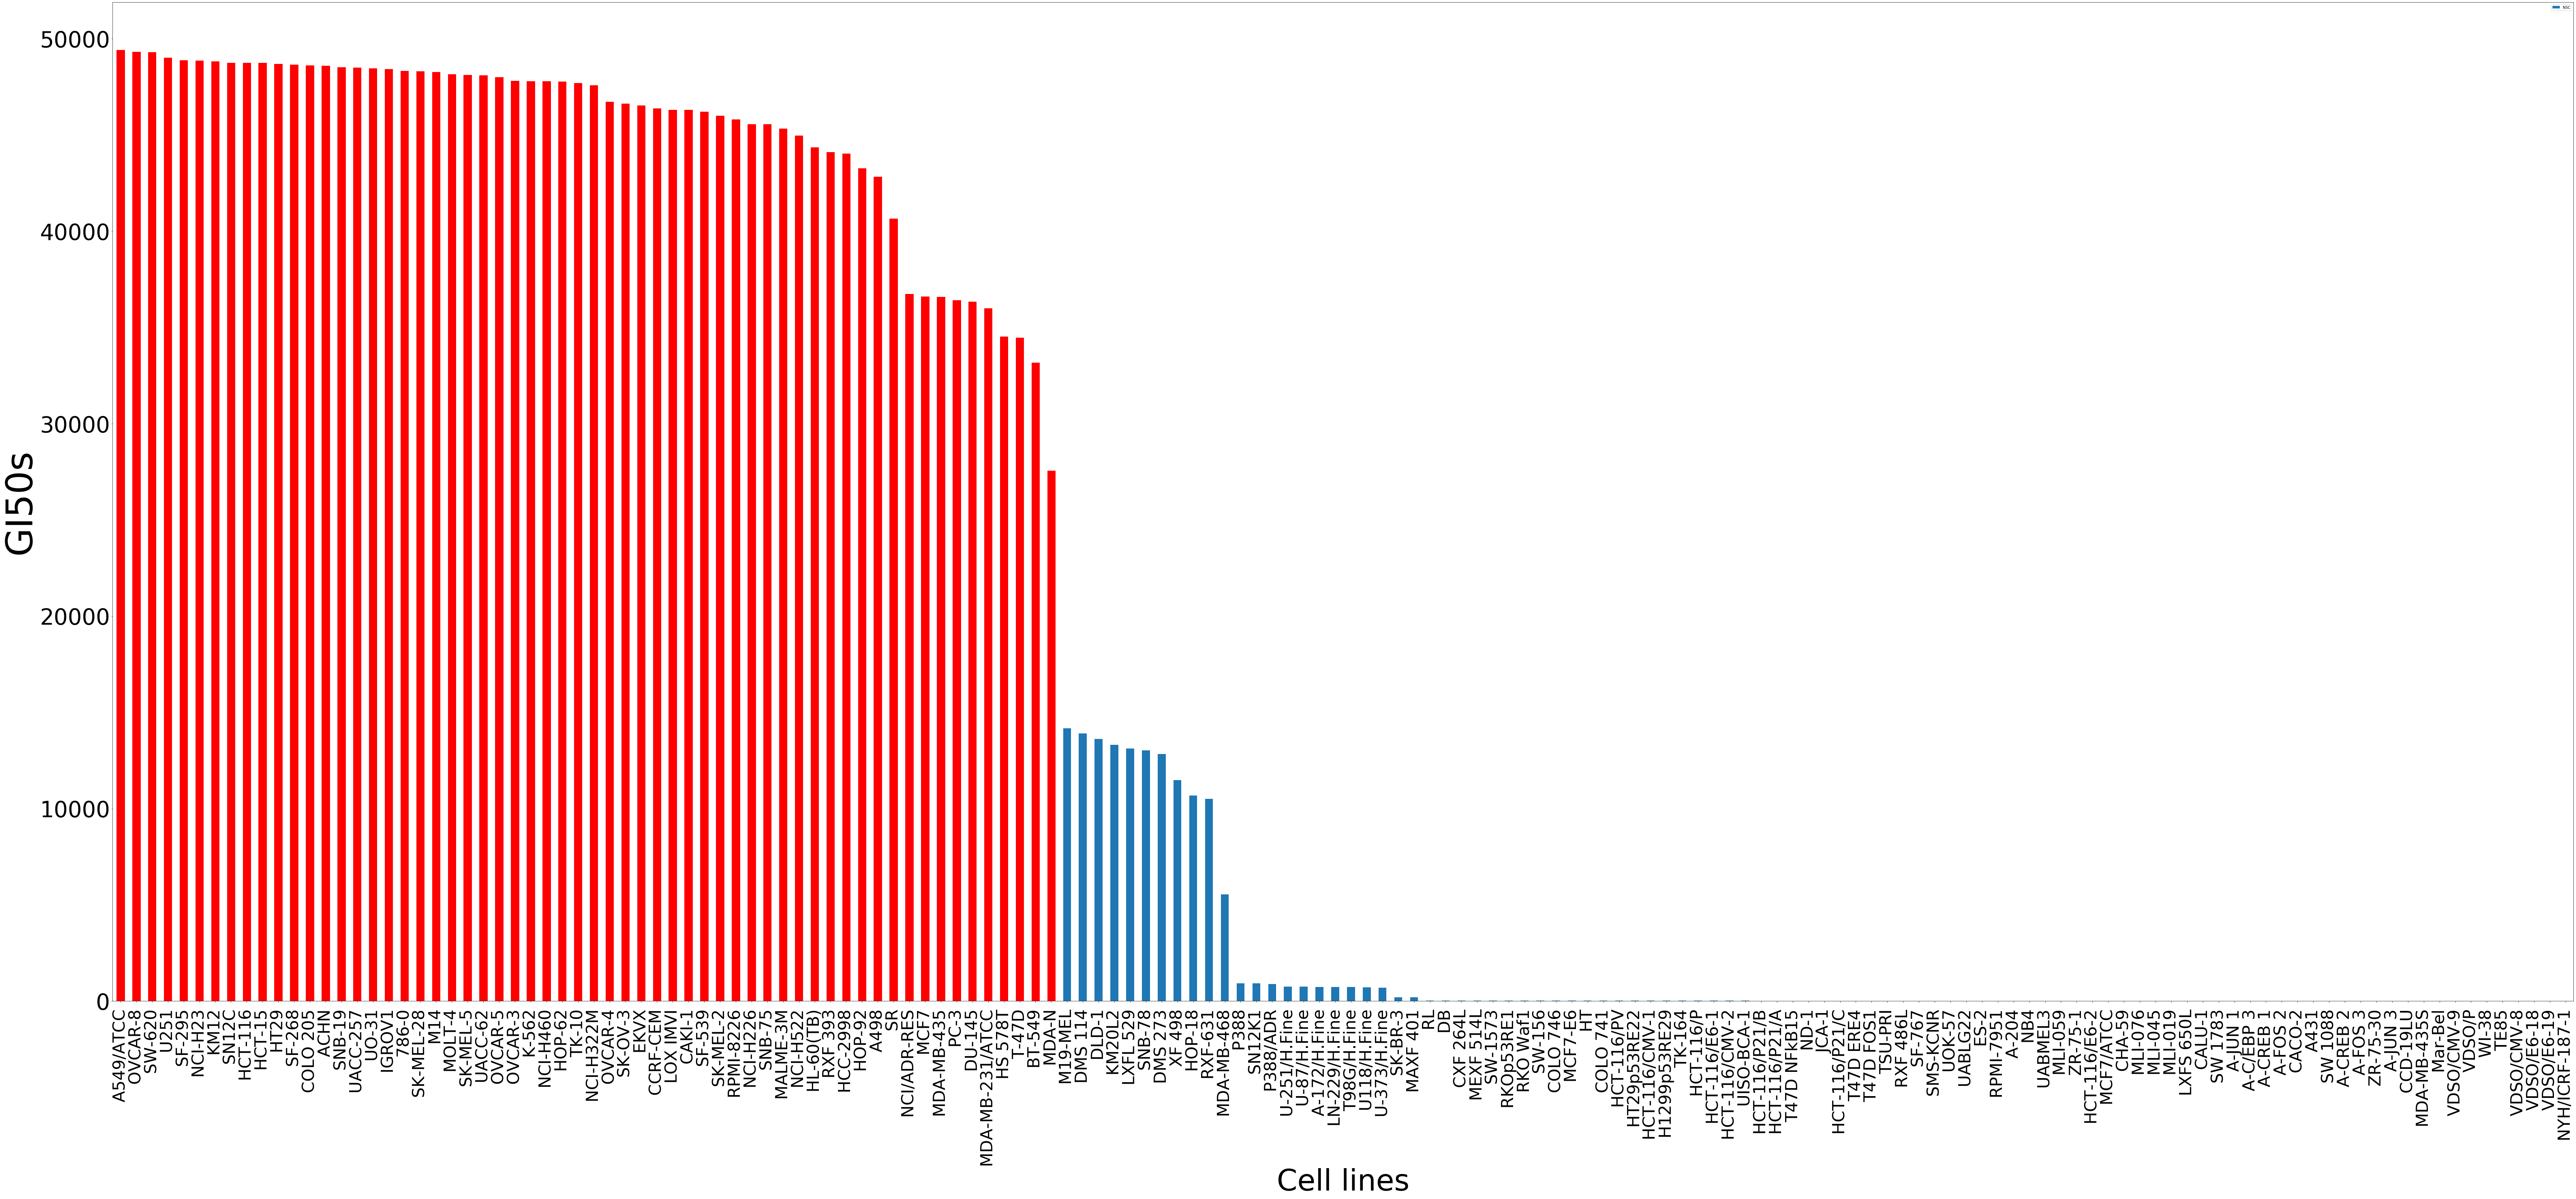

In [84]:
import matplotlib.pyplot as plt

ax = df_156_data_A.plot.bar(x='CELL', y='NSC', rot=45,figsize=(120, 50))
plt.ylabel('GI50s',fontsize=100)
plt.xlabel('Cell lines',fontsize=80)
for i in range(0,60):
    ax.get_children()[i].set_color('r')

plt.yticks(fontsize=60)
plt.xticks(fontsize=45,rotation=90)